# Ishigami function 
We perform sensitive analysis of ishigami function, which is a reference is sensitive analysis. We look to a global and local analysis, compare to Mine and Sobol analysis.

In [1]:
from models import mice #notre m
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

First we define the Ishigami function

In [5]:
def Ishigami(x1,x2,x3): #function that can totaly be an output of a random scenario generator such as chess
    return np.sin(x1)+7*np.sin(x2)**2+0.1*np.sin(x1)*(x3)**4
x1,x2,x3 = np.random.uniform(-np.pi,np.pi,2000),np.random.uniform(-np.pi,np.pi,2000),np.random.uniform(-np.pi,np.pi,2000)
ishig_v = Ishigami(x1,x2,x3)

Then we can visualize the function to have an intuition about its variations

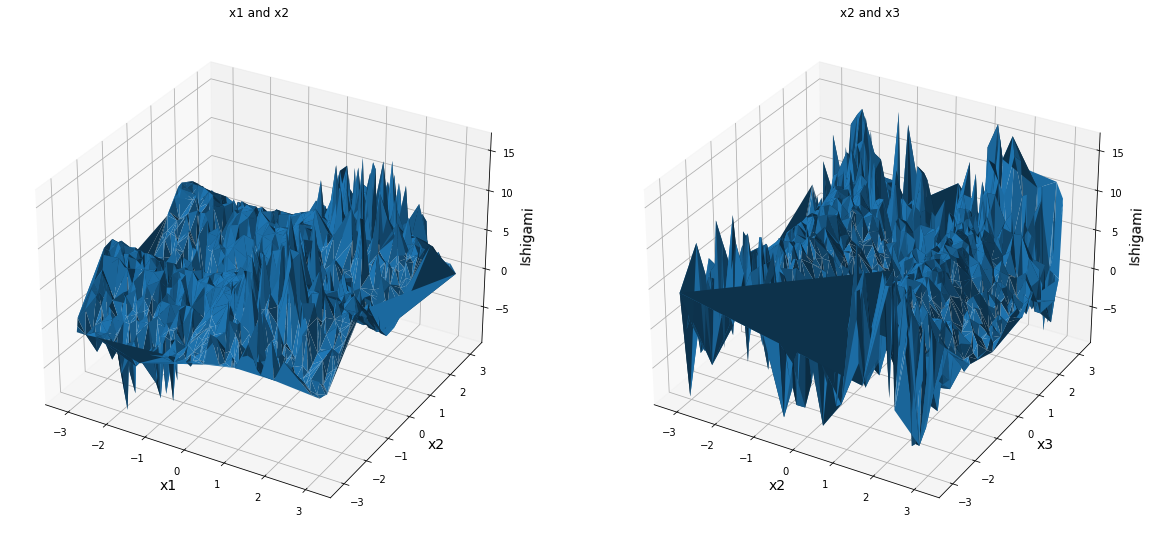

In [6]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.set_xlabel('x1', fontsize=14)
ax1.set_ylabel('x2', fontsize=14)
ax1.set_zlabel('Ishigami', fontsize=14)
ax1.set_title("x1 and x2 ")
ax1.plot_trisurf(x1,x2,ishig_v, linewidth=0.01)


ax2.set_xlabel('x2', fontsize=14)
ax2.set_ylabel('x3', fontsize=14)
ax2.set_zlabel('Ishigami', fontsize=14)
ax2.set_title("x2 and x3")
ax2.plot_trisurf(x2,x3,ishig_v, linewidth=0.01)


plt.show()

Not trivial to identify the most impactful variables 

## Sobol sensitive analysis of Ishigami function 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

In [8]:
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2','x3'],
    'bounds': [[-3, 3],[-3,3],[-3,3]]
}

In [9]:
# sample
param_values = saltelli.sample(problem, 2**6)

# evaluate

y = Ishigami(param_values[:,0],param_values[:,1],param_values[:,2])

# analyse
sobol_indices = sobol.analyze(problem, y)#en espérant avoir la même chose, ou proche !!

In [10]:
sobol_indices["S1"] #

array([0.33925627, 0.41009167, 0.02081097])

According to sobol sensitive analysis, the most impactful variable is the 2nd one, x2, following by the first one and then the last one. We also notice that we do not access to more information without more calculs.

## MICE sensitive analysis of the Ishigami function 
We propose to use our framework to analyse the global sensitive analysis of this function.
Data preprocessing : 

In [12]:
#variable x1 
sample = np.zeros((2000,2)) #it is important to make this step of normalization, to help the model learning the copula
ecdf = ECDF(x1); ecdf_f = ECDF(ishig_v)
sample[:,0]=ecdf(x1)
sample[:,1]=ecdf_f(ishig_v)

mice_x1 = mice.MICE(dim_latent=6, dim_out=2, n_samples_train=200, n_layers=2, n_neurons=100) 
mice_x1.fit(sample, batch_size=200, epochs=200)

#variable x2 

ecdf = ECDF(x2)
sample[:,0]=ecdf(x2)

mice_x2 = mice.MICE(dim_latent=6, dim_out=2, n_samples_train=200, n_layers=2, n_neurons=100) 
mice_x2.fit(sample, batch_size=200, epochs=200)

#variable x3

ecdf = ECDF(x3)
sample[:,0]=ecdf(x3)

mice_x3 = mice.MICE(dim_latent=6, dim_out=2, n_samples_train=200, n_layers=2, n_neurons=100) 
mice_x3.fit(sample, batch_size=200, epochs=200)

100%|██████████| 200/200 [00:40<00:00,  4.93it/s]


7/7 [==============================] - 0s 3ms/step
0 [D total loss : 1.048028, Copula estimates: 0.723615, Self-consistency mean test: 0.723423]
7/7 [==============================] - 0s 3ms/step
1 [D total loss : 1.027408, Copula estimates: 0.763437, Self-consistency mean test: 0.763935]
7/7 [==============================] - 0s 2ms/step
2 [D total loss : 1.040159, Copula estimates: 0.803593, Self-consistency mean test: 0.798949]
7/7 [==============================] - 0s 2ms/step
3 [D total loss : 1.008365, Copula estimates: 0.828577, Self-consistency mean test: 0.825938]
7/7 [==============================] - 0s 2ms/step
4 [D total loss : 1.021265, Copula estimates: 0.855838, Self-consistency mean test: 0.861260]
7/7 [==============================] - 0s 3ms/step
5 [D total loss : 1.025088, Copula estimates: 0.871702, Self-consistency mean test: 0.883737]
7/7 [==============================] - 0s 2ms/step
6 [D total loss : 1.021990, Copula estimates: 0.882907, Self-consistency mean t

7/7 [==============================] - 0s 3ms/step
33 [D total loss : 1.003126, Copula estimates: 0.872719, Self-consistency mean test: 0.871943]
7/7 [==============================] - 0s 2ms/step
34 [D total loss : 0.992200, Copula estimates: 0.875949, Self-consistency mean test: 0.870897]
7/7 [==============================] - 0s 2ms/step
35 [D total loss : 0.993234, Copula estimates: 0.879777, Self-consistency mean test: 0.877588]
7/7 [==============================] - 0s 3ms/step
36 [D total loss : 1.007265, Copula estimates: 0.894316, Self-consistency mean test: 0.883767]
7/7 [==============================] - 0s 2ms/step
37 [D total loss : 1.002772, Copula estimates: 0.895845, Self-consistency mean test: 0.890812]
7/7 [==============================] - 0s 2ms/step
38 [D total loss : 0.997139, Copula estimates: 0.896254, Self-consistency mean test: 0.894275]
7/7 [==============================] - 0s 2ms/step
39 [D total loss : 1.019739, Copula estimates: 0.891103, Self-consistency

7/7 [==============================] - 0s 3ms/step
66 [D total loss : 0.991220, Copula estimates: 0.915152, Self-consistency mean test: 0.904068]
7/7 [==============================] - 0s 2ms/step
67 [D total loss : 1.012520, Copula estimates: 0.910598, Self-consistency mean test: 0.905933]
7/7 [==============================] - 0s 2ms/step
68 [D total loss : 1.004327, Copula estimates: 0.913154, Self-consistency mean test: 0.898319]
7/7 [==============================] - 0s 2ms/step
69 [D total loss : 1.001591, Copula estimates: 0.902955, Self-consistency mean test: 0.892371]
7/7 [==============================] - 0s 2ms/step
70 [D total loss : 0.990063, Copula estimates: 0.912965, Self-consistency mean test: 0.902001]
7/7 [==============================] - 0s 2ms/step
71 [D total loss : 1.017320, Copula estimates: 0.908311, Self-consistency mean test: 0.907128]
7/7 [==============================] - 0s 2ms/step
72 [D total loss : 0.980049, Copula estimates: 0.909720, Self-consistency

7/7 [==============================] - 0s 3ms/step
99 [D total loss : 1.013066, Copula estimates: 0.916631, Self-consistency mean test: 0.902323]
7/7 [==============================] - 0s 2ms/step
100 [D total loss : 0.995458, Copula estimates: 0.917467, Self-consistency mean test: 0.904699]
7/7 [==============================] - 0s 3ms/step
101 [D total loss : 1.019294, Copula estimates: 0.922578, Self-consistency mean test: 0.908591]
7/7 [==============================] - 0s 3ms/step
102 [D total loss : 1.026197, Copula estimates: 0.913898, Self-consistency mean test: 0.897565]
7/7 [==============================] - 0s 4ms/step
103 [D total loss : 0.991325, Copula estimates: 0.910829, Self-consistency mean test: 0.904019]
7/7 [==============================] - 0s 2ms/step
104 [D total loss : 1.015872, Copula estimates: 0.895886, Self-consistency mean test: 0.892287]
7/7 [==============================] - 0s 4ms/step
105 [D total loss : 0.982097, Copula estimates: 0.893836, Self-consi

7/7 [==============================] - 0s 6ms/step
132 [D total loss : 1.005282, Copula estimates: 0.930351, Self-consistency mean test: 0.914345]
7/7 [==============================] - 0s 4ms/step
133 [D total loss : 0.993945, Copula estimates: 0.929578, Self-consistency mean test: 0.905643]
7/7 [==============================] - 0s 3ms/step
134 [D total loss : 0.984652, Copula estimates: 0.929121, Self-consistency mean test: 0.907603]
7/7 [==============================] - 0s 3ms/step
135 [D total loss : 0.971512, Copula estimates: 0.924339, Self-consistency mean test: 0.905013]
7/7 [==============================] - 0s 4ms/step
136 [D total loss : 0.994756, Copula estimates: 0.930311, Self-consistency mean test: 0.901177]
7/7 [==============================] - 0s 3ms/step
137 [D total loss : 1.011497, Copula estimates: 0.932137, Self-consistency mean test: 0.911392]
7/7 [==============================] - 0s 7ms/step
138 [D total loss : 0.991425, Copula estimates: 0.925722, Self-cons

7/7 [==============================] - 0s 5ms/step
165 [D total loss : 0.980563, Copula estimates: 0.934584, Self-consistency mean test: 0.909940]
7/7 [==============================] - 0s 3ms/step
166 [D total loss : 0.956976, Copula estimates: 0.956983, Self-consistency mean test: 0.911124]
7/7 [==============================] - 0s 4ms/step
167 [D total loss : 1.021253, Copula estimates: 0.953533, Self-consistency mean test: 0.938513]
7/7 [==============================] - 0s 5ms/step
168 [D total loss : 0.970124, Copula estimates: 0.938989, Self-consistency mean test: 0.916692]
7/7 [==============================] - 0s 3ms/step
169 [D total loss : 0.980172, Copula estimates: 0.940019, Self-consistency mean test: 0.922853]
7/7 [==============================] - 0s 4ms/step
170 [D total loss : 0.963150, Copula estimates: 0.937548, Self-consistency mean test: 0.909326]
7/7 [==============================] - 0s 5ms/step
171 [D total loss : 0.964769, Copula estimates: 0.933228, Self-cons

7/7 [==============================] - 0s 11ms/step
198 [D total loss : 0.967495, Copula estimates: 0.967032, Self-consistency mean test: 0.914627]
7/7 [==============================] - 0s 4ms/step
199 [D total loss : 0.968006, Copula estimates: 0.966355, Self-consistency mean test: 0.924275]
7/7 [==============================] - 0s 3ms/step
200 [D total loss : 0.970321, Copula estimates: 0.956493, Self-consistency mean test: 0.932098]
7/7 [==============================] - 0s 3ms/step
201 [D total loss : 0.989680, Copula estimates: 0.956829, Self-consistency mean test: 0.935266]
7/7 [==============================] - 0s 1ms/step
202 [D total loss : 1.008863, Copula estimates: 0.951646, Self-consistency mean test: 0.937019]
7/7 [==============================] - 0s 2ms/step
203 [D total loss : 0.974270, Copula estimates: 0.951882, Self-consistency mean test: 0.915256]
7/7 [==============================] - 0s 3ms/step
204 [D total loss : 0.952698, Copula estimates: 0.960519, Self-con

7/7 [==============================] - 0s 3ms/step
231 [D total loss : 0.958650, Copula estimates: 0.976326, Self-consistency mean test: 0.928012]
7/7 [==============================] - 0s 3ms/step
232 [D total loss : 0.973436, Copula estimates: 0.950422, Self-consistency mean test: 0.894085]
7/7 [==============================] - 0s 2ms/step
233 [D total loss : 0.984471, Copula estimates: 0.947251, Self-consistency mean test: 0.907868]
7/7 [==============================] - 0s 2ms/step
234 [D total loss : 1.006130, Copula estimates: 0.956773, Self-consistency mean test: 0.900250]
7/7 [==============================] - 0s 2ms/step
235 [D total loss : 0.990050, Copula estimates: 0.950859, Self-consistency mean test: 0.915446]
7/7 [==============================] - 0s 3ms/step
236 [D total loss : 0.941509, Copula estimates: 0.953754, Self-consistency mean test: 0.883642]
7/7 [==============================] - 0s 3ms/step
237 [D total loss : 1.026349, Copula estimates: 0.945732, Self-cons

7/7 [==============================] - 0s 2ms/step
264 [D total loss : 0.981651, Copula estimates: 0.960218, Self-consistency mean test: 0.914234]
7/7 [==============================] - 0s 3ms/step
265 [D total loss : 0.943339, Copula estimates: 0.983478, Self-consistency mean test: 0.918588]
7/7 [==============================] - 0s 2ms/step
266 [D total loss : 0.991456, Copula estimates: 0.973822, Self-consistency mean test: 0.936426]
7/7 [==============================] - 0s 2ms/step
267 [D total loss : 0.975829, Copula estimates: 1.001795, Self-consistency mean test: 0.918733]
7/7 [==============================] - 0s 2ms/step
268 [D total loss : 0.976345, Copula estimates: 1.000615, Self-consistency mean test: 0.959236]
7/7 [==============================] - 0s 2ms/step
269 [D total loss : 0.968217, Copula estimates: 1.021278, Self-consistency mean test: 0.949241]
7/7 [==============================] - 0s 2ms/step
270 [D total loss : 0.949085, Copula estimates: 0.979579, Self-cons

7/7 [==============================] - 0s 2ms/step
297 [D total loss : 0.958288, Copula estimates: 0.967658, Self-consistency mean test: 0.903810]
7/7 [==============================] - 0s 3ms/step
298 [D total loss : 0.969834, Copula estimates: 0.972193, Self-consistency mean test: 0.921693]
7/7 [==============================] - 0s 2ms/step
299 [D total loss : 0.958495, Copula estimates: 1.000189, Self-consistency mean test: 0.936910]
7/7 [==============================] - 0s 2ms/step
300 [D total loss : 0.942651, Copula estimates: 0.968733, Self-consistency mean test: 0.913881]
7/7 [==============================] - 0s 2ms/step
301 [D total loss : 0.956751, Copula estimates: 0.985693, Self-consistency mean test: 0.935074]
7/7 [==============================] - 0s 2ms/step
302 [D total loss : 0.957692, Copula estimates: 0.982667, Self-consistency mean test: 0.912860]
7/7 [==============================] - 0s 2ms/step
303 [D total loss : 0.937907, Copula estimates: 0.978960, Self-cons

329 [D total loss : 0.976549, Copula estimates: 1.008195, Self-consistency mean test: 0.899852]
7/7 [==============================] - 0s 2ms/step
330 [D total loss : 0.997168, Copula estimates: 1.015251, Self-consistency mean test: 0.937571]
7/7 [==============================] - 0s 2ms/step
331 [D total loss : 0.952164, Copula estimates: 1.009020, Self-consistency mean test: 0.918910]
7/7 [==============================] - 0s 2ms/step
332 [D total loss : 0.992296, Copula estimates: 1.045925, Self-consistency mean test: 0.979036]
7/7 [==============================] - 0s 2ms/step
333 [D total loss : 0.977648, Copula estimates: 1.026520, Self-consistency mean test: 0.945781]
7/7 [==============================] - 0s 3ms/step
334 [D total loss : 0.978775, Copula estimates: 1.006829, Self-consistency mean test: 0.953000]
7/7 [==============================] - 0s 2ms/step
335 [D total loss : 0.924632, Copula estimates: 0.975752, Self-consistency mean test: 0.880618]
7/7 [=================

7/7 [==============================] - 0s 3ms/step
362 [D total loss : 0.963847, Copula estimates: 1.042123, Self-consistency mean test: 0.954557]
7/7 [==============================] - 0s 2ms/step
363 [D total loss : 0.982564, Copula estimates: 1.032609, Self-consistency mean test: 0.967197]
7/7 [==============================] - 0s 5ms/step
364 [D total loss : 0.941352, Copula estimates: 1.008209, Self-consistency mean test: 0.935665]
7/7 [==============================] - 0s 2ms/step
365 [D total loss : 0.955985, Copula estimates: 1.038167, Self-consistency mean test: 0.919892]
7/7 [==============================] - 0s 4ms/step
366 [D total loss : 0.915570, Copula estimates: 1.068071, Self-consistency mean test: 0.959541]
7/7 [==============================] - 0s 3ms/step
367 [D total loss : 0.966567, Copula estimates: 1.039982, Self-consistency mean test: 0.951923]
7/7 [==============================] - 0s 4ms/step
368 [D total loss : 0.956888, Copula estimates: 1.024252, Self-cons

7/7 [==============================] - 0s 2ms/step
395 [D total loss : 0.895526, Copula estimates: 1.180743, Self-consistency mean test: 0.979786]
7/7 [==============================] - 0s 4ms/step
396 [D total loss : 0.923188, Copula estimates: 1.084101, Self-consistency mean test: 0.955453]
7/7 [==============================] - 0s 4ms/step
397 [D total loss : 0.922221, Copula estimates: 1.024593, Self-consistency mean test: 0.903546]
7/7 [==============================] - 0s 4ms/step
398 [D total loss : 0.940505, Copula estimates: 1.027617, Self-consistency mean test: 0.904558]
7/7 [==============================] - 0s 4ms/step
399 [D total loss : 0.904257, Copula estimates: 1.035759, Self-consistency mean test: 0.897345]
7/7 [==============================] - 0s 3ms/step
400 [D total loss : 0.907513, Copula estimates: 1.039309, Self-consistency mean test: 0.925158]
7/7 [==============================] - 0s 2ms/step
401 [D total loss : 0.954293, Copula estimates: 1.034584, Self-cons

7/7 [==============================] - 0s 4ms/step
428 [D total loss : 0.956962, Copula estimates: 1.041470, Self-consistency mean test: 0.917495]
7/7 [==============================] - 0s 3ms/step
429 [D total loss : 0.939445, Copula estimates: 1.071561, Self-consistency mean test: 0.932663]
7/7 [==============================] - 0s 2ms/step
430 [D total loss : 0.921867, Copula estimates: 1.083806, Self-consistency mean test: 0.928831]
7/7 [==============================] - 0s 4ms/step
431 [D total loss : 0.939378, Copula estimates: 1.145901, Self-consistency mean test: 0.986704]
7/7 [==============================] - 0s 2ms/step
432 [D total loss : 0.927727, Copula estimates: 1.157345, Self-consistency mean test: 0.983513]
7/7 [==============================] - 0s 4ms/step
433 [D total loss : 0.925062, Copula estimates: 1.149674, Self-consistency mean test: 1.001108]
7/7 [==============================] - 0s 5ms/step
434 [D total loss : 0.897234, Copula estimates: 1.089045, Self-cons

7/7 [==============================] - 0s 3ms/step
461 [D total loss : 0.958085, Copula estimates: 1.102321, Self-consistency mean test: 0.918492]
7/7 [==============================] - 0s 2ms/step
462 [D total loss : 0.928454, Copula estimates: 1.154967, Self-consistency mean test: 1.005413]
7/7 [==============================] - 0s 5ms/step
463 [D total loss : 0.954480, Copula estimates: 1.128463, Self-consistency mean test: 0.977683]
7/7 [==============================] - 0s 3ms/step
464 [D total loss : 0.896462, Copula estimates: 1.128810, Self-consistency mean test: 0.959173]
7/7 [==============================] - 0s 5ms/step
465 [D total loss : 0.966863, Copula estimates: 1.112321, Self-consistency mean test: 0.993104]
7/7 [==============================] - 0s 2ms/step
466 [D total loss : 0.887981, Copula estimates: 1.078029, Self-consistency mean test: 0.913482]
7/7 [==============================] - 0s 3ms/step
467 [D total loss : 0.944740, Copula estimates: 1.065881, Self-cons

7/7 [==============================] - 0s 6ms/step
494 [D total loss : 0.971633, Copula estimates: 0.994959, Self-consistency mean test: 0.909812]
7/7 [==============================] - 0s 3ms/step
495 [D total loss : 0.920635, Copula estimates: 1.078556, Self-consistency mean test: 0.924792]
7/7 [==============================] - 0s 2ms/step
496 [D total loss : 0.891811, Copula estimates: 1.043803, Self-consistency mean test: 0.937218]
7/7 [==============================] - 0s 3ms/step
497 [D total loss : 0.966636, Copula estimates: 1.110784, Self-consistency mean test: 0.987694]
7/7 [==============================] - 0s 4ms/step
498 [D total loss : 0.956797, Copula estimates: 1.127663, Self-consistency mean test: 0.956910]
7/7 [==============================] - 0s 3ms/step
499 [D total loss : 0.949799, Copula estimates: 1.114845, Self-consistency mean test: 0.981702]
7/7 [==============================] - 0s 2ms/step
500 [D total loss : 0.943322, Copula estimates: 1.133301, Self-cons

7/7 [==============================] - 0s 6ms/step
527 [D total loss : 0.979569, Copula estimates: 1.160586, Self-consistency mean test: 1.017798]
7/7 [==============================] - 0s 3ms/step
528 [D total loss : 0.882297, Copula estimates: 1.115157, Self-consistency mean test: 0.952390]
7/7 [==============================] - 0s 3ms/step
529 [D total loss : 0.861257, Copula estimates: 1.118248, Self-consistency mean test: 0.924300]
7/7 [==============================] - 0s 3ms/step
530 [D total loss : 0.999594, Copula estimates: 1.095722, Self-consistency mean test: 0.978684]
7/7 [==============================] - 0s 3ms/step
531 [D total loss : 0.926217, Copula estimates: 1.125159, Self-consistency mean test: 0.948514]
7/7 [==============================] - 0s 4ms/step
532 [D total loss : 0.920492, Copula estimates: 1.131398, Self-consistency mean test: 0.958822]
7/7 [==============================] - 0s 2ms/step
533 [D total loss : 0.869088, Copula estimates: 1.110747, Self-cons

7/7 [==============================] - 0s 2ms/step
560 [D total loss : 0.957573, Copula estimates: 1.145635, Self-consistency mean test: 1.043455]
7/7 [==============================] - 0s 3ms/step
561 [D total loss : 0.997179, Copula estimates: 1.069910, Self-consistency mean test: 0.985771]
7/7 [==============================] - 0s 3ms/step
562 [D total loss : 0.925480, Copula estimates: 1.036493, Self-consistency mean test: 0.909209]
7/7 [==============================] - 0s 2ms/step
563 [D total loss : 0.896760, Copula estimates: 1.077976, Self-consistency mean test: 0.867298]
7/7 [==============================] - 0s 5ms/step
564 [D total loss : 0.931537, Copula estimates: 1.086154, Self-consistency mean test: 0.925516]
7/7 [==============================] - 0s 3ms/step
565 [D total loss : 0.943683, Copula estimates: 1.089732, Self-consistency mean test: 0.953404]
7/7 [==============================] - 0s 3ms/step
566 [D total loss : 0.870966, Copula estimates: 1.110343, Self-cons

7/7 [==============================] - 0s 3ms/step
593 [D total loss : 0.914480, Copula estimates: 1.091132, Self-consistency mean test: 0.936738]
7/7 [==============================] - 0s 4ms/step
594 [D total loss : 0.865126, Copula estimates: 1.132708, Self-consistency mean test: 0.945972]
7/7 [==============================] - 0s 4ms/step
595 [D total loss : 0.874563, Copula estimates: 1.149740, Self-consistency mean test: 0.932434]
7/7 [==============================] - 0s 2ms/step
596 [D total loss : 0.908647, Copula estimates: 1.099636, Self-consistency mean test: 0.938977]
7/7 [==============================] - 0s 4ms/step
597 [D total loss : 0.971143, Copula estimates: 1.118090, Self-consistency mean test: 0.942451]
7/7 [==============================] - 0s 4ms/step
598 [D total loss : 0.891842, Copula estimates: 1.098244, Self-consistency mean test: 0.944184]
7/7 [==============================] - 0s 3ms/step
599 [D total loss : 0.871811, Copula estimates: 1.096567, Self-cons

7/7 [==============================] - 0s 3ms/step
626 [D total loss : 0.985986, Copula estimates: 1.119790, Self-consistency mean test: 0.985498]
7/7 [==============================] - 0s 4ms/step
627 [D total loss : 0.851265, Copula estimates: 1.187925, Self-consistency mean test: 0.936960]
7/7 [==============================] - 0s 4ms/step
628 [D total loss : 0.849541, Copula estimates: 1.151415, Self-consistency mean test: 0.947375]
7/7 [==============================] - 0s 2ms/step
629 [D total loss : 0.963926, Copula estimates: 1.148511, Self-consistency mean test: 1.030387]
7/7 [==============================] - 0s 2ms/step
630 [D total loss : 0.917386, Copula estimates: 1.129839, Self-consistency mean test: 0.952619]
7/7 [==============================] - 0s 3ms/step
631 [D total loss : 0.920948, Copula estimates: 1.107365, Self-consistency mean test: 0.943387]
7/7 [==============================] - 0s 5ms/step
632 [D total loss : 0.917353, Copula estimates: 1.097047, Self-cons

7/7 [==============================] - 0s 3ms/step
659 [D total loss : 0.902743, Copula estimates: 1.152189, Self-consistency mean test: 0.962112]
7/7 [==============================] - 0s 3ms/step
660 [D total loss : 0.885581, Copula estimates: 1.095486, Self-consistency mean test: 0.867579]
7/7 [==============================] - 0s 4ms/step
661 [D total loss : 0.962303, Copula estimates: 1.112547, Self-consistency mean test: 0.939308]
7/7 [==============================] - 0s 2ms/step
662 [D total loss : 0.962160, Copula estimates: 1.133371, Self-consistency mean test: 0.958935]
7/7 [==============================] - 0s 4ms/step
663 [D total loss : 0.927546, Copula estimates: 1.177677, Self-consistency mean test: 1.008806]
7/7 [==============================] - 0s 2ms/step
664 [D total loss : 0.962954, Copula estimates: 1.137240, Self-consistency mean test: 1.003426]
7/7 [==============================] - 0s 4ms/step
665 [D total loss : 0.898501, Copula estimates: 1.133710, Self-cons

7/7 [==============================] - 0s 2ms/step
692 [D total loss : 0.892539, Copula estimates: 1.179957, Self-consistency mean test: 0.950162]
7/7 [==============================] - 0s 4ms/step
693 [D total loss : 0.956884, Copula estimates: 1.187277, Self-consistency mean test: 1.044926]
7/7 [==============================] - 0s 5ms/step
694 [D total loss : 0.877823, Copula estimates: 1.197735, Self-consistency mean test: 0.968108]
7/7 [==============================] - 0s 3ms/step
695 [D total loss : 0.912474, Copula estimates: 1.137296, Self-consistency mean test: 0.958951]
7/7 [==============================] - 0s 3ms/step
696 [D total loss : 0.936869, Copula estimates: 1.075942, Self-consistency mean test: 0.897262]
7/7 [==============================] - 0s 2ms/step
697 [D total loss : 0.904765, Copula estimates: 1.090310, Self-consistency mean test: 0.940712]
7/7 [==============================] - 0s 5ms/step
698 [D total loss : 0.930364, Copula estimates: 1.095738, Self-cons

7/7 [==============================] - 0s 4ms/step
725 [D total loss : 0.954064, Copula estimates: 1.192463, Self-consistency mean test: 1.032014]
7/7 [==============================] - 0s 3ms/step
726 [D total loss : 0.932907, Copula estimates: 1.166470, Self-consistency mean test: 0.981774]
7/7 [==============================] - 0s 3ms/step
727 [D total loss : 0.941104, Copula estimates: 1.206138, Self-consistency mean test: 1.023523]
7/7 [==============================] - 0s 3ms/step
728 [D total loss : 0.888748, Copula estimates: 1.138705, Self-consistency mean test: 0.907910]
7/7 [==============================] - 0s 5ms/step
729 [D total loss : 0.881696, Copula estimates: 1.144383, Self-consistency mean test: 0.944226]
7/7 [==============================] - 0s 3ms/step
730 [D total loss : 0.855879, Copula estimates: 1.096300, Self-consistency mean test: 0.875330]
7/7 [==============================] - 0s 6ms/step
731 [D total loss : 0.963273, Copula estimates: 1.107844, Self-cons

7/7 [==============================] - 0s 5ms/step
758 [D total loss : 0.936153, Copula estimates: 1.116253, Self-consistency mean test: 0.940177]
7/7 [==============================] - 0s 2ms/step
759 [D total loss : 0.951497, Copula estimates: 1.136582, Self-consistency mean test: 0.995602]
7/7 [==============================] - 0s 3ms/step
760 [D total loss : 0.839202, Copula estimates: 1.165545, Self-consistency mean test: 0.927677]
7/7 [==============================] - 0s 2ms/step
761 [D total loss : 1.004980, Copula estimates: 1.073169, Self-consistency mean test: 0.976659]
7/7 [==============================] - 0s 2ms/step
762 [D total loss : 0.950518, Copula estimates: 1.116575, Self-consistency mean test: 0.957372]
7/7 [==============================] - 0s 3ms/step
763 [D total loss : 0.913162, Copula estimates: 1.126323, Self-consistency mean test: 0.972485]
7/7 [==============================] - 0s 4ms/step
764 [D total loss : 0.894895, Copula estimates: 1.162151, Self-cons

7/7 [==============================] - 0s 3ms/step
791 [D total loss : 0.960847, Copula estimates: 1.121426, Self-consistency mean test: 0.976859]
7/7 [==============================] - 0s 5ms/step
792 [D total loss : 0.944697, Copula estimates: 1.109792, Self-consistency mean test: 0.967594]
7/7 [==============================] - 0s 2ms/step
793 [D total loss : 0.936683, Copula estimates: 1.064908, Self-consistency mean test: 0.918315]
7/7 [==============================] - 0s 5ms/step
794 [D total loss : 0.985728, Copula estimates: 1.120478, Self-consistency mean test: 1.005332]
7/7 [==============================] - 0s 5ms/step
795 [D total loss : 0.897107, Copula estimates: 1.134802, Self-consistency mean test: 0.952382]
7/7 [==============================] - 0s 5ms/step
796 [D total loss : 0.898392, Copula estimates: 1.142919, Self-consistency mean test: 0.944984]
7/7 [==============================] - 0s 3ms/step
797 [D total loss : 0.800104, Copula estimates: 1.191188, Self-cons

7/7 [==============================] - 0s 3ms/step
824 [D total loss : 0.891639, Copula estimates: 1.144373, Self-consistency mean test: 0.955656]
7/7 [==============================] - 0s 3ms/step
825 [D total loss : 0.933294, Copula estimates: 1.094466, Self-consistency mean test: 0.959829]
7/7 [==============================] - 0s 6ms/step
826 [D total loss : 0.957642, Copula estimates: 1.074431, Self-consistency mean test: 0.936982]
7/7 [==============================] - 0s 4ms/step
827 [D total loss : 0.914605, Copula estimates: 1.107168, Self-consistency mean test: 0.937496]
7/7 [==============================] - 0s 827us/step
828 [D total loss : 0.907661, Copula estimates: 1.180960, Self-consistency mean test: 0.969457]
7/7 [==============================] - 0s 4ms/step
829 [D total loss : 0.863660, Copula estimates: 1.180007, Self-consistency mean test: 0.948963]
7/7 [==============================] - 0s 5ms/step
830 [D total loss : 0.936995, Copula estimates: 1.163923, Self-co

7/7 [==============================] - 0s 5ms/step
857 [D total loss : 0.915464, Copula estimates: 1.118838, Self-consistency mean test: 0.974242]
7/7 [==============================] - 0s 2ms/step
858 [D total loss : 0.962837, Copula estimates: 1.148366, Self-consistency mean test: 1.015326]
7/7 [==============================] - 0s 3ms/step
859 [D total loss : 0.878169, Copula estimates: 1.123235, Self-consistency mean test: 0.892073]
7/7 [==============================] - 0s 3ms/step
860 [D total loss : 0.817365, Copula estimates: 1.159356, Self-consistency mean test: 0.936507]
7/7 [==============================] - 0s 3ms/step
861 [D total loss : 0.989763, Copula estimates: 1.128891, Self-consistency mean test: 1.002425]
7/7 [==============================] - 0s 2ms/step
862 [D total loss : 0.908912, Copula estimates: 1.178436, Self-consistency mean test: 0.979940]
7/7 [==============================] - 0s 3ms/step
863 [D total loss : 0.876646, Copula estimates: 1.245915, Self-cons

7/7 [==============================] - 0s 3ms/step
890 [D total loss : 0.930562, Copula estimates: 1.122177, Self-consistency mean test: 0.954879]
7/7 [==============================] - 0s 2ms/step
891 [D total loss : 0.921259, Copula estimates: 1.149525, Self-consistency mean test: 0.974134]
7/7 [==============================] - 0s 2ms/step
892 [D total loss : 0.937786, Copula estimates: 1.106192, Self-consistency mean test: 0.948108]
7/7 [==============================] - 0s 2ms/step
893 [D total loss : 0.874384, Copula estimates: 1.177966, Self-consistency mean test: 0.944200]
7/7 [==============================] - 0s 3ms/step
894 [D total loss : 0.857391, Copula estimates: 1.174803, Self-consistency mean test: 0.933676]
7/7 [==============================] - 0s 1ms/step
895 [D total loss : 0.910125, Copula estimates: 1.104709, Self-consistency mean test: 0.948181]
7/7 [==============================] - 0s 904us/step
896 [D total loss : 0.866503, Copula estimates: 1.236995, Self-co

7/7 [==============================] - 0s 2ms/step
923 [D total loss : 0.953318, Copula estimates: 1.206648, Self-consistency mean test: 1.054198]
7/7 [==============================] - 0s 2ms/step
924 [D total loss : 0.900642, Copula estimates: 1.208641, Self-consistency mean test: 0.998009]
7/7 [==============================] - 0s 2ms/step
925 [D total loss : 0.943280, Copula estimates: 1.135157, Self-consistency mean test: 0.979391]
7/7 [==============================] - 0s 2ms/step
926 [D total loss : 0.909253, Copula estimates: 1.140834, Self-consistency mean test: 0.973031]
7/7 [==============================] - 0s 2ms/step
927 [D total loss : 0.905908, Copula estimates: 1.176716, Self-consistency mean test: 0.973839]
7/7 [==============================] - 0s 3ms/step
928 [D total loss : 0.942156, Copula estimates: 1.137981, Self-consistency mean test: 0.974872]
7/7 [==============================] - 0s 5ms/step
929 [D total loss : 0.951295, Copula estimates: 1.154873, Self-cons

7/7 [==============================] - 0s 3ms/step
956 [D total loss : 0.829728, Copula estimates: 1.189590, Self-consistency mean test: 0.947061]
7/7 [==============================] - 0s 2ms/step
957 [D total loss : 0.829959, Copula estimates: 1.161532, Self-consistency mean test: 0.883100]
7/7 [==============================] - 0s 5ms/step
958 [D total loss : 0.908165, Copula estimates: 1.163921, Self-consistency mean test: 0.960585]
7/7 [==============================] - 0s 2ms/step
959 [D total loss : 0.909874, Copula estimates: 1.166942, Self-consistency mean test: 0.997084]
7/7 [==============================] - 0s 5ms/step
960 [D total loss : 0.929627, Copula estimates: 1.143768, Self-consistency mean test: 0.923199]
7/7 [==============================] - 0s 2ms/step
961 [D total loss : 0.883828, Copula estimates: 1.145474, Self-consistency mean test: 0.937975]
7/7 [==============================] - 0s 2ms/step
962 [D total loss : 0.842533, Copula estimates: 1.173393, Self-cons

7/7 [==============================] - 0s 3ms/step
989 [D total loss : 0.889909, Copula estimates: 1.154781, Self-consistency mean test: 0.898427]
7/7 [==============================] - 0s 2ms/step
990 [D total loss : 0.935381, Copula estimates: 1.147607, Self-consistency mean test: 0.990501]
7/7 [==============================] - 0s 4ms/step
991 [D total loss : 0.847035, Copula estimates: 1.180581, Self-consistency mean test: 0.947981]
7/7 [==============================] - 0s 3ms/step
992 [D total loss : 0.839725, Copula estimates: 1.237729, Self-consistency mean test: 0.952621]
7/7 [==============================] - 0s 3ms/step
993 [D total loss : 0.904117, Copula estimates: 1.174997, Self-consistency mean test: 0.995790]
7/7 [==============================] - 0s 2ms/step
994 [D total loss : 0.890300, Copula estimates: 1.184756, Self-consistency mean test: 0.937587]
7/7 [==============================] - 0s 3ms/step
995 [D total loss : 0.897864, Copula estimates: 1.152543, Self-cons

7/7 [==============================] - 0s 4ms/step
1022 [D total loss : 0.884093, Copula estimates: 1.177660, Self-consistency mean test: 0.965065]
7/7 [==============================] - 0s 4ms/step
1023 [D total loss : 0.881306, Copula estimates: 1.164792, Self-consistency mean test: 0.970666]
7/7 [==============================] - 0s 5ms/step
1024 [D total loss : 0.843394, Copula estimates: 1.223574, Self-consistency mean test: 0.997036]
7/7 [==============================] - 0s 5ms/step
1025 [D total loss : 0.893975, Copula estimates: 1.184989, Self-consistency mean test: 0.973582]
7/7 [==============================] - 0s 4ms/step
1026 [D total loss : 0.905024, Copula estimates: 1.192952, Self-consistency mean test: 0.980730]
7/7 [==============================] - 0s 3ms/step
1027 [D total loss : 0.834194, Copula estimates: 1.286812, Self-consistency mean test: 0.991473]
7/7 [==============================] - 0s 2ms/step
1028 [D total loss : 0.817178, Copula estimates: 1.200963, Se

7/7 [==============================] - 0s 3ms/step
1055 [D total loss : 0.948643, Copula estimates: 1.116284, Self-consistency mean test: 0.966110]
7/7 [==============================] - 0s 3ms/step
1056 [D total loss : 0.841712, Copula estimates: 1.254836, Self-consistency mean test: 0.967647]
7/7 [==============================] - 0s 5ms/step
1057 [D total loss : 0.968625, Copula estimates: 1.156730, Self-consistency mean test: 1.007811]
7/7 [==============================] - 0s 3ms/step
1058 [D total loss : 0.953423, Copula estimates: 1.185630, Self-consistency mean test: 1.020509]
7/7 [==============================] - 0s 4ms/step
1059 [D total loss : 0.948482, Copula estimates: 1.143865, Self-consistency mean test: 0.995900]
7/7 [==============================] - 0s 4ms/step
1060 [D total loss : 0.922556, Copula estimates: 1.183303, Self-consistency mean test: 0.980821]
7/7 [==============================] - 0s 3ms/step
1061 [D total loss : 0.945469, Copula estimates: 1.205888, Se

7/7 [==============================] - 0s 3ms/step
1088 [D total loss : 0.891392, Copula estimates: 1.184648, Self-consistency mean test: 0.969842]
7/7 [==============================] - 0s 4ms/step
1089 [D total loss : 0.948148, Copula estimates: 1.198537, Self-consistency mean test: 1.029213]
7/7 [==============================] - 0s 3ms/step
1090 [D total loss : 0.864825, Copula estimates: 1.166837, Self-consistency mean test: 0.916238]
7/7 [==============================] - 0s 2ms/step
1091 [D total loss : 0.843642, Copula estimates: 1.166611, Self-consistency mean test: 0.938352]
7/7 [==============================] - 0s 2ms/step
1092 [D total loss : 0.874867, Copula estimates: 1.163877, Self-consistency mean test: 0.948700]
7/7 [==============================] - 0s 3ms/step
1093 [D total loss : 0.880454, Copula estimates: 1.231310, Self-consistency mean test: 1.002123]
7/7 [==============================] - 0s 3ms/step
1094 [D total loss : 0.943566, Copula estimates: 1.211770, Se

7/7 [==============================] - 0s 1ms/step
1121 [D total loss : 0.946915, Copula estimates: 1.158702, Self-consistency mean test: 0.986581]
7/7 [==============================] - 0s 4ms/step
1122 [D total loss : 0.907526, Copula estimates: 1.199689, Self-consistency mean test: 1.023868]
7/7 [==============================] - 0s 3ms/step
1123 [D total loss : 0.938229, Copula estimates: 1.178913, Self-consistency mean test: 1.006817]
7/7 [==============================] - 0s 2ms/step
1124 [D total loss : 0.909914, Copula estimates: 1.204550, Self-consistency mean test: 1.005951]
7/7 [==============================] - 0s 3ms/step
1125 [D total loss : 0.939832, Copula estimates: 1.190146, Self-consistency mean test: 1.044575]
7/7 [==============================] - 0s 2ms/step
1126 [D total loss : 0.905859, Copula estimates: 1.182019, Self-consistency mean test: 0.985555]
7/7 [==============================] - 0s 3ms/step
1127 [D total loss : 0.937950, Copula estimates: 1.168016, Se

7/7 [==============================] - 0s 4ms/step
1154 [D total loss : 0.828557, Copula estimates: 1.227659, Self-consistency mean test: 0.946187]
7/7 [==============================] - 0s 4ms/step
1155 [D total loss : 0.887057, Copula estimates: 1.182703, Self-consistency mean test: 0.954544]
7/7 [==============================] - 0s 4ms/step
1156 [D total loss : 0.922335, Copula estimates: 1.247588, Self-consistency mean test: 1.051471]
7/7 [==============================] - 0s 4ms/step
1157 [D total loss : 0.901257, Copula estimates: 1.186160, Self-consistency mean test: 0.945888]
7/7 [==============================] - 0s 3ms/step
1158 [D total loss : 0.874462, Copula estimates: 1.213141, Self-consistency mean test: 0.985476]
7/7 [==============================] - 0s 4ms/step
1159 [D total loss : 0.892759, Copula estimates: 1.203894, Self-consistency mean test: 0.964969]
7/7 [==============================] - 0s 2ms/step
1160 [D total loss : 0.950488, Copula estimates: 1.152346, Se

7/7 [==============================] - 0s 6ms/step
1187 [D total loss : 0.948334, Copula estimates: 1.158966, Self-consistency mean test: 0.992280]
7/7 [==============================] - 0s 3ms/step
1188 [D total loss : 0.916272, Copula estimates: 1.168729, Self-consistency mean test: 0.967824]
7/7 [==============================] - 0s 4ms/step
1189 [D total loss : 0.870621, Copula estimates: 1.201513, Self-consistency mean test: 0.949418]
7/7 [==============================] - 0s 5ms/step
1190 [D total loss : 0.913190, Copula estimates: 1.097653, Self-consistency mean test: 0.932305]
7/7 [==============================] - 0s 5ms/step
1191 [D total loss : 0.869438, Copula estimates: 1.200987, Self-consistency mean test: 0.952823]
7/7 [==============================] - 0s 3ms/step
1192 [D total loss : 0.895192, Copula estimates: 1.137905, Self-consistency mean test: 0.915178]
7/7 [==============================] - 0s 2ms/step
1193 [D total loss : 0.921086, Copula estimates: 1.209872, Se

7/7 [==============================] - 0s 5ms/step
1220 [D total loss : 0.829319, Copula estimates: 1.211058, Self-consistency mean test: 0.956376]
7/7 [==============================] - 0s 2ms/step
1221 [D total loss : 0.852032, Copula estimates: 1.183505, Self-consistency mean test: 0.943752]
7/7 [==============================] - 0s 2ms/step
1222 [D total loss : 0.989714, Copula estimates: 1.196347, Self-consistency mean test: 1.056366]
7/7 [==============================] - 0s 3ms/step
1223 [D total loss : 0.899180, Copula estimates: 1.235027, Self-consistency mean test: 1.031654]
7/7 [==============================] - 0s 3ms/step
1224 [D total loss : 0.881169, Copula estimates: 1.204509, Self-consistency mean test: 0.945331]
7/7 [==============================] - 0s 4ms/step
1225 [D total loss : 0.904173, Copula estimates: 1.209450, Self-consistency mean test: 0.994474]
7/7 [==============================] - 0s 3ms/step
1226 [D total loss : 0.917548, Copula estimates: 1.233013, Se

7/7 [==============================] - 0s 1ms/step
1252 [D total loss : 0.844867, Copula estimates: 1.215309, Self-consistency mean test: 0.962603]
7/7 [==============================] - 0s 2ms/step
1253 [D total loss : 0.936966, Copula estimates: 1.137388, Self-consistency mean test: 0.966618]
7/7 [==============================] - 0s 2ms/step
1254 [D total loss : 0.842376, Copula estimates: 1.197253, Self-consistency mean test: 0.952780]
7/7 [==============================] - 0s 2ms/step
1255 [D total loss : 0.869917, Copula estimates: 1.154329, Self-consistency mean test: 0.916813]
7/7 [==============================] - 0s 2ms/step
1256 [D total loss : 0.891750, Copula estimates: 1.196442, Self-consistency mean test: 0.966936]
7/7 [==============================] - 0s 2ms/step
1257 [D total loss : 0.827457, Copula estimates: 1.229139, Self-consistency mean test: 0.945920]
7/7 [==============================] - 0s 12ms/step
1258 [D total loss : 0.827675, Copula estimates: 1.226240, S

7/7 [==============================] - 0s 1ms/step
1285 [D total loss : 0.895460, Copula estimates: 1.205850, Self-consistency mean test: 0.968487]
7/7 [==============================] - 0s 2ms/step
1286 [D total loss : 0.932357, Copula estimates: 1.221403, Self-consistency mean test: 1.055825]
7/7 [==============================] - 0s 2ms/step
1287 [D total loss : 0.899432, Copula estimates: 1.232152, Self-consistency mean test: 0.978863]
7/7 [==============================] - 0s 2ms/step
1288 [D total loss : 0.894427, Copula estimates: 1.146195, Self-consistency mean test: 0.936606]
7/7 [==============================] - 0s 2ms/step
1289 [D total loss : 0.935104, Copula estimates: 1.195600, Self-consistency mean test: 1.005606]
7/7 [==============================] - 0s 1ms/step
1290 [D total loss : 0.880678, Copula estimates: 1.243633, Self-consistency mean test: 1.006780]
7/7 [==============================] - 0s 1ms/step
1291 [D total loss : 0.908539, Copula estimates: 1.214145, Se

7/7 [==============================] - 0s 1ms/step
1318 [D total loss : 0.911142, Copula estimates: 1.173152, Self-consistency mean test: 1.004772]
7/7 [==============================] - 0s 1ms/step
1319 [D total loss : 0.916778, Copula estimates: 1.160911, Self-consistency mean test: 0.954601]
7/7 [==============================] - 0s 1ms/step
1320 [D total loss : 0.846792, Copula estimates: 1.225411, Self-consistency mean test: 0.943789]
7/7 [==============================] - 0s 1ms/step
1321 [D total loss : 0.831204, Copula estimates: 1.223453, Self-consistency mean test: 0.951520]
7/7 [==============================] - 0s 1ms/step
1322 [D total loss : 0.869947, Copula estimates: 1.234271, Self-consistency mean test: 1.012077]
7/7 [==============================] - 0s 2ms/step
1323 [D total loss : 0.988090, Copula estimates: 1.185210, Self-consistency mean test: 1.048209]
7/7 [==============================] - 0s 1ms/step
1324 [D total loss : 0.972647, Copula estimates: 1.182889, Se

7/7 [==============================] - 0s 1ms/step
1351 [D total loss : 0.840602, Copula estimates: 1.186918, Self-consistency mean test: 0.935588]
7/7 [==============================] - 0s 1ms/step
1352 [D total loss : 0.858943, Copula estimates: 1.282552, Self-consistency mean test: 1.034430]
7/7 [==============================] - 0s 1ms/step
1353 [D total loss : 0.871446, Copula estimates: 1.289765, Self-consistency mean test: 1.013728]
7/7 [==============================] - 0s 1ms/step
1354 [D total loss : 0.876531, Copula estimates: 1.243345, Self-consistency mean test: 1.005580]
7/7 [==============================] - 0s 2ms/step
1355 [D total loss : 0.909789, Copula estimates: 1.229466, Self-consistency mean test: 1.039486]
7/7 [==============================] - 0s 2ms/step
1356 [D total loss : 0.968682, Copula estimates: 1.175818, Self-consistency mean test: 1.054026]
7/7 [==============================] - 0s 2ms/step
1357 [D total loss : 0.908453, Copula estimates: 1.176900, Se

7/7 [==============================] - 0s 2ms/step
1384 [D total loss : 0.875215, Copula estimates: 1.189983, Self-consistency mean test: 0.977211]
7/7 [==============================] - 0s 9ms/step
1385 [D total loss : 0.913384, Copula estimates: 1.185477, Self-consistency mean test: 0.993038]
7/7 [==============================] - 0s 2ms/step
1386 [D total loss : 0.900491, Copula estimates: 1.219027, Self-consistency mean test: 1.003236]
7/7 [==============================] - 0s 3ms/step
1387 [D total loss : 0.924180, Copula estimates: 1.172890, Self-consistency mean test: 1.014589]
7/7 [==============================] - 0s 2ms/step
1388 [D total loss : 0.834986, Copula estimates: 1.184026, Self-consistency mean test: 0.946855]
7/7 [==============================] - 0s 3ms/step
1389 [D total loss : 0.862909, Copula estimates: 1.191529, Self-consistency mean test: 0.964838]
7/7 [==============================] - 0s 1ms/step
1390 [D total loss : 0.909282, Copula estimates: 1.145481, Se

7/7 [==============================] - 0s 2ms/step
1417 [D total loss : 0.886528, Copula estimates: 1.139447, Self-consistency mean test: 0.907531]
7/7 [==============================] - 0s 2ms/step
1418 [D total loss : 0.820446, Copula estimates: 1.183692, Self-consistency mean test: 0.872543]
7/7 [==============================] - 0s 4ms/step
1419 [D total loss : 0.942403, Copula estimates: 1.261446, Self-consistency mean test: 1.079553]
7/7 [==============================] - 0s 2ms/step
1420 [D total loss : 0.891287, Copula estimates: 1.305935, Self-consistency mean test: 1.083596]
7/7 [==============================] - 0s 3ms/step
1421 [D total loss : 0.896683, Copula estimates: 1.189136, Self-consistency mean test: 0.974230]
7/7 [==============================] - 0s 2ms/step
1422 [D total loss : 0.882138, Copula estimates: 1.178784, Self-consistency mean test: 0.958388]
7/7 [==============================] - 0s 4ms/step
1423 [D total loss : 0.890629, Copula estimates: 1.157088, Se

7/7 [==============================] - 0s 2ms/step
1450 [D total loss : 0.971125, Copula estimates: 1.158921, Self-consistency mean test: 0.990506]
7/7 [==============================] - 0s 2ms/step
1451 [D total loss : 0.970523, Copula estimates: 1.171650, Self-consistency mean test: 1.016362]
7/7 [==============================] - 0s 1ms/step
1452 [D total loss : 0.905727, Copula estimates: 1.170222, Self-consistency mean test: 0.957928]
7/7 [==============================] - 0s 1ms/step
1453 [D total loss : 0.951531, Copula estimates: 1.047908, Self-consistency mean test: 0.924621]
7/7 [==============================] - 0s 1ms/step
1454 [D total loss : 0.858819, Copula estimates: 1.194493, Self-consistency mean test: 0.960402]
7/7 [==============================] - 0s 1ms/step
1455 [D total loss : 0.926877, Copula estimates: 1.203062, Self-consistency mean test: 1.001625]
7/7 [==============================] - 0s 2ms/step
1456 [D total loss : 0.922234, Copula estimates: 1.259939, Se

7/7 [==============================] - 0s 2ms/step
1483 [D total loss : 0.902114, Copula estimates: 1.178967, Self-consistency mean test: 1.010310]
7/7 [==============================] - 0s 1ms/step
1484 [D total loss : 0.853297, Copula estimates: 1.206889, Self-consistency mean test: 0.956121]
7/7 [==============================] - 0s 2ms/step
1485 [D total loss : 0.837436, Copula estimates: 1.253750, Self-consistency mean test: 0.986394]
7/7 [==============================] - 0s 1ms/step
1486 [D total loss : 0.824843, Copula estimates: 1.229401, Self-consistency mean test: 0.954212]
7/7 [==============================] - 0s 1ms/step
1487 [D total loss : 0.909532, Copula estimates: 1.163185, Self-consistency mean test: 0.953446]
7/7 [==============================] - 0s 1ms/step
1488 [D total loss : 0.907100, Copula estimates: 1.212459, Self-consistency mean test: 0.999334]
7/7 [==============================] - 0s 1ms/step
1489 [D total loss : 0.883342, Copula estimates: 1.218149, Se

7/7 [==============================] - 0s 2ms/step
1516 [D total loss : 0.951747, Copula estimates: 1.124409, Self-consistency mean test: 0.993425]
7/7 [==============================] - 0s 2ms/step
1517 [D total loss : 0.916349, Copula estimates: 1.211355, Self-consistency mean test: 1.034885]
7/7 [==============================] - 0s 2ms/step
1518 [D total loss : 0.887661, Copula estimates: 1.162822, Self-consistency mean test: 1.004621]
7/7 [==============================] - 0s 2ms/step
1519 [D total loss : 0.924623, Copula estimates: 1.197921, Self-consistency mean test: 1.019428]
7/7 [==============================] - 0s 2ms/step
1520 [D total loss : 0.946059, Copula estimates: 1.172426, Self-consistency mean test: 0.999787]
7/7 [==============================] - 0s 1ms/step
1521 [D total loss : 0.875030, Copula estimates: 1.244120, Self-consistency mean test: 1.008192]
7/7 [==============================] - 0s 1ms/step
1522 [D total loss : 0.843619, Copula estimates: 1.229885, Se

7/7 [==============================] - 0s 2ms/step
1549 [D total loss : 0.898078, Copula estimates: 1.246298, Self-consistency mean test: 0.999309]
7/7 [==============================] - 0s 1ms/step
1550 [D total loss : 0.815657, Copula estimates: 1.266101, Self-consistency mean test: 0.967851]
7/7 [==============================] - 0s 2ms/step
1551 [D total loss : 0.815300, Copula estimates: 1.263152, Self-consistency mean test: 0.955856]
7/7 [==============================] - 0s 2ms/step
1552 [D total loss : 0.919865, Copula estimates: 1.211145, Self-consistency mean test: 1.058962]
7/7 [==============================] - 0s 1ms/step
1553 [D total loss : 0.789891, Copula estimates: 1.172430, Self-consistency mean test: 0.903516]
7/7 [==============================] - 0s 2ms/step
1554 [D total loss : 0.791775, Copula estimates: 1.244099, Self-consistency mean test: 0.917171]
7/7 [==============================] - 0s 2ms/step
1555 [D total loss : 0.822609, Copula estimates: 1.190793, Se

7/7 [==============================] - 0s 2ms/step
1582 [D total loss : 0.888925, Copula estimates: 1.202173, Self-consistency mean test: 0.966211]
7/7 [==============================] - 0s 2ms/step
1583 [D total loss : 0.914186, Copula estimates: 1.173292, Self-consistency mean test: 0.989493]
7/7 [==============================] - 0s 2ms/step
1584 [D total loss : 0.818539, Copula estimates: 1.288619, Self-consistency mean test: 0.994353]
7/7 [==============================] - 0s 2ms/step
1585 [D total loss : 0.919485, Copula estimates: 1.177271, Self-consistency mean test: 0.982435]
7/7 [==============================] - 0s 2ms/step
1586 [D total loss : 0.861429, Copula estimates: 1.275148, Self-consistency mean test: 1.000349]
7/7 [==============================] - 0s 2ms/step
1587 [D total loss : 0.954810, Copula estimates: 1.252210, Self-consistency mean test: 1.021288]
7/7 [==============================] - 0s 1ms/step
1588 [D total loss : 0.840742, Copula estimates: 1.224936, Se

7/7 [==============================] - 0s 1ms/step
1615 [D total loss : 0.904737, Copula estimates: 1.256801, Self-consistency mean test: 1.037698]
7/7 [==============================] - 0s 2ms/step
1616 [D total loss : 0.883586, Copula estimates: 1.197443, Self-consistency mean test: 0.982019]
7/7 [==============================] - 0s 2ms/step
1617 [D total loss : 0.880134, Copula estimates: 1.178553, Self-consistency mean test: 0.975417]
7/7 [==============================] - 0s 1ms/step
1618 [D total loss : 0.927142, Copula estimates: 1.184480, Self-consistency mean test: 1.017701]
7/7 [==============================] - 0s 995us/step
1619 [D total loss : 0.863444, Copula estimates: 1.236072, Self-consistency mean test: 0.987074]
7/7 [==============================] - 0s 2ms/step
1620 [D total loss : 0.909509, Copula estimates: 1.184844, Self-consistency mean test: 0.973901]
7/7 [==============================] - 0s 2ms/step
1621 [D total loss : 0.823589, Copula estimates: 1.172397, 

7/7 [==============================] - 0s 2ms/step
1648 [D total loss : 0.896690, Copula estimates: 1.190856, Self-consistency mean test: 0.975781]
7/7 [==============================] - 0s 2ms/step
1649 [D total loss : 0.913284, Copula estimates: 1.215981, Self-consistency mean test: 1.038341]
7/7 [==============================] - 0s 2ms/step
1650 [D total loss : 0.819232, Copula estimates: 1.182922, Self-consistency mean test: 0.916707]
7/7 [==============================] - 0s 1ms/step
1651 [D total loss : 0.851566, Copula estimates: 1.205502, Self-consistency mean test: 0.988635]
7/7 [==============================] - 0s 1ms/step
1652 [D total loss : 0.936317, Copula estimates: 1.227721, Self-consistency mean test: 1.038666]
7/7 [==============================] - 0s 2ms/step
1653 [D total loss : 0.945350, Copula estimates: 1.119233, Self-consistency mean test: 0.972728]
7/7 [==============================] - 0s 2ms/step
1654 [D total loss : 0.919935, Copula estimates: 1.200794, Se

7/7 [==============================] - 0s 1ms/step
1681 [D total loss : 0.919467, Copula estimates: 1.220444, Self-consistency mean test: 1.002433]
7/7 [==============================] - 0s 1ms/step
1682 [D total loss : 0.842046, Copula estimates: 1.210064, Self-consistency mean test: 0.956528]
7/7 [==============================] - 0s 1ms/step
1683 [D total loss : 0.910439, Copula estimates: 1.247514, Self-consistency mean test: 1.035403]
7/7 [==============================] - 0s 1ms/step
1684 [D total loss : 0.879781, Copula estimates: 1.223565, Self-consistency mean test: 1.017321]
7/7 [==============================] - 0s 1ms/step
1685 [D total loss : 0.856096, Copula estimates: 1.230762, Self-consistency mean test: 0.970025]
7/7 [==============================] - 0s 1ms/step
1686 [D total loss : 0.803772, Copula estimates: 1.230076, Self-consistency mean test: 0.948638]
7/7 [==============================] - 0s 1ms/step
1687 [D total loss : 0.900294, Copula estimates: 1.174996, Se

7/7 [==============================] - 0s 2ms/step
1714 [D total loss : 0.807879, Copula estimates: 1.281493, Self-consistency mean test: 0.992395]
7/7 [==============================] - 0s 1ms/step
1715 [D total loss : 0.903461, Copula estimates: 1.217883, Self-consistency mean test: 1.015697]
7/7 [==============================] - 0s 1ms/step
1716 [D total loss : 0.944586, Copula estimates: 1.180109, Self-consistency mean test: 0.987788]
7/7 [==============================] - 0s 1ms/step
1717 [D total loss : 0.845411, Copula estimates: 1.272289, Self-consistency mean test: 0.998056]
7/7 [==============================] - 0s 1ms/step
1718 [D total loss : 0.923544, Copula estimates: 1.238042, Self-consistency mean test: 0.999929]
7/7 [==============================] - 0s 1ms/step
1719 [D total loss : 0.883410, Copula estimates: 1.197525, Self-consistency mean test: 0.983146]
7/7 [==============================] - 0s 2ms/step
1720 [D total loss : 0.846696, Copula estimates: 1.265826, Se

7/7 [==============================] - 0s 2ms/step
1747 [D total loss : 0.790769, Copula estimates: 1.343440, Self-consistency mean test: 0.992344]
7/7 [==============================] - 0s 2ms/step
1748 [D total loss : 0.905395, Copula estimates: 1.231948, Self-consistency mean test: 1.023301]
7/7 [==============================] - 0s 1ms/step
1749 [D total loss : 0.892656, Copula estimates: 1.263232, Self-consistency mean test: 1.045413]
7/7 [==============================] - 0s 2ms/step
1750 [D total loss : 0.846221, Copula estimates: 1.177302, Self-consistency mean test: 0.943834]
7/7 [==============================] - 0s 1ms/step
1751 [D total loss : 0.845415, Copula estimates: 1.202147, Self-consistency mean test: 0.956606]
7/7 [==============================] - 0s 2ms/step
1752 [D total loss : 0.954111, Copula estimates: 1.182327, Self-consistency mean test: 1.041592]
7/7 [==============================] - 0s 2ms/step
1753 [D total loss : 0.895577, Copula estimates: 1.173737, Se

7/7 [==============================] - 0s 1ms/step
1780 [D total loss : 0.853191, Copula estimates: 1.193823, Self-consistency mean test: 0.931264]
7/7 [==============================] - 0s 1ms/step
1781 [D total loss : 0.892773, Copula estimates: 1.162282, Self-consistency mean test: 0.937901]
7/7 [==============================] - 0s 1ms/step
1782 [D total loss : 0.955548, Copula estimates: 1.179152, Self-consistency mean test: 1.010763]
7/7 [==============================] - 0s 1ms/step
1783 [D total loss : 0.922011, Copula estimates: 1.198036, Self-consistency mean test: 1.007450]
7/7 [==============================] - 0s 2ms/step
1784 [D total loss : 0.873586, Copula estimates: 1.188314, Self-consistency mean test: 0.969684]
7/7 [==============================] - 0s 1ms/step
1785 [D total loss : 0.929228, Copula estimates: 1.186622, Self-consistency mean test: 1.031359]
7/7 [==============================] - 0s 2ms/step
1786 [D total loss : 0.823787, Copula estimates: 1.227967, Se

7/7 [==============================] - 0s 2ms/step
1813 [D total loss : 0.787773, Copula estimates: 1.272640, Self-consistency mean test: 0.953647]
7/7 [==============================] - 0s 1ms/step
1814 [D total loss : 0.854134, Copula estimates: 1.272806, Self-consistency mean test: 1.009785]
7/7 [==============================] - 0s 1ms/step
1815 [D total loss : 0.857897, Copula estimates: 1.243932, Self-consistency mean test: 0.991622]
7/7 [==============================] - 0s 1ms/step
1816 [D total loss : 0.854049, Copula estimates: 1.272292, Self-consistency mean test: 1.008132]
7/7 [==============================] - 0s 1ms/step
1817 [D total loss : 0.920959, Copula estimates: 1.264821, Self-consistency mean test: 1.017487]
7/7 [==============================] - 0s 1ms/step
1818 [D total loss : 0.862851, Copula estimates: 1.249572, Self-consistency mean test: 0.985033]
7/7 [==============================] - 0s 1ms/step
1819 [D total loss : 0.873931, Copula estimates: 1.285313, Se

7/7 [==============================] - 0s 1ms/step
1846 [D total loss : 0.842549, Copula estimates: 1.216331, Self-consistency mean test: 0.943514]
7/7 [==============================] - 0s 1ms/step
1847 [D total loss : 0.837302, Copula estimates: 1.292950, Self-consistency mean test: 0.982800]
7/7 [==============================] - 0s 1ms/step
1848 [D total loss : 0.933295, Copula estimates: 1.267721, Self-consistency mean test: 1.083607]
7/7 [==============================] - 0s 1ms/step
1849 [D total loss : 0.922225, Copula estimates: 1.252609, Self-consistency mean test: 1.018520]
7/7 [==============================] - 0s 2ms/step
1850 [D total loss : 0.955164, Copula estimates: 1.196249, Self-consistency mean test: 1.007670]
7/7 [==============================] - 0s 1ms/step
1851 [D total loss : 0.955517, Copula estimates: 1.156949, Self-consistency mean test: 0.998449]
7/7 [==============================] - 0s 1ms/step
1852 [D total loss : 0.842393, Copula estimates: 1.246549, Se

7/7 [==============================] - 0s 1ms/step
1879 [D total loss : 0.846297, Copula estimates: 1.237682, Self-consistency mean test: 0.982610]
7/7 [==============================] - 0s 1ms/step
1880 [D total loss : 0.931203, Copula estimates: 1.253245, Self-consistency mean test: 1.058599]
7/7 [==============================] - 0s 1ms/step
1881 [D total loss : 0.859984, Copula estimates: 1.301810, Self-consistency mean test: 1.050199]
7/7 [==============================] - 0s 1ms/step
1882 [D total loss : 0.819875, Copula estimates: 1.355199, Self-consistency mean test: 1.064326]
7/7 [==============================] - 0s 1ms/step
1883 [D total loss : 0.987185, Copula estimates: 1.203670, Self-consistency mean test: 1.053649]
7/7 [==============================] - 0s 1ms/step
1884 [D total loss : 0.950119, Copula estimates: 1.185936, Self-consistency mean test: 1.026287]
7/7 [==============================] - 0s 1ms/step
1885 [D total loss : 0.896615, Copula estimates: 1.169058, Se

7/7 [==============================] - 0s 1ms/step
1912 [D total loss : 0.833198, Copula estimates: 1.317065, Self-consistency mean test: 1.004875]
7/7 [==============================] - 0s 1ms/step
1913 [D total loss : 0.894710, Copula estimates: 1.234507, Self-consistency mean test: 1.016221]
7/7 [==============================] - 0s 1ms/step
1914 [D total loss : 0.822515, Copula estimates: 1.246543, Self-consistency mean test: 0.950078]
7/7 [==============================] - 0s 1ms/step
1915 [D total loss : 0.927655, Copula estimates: 1.193341, Self-consistency mean test: 1.038094]
7/7 [==============================] - 0s 1ms/step
1916 [D total loss : 0.975503, Copula estimates: 1.242951, Self-consistency mean test: 1.103436]
7/7 [==============================] - 0s 1ms/step
1917 [D total loss : 0.819577, Copula estimates: 1.320255, Self-consistency mean test: 1.000279]
7/7 [==============================] - 0s 1ms/step
1918 [D total loss : 0.917705, Copula estimates: 1.145308, Se

7/7 [==============================] - 0s 997us/step
1945 [D total loss : 0.932234, Copula estimates: 1.155456, Self-consistency mean test: 0.977976]
7/7 [==============================] - 0s 1ms/step
1946 [D total loss : 0.873384, Copula estimates: 1.260314, Self-consistency mean test: 1.019923]
7/7 [==============================] - 0s 1ms/step
1947 [D total loss : 0.847363, Copula estimates: 1.257966, Self-consistency mean test: 1.001659]
7/7 [==============================] - 0s 1ms/step
1948 [D total loss : 0.889886, Copula estimates: 1.207073, Self-consistency mean test: 0.962100]
7/7 [==============================] - 0s 1ms/step
1949 [D total loss : 0.851112, Copula estimates: 1.227569, Self-consistency mean test: 0.988700]
7/7 [==============================] - 0s 1ms/step
1950 [D total loss : 0.811090, Copula estimates: 1.197859, Self-consistency mean test: 0.921818]
7/7 [==============================] - 0s 1ms/step
1951 [D total loss : 0.852605, Copula estimates: 1.231928, 

1977 [D total loss : 0.929872, Copula estimates: 1.226915, Self-consistency mean test: 1.024503]
7/7 [==============================] - 0s 1ms/step
1978 [D total loss : 0.907475, Copula estimates: 1.190649, Self-consistency mean test: 1.019320]
7/7 [==============================] - 0s 1ms/step
1979 [D total loss : 0.850333, Copula estimates: 1.189415, Self-consistency mean test: 0.962620]
7/7 [==============================] - 0s 1ms/step
1980 [D total loss : 0.898236, Copula estimates: 1.181298, Self-consistency mean test: 0.986997]
7/7 [==============================] - 0s 1ms/step
1981 [D total loss : 0.922103, Copula estimates: 1.194352, Self-consistency mean test: 0.991911]
7/7 [==============================] - 0s 1ms/step
1982 [D total loss : 0.926582, Copula estimates: 1.197693, Self-consistency mean test: 1.005645]
7/7 [==============================] - 0s 1ms/step
1983 [D total loss : 0.834114, Copula estimates: 1.287437, Self-consistency mean test: 1.006253]
7/7 [==========

7/7 [==============================] - 0s 1ms/step
2010 [D total loss : 0.950538, Copula estimates: 1.185703, Self-consistency mean test: 1.020916]
7/7 [==============================] - 0s 2ms/step
2011 [D total loss : 0.901759, Copula estimates: 1.180138, Self-consistency mean test: 0.978000]
7/7 [==============================] - 0s 1ms/step
2012 [D total loss : 0.867896, Copula estimates: 1.211677, Self-consistency mean test: 0.996397]
7/7 [==============================] - 0s 2ms/step
2013 [D total loss : 0.915977, Copula estimates: 1.209863, Self-consistency mean test: 1.016688]
7/7 [==============================] - 0s 1ms/step
2014 [D total loss : 0.918594, Copula estimates: 1.257259, Self-consistency mean test: 1.076383]
7/7 [==============================] - 0s 2ms/step
2015 [D total loss : 0.856718, Copula estimates: 1.254570, Self-consistency mean test: 0.983389]
7/7 [==============================] - 0s 1ms/step
2016 [D total loss : 0.895628, Copula estimates: 1.168492, Se

7/7 [==============================] - 0s 2ms/step
2043 [D total loss : 0.893153, Copula estimates: 1.187076, Self-consistency mean test: 0.991068]
7/7 [==============================] - 0s 2ms/step
2044 [D total loss : 0.878972, Copula estimates: 1.207371, Self-consistency mean test: 0.950171]
7/7 [==============================] - 0s 2ms/step
2045 [D total loss : 0.881960, Copula estimates: 1.273887, Self-consistency mean test: 1.036134]
7/7 [==============================] - 0s 2ms/step
2046 [D total loss : 0.898530, Copula estimates: 1.291185, Self-consistency mean test: 1.079576]
7/7 [==============================] - 0s 1ms/step
2047 [D total loss : 0.864459, Copula estimates: 1.313926, Self-consistency mean test: 1.048007]
7/7 [==============================] - 0s 1ms/step
2048 [D total loss : 0.926794, Copula estimates: 1.176316, Self-consistency mean test: 0.980188]
7/7 [==============================] - 0s 1ms/step
2049 [D total loss : 0.855724, Copula estimates: 1.264148, Se

7/7 [==============================] - 0s 1ms/step
2076 [D total loss : 0.841960, Copula estimates: 1.270614, Self-consistency mean test: 0.983540]
7/7 [==============================] - 0s 2ms/step
2077 [D total loss : 0.850928, Copula estimates: 1.303281, Self-consistency mean test: 1.006220]
7/7 [==============================] - 0s 2ms/step
2078 [D total loss : 0.886912, Copula estimates: 1.280567, Self-consistency mean test: 1.012505]
7/7 [==============================] - 0s 1ms/step
2079 [D total loss : 0.876336, Copula estimates: 1.250089, Self-consistency mean test: 1.022081]
7/7 [==============================] - 0s 2ms/step
2080 [D total loss : 0.879742, Copula estimates: 1.286137, Self-consistency mean test: 1.032581]
7/7 [==============================] - 0s 1ms/step
2081 [D total loss : 0.889568, Copula estimates: 1.289714, Self-consistency mean test: 1.063742]
7/7 [==============================] - 0s 2ms/step
2082 [D total loss : 0.917821, Copula estimates: 1.177079, Se

7/7 [==============================] - 0s 2ms/step
2109 [D total loss : 0.840071, Copula estimates: 1.220589, Self-consistency mean test: 0.989344]
7/7 [==============================] - 0s 2ms/step
2110 [D total loss : 0.916947, Copula estimates: 1.164800, Self-consistency mean test: 0.999851]
7/7 [==============================] - 0s 2ms/step
2111 [D total loss : 0.838773, Copula estimates: 1.153887, Self-consistency mean test: 0.909175]
7/7 [==============================] - 0s 2ms/step
2112 [D total loss : 0.898269, Copula estimates: 1.173902, Self-consistency mean test: 1.005227]
7/7 [==============================] - 0s 1ms/step
2113 [D total loss : 0.877382, Copula estimates: 1.258782, Self-consistency mean test: 1.045223]
7/7 [==============================] - 0s 1ms/step
2114 [D total loss : 0.890374, Copula estimates: 1.281192, Self-consistency mean test: 1.045996]
7/7 [==============================] - 0s 2ms/step
2115 [D total loss : 0.886533, Copula estimates: 1.201388, Se

7/7 [==============================] - 0s 1ms/step
2142 [D total loss : 0.931586, Copula estimates: 1.249355, Self-consistency mean test: 1.102329]
7/7 [==============================] - 0s 1ms/step
2143 [D total loss : 0.859435, Copula estimates: 1.290949, Self-consistency mean test: 1.023089]
7/7 [==============================] - 0s 1ms/step
2144 [D total loss : 0.930407, Copula estimates: 1.200421, Self-consistency mean test: 1.002429]
7/7 [==============================] - 0s 2ms/step
2145 [D total loss : 0.818200, Copula estimates: 1.216360, Self-consistency mean test: 0.947442]
7/7 [==============================] - 0s 1ms/step
2146 [D total loss : 0.817568, Copula estimates: 1.266364, Self-consistency mean test: 0.986968]
7/7 [==============================] - 0s 1ms/step
2147 [D total loss : 0.844432, Copula estimates: 1.309676, Self-consistency mean test: 1.047158]
7/7 [==============================] - 0s 1ms/step
2148 [D total loss : 0.820796, Copula estimates: 1.199442, Se

2174 [D total loss : 0.805647, Copula estimates: 1.300765, Self-consistency mean test: 0.990067]
7/7 [==============================] - 0s 1ms/step
2175 [D total loss : 0.823929, Copula estimates: 1.350550, Self-consistency mean test: 0.987622]
7/7 [==============================] - 0s 1ms/step
2176 [D total loss : 0.844478, Copula estimates: 1.350562, Self-consistency mean test: 1.040299]
7/7 [==============================] - 0s 1ms/step
2177 [D total loss : 0.917674, Copula estimates: 1.276563, Self-consistency mean test: 1.027748]
7/7 [==============================] - 0s 1ms/step
2178 [D total loss : 0.823742, Copula estimates: 1.328890, Self-consistency mean test: 1.015301]
7/7 [==============================] - 0s 1ms/step
2179 [D total loss : 0.816050, Copula estimates: 1.225920, Self-consistency mean test: 0.961114]
7/7 [==============================] - 0s 1ms/step
2180 [D total loss : 0.868277, Copula estimates: 1.280336, Self-consistency mean test: 1.051128]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
2207 [D total loss : 0.815280, Copula estimates: 1.224900, Self-consistency mean test: 0.930428]
7/7 [==============================] - 0s 997us/step
2208 [D total loss : 0.908804, Copula estimates: 1.240719, Self-consistency mean test: 1.015029]
7/7 [==============================] - 0s 1ms/step
2209 [D total loss : 0.898147, Copula estimates: 1.208463, Self-consistency mean test: 0.991878]
7/7 [==============================] - 0s 1ms/step
2210 [D total loss : 0.848994, Copula estimates: 1.270664, Self-consistency mean test: 0.984911]
7/7 [==============================] - 0s 1ms/step
2211 [D total loss : 0.939592, Copula estimates: 1.230909, Self-consistency mean test: 1.046907]
7/7 [==============================] - 0s 2ms/step
2212 [D total loss : 0.928806, Copula estimates: 1.187185, Self-consistency mean test: 0.999519]
7/7 [==============================] - 0s 1ms/step
2213 [D total loss : 0.792714, Copula estimates: 1.309150, 

7/7 [==============================] - 0s 2ms/step
2240 [D total loss : 0.903353, Copula estimates: 1.272039, Self-consistency mean test: 1.052277]
7/7 [==============================] - 0s 1ms/step
2241 [D total loss : 0.842765, Copula estimates: 1.260330, Self-consistency mean test: 0.986262]
7/7 [==============================] - 0s 2ms/step
2242 [D total loss : 0.859562, Copula estimates: 1.206882, Self-consistency mean test: 0.956676]
7/7 [==============================] - 0s 1ms/step
2243 [D total loss : 0.864663, Copula estimates: 1.190549, Self-consistency mean test: 0.950328]
7/7 [==============================] - 0s 2ms/step
2244 [D total loss : 0.907535, Copula estimates: 1.254502, Self-consistency mean test: 1.030327]
7/7 [==============================] - 0s 2ms/step
2245 [D total loss : 0.930205, Copula estimates: 1.209756, Self-consistency mean test: 1.039999]
7/7 [==============================] - 0s 1ms/step
2246 [D total loss : 0.822900, Copula estimates: 1.284811, Se

7/7 [==============================] - 0s 2ms/step
2273 [D total loss : 0.845864, Copula estimates: 1.299305, Self-consistency mean test: 1.015951]
7/7 [==============================] - 0s 1ms/step
2274 [D total loss : 0.766669, Copula estimates: 1.221911, Self-consistency mean test: 0.908701]
7/7 [==============================] - 0s 1ms/step
2275 [D total loss : 0.817696, Copula estimates: 1.265591, Self-consistency mean test: 0.969751]
7/7 [==============================] - 0s 2ms/step
2276 [D total loss : 0.837052, Copula estimates: 1.248106, Self-consistency mean test: 0.969348]
7/7 [==============================] - 0s 1ms/step
2277 [D total loss : 0.850888, Copula estimates: 1.262301, Self-consistency mean test: 1.037972]
7/7 [==============================] - 0s 1ms/step
2278 [D total loss : 0.896088, Copula estimates: 1.269482, Self-consistency mean test: 1.032310]
7/7 [==============================] - 0s 1ms/step
2279 [D total loss : 0.853705, Copula estimates: 1.282611, Se

7/7 [==============================] - 0s 1ms/step
2306 [D total loss : 0.901601, Copula estimates: 1.246810, Self-consistency mean test: 1.033143]
7/7 [==============================] - 0s 1ms/step
2307 [D total loss : 0.957369, Copula estimates: 1.132516, Self-consistency mean test: 1.014464]
7/7 [==============================] - 0s 1ms/step
2308 [D total loss : 0.910410, Copula estimates: 1.082101, Self-consistency mean test: 0.882900]
7/7 [==============================] - 0s 1ms/step
2309 [D total loss : 0.925837, Copula estimates: 1.185362, Self-consistency mean test: 0.976548]
7/7 [==============================] - 0s 2ms/step
2310 [D total loss : 0.834836, Copula estimates: 1.222623, Self-consistency mean test: 0.968221]
7/7 [==============================] - 0s 1ms/step
2311 [D total loss : 0.873842, Copula estimates: 1.237478, Self-consistency mean test: 1.004377]
7/7 [==============================] - 0s 2ms/step
2312 [D total loss : 0.792264, Copula estimates: 1.261283, Se

7/7 [==============================] - 0s 2ms/step
2339 [D total loss : 0.806128, Copula estimates: 1.254518, Self-consistency mean test: 0.965686]
7/7 [==============================] - 0s 2ms/step
2340 [D total loss : 0.867157, Copula estimates: 1.195715, Self-consistency mean test: 0.930089]
7/7 [==============================] - 0s 1ms/step
2341 [D total loss : 0.843582, Copula estimates: 1.183607, Self-consistency mean test: 0.901263]
7/7 [==============================] - 0s 1ms/step
2342 [D total loss : 0.837994, Copula estimates: 1.335136, Self-consistency mean test: 1.020889]
7/7 [==============================] - 0s 1ms/step
2343 [D total loss : 0.844636, Copula estimates: 1.288097, Self-consistency mean test: 0.993484]
7/7 [==============================] - 0s 1ms/step
2344 [D total loss : 0.919517, Copula estimates: 1.192277, Self-consistency mean test: 1.003102]
7/7 [==============================] - 0s 1ms/step
2345 [D total loss : 0.861002, Copula estimates: 1.245991, Se

7/7 [==============================] - 0s 1ms/step
2372 [D total loss : 0.917916, Copula estimates: 1.272087, Self-consistency mean test: 1.112847]
7/7 [==============================] - 0s 2ms/step
2373 [D total loss : 0.858431, Copula estimates: 1.224910, Self-consistency mean test: 0.929849]
7/7 [==============================] - 0s 2ms/step
2374 [D total loss : 0.891907, Copula estimates: 1.204479, Self-consistency mean test: 0.986947]
7/7 [==============================] - 0s 2ms/step
2375 [D total loss : 0.862806, Copula estimates: 1.243706, Self-consistency mean test: 0.999514]
7/7 [==============================] - 0s 3ms/step
2376 [D total loss : 0.818910, Copula estimates: 1.283478, Self-consistency mean test: 1.003274]
7/7 [==============================] - 0s 1ms/step
2377 [D total loss : 0.783330, Copula estimates: 1.283540, Self-consistency mean test: 0.956411]
7/7 [==============================] - 0s 1ms/step
2378 [D total loss : 0.872242, Copula estimates: 1.168027, Se

7/7 [==============================] - 0s 1ms/step
2405 [D total loss : 0.906812, Copula estimates: 1.331574, Self-consistency mean test: 1.098806]
7/7 [==============================] - 0s 1ms/step
2406 [D total loss : 0.850917, Copula estimates: 1.267378, Self-consistency mean test: 0.986537]
7/7 [==============================] - 0s 1ms/step
2407 [D total loss : 0.846477, Copula estimates: 1.176371, Self-consistency mean test: 0.941817]
7/7 [==============================] - 0s 1ms/step
2408 [D total loss : 0.850242, Copula estimates: 1.189246, Self-consistency mean test: 0.931980]
7/7 [==============================] - 0s 1ms/step
2409 [D total loss : 0.847367, Copula estimates: 1.260557, Self-consistency mean test: 0.980023]
7/7 [==============================] - 0s 1ms/step
2410 [D total loss : 0.899431, Copula estimates: 1.315835, Self-consistency mean test: 1.090470]
7/7 [==============================] - 0s 1ms/step
2411 [D total loss : 0.927718, Copula estimates: 1.254147, Se

7/7 [==============================] - 0s 1ms/step
2438 [D total loss : 0.991726, Copula estimates: 1.166454, Self-consistency mean test: 1.011366]
7/7 [==============================] - 0s 1ms/step
2439 [D total loss : 0.902341, Copula estimates: 1.222221, Self-consistency mean test: 0.983025]
7/7 [==============================] - 0s 1ms/step
2440 [D total loss : 0.879428, Copula estimates: 1.226224, Self-consistency mean test: 0.980744]
7/7 [==============================] - 0s 1ms/step
2441 [D total loss : 0.850361, Copula estimates: 1.185015, Self-consistency mean test: 0.932474]
7/7 [==============================] - 0s 1ms/step
2442 [D total loss : 0.909170, Copula estimates: 1.238699, Self-consistency mean test: 1.006036]
7/7 [==============================] - 0s 2ms/step
2443 [D total loss : 0.872627, Copula estimates: 1.255331, Self-consistency mean test: 0.997354]
7/7 [==============================] - 0s 2ms/step
2444 [D total loss : 0.862185, Copula estimates: 1.319044, Se

7/7 [==============================] - 0s 1ms/step
2471 [D total loss : 0.914747, Copula estimates: 1.179367, Self-consistency mean test: 0.964152]
7/7 [==============================] - 0s 998us/step
2472 [D total loss : 0.813630, Copula estimates: 1.284337, Self-consistency mean test: 0.917194]
7/7 [==============================] - 0s 1ms/step
2473 [D total loss : 0.722122, Copula estimates: 1.313354, Self-consistency mean test: 0.937182]
7/7 [==============================] - 0s 2ms/step
2474 [D total loss : 0.897670, Copula estimates: 1.385331, Self-consistency mean test: 1.090670]
7/7 [==============================] - 0s 1ms/step
2475 [D total loss : 0.918739, Copula estimates: 1.260282, Self-consistency mean test: 1.038198]
7/7 [==============================] - 0s 1ms/step
2476 [D total loss : 0.899552, Copula estimates: 1.200127, Self-consistency mean test: 1.011457]
7/7 [==============================] - 0s 1ms/step
2477 [D total loss : 0.861548, Copula estimates: 1.342298, 

2503 [D total loss : 0.855547, Copula estimates: 1.253421, Self-consistency mean test: 0.978820]
7/7 [==============================] - 0s 2ms/step
2504 [D total loss : 0.721553, Copula estimates: 1.314543, Self-consistency mean test: 0.897483]
7/7 [==============================] - 0s 1ms/step
2505 [D total loss : 0.908893, Copula estimates: 1.228795, Self-consistency mean test: 1.003510]
7/7 [==============================] - 0s 2ms/step
2506 [D total loss : 0.816121, Copula estimates: 1.282482, Self-consistency mean test: 0.985993]
7/7 [==============================] - 0s 2ms/step
2507 [D total loss : 0.855978, Copula estimates: 1.372266, Self-consistency mean test: 1.060383]
7/7 [==============================] - 0s 1ms/step
2508 [D total loss : 0.887399, Copula estimates: 1.321968, Self-consistency mean test: 1.022088]
7/7 [==============================] - 0s 1ms/step
2509 [D total loss : 0.870915, Copula estimates: 1.287492, Self-consistency mean test: 1.012756]
7/7 [==========

7/7 [==============================] - 0s 993us/step
2536 [D total loss : 0.832563, Copula estimates: 1.243020, Self-consistency mean test: 0.956116]
7/7 [==============================] - 0s 1ms/step
2537 [D total loss : 0.897587, Copula estimates: 1.247610, Self-consistency mean test: 1.061297]
7/7 [==============================] - 0s 1ms/step
2538 [D total loss : 0.835669, Copula estimates: 1.272824, Self-consistency mean test: 0.973293]
7/7 [==============================] - 0s 1ms/step
2539 [D total loss : 0.802121, Copula estimates: 1.267597, Self-consistency mean test: 0.978029]
7/7 [==============================] - 0s 1ms/step
2540 [D total loss : 0.832372, Copula estimates: 1.228048, Self-consistency mean test: 0.935665]
7/7 [==============================] - 0s 1ms/step
2541 [D total loss : 0.895577, Copula estimates: 1.327222, Self-consistency mean test: 1.078738]
7/7 [==============================] - 0s 2ms/step
2542 [D total loss : 0.894424, Copula estimates: 1.190536, 

7/7 [==============================] - 0s 1ms/step
2569 [D total loss : 0.836400, Copula estimates: 1.213846, Self-consistency mean test: 0.924963]
7/7 [==============================] - 0s 1ms/step
2570 [D total loss : 0.862267, Copula estimates: 1.259846, Self-consistency mean test: 0.987219]
7/7 [==============================] - 0s 1ms/step
2571 [D total loss : 0.862264, Copula estimates: 1.215752, Self-consistency mean test: 0.939409]
7/7 [==============================] - 0s 1ms/step
2572 [D total loss : 0.801593, Copula estimates: 1.305309, Self-consistency mean test: 0.992850]
7/7 [==============================] - 0s 1ms/step
2573 [D total loss : 0.797788, Copula estimates: 1.254111, Self-consistency mean test: 0.950841]
7/7 [==============================] - 0s 1ms/step
2574 [D total loss : 0.923167, Copula estimates: 1.273810, Self-consistency mean test: 1.061572]
7/7 [==============================] - 0s 1ms/step
2575 [D total loss : 0.929309, Copula estimates: 1.265240, Se

7/7 [==============================] - 0s 2ms/step
2602 [D total loss : 0.784909, Copula estimates: 1.262032, Self-consistency mean test: 0.922509]
7/7 [==============================] - 0s 2ms/step
2603 [D total loss : 0.843501, Copula estimates: 1.286770, Self-consistency mean test: 0.954957]
7/7 [==============================] - 0s 2ms/step
2604 [D total loss : 0.938135, Copula estimates: 1.279340, Self-consistency mean test: 1.078504]
7/7 [==============================] - 0s 1ms/step
2605 [D total loss : 0.869707, Copula estimates: 1.322500, Self-consistency mean test: 1.052123]
7/7 [==============================] - 0s 1ms/step
2606 [D total loss : 0.889067, Copula estimates: 1.293845, Self-consistency mean test: 1.029841]
7/7 [==============================] - 0s 1ms/step
2607 [D total loss : 0.843831, Copula estimates: 1.262086, Self-consistency mean test: 0.969010]
7/7 [==============================] - 0s 2ms/step
2608 [D total loss : 0.952591, Copula estimates: 1.231508, Se

7/7 [==============================] - 0s 3ms/step
2635 [D total loss : 0.804382, Copula estimates: 1.274146, Self-consistency mean test: 0.954552]
7/7 [==============================] - 0s 2ms/step
2636 [D total loss : 0.823368, Copula estimates: 1.228455, Self-consistency mean test: 0.950728]
7/7 [==============================] - 0s 2ms/step
2637 [D total loss : 0.904655, Copula estimates: 1.256403, Self-consistency mean test: 1.023371]
7/7 [==============================] - 0s 2ms/step
2638 [D total loss : 0.857654, Copula estimates: 1.252651, Self-consistency mean test: 0.940232]
7/7 [==============================] - 0s 1ms/step
2639 [D total loss : 0.827154, Copula estimates: 1.241867, Self-consistency mean test: 0.973061]
7/7 [==============================] - 0s 2ms/step
2640 [D total loss : 0.878057, Copula estimates: 1.210313, Self-consistency mean test: 0.956108]
7/7 [==============================] - 0s 2ms/step
2641 [D total loss : 0.900373, Copula estimates: 1.219626, Se

7/7 [==============================] - 0s 1ms/step
2668 [D total loss : 0.884354, Copula estimates: 1.258669, Self-consistency mean test: 0.988647]
7/7 [==============================] - 0s 2ms/step
2669 [D total loss : 0.912519, Copula estimates: 1.259974, Self-consistency mean test: 1.022345]
7/7 [==============================] - 0s 2ms/step
2670 [D total loss : 0.820311, Copula estimates: 1.251926, Self-consistency mean test: 0.907689]
7/7 [==============================] - 0s 2ms/step
2671 [D total loss : 0.788364, Copula estimates: 1.312667, Self-consistency mean test: 0.950534]
7/7 [==============================] - 0s 2ms/step
2672 [D total loss : 0.948005, Copula estimates: 1.276073, Self-consistency mean test: 1.078041]
7/7 [==============================] - 0s 2ms/step
2673 [D total loss : 0.814402, Copula estimates: 1.239381, Self-consistency mean test: 0.966877]
7/7 [==============================] - 0s 1ms/step
2674 [D total loss : 0.874596, Copula estimates: 1.143523, Se

7/7 [==============================] - 0s 2ms/step
2701 [D total loss : 0.891266, Copula estimates: 1.303387, Self-consistency mean test: 1.038516]
7/7 [==============================] - 0s 1ms/step
2702 [D total loss : 0.826968, Copula estimates: 1.336475, Self-consistency mean test: 1.006433]
7/7 [==============================] - 0s 3ms/step
2703 [D total loss : 0.891930, Copula estimates: 1.239608, Self-consistency mean test: 1.007839]
7/7 [==============================] - 0s 2ms/step
2704 [D total loss : 0.897500, Copula estimates: 1.204243, Self-consistency mean test: 0.974525]
7/7 [==============================] - 0s 1ms/step
2705 [D total loss : 0.839513, Copula estimates: 1.217847, Self-consistency mean test: 0.901793]
7/7 [==============================] - 0s 3ms/step
2706 [D total loss : 0.878371, Copula estimates: 1.221860, Self-consistency mean test: 1.031275]
7/7 [==============================] - 0s 3ms/step
2707 [D total loss : 0.885873, Copula estimates: 1.241847, Se

7/7 [==============================] - 0s 1ms/step
2734 [D total loss : 0.771350, Copula estimates: 1.219489, Self-consistency mean test: 0.882845]
7/7 [==============================] - 0s 2ms/step
2735 [D total loss : 0.847163, Copula estimates: 1.295229, Self-consistency mean test: 1.003870]
7/7 [==============================] - 0s 2ms/step
2736 [D total loss : 0.792909, Copula estimates: 1.306666, Self-consistency mean test: 0.957309]
7/7 [==============================] - 0s 2ms/step
2737 [D total loss : 0.950576, Copula estimates: 1.308797, Self-consistency mean test: 1.095675]
7/7 [==============================] - 0s 2ms/step
2738 [D total loss : 0.913770, Copula estimates: 1.298166, Self-consistency mean test: 1.063679]
7/7 [==============================] - 0s 2ms/step
2739 [D total loss : 0.946218, Copula estimates: 1.130434, Self-consistency mean test: 0.945202]
7/7 [==============================] - 0s 2ms/step
2740 [D total loss : 0.852117, Copula estimates: 1.179031, Se

7/7 [==============================] - 0s 1ms/step
2767 [D total loss : 0.844081, Copula estimates: 1.301522, Self-consistency mean test: 0.996921]
7/7 [==============================] - 0s 1ms/step
2768 [D total loss : 0.794895, Copula estimates: 1.402200, Self-consistency mean test: 1.038846]
7/7 [==============================] - 0s 2ms/step
2769 [D total loss : 0.929022, Copula estimates: 1.199706, Self-consistency mean test: 0.991660]
7/7 [==============================] - 0s 1ms/step
2770 [D total loss : 0.910999, Copula estimates: 1.209860, Self-consistency mean test: 0.958297]
7/7 [==============================] - 0s 2ms/step
2771 [D total loss : 0.866867, Copula estimates: 1.307191, Self-consistency mean test: 1.045054]
7/7 [==============================] - 0s 3ms/step
2772 [D total loss : 0.850674, Copula estimates: 1.383188, Self-consistency mean test: 1.069025]
7/7 [==============================] - 0s 1ms/step
2773 [D total loss : 0.858067, Copula estimates: 1.290991, Se

7/7 [==============================] - 0s 2ms/step
2800 [D total loss : 0.836800, Copula estimates: 1.224061, Self-consistency mean test: 0.947706]
7/7 [==============================] - 0s 1ms/step
2801 [D total loss : 0.863727, Copula estimates: 1.268945, Self-consistency mean test: 0.999753]
7/7 [==============================] - 0s 3ms/step
2802 [D total loss : 0.896877, Copula estimates: 1.350115, Self-consistency mean test: 1.071166]
7/7 [==============================] - 0s 3ms/step
2803 [D total loss : 0.821215, Copula estimates: 1.293904, Self-consistency mean test: 0.979540]
7/7 [==============================] - 0s 3ms/step
2804 [D total loss : 0.877040, Copula estimates: 1.287370, Self-consistency mean test: 1.039457]
7/7 [==============================] - 0s 2ms/step
2805 [D total loss : 0.814890, Copula estimates: 1.216404, Self-consistency mean test: 0.924115]
7/7 [==============================] - 0s 2ms/step
2806 [D total loss : 0.885648, Copula estimates: 1.180675, Se

7/7 [==============================] - 0s 2ms/step
2833 [D total loss : 0.890591, Copula estimates: 1.258803, Self-consistency mean test: 1.016657]
7/7 [==============================] - 0s 2ms/step
2834 [D total loss : 0.853187, Copula estimates: 1.299879, Self-consistency mean test: 1.044452]
7/7 [==============================] - 0s 2ms/step
2835 [D total loss : 0.759269, Copula estimates: 1.265428, Self-consistency mean test: 0.922705]
7/7 [==============================] - 0s 2ms/step
2836 [D total loss : 0.888541, Copula estimates: 1.180968, Self-consistency mean test: 0.923972]
7/7 [==============================] - 0s 2ms/step
2837 [D total loss : 0.903102, Copula estimates: 1.297911, Self-consistency mean test: 1.057912]
7/7 [==============================] - 0s 2ms/step
2838 [D total loss : 0.847429, Copula estimates: 1.254480, Self-consistency mean test: 0.953497]
7/7 [==============================] - 0s 2ms/step
2839 [D total loss : 0.881880, Copula estimates: 1.296020, Se

7/7 [==============================] - 0s 2ms/step
2866 [D total loss : 0.846254, Copula estimates: 1.251634, Self-consistency mean test: 0.969056]
7/7 [==============================] - 0s 2ms/step
2867 [D total loss : 0.889428, Copula estimates: 1.191139, Self-consistency mean test: 0.995008]
7/7 [==============================] - 0s 2ms/step
2868 [D total loss : 0.739631, Copula estimates: 1.279568, Self-consistency mean test: 0.909279]
7/7 [==============================] - 0s 1ms/step
2869 [D total loss : 0.827560, Copula estimates: 1.259464, Self-consistency mean test: 0.975993]
7/7 [==============================] - 0s 1ms/step
2870 [D total loss : 0.864535, Copula estimates: 1.333751, Self-consistency mean test: 1.036494]
7/7 [==============================] - 0s 2ms/step
2871 [D total loss : 0.873132, Copula estimates: 1.277198, Self-consistency mean test: 0.999592]
7/7 [==============================] - 0s 1ms/step
2872 [D total loss : 0.901982, Copula estimates: 1.214245, Se

7/7 [==============================] - 0s 2ms/step
2899 [D total loss : 0.926477, Copula estimates: 1.383458, Self-consistency mean test: 1.155048]
7/7 [==============================] - 0s 2ms/step
2900 [D total loss : 0.813527, Copula estimates: 1.312009, Self-consistency mean test: 1.002177]
7/7 [==============================] - 0s 2ms/step
2901 [D total loss : 0.907779, Copula estimates: 1.264797, Self-consistency mean test: 1.055182]
7/7 [==============================] - 0s 2ms/step
2902 [D total loss : 0.875166, Copula estimates: 1.241245, Self-consistency mean test: 1.004172]
7/7 [==============================] - 0s 2ms/step
2903 [D total loss : 0.868160, Copula estimates: 1.187360, Self-consistency mean test: 0.960218]
7/7 [==============================] - 0s 2ms/step
2904 [D total loss : 0.831355, Copula estimates: 1.202367, Self-consistency mean test: 0.921421]
7/7 [==============================] - 0s 2ms/step
2905 [D total loss : 0.826785, Copula estimates: 1.214602, Se

7/7 [==============================] - 0s 2ms/step
2932 [D total loss : 0.869509, Copula estimates: 1.355910, Self-consistency mean test: 1.016370]
7/7 [==============================] - 0s 3ms/step
2933 [D total loss : 0.860507, Copula estimates: 1.355725, Self-consistency mean test: 1.035795]
7/7 [==============================] - 0s 2ms/step
2934 [D total loss : 0.835773, Copula estimates: 1.410110, Self-consistency mean test: 1.087797]
7/7 [==============================] - 0s 2ms/step
2935 [D total loss : 0.819567, Copula estimates: 1.293699, Self-consistency mean test: 0.963553]
7/7 [==============================] - 0s 2ms/step
2936 [D total loss : 0.835720, Copula estimates: 1.204829, Self-consistency mean test: 0.918498]
7/7 [==============================] - 0s 2ms/step
2937 [D total loss : 0.835675, Copula estimates: 1.314589, Self-consistency mean test: 0.960501]
7/7 [==============================] - 0s 2ms/step
2938 [D total loss : 0.875028, Copula estimates: 1.307263, Se

7/7 [==============================] - 0s 2ms/step
2965 [D total loss : 0.839672, Copula estimates: 1.228677, Self-consistency mean test: 0.982868]
7/7 [==============================] - 0s 2ms/step
2966 [D total loss : 0.752948, Copula estimates: 1.296673, Self-consistency mean test: 0.885293]
7/7 [==============================] - 0s 2ms/step
2967 [D total loss : 0.829677, Copula estimates: 1.283364, Self-consistency mean test: 0.978592]
7/7 [==============================] - 0s 2ms/step
2968 [D total loss : 0.852250, Copula estimates: 1.305149, Self-consistency mean test: 1.011718]
7/7 [==============================] - 0s 2ms/step
2969 [D total loss : 0.797847, Copula estimates: 1.299158, Self-consistency mean test: 0.970381]
7/7 [==============================] - 0s 2ms/step
2970 [D total loss : 0.802108, Copula estimates: 1.385763, Self-consistency mean test: 1.016312]
7/7 [==============================] - 0s 2ms/step
2971 [D total loss : 0.834307, Copula estimates: 1.257109, Se

7/7 [==============================] - 0s 2ms/step
2998 [D total loss : 0.771884, Copula estimates: 1.358768, Self-consistency mean test: 0.970956]
7/7 [==============================] - 0s 2ms/step
2999 [D total loss : 0.814721, Copula estimates: 1.270303, Self-consistency mean test: 0.965319]
7/7 [==============================] - 0s 2ms/step
3000 [D total loss : 0.924172, Copula estimates: 1.238804, Self-consistency mean test: 1.005347]
7/7 [==============================] - 0s 2ms/step
3001 [D total loss : 0.859682, Copula estimates: 1.279483, Self-consistency mean test: 0.996604]
7/7 [==============================] - 0s 2ms/step
3002 [D total loss : 0.744686, Copula estimates: 1.407247, Self-consistency mean test: 1.017911]
7/7 [==============================] - 0s 2ms/step
3003 [D total loss : 0.776741, Copula estimates: 1.251427, Self-consistency mean test: 0.911723]
7/7 [==============================] - 0s 3ms/step
3004 [D total loss : 0.709160, Copula estimates: 1.292587, Se

7/7 [==============================] - 0s 2ms/step
3031 [D total loss : 0.920450, Copula estimates: 1.299844, Self-consistency mean test: 1.046908]
7/7 [==============================] - 0s 2ms/step
3032 [D total loss : 0.894533, Copula estimates: 1.215742, Self-consistency mean test: 0.931093]
7/7 [==============================] - 0s 2ms/step
3033 [D total loss : 0.777698, Copula estimates: 1.320126, Self-consistency mean test: 0.963816]
7/7 [==============================] - 0s 2ms/step
3034 [D total loss : 0.754925, Copula estimates: 1.311782, Self-consistency mean test: 0.941682]
7/7 [==============================] - 0s 1ms/step
3035 [D total loss : 0.826005, Copula estimates: 1.315467, Self-consistency mean test: 1.036410]
7/7 [==============================] - 0s 1ms/step
3036 [D total loss : 0.815412, Copula estimates: 1.312798, Self-consistency mean test: 0.962162]
7/7 [==============================] - 0s 1ms/step
3037 [D total loss : 0.863647, Copula estimates: 1.300082, Se

7/7 [==============================] - 0s 1ms/step
3064 [D total loss : 0.903285, Copula estimates: 1.234285, Self-consistency mean test: 0.982418]
7/7 [==============================] - 0s 1ms/step
3065 [D total loss : 0.936610, Copula estimates: 1.245531, Self-consistency mean test: 1.057583]
7/7 [==============================] - 0s 1ms/step
3066 [D total loss : 0.901921, Copula estimates: 1.306292, Self-consistency mean test: 1.038544]
7/7 [==============================] - 0s 1ms/step
3067 [D total loss : 0.848190, Copula estimates: 1.324203, Self-consistency mean test: 1.023085]
7/7 [==============================] - 0s 1ms/step
3068 [D total loss : 0.824192, Copula estimates: 1.275233, Self-consistency mean test: 0.993347]
7/7 [==============================] - 0s 1ms/step
3069 [D total loss : 0.904082, Copula estimates: 1.136272, Self-consistency mean test: 0.939940]
7/7 [==============================] - 0s 1ms/step
3070 [D total loss : 0.887891, Copula estimates: 1.230115, Se

7/7 [==============================] - 0s 2ms/step
3097 [D total loss : 0.849529, Copula estimates: 1.369688, Self-consistency mean test: 1.079503]
7/7 [==============================] - 0s 2ms/step
3098 [D total loss : 0.921291, Copula estimates: 1.334823, Self-consistency mean test: 1.096300]
7/7 [==============================] - 0s 2ms/step
3099 [D total loss : 0.871925, Copula estimates: 1.290413, Self-consistency mean test: 1.054553]
7/7 [==============================] - 0s 1ms/step
3100 [D total loss : 0.867420, Copula estimates: 1.245353, Self-consistency mean test: 0.972686]
7/7 [==============================] - 0s 2ms/step
3101 [D total loss : 0.847708, Copula estimates: 1.195230, Self-consistency mean test: 0.963810]
7/7 [==============================] - 0s 2ms/step
3102 [D total loss : 0.865841, Copula estimates: 1.282544, Self-consistency mean test: 1.015182]
7/7 [==============================] - 0s 1ms/step
3103 [D total loss : 0.796920, Copula estimates: 1.324597, Se

7/7 [==============================] - 0s 2ms/step
3130 [D total loss : 0.835276, Copula estimates: 1.285040, Self-consistency mean test: 0.957604]
7/7 [==============================] - 0s 2ms/step
3131 [D total loss : 0.901301, Copula estimates: 1.165683, Self-consistency mean test: 0.973036]
7/7 [==============================] - 0s 1ms/step
3132 [D total loss : 0.853124, Copula estimates: 1.249584, Self-consistency mean test: 0.972294]
7/7 [==============================] - 0s 2ms/step
3133 [D total loss : 0.933772, Copula estimates: 1.245770, Self-consistency mean test: 1.054632]
7/7 [==============================] - 0s 2ms/step
3134 [D total loss : 0.852410, Copula estimates: 1.321280, Self-consistency mean test: 1.020333]
7/7 [==============================] - 0s 1ms/step
3135 [D total loss : 0.741965, Copula estimates: 1.250330, Self-consistency mean test: 0.880253]
7/7 [==============================] - 0s 2ms/step
3136 [D total loss : 0.825979, Copula estimates: 1.286058, Se

7/7 [==============================] - 0s 2ms/step
3163 [D total loss : 0.778172, Copula estimates: 1.372783, Self-consistency mean test: 0.994237]
7/7 [==============================] - 0s 2ms/step
3164 [D total loss : 0.869617, Copula estimates: 1.314908, Self-consistency mean test: 1.046943]
7/7 [==============================] - 0s 2ms/step
3165 [D total loss : 0.890149, Copula estimates: 1.227966, Self-consistency mean test: 0.985778]
7/7 [==============================] - 0s 2ms/step
3166 [D total loss : 0.774207, Copula estimates: 1.296218, Self-consistency mean test: 0.939894]
7/7 [==============================] - 0s 1ms/step
3167 [D total loss : 0.854499, Copula estimates: 1.258007, Self-consistency mean test: 1.003156]
7/7 [==============================] - 0s 2ms/step
3168 [D total loss : 0.800632, Copula estimates: 1.258399, Self-consistency mean test: 0.944334]
7/7 [==============================] - 0s 2ms/step
3169 [D total loss : 0.876329, Copula estimates: 1.307573, Se

7/7 [==============================] - 0s 1ms/step
3196 [D total loss : 0.828967, Copula estimates: 1.359379, Self-consistency mean test: 0.992596]
7/7 [==============================] - 0s 2ms/step
3197 [D total loss : 0.832571, Copula estimates: 1.358878, Self-consistency mean test: 1.013228]
7/7 [==============================] - 0s 2ms/step
3198 [D total loss : 0.861426, Copula estimates: 1.437024, Self-consistency mean test: 1.087279]
7/7 [==============================] - 0s 2ms/step
3199 [D total loss : 0.848889, Copula estimates: 1.236580, Self-consistency mean test: 0.950724]
7/7 [==============================] - 0s 2ms/step
3200 [D total loss : 0.879997, Copula estimates: 1.186396, Self-consistency mean test: 0.953880]
7/7 [==============================] - 0s 2ms/step
3201 [D total loss : 0.794432, Copula estimates: 1.326159, Self-consistency mean test: 0.957934]
7/7 [==============================] - 0s 2ms/step
3202 [D total loss : 0.830666, Copula estimates: 1.313815, Se

7/7 [==============================] - 0s 2ms/step
3229 [D total loss : 0.951595, Copula estimates: 1.314126, Self-consistency mean test: 1.112246]
7/7 [==============================] - 0s 2ms/step
3230 [D total loss : 0.915971, Copula estimates: 1.257337, Self-consistency mean test: 1.059132]
7/7 [==============================] - 0s 1ms/step
3231 [D total loss : 0.832942, Copula estimates: 1.142094, Self-consistency mean test: 0.892078]
7/7 [==============================] - 0s 1ms/step
3232 [D total loss : 0.888584, Copula estimates: 1.219171, Self-consistency mean test: 0.959668]
7/7 [==============================] - 0s 2ms/step
3233 [D total loss : 0.853601, Copula estimates: 1.318113, Self-consistency mean test: 0.993878]
7/7 [==============================] - 0s 2ms/step
3234 [D total loss : 0.886233, Copula estimates: 1.302373, Self-consistency mean test: 1.046724]
7/7 [==============================] - 0s 2ms/step
3235 [D total loss : 0.764765, Copula estimates: 1.374556, Se

7/7 [==============================] - 0s 1ms/step
3262 [D total loss : 0.782226, Copula estimates: 1.271839, Self-consistency mean test: 0.891887]
7/7 [==============================] - 0s 1ms/step
3263 [D total loss : 0.880030, Copula estimates: 1.456537, Self-consistency mean test: 1.148584]
7/7 [==============================] - 0s 2ms/step
3264 [D total loss : 0.791164, Copula estimates: 1.296658, Self-consistency mean test: 0.960320]
7/7 [==============================] - 0s 1ms/step
3265 [D total loss : 0.899696, Copula estimates: 1.208487, Self-consistency mean test: 0.952577]
7/7 [==============================] - 0s 1ms/step
3266 [D total loss : 0.768500, Copula estimates: 1.223071, Self-consistency mean test: 0.869723]
7/7 [==============================] - 0s 1ms/step
3267 [D total loss : 0.899039, Copula estimates: 1.313786, Self-consistency mean test: 1.117629]
7/7 [==============================] - 0s 2ms/step
3268 [D total loss : 0.843637, Copula estimates: 1.347641, Se

7/7 [==============================] - 0s 1ms/step
3295 [D total loss : 0.950923, Copula estimates: 1.241400, Self-consistency mean test: 1.064845]
7/7 [==============================] - 0s 2ms/step
3296 [D total loss : 0.792377, Copula estimates: 1.190558, Self-consistency mean test: 0.887390]
7/7 [==============================] - 0s 2ms/step
3297 [D total loss : 0.912112, Copula estimates: 1.250549, Self-consistency mean test: 1.031704]
7/7 [==============================] - 0s 3ms/step
3298 [D total loss : 0.852419, Copula estimates: 1.282683, Self-consistency mean test: 1.020084]
7/7 [==============================] - 0s 2ms/step
3299 [D total loss : 0.821563, Copula estimates: 1.266491, Self-consistency mean test: 0.942220]
7/7 [==============================] - 0s 2ms/step
3300 [D total loss : 0.856770, Copula estimates: 1.283034, Self-consistency mean test: 0.998623]
7/7 [==============================] - 0s 2ms/step
3301 [D total loss : 0.828054, Copula estimates: 1.323912, Se

7/7 [==============================] - 0s 1ms/step
3328 [D total loss : 0.845575, Copula estimates: 1.297526, Self-consistency mean test: 0.989459]
7/7 [==============================] - 0s 1ms/step
3329 [D total loss : 0.813990, Copula estimates: 1.200992, Self-consistency mean test: 0.919246]
7/7 [==============================] - 0s 2ms/step
3330 [D total loss : 0.915177, Copula estimates: 1.271266, Self-consistency mean test: 1.045613]
7/7 [==============================] - 0s 1ms/step
3331 [D total loss : 0.829129, Copula estimates: 1.296436, Self-consistency mean test: 0.982297]
7/7 [==============================] - 0s 2ms/step
3332 [D total loss : 0.848629, Copula estimates: 1.262065, Self-consistency mean test: 0.973578]
7/7 [==============================] - 0s 1ms/step
3333 [D total loss : 0.851450, Copula estimates: 1.354324, Self-consistency mean test: 1.027391]
7/7 [==============================] - 0s 1ms/step
3334 [D total loss : 0.854871, Copula estimates: 1.280590, Se

7/7 [==============================] - 0s 2ms/step
3361 [D total loss : 0.891180, Copula estimates: 1.164967, Self-consistency mean test: 0.954357]
7/7 [==============================] - 0s 2ms/step
3362 [D total loss : 0.858661, Copula estimates: 1.223127, Self-consistency mean test: 0.972672]
7/7 [==============================] - 0s 1ms/step
3363 [D total loss : 0.829218, Copula estimates: 1.290385, Self-consistency mean test: 1.023573]
7/7 [==============================] - 0s 2ms/step
3364 [D total loss : 0.834448, Copula estimates: 1.345522, Self-consistency mean test: 1.018896]
7/7 [==============================] - 0s 1ms/step
3365 [D total loss : 0.884588, Copula estimates: 1.282076, Self-consistency mean test: 1.011717]
7/7 [==============================] - 0s 1ms/step
3366 [D total loss : 0.789059, Copula estimates: 1.344451, Self-consistency mean test: 0.994236]
7/7 [==============================] - 0s 1ms/step
3367 [D total loss : 0.885197, Copula estimates: 1.277498, Se

7/7 [==============================] - 0s 2ms/step
3394 [D total loss : 0.812123, Copula estimates: 1.310709, Self-consistency mean test: 0.934120]
7/7 [==============================] - 0s 2ms/step
3395 [D total loss : 0.854845, Copula estimates: 1.274501, Self-consistency mean test: 0.981917]
7/7 [==============================] - 0s 2ms/step
3396 [D total loss : 0.852649, Copula estimates: 1.257221, Self-consistency mean test: 0.971540]
7/7 [==============================] - 0s 2ms/step
3397 [D total loss : 0.845707, Copula estimates: 1.288933, Self-consistency mean test: 0.962014]
7/7 [==============================] - 0s 2ms/step
3398 [D total loss : 0.836241, Copula estimates: 1.288366, Self-consistency mean test: 0.984663]
7/7 [==============================] - 0s 2ms/step
3399 [D total loss : 0.889608, Copula estimates: 1.311353, Self-consistency mean test: 1.046569]
7/7 [==============================] - 0s 1ms/step
3400 [D total loss : 0.837075, Copula estimates: 1.370073, Se

7/7 [==============================] - 0s 2ms/step
3427 [D total loss : 0.842747, Copula estimates: 1.160033, Self-consistency mean test: 0.896874]
7/7 [==============================] - 0s 2ms/step
3428 [D total loss : 0.889141, Copula estimates: 1.284242, Self-consistency mean test: 1.003276]
7/7 [==============================] - 0s 2ms/step
3429 [D total loss : 0.854392, Copula estimates: 1.258780, Self-consistency mean test: 1.006033]
7/7 [==============================] - 0s 2ms/step
3430 [D total loss : 0.801702, Copula estimates: 1.328289, Self-consistency mean test: 0.992282]
7/7 [==============================] - 0s 3ms/step
3431 [D total loss : 0.767230, Copula estimates: 1.313038, Self-consistency mean test: 0.944782]
7/7 [==============================] - 0s 2ms/step
3432 [D total loss : 0.838602, Copula estimates: 1.263939, Self-consistency mean test: 0.979269]
7/7 [==============================] - 0s 3ms/step
3433 [D total loss : 0.912364, Copula estimates: 1.283719, Se

7/7 [==============================] - 0s 3ms/step
3460 [D total loss : 0.788562, Copula estimates: 1.344171, Self-consistency mean test: 0.960560]
7/7 [==============================] - 0s 2ms/step
3461 [D total loss : 0.906559, Copula estimates: 1.239396, Self-consistency mean test: 1.011768]
7/7 [==============================] - 0s 2ms/step
3462 [D total loss : 0.874942, Copula estimates: 1.217173, Self-consistency mean test: 0.979201]
7/7 [==============================] - 0s 3ms/step
3463 [D total loss : 0.824637, Copula estimates: 1.266513, Self-consistency mean test: 0.942378]
7/7 [==============================] - 0s 3ms/step
3464 [D total loss : 0.870487, Copula estimates: 1.201518, Self-consistency mean test: 0.958935]
7/7 [==============================] - 0s 2ms/step
3465 [D total loss : 0.880007, Copula estimates: 1.247445, Self-consistency mean test: 0.978205]
7/7 [==============================] - 0s 2ms/step
3466 [D total loss : 0.830801, Copula estimates: 1.332399, Se

7/7 [==============================] - 0s 2ms/step
3493 [D total loss : 0.950413, Copula estimates: 1.293965, Self-consistency mean test: 1.064111]
7/7 [==============================] - 0s 1ms/step
3494 [D total loss : 0.797846, Copula estimates: 1.286017, Self-consistency mean test: 0.963659]
7/7 [==============================] - 0s 2ms/step
3495 [D total loss : 0.886868, Copula estimates: 1.274460, Self-consistency mean test: 0.989037]
7/7 [==============================] - 0s 2ms/step
3496 [D total loss : 0.804333, Copula estimates: 1.258630, Self-consistency mean test: 0.925121]
7/7 [==============================] - 0s 3ms/step
3497 [D total loss : 0.843371, Copula estimates: 1.371024, Self-consistency mean test: 1.070884]
7/7 [==============================] - 0s 2ms/step
3498 [D total loss : 0.945665, Copula estimates: 1.269606, Self-consistency mean test: 1.062245]
7/7 [==============================] - 0s 1ms/step
3499 [D total loss : 0.800249, Copula estimates: 1.322197, Se

7/7 [==============================] - 0s 2ms/step
3526 [D total loss : 0.851344, Copula estimates: 1.258047, Self-consistency mean test: 0.951010]
7/7 [==============================] - 0s 1ms/step
3527 [D total loss : 0.843119, Copula estimates: 1.264728, Self-consistency mean test: 1.005374]
7/7 [==============================] - 0s 1ms/step
3528 [D total loss : 0.777841, Copula estimates: 1.241979, Self-consistency mean test: 0.921380]
7/7 [==============================] - 0s 1ms/step
3529 [D total loss : 0.844526, Copula estimates: 1.348533, Self-consistency mean test: 1.022208]
7/7 [==============================] - 0s 1ms/step
3530 [D total loss : 0.838409, Copula estimates: 1.259942, Self-consistency mean test: 0.989911]
7/7 [==============================] - 0s 1ms/step
3531 [D total loss : 0.802962, Copula estimates: 1.304361, Self-consistency mean test: 0.983292]
7/7 [==============================] - 0s 1ms/step
3532 [D total loss : 0.868826, Copula estimates: 1.244116, Se

7/7 [==============================] - 0s 1ms/step
3559 [D total loss : 0.901567, Copula estimates: 1.264417, Self-consistency mean test: 0.974774]
7/7 [==============================] - 0s 2ms/step
3560 [D total loss : 0.881191, Copula estimates: 1.181659, Self-consistency mean test: 0.927934]
7/7 [==============================] - 0s 2ms/step
3561 [D total loss : 0.779960, Copula estimates: 1.263706, Self-consistency mean test: 0.937587]
7/7 [==============================] - 0s 3ms/step
3562 [D total loss : 0.785817, Copula estimates: 1.292809, Self-consistency mean test: 0.950180]
7/7 [==============================] - 0s 3ms/step
3563 [D total loss : 0.834236, Copula estimates: 1.302324, Self-consistency mean test: 0.976101]
7/7 [==============================] - 0s 3ms/step
3564 [D total loss : 0.860471, Copula estimates: 1.282256, Self-consistency mean test: 1.021456]
7/7 [==============================] - 0s 1ms/step
3565 [D total loss : 0.849472, Copula estimates: 1.348032, Se

7/7 [==============================] - 0s 2ms/step
3592 [D total loss : 0.869721, Copula estimates: 1.294271, Self-consistency mean test: 1.048688]
7/7 [==============================] - 0s 2ms/step
3593 [D total loss : 0.870674, Copula estimates: 1.335220, Self-consistency mean test: 1.053050]
7/7 [==============================] - 0s 1ms/step
3594 [D total loss : 0.858773, Copula estimates: 1.189343, Self-consistency mean test: 0.942415]
7/7 [==============================] - 0s 2ms/step
3595 [D total loss : 0.842238, Copula estimates: 1.228466, Self-consistency mean test: 0.958003]
7/7 [==============================] - 0s 2ms/step
3596 [D total loss : 0.796006, Copula estimates: 1.345310, Self-consistency mean test: 0.979668]
7/7 [==============================] - 0s 1ms/step
3597 [D total loss : 0.851540, Copula estimates: 1.317229, Self-consistency mean test: 1.060845]
7/7 [==============================] - 0s 1ms/step
3598 [D total loss : 0.897660, Copula estimates: 1.287657, Se

7/7 [==============================] - 0s 1ms/step
3625 [D total loss : 0.845711, Copula estimates: 1.313875, Self-consistency mean test: 0.978426]
7/7 [==============================] - 0s 1ms/step
3626 [D total loss : 0.919139, Copula estimates: 1.291759, Self-consistency mean test: 1.094568]
7/7 [==============================] - 0s 2ms/step
3627 [D total loss : 0.883322, Copula estimates: 1.375677, Self-consistency mean test: 1.054073]
7/7 [==============================] - 0s 2ms/step
3628 [D total loss : 0.918161, Copula estimates: 1.239801, Self-consistency mean test: 1.028500]
7/7 [==============================] - 0s 1ms/step
3629 [D total loss : 0.838901, Copula estimates: 1.403825, Self-consistency mean test: 1.041219]
7/7 [==============================] - 0s 1ms/step
3630 [D total loss : 0.917310, Copula estimates: 1.224269, Self-consistency mean test: 0.989074]
7/7 [==============================] - 0s 1ms/step
3631 [D total loss : 0.945745, Copula estimates: 1.177048, Se

7/7 [==============================] - 0s 2ms/step
3658 [D total loss : 0.756956, Copula estimates: 1.365314, Self-consistency mean test: 0.933118]
7/7 [==============================] - 0s 996us/step
3659 [D total loss : 0.878101, Copula estimates: 1.320347, Self-consistency mean test: 1.041878]
7/7 [==============================] - 0s 1ms/step
3660 [D total loss : 0.830485, Copula estimates: 1.287521, Self-consistency mean test: 1.000090]
7/7 [==============================] - 0s 1ms/step
3661 [D total loss : 0.894834, Copula estimates: 1.165822, Self-consistency mean test: 0.908957]
7/7 [==============================] - 0s 1ms/step
3662 [D total loss : 0.845358, Copula estimates: 1.397312, Self-consistency mean test: 1.020351]
7/7 [==============================] - 0s 1ms/step
3663 [D total loss : 0.836783, Copula estimates: 1.308792, Self-consistency mean test: 0.968569]
7/7 [==============================] - 0s 1ms/step
3664 [D total loss : 0.814515, Copula estimates: 1.365108, 

7/7 [==============================] - 0s 3ms/step
3691 [D total loss : 0.903355, Copula estimates: 1.314649, Self-consistency mean test: 1.068756]
7/7 [==============================] - 0s 3ms/step
3692 [D total loss : 0.791334, Copula estimates: 1.351494, Self-consistency mean test: 0.989531]
7/7 [==============================] - 0s 2ms/step
3693 [D total loss : 0.798929, Copula estimates: 1.282581, Self-consistency mean test: 0.960858]
7/7 [==============================] - 0s 2ms/step
3694 [D total loss : 0.773925, Copula estimates: 1.249169, Self-consistency mean test: 0.916283]
7/7 [==============================] - 0s 2ms/step
3695 [D total loss : 0.841832, Copula estimates: 1.305607, Self-consistency mean test: 0.980731]
7/7 [==============================] - 0s 1ms/step
3696 [D total loss : 0.814641, Copula estimates: 1.302699, Self-consistency mean test: 0.984508]
7/7 [==============================] - 0s 2ms/step
3697 [D total loss : 0.858505, Copula estimates: 1.347419, Se

7/7 [==============================] - 0s 2ms/step
3724 [D total loss : 0.769765, Copula estimates: 1.410097, Self-consistency mean test: 1.004201]
7/7 [==============================] - 0s 1ms/step
3725 [D total loss : 0.831335, Copula estimates: 1.401948, Self-consistency mean test: 1.053061]
7/7 [==============================] - 0s 2ms/step
3726 [D total loss : 0.843951, Copula estimates: 1.324685, Self-consistency mean test: 1.011580]
7/7 [==============================] - 0s 1ms/step
3727 [D total loss : 0.901900, Copula estimates: 1.301444, Self-consistency mean test: 1.050290]
7/7 [==============================] - 0s 2ms/step
3728 [D total loss : 0.890553, Copula estimates: 1.275633, Self-consistency mean test: 0.974788]
7/7 [==============================] - 0s 1ms/step
3729 [D total loss : 0.876593, Copula estimates: 1.305398, Self-consistency mean test: 1.003158]
7/7 [==============================] - 0s 2ms/step
3730 [D total loss : 0.849711, Copula estimates: 1.296487, Se

7/7 [==============================] - 0s 2ms/step
3757 [D total loss : 0.743092, Copula estimates: 1.282935, Self-consistency mean test: 0.899565]
7/7 [==============================] - 0s 1ms/step
3758 [D total loss : 0.869949, Copula estimates: 1.238699, Self-consistency mean test: 1.001532]
7/7 [==============================] - 0s 2ms/step
3759 [D total loss : 0.775019, Copula estimates: 1.345703, Self-consistency mean test: 1.010869]
7/7 [==============================] - 0s 2ms/step
3760 [D total loss : 0.839531, Copula estimates: 1.326401, Self-consistency mean test: 0.984523]
7/7 [==============================] - 0s 3ms/step
3761 [D total loss : 0.848618, Copula estimates: 1.327805, Self-consistency mean test: 1.027030]
7/7 [==============================] - 0s 3ms/step
3762 [D total loss : 0.799566, Copula estimates: 1.317797, Self-consistency mean test: 0.965361]
7/7 [==============================] - 0s 1ms/step
3763 [D total loss : 0.841754, Copula estimates: 1.278348, Se

7/7 [==============================] - 0s 2ms/step
3790 [D total loss : 0.944731, Copula estimates: 1.174457, Self-consistency mean test: 0.984910]
7/7 [==============================] - 0s 2ms/step
3791 [D total loss : 0.907490, Copula estimates: 1.347210, Self-consistency mean test: 1.053936]
7/7 [==============================] - 0s 2ms/step
3792 [D total loss : 0.905395, Copula estimates: 1.305352, Self-consistency mean test: 1.052018]
7/7 [==============================] - 0s 2ms/step
3793 [D total loss : 0.938273, Copula estimates: 1.305169, Self-consistency mean test: 1.061723]
7/7 [==============================] - 0s 1ms/step
3794 [D total loss : 0.745727, Copula estimates: 1.355754, Self-consistency mean test: 0.985267]
7/7 [==============================] - 0s 2ms/step
3795 [D total loss : 0.861698, Copula estimates: 1.282945, Self-consistency mean test: 1.019181]
7/7 [==============================] - 0s 2ms/step
3796 [D total loss : 0.811643, Copula estimates: 1.213881, Se

7/7 [==============================] - 0s 1ms/step
3823 [D total loss : 0.851319, Copula estimates: 1.337829, Self-consistency mean test: 1.034117]
7/7 [==============================] - 0s 1ms/step
3824 [D total loss : 0.822294, Copula estimates: 1.250038, Self-consistency mean test: 0.976904]
7/7 [==============================] - 0s 1ms/step
3825 [D total loss : 0.907969, Copula estimates: 1.363483, Self-consistency mean test: 1.062071]
7/7 [==============================] - 0s 1ms/step
3826 [D total loss : 0.937395, Copula estimates: 1.298334, Self-consistency mean test: 1.081634]
7/7 [==============================] - 0s 1ms/step
3827 [D total loss : 0.837200, Copula estimates: 1.224409, Self-consistency mean test: 0.935437]
7/7 [==============================] - 0s 1ms/step
3828 [D total loss : 0.835185, Copula estimates: 1.111524, Self-consistency mean test: 0.875393]
7/7 [==============================] - 0s 1ms/step
3829 [D total loss : 0.797629, Copula estimates: 1.220338, Se

7/7 [==============================] - 0s 2ms/step
3856 [D total loss : 0.766932, Copula estimates: 1.275569, Self-consistency mean test: 0.916594]
7/7 [==============================] - 0s 2ms/step
3857 [D total loss : 0.839853, Copula estimates: 1.320037, Self-consistency mean test: 0.998852]
7/7 [==============================] - 0s 1ms/step
3858 [D total loss : 0.916541, Copula estimates: 1.288857, Self-consistency mean test: 1.062052]
7/7 [==============================] - 0s 2ms/step
3859 [D total loss : 0.870982, Copula estimates: 1.300053, Self-consistency mean test: 1.049120]
7/7 [==============================] - 0s 2ms/step
3860 [D total loss : 0.903801, Copula estimates: 1.201469, Self-consistency mean test: 0.953311]
7/7 [==============================] - 0s 1ms/step
3861 [D total loss : 0.868267, Copula estimates: 1.244299, Self-consistency mean test: 0.951277]
7/7 [==============================] - 0s 2ms/step
3862 [D total loss : 0.854756, Copula estimates: 1.287963, Se

7/7 [==============================] - 0s 906us/step
3889 [D total loss : 0.863302, Copula estimates: 1.248436, Self-consistency mean test: 0.983022]
7/7 [==============================] - 0s 1ms/step
3890 [D total loss : 0.807853, Copula estimates: 1.302778, Self-consistency mean test: 0.994133]
7/7 [==============================] - 0s 1ms/step
3891 [D total loss : 0.891950, Copula estimates: 1.257665, Self-consistency mean test: 0.992360]
7/7 [==============================] - 0s 1ms/step
3892 [D total loss : 0.789828, Copula estimates: 1.311435, Self-consistency mean test: 0.961842]
7/7 [==============================] - 0s 1ms/step
3893 [D total loss : 0.785344, Copula estimates: 1.309665, Self-consistency mean test: 0.958880]
7/7 [==============================] - 0s 1ms/step
3894 [D total loss : 0.735178, Copula estimates: 1.338349, Self-consistency mean test: 0.942947]
7/7 [==============================] - 0s 1ms/step
3895 [D total loss : 0.865794, Copula estimates: 1.336974, 

7/7 [==============================] - 0s 2ms/step
3922 [D total loss : 0.858195, Copula estimates: 1.237495, Self-consistency mean test: 0.938774]
7/7 [==============================] - 0s 1ms/step
3923 [D total loss : 0.870817, Copula estimates: 1.296949, Self-consistency mean test: 1.017754]
7/7 [==============================] - 0s 1ms/step
3924 [D total loss : 0.856249, Copula estimates: 1.314218, Self-consistency mean test: 1.015368]
7/7 [==============================] - 0s 1ms/step
3925 [D total loss : 0.854084, Copula estimates: 1.319591, Self-consistency mean test: 1.062842]
7/7 [==============================] - 0s 1ms/step
3926 [D total loss : 0.822973, Copula estimates: 1.248811, Self-consistency mean test: 0.961468]
7/7 [==============================] - 0s 1ms/step
3927 [D total loss : 0.864215, Copula estimates: 1.285109, Self-consistency mean test: 1.029749]
7/7 [==============================] - 0s 1ms/step
3928 [D total loss : 0.874435, Copula estimates: 1.289748, Se

3954 [D total loss : 0.801219, Copula estimates: 1.196899, Self-consistency mean test: 0.900231]
7/7 [==============================] - 0s 1ms/step
3955 [D total loss : 0.875551, Copula estimates: 1.191381, Self-consistency mean test: 0.955754]
7/7 [==============================] - 0s 1ms/step
3956 [D total loss : 0.834074, Copula estimates: 1.251875, Self-consistency mean test: 0.947997]
7/7 [==============================] - 0s 1ms/step
3957 [D total loss : 0.804309, Copula estimates: 1.374367, Self-consistency mean test: 1.024816]
7/7 [==============================] - 0s 1ms/step
3958 [D total loss : 0.857680, Copula estimates: 1.352423, Self-consistency mean test: 1.048921]
7/7 [==============================] - 0s 1ms/step
3959 [D total loss : 0.831112, Copula estimates: 1.366857, Self-consistency mean test: 1.051733]
7/7 [==============================] - 0s 1ms/step
3960 [D total loss : 0.826012, Copula estimates: 1.201692, Self-consistency mean test: 0.913164]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
3987 [D total loss : 0.807162, Copula estimates: 1.289156, Self-consistency mean test: 0.975638]
7/7 [==============================] - 0s 1ms/step
3988 [D total loss : 0.813874, Copula estimates: 1.342037, Self-consistency mean test: 0.989859]
7/7 [==============================] - 0s 1ms/step
3989 [D total loss : 0.886398, Copula estimates: 1.309481, Self-consistency mean test: 1.015966]
7/7 [==============================] - 0s 1ms/step
3990 [D total loss : 0.826951, Copula estimates: 1.278667, Self-consistency mean test: 0.987902]
7/7 [==============================] - 0s 1ms/step
3991 [D total loss : 0.848044, Copula estimates: 1.286476, Self-consistency mean test: 1.018095]
7/7 [==============================] - 0s 1ms/step
3992 [D total loss : 0.746182, Copula estimates: 1.326024, Self-consistency mean test: 0.928264]
7/7 [==============================] - 0s 1ms/step
3993 [D total loss : 0.854428, Copula estimates: 1.293794, Se

7/7 [==============================] - 0s 1ms/step
4020 [D total loss : 0.790446, Copula estimates: 1.233570, Self-consistency mean test: 0.941824]
7/7 [==============================] - 0s 1ms/step
4021 [D total loss : 0.912258, Copula estimates: 1.236851, Self-consistency mean test: 0.999895]
7/7 [==============================] - 0s 1ms/step
4022 [D total loss : 0.876701, Copula estimates: 1.278589, Self-consistency mean test: 1.015362]
7/7 [==============================] - 0s 2ms/step
4023 [D total loss : 0.866579, Copula estimates: 1.279752, Self-consistency mean test: 1.008497]
7/7 [==============================] - 0s 2ms/step
4024 [D total loss : 0.782254, Copula estimates: 1.288790, Self-consistency mean test: 0.933763]
7/7 [==============================] - 0s 2ms/step
4025 [D total loss : 0.786867, Copula estimates: 1.349451, Self-consistency mean test: 0.961456]
7/7 [==============================] - 0s 2ms/step
4026 [D total loss : 0.838606, Copula estimates: 1.431986, Se

7/7 [==============================] - 0s 1ms/step
4053 [D total loss : 0.821989, Copula estimates: 1.346783, Self-consistency mean test: 0.982168]
7/7 [==============================] - 0s 1ms/step
4054 [D total loss : 0.779745, Copula estimates: 1.340269, Self-consistency mean test: 0.998202]
7/7 [==============================] - 0s 1ms/step
4055 [D total loss : 0.926876, Copula estimates: 1.326226, Self-consistency mean test: 1.091709]
7/7 [==============================] - 0s 1ms/step
4056 [D total loss : 0.871023, Copula estimates: 1.222856, Self-consistency mean test: 0.976585]
7/7 [==============================] - 0s 2ms/step
4057 [D total loss : 0.779490, Copula estimates: 1.351606, Self-consistency mean test: 0.938193]
7/7 [==============================] - 0s 2ms/step
4058 [D total loss : 0.788065, Copula estimates: 1.342546, Self-consistency mean test: 0.977249]
7/7 [==============================] - 0s 2ms/step
4059 [D total loss : 0.916579, Copula estimates: 1.379285, Se

7/7 [==============================] - 0s 2ms/step
4086 [D total loss : 0.895499, Copula estimates: 1.296180, Self-consistency mean test: 1.026307]
7/7 [==============================] - 0s 4ms/step
4087 [D total loss : 0.844196, Copula estimates: 1.291803, Self-consistency mean test: 0.985649]
7/7 [==============================] - 0s 2ms/step
4088 [D total loss : 0.833606, Copula estimates: 1.263119, Self-consistency mean test: 0.948936]
7/7 [==============================] - 0s 1ms/step
4089 [D total loss : 0.792714, Copula estimates: 1.282937, Self-consistency mean test: 0.937311]
7/7 [==============================] - 0s 1ms/step
4090 [D total loss : 0.840519, Copula estimates: 1.320621, Self-consistency mean test: 0.955694]
7/7 [==============================] - 0s 2ms/step
4091 [D total loss : 0.804829, Copula estimates: 1.352031, Self-consistency mean test: 1.004031]
7/7 [==============================] - 0s 2ms/step
4092 [D total loss : 0.813973, Copula estimates: 1.346475, Se

7/7 [==============================] - 0s 2ms/step
4119 [D total loss : 0.867370, Copula estimates: 1.286918, Self-consistency mean test: 0.970778]
7/7 [==============================] - 0s 3ms/step
4120 [D total loss : 0.847563, Copula estimates: 1.344944, Self-consistency mean test: 1.012493]
7/7 [==============================] - 0s 1ms/step
4121 [D total loss : 0.786611, Copula estimates: 1.355430, Self-consistency mean test: 0.956663]
7/7 [==============================] - 0s 1ms/step
4122 [D total loss : 0.786472, Copula estimates: 1.373989, Self-consistency mean test: 0.966936]
7/7 [==============================] - 0s 1ms/step
4123 [D total loss : 0.816277, Copula estimates: 1.381618, Self-consistency mean test: 1.030859]
7/7 [==============================] - 0s 2ms/step
4124 [D total loss : 0.844096, Copula estimates: 1.332885, Self-consistency mean test: 1.058203]
7/7 [==============================] - 0s 2ms/step
4125 [D total loss : 0.780879, Copula estimates: 1.277862, Se

7/7 [==============================] - 0s 1ms/step
4152 [D total loss : 0.874472, Copula estimates: 1.189307, Self-consistency mean test: 0.972545]
7/7 [==============================] - 0s 1ms/step
4153 [D total loss : 0.758638, Copula estimates: 1.421162, Self-consistency mean test: 1.037701]
7/7 [==============================] - 0s 1ms/step
4154 [D total loss : 0.883343, Copula estimates: 1.290748, Self-consistency mean test: 1.047057]
7/7 [==============================] - 0s 1ms/step
4155 [D total loss : 0.933809, Copula estimates: 1.248453, Self-consistency mean test: 0.970109]
7/7 [==============================] - 0s 1ms/step
4156 [D total loss : 0.853443, Copula estimates: 1.341376, Self-consistency mean test: 1.042044]
7/7 [==============================] - 0s 1ms/step
4157 [D total loss : 0.831820, Copula estimates: 1.353319, Self-consistency mean test: 1.021942]
7/7 [==============================] - 0s 2ms/step
4158 [D total loss : 0.819723, Copula estimates: 1.231650, Se

4184 [D total loss : 0.778551, Copula estimates: 1.385828, Self-consistency mean test: 1.020968]
7/7 [==============================] - 0s 2ms/step
4185 [D total loss : 0.847649, Copula estimates: 1.327468, Self-consistency mean test: 1.033368]
7/7 [==============================] - 0s 2ms/step
4186 [D total loss : 0.835029, Copula estimates: 1.301011, Self-consistency mean test: 0.993362]
7/7 [==============================] - 0s 1ms/step
4187 [D total loss : 0.790405, Copula estimates: 1.354877, Self-consistency mean test: 1.011829]
7/7 [==============================] - 0s 2ms/step
4188 [D total loss : 0.845097, Copula estimates: 1.293971, Self-consistency mean test: 0.999716]
7/7 [==============================] - 0s 1ms/step
4189 [D total loss : 0.783947, Copula estimates: 1.361652, Self-consistency mean test: 0.999453]
7/7 [==============================] - 0s 1ms/step
4190 [D total loss : 0.794392, Copula estimates: 1.394667, Self-consistency mean test: 0.990906]
7/7 [==========

7/7 [==============================] - 0s 1ms/step
4217 [D total loss : 0.756978, Copula estimates: 1.385027, Self-consistency mean test: 1.009074]
7/7 [==============================] - 0s 1ms/step
4218 [D total loss : 0.808915, Copula estimates: 1.330208, Self-consistency mean test: 0.936827]
7/7 [==============================] - 0s 1ms/step
4219 [D total loss : 0.844536, Copula estimates: 1.306983, Self-consistency mean test: 0.966782]
7/7 [==============================] - 0s 1ms/step
4220 [D total loss : 0.849583, Copula estimates: 1.283855, Self-consistency mean test: 1.009378]
7/7 [==============================] - 0s 1ms/step
4221 [D total loss : 0.781790, Copula estimates: 1.354652, Self-consistency mean test: 0.962419]
7/7 [==============================] - 0s 1ms/step
4222 [D total loss : 0.815978, Copula estimates: 1.310106, Self-consistency mean test: 0.976097]
7/7 [==============================] - 0s 1ms/step
4223 [D total loss : 0.848690, Copula estimates: 1.364020, Se

7/7 [==============================] - 0s 1ms/step
4250 [D total loss : 0.842772, Copula estimates: 1.282096, Self-consistency mean test: 1.016649]
7/7 [==============================] - 0s 1ms/step
4251 [D total loss : 0.821005, Copula estimates: 1.261966, Self-consistency mean test: 0.967151]
7/7 [==============================] - 0s 1ms/step
4252 [D total loss : 0.763723, Copula estimates: 1.371719, Self-consistency mean test: 0.965019]
7/7 [==============================] - 0s 1ms/step
4253 [D total loss : 0.824767, Copula estimates: 1.411719, Self-consistency mean test: 1.057715]
7/7 [==============================] - 0s 1ms/step
4254 [D total loss : 0.823974, Copula estimates: 1.332850, Self-consistency mean test: 0.987362]
7/7 [==============================] - 0s 1ms/step
4255 [D total loss : 0.824311, Copula estimates: 1.367903, Self-consistency mean test: 0.981424]
7/7 [==============================] - 0s 1ms/step
4256 [D total loss : 0.893625, Copula estimates: 1.322134, Se

7/7 [==============================] - 0s 2ms/step
4283 [D total loss : 0.885785, Copula estimates: 1.251054, Self-consistency mean test: 0.977390]
7/7 [==============================] - 0s 2ms/step
4284 [D total loss : 0.834964, Copula estimates: 1.340505, Self-consistency mean test: 1.021753]
7/7 [==============================] - 0s 2ms/step
4285 [D total loss : 0.797481, Copula estimates: 1.367359, Self-consistency mean test: 1.012042]
7/7 [==============================] - 0s 2ms/step
4286 [D total loss : 0.898033, Copula estimates: 1.273144, Self-consistency mean test: 1.030275]
7/7 [==============================] - 0s 1ms/step
4287 [D total loss : 0.776781, Copula estimates: 1.282604, Self-consistency mean test: 0.923712]
7/7 [==============================] - 0s 2ms/step
4288 [D total loss : 0.918451, Copula estimates: 1.332757, Self-consistency mean test: 1.080636]
7/7 [==============================] - 0s 2ms/step
4289 [D total loss : 0.815891, Copula estimates: 1.297019, Se

7/7 [==============================] - 0s 1ms/step
4316 [D total loss : 0.807436, Copula estimates: 1.343077, Self-consistency mean test: 1.011899]
7/7 [==============================] - 0s 2ms/step
4317 [D total loss : 0.726069, Copula estimates: 1.372640, Self-consistency mean test: 0.934923]
7/7 [==============================] - 0s 1ms/step
4318 [D total loss : 0.878898, Copula estimates: 1.392128, Self-consistency mean test: 1.107283]
7/7 [==============================] - 0s 1ms/step
4319 [D total loss : 0.727383, Copula estimates: 1.312723, Self-consistency mean test: 0.871881]
7/7 [==============================] - 0s 1ms/step
4320 [D total loss : 0.879297, Copula estimates: 1.267733, Self-consistency mean test: 0.947623]
7/7 [==============================] - 0s 1ms/step
4321 [D total loss : 0.921492, Copula estimates: 1.322890, Self-consistency mean test: 1.116310]
7/7 [==============================] - 0s 1ms/step
4322 [D total loss : 0.811909, Copula estimates: 1.293625, Se

7/7 [==============================] - 0s 1ms/step
4349 [D total loss : 0.865131, Copula estimates: 1.339670, Self-consistency mean test: 1.036911]
7/7 [==============================] - 0s 1ms/step
4350 [D total loss : 0.850031, Copula estimates: 1.262095, Self-consistency mean test: 0.968799]
7/7 [==============================] - 0s 1ms/step
4351 [D total loss : 0.832515, Copula estimates: 1.328825, Self-consistency mean test: 1.040697]
7/7 [==============================] - 0s 2ms/step
4352 [D total loss : 0.802250, Copula estimates: 1.305995, Self-consistency mean test: 0.969834]
7/7 [==============================] - 0s 1ms/step
4353 [D total loss : 0.898681, Copula estimates: 1.216942, Self-consistency mean test: 0.977352]
7/7 [==============================] - 0s 1ms/step
4354 [D total loss : 0.874451, Copula estimates: 1.254515, Self-consistency mean test: 1.002969]
7/7 [==============================] - 0s 1ms/step
4355 [D total loss : 0.786159, Copula estimates: 1.320208, Se

7/7 [==============================] - 0s 1ms/step
4382 [D total loss : 0.811067, Copula estimates: 1.368724, Self-consistency mean test: 0.995912]
7/7 [==============================] - 0s 1ms/step
4383 [D total loss : 0.893395, Copula estimates: 1.358518, Self-consistency mean test: 1.085805]
7/7 [==============================] - 0s 1ms/step
4384 [D total loss : 0.864836, Copula estimates: 1.266808, Self-consistency mean test: 0.977262]
7/7 [==============================] - 0s 941us/step
4385 [D total loss : 0.844041, Copula estimates: 1.250253, Self-consistency mean test: 0.998999]
7/7 [==============================] - 0s 997us/step
4386 [D total loss : 0.762925, Copula estimates: 1.346120, Self-consistency mean test: 0.972946]
7/7 [==============================] - 0s 1ms/step
4387 [D total loss : 0.824460, Copula estimates: 1.324946, Self-consistency mean test: 1.034205]
7/7 [==============================] - 0s 1ms/step
4388 [D total loss : 0.784135, Copula estimates: 1.344384

4414 [D total loss : 0.901638, Copula estimates: 1.220414, Self-consistency mean test: 0.960818]
7/7 [==============================] - 0s 1ms/step
4415 [D total loss : 0.882559, Copula estimates: 1.357458, Self-consistency mean test: 1.072771]
7/7 [==============================] - 0s 1ms/step
4416 [D total loss : 0.818755, Copula estimates: 1.284929, Self-consistency mean test: 0.957717]
7/7 [==============================] - 0s 1ms/step
4417 [D total loss : 0.758436, Copula estimates: 1.412803, Self-consistency mean test: 1.043614]
7/7 [==============================] - 0s 997us/step
4418 [D total loss : 0.889171, Copula estimates: 1.358949, Self-consistency mean test: 1.058516]
7/7 [==============================] - 0s 1ms/step
4419 [D total loss : 0.846170, Copula estimates: 1.322630, Self-consistency mean test: 0.996269]
7/7 [==============================] - 0s 1ms/step
4420 [D total loss : 0.832236, Copula estimates: 1.285047, Self-consistency mean test: 0.961113]
7/7 [========

7/7 [==============================] - 0s 997us/step
4447 [D total loss : 0.860077, Copula estimates: 1.299336, Self-consistency mean test: 1.004506]
7/7 [==============================] - 0s 998us/step
4448 [D total loss : 0.763834, Copula estimates: 1.304010, Self-consistency mean test: 0.938009]
7/7 [==============================] - 0s 1ms/step
4449 [D total loss : 0.899816, Copula estimates: 1.325032, Self-consistency mean test: 1.060318]
7/7 [==============================] - 0s 1ms/step
4450 [D total loss : 0.866086, Copula estimates: 1.309198, Self-consistency mean test: 1.016863]
7/7 [==============================] - 0s 1ms/step
4451 [D total loss : 0.898822, Copula estimates: 1.314296, Self-consistency mean test: 1.067019]
7/7 [==============================] - 0s 1ms/step
4452 [D total loss : 0.838864, Copula estimates: 1.257235, Self-consistency mean test: 0.957816]
7/7 [==============================] - 0s 1ms/step
4453 [D total loss : 0.880220, Copula estimates: 1.330644

7/7 [==============================] - 0s 1ms/step
4480 [D total loss : 0.809882, Copula estimates: 1.370102, Self-consistency mean test: 0.990626]
7/7 [==============================] - 0s 2ms/step
4481 [D total loss : 0.797221, Copula estimates: 1.317334, Self-consistency mean test: 0.951893]
7/7 [==============================] - 0s 1ms/step
4482 [D total loss : 0.837272, Copula estimates: 1.309399, Self-consistency mean test: 0.984462]
7/7 [==============================] - 0s 1ms/step
4483 [D total loss : 0.895846, Copula estimates: 1.362873, Self-consistency mean test: 1.114824]
7/7 [==============================] - 0s 1ms/step
4484 [D total loss : 0.852074, Copula estimates: 1.352601, Self-consistency mean test: 0.983305]
7/7 [==============================] - 0s 1ms/step
4485 [D total loss : 0.828460, Copula estimates: 1.370192, Self-consistency mean test: 1.026741]
7/7 [==============================] - 0s 2ms/step
4486 [D total loss : 0.870526, Copula estimates: 1.305344, Se

7/7 [==============================] - 0s 937us/step
4513 [D total loss : 0.821067, Copula estimates: 1.334306, Self-consistency mean test: 1.025840]
7/7 [==============================] - 0s 1ms/step
4514 [D total loss : 0.870593, Copula estimates: 1.281627, Self-consistency mean test: 1.026763]
7/7 [==============================] - 0s 997us/step
4515 [D total loss : 0.768528, Copula estimates: 1.360280, Self-consistency mean test: 0.977917]
7/7 [==============================] - 0s 1ms/step
4516 [D total loss : 0.813978, Copula estimates: 1.316612, Self-consistency mean test: 0.991076]
7/7 [==============================] - 0s 1ms/step
4517 [D total loss : 0.920237, Copula estimates: 1.278284, Self-consistency mean test: 1.042269]
7/7 [==============================] - 0s 2ms/step
4518 [D total loss : 0.786225, Copula estimates: 1.381461, Self-consistency mean test: 0.977651]
7/7 [==============================] - 0s 1ms/step
4519 [D total loss : 0.769033, Copula estimates: 1.309167

4545 [D total loss : 0.849166, Copula estimates: 1.463459, Self-consistency mean test: 1.122979]
7/7 [==============================] - 0s 1ms/step
4546 [D total loss : 0.889576, Copula estimates: 1.221089, Self-consistency mean test: 0.977980]
7/7 [==============================] - 0s 1ms/step
4547 [D total loss : 0.951545, Copula estimates: 1.185995, Self-consistency mean test: 1.021354]
7/7 [==============================] - 0s 1ms/step
4548 [D total loss : 0.839728, Copula estimates: 1.230698, Self-consistency mean test: 0.921342]
7/7 [==============================] - 0s 1ms/step
4549 [D total loss : 0.756248, Copula estimates: 1.325930, Self-consistency mean test: 0.967707]
7/7 [==============================] - 0s 1ms/step
4550 [D total loss : 0.804987, Copula estimates: 1.423747, Self-consistency mean test: 1.050872]
7/7 [==============================] - 0s 997us/step
4551 [D total loss : 0.777826, Copula estimates: 1.413103, Self-consistency mean test: 1.028839]
7/7 [========

7/7 [==============================] - 0s 1ms/step
4578 [D total loss : 0.805948, Copula estimates: 1.309633, Self-consistency mean test: 0.962215]
7/7 [==============================] - 0s 1ms/step
4579 [D total loss : 0.871798, Copula estimates: 1.290836, Self-consistency mean test: 1.003352]
7/7 [==============================] - 0s 1ms/step
4580 [D total loss : 0.821416, Copula estimates: 1.354134, Self-consistency mean test: 1.011968]
7/7 [==============================] - 0s 1ms/step
4581 [D total loss : 0.931682, Copula estimates: 1.282966, Self-consistency mean test: 1.044639]
7/7 [==============================] - 0s 1ms/step
4582 [D total loss : 0.854133, Copula estimates: 1.225347, Self-consistency mean test: 0.941195]
7/7 [==============================] - 0s 2ms/step
4583 [D total loss : 0.840036, Copula estimates: 1.386185, Self-consistency mean test: 1.057329]
7/7 [==============================] - 0s 1ms/step
4584 [D total loss : 0.882286, Copula estimates: 1.245336, Se

7/7 [==============================] - 0s 2ms/step
4611 [D total loss : 0.787047, Copula estimates: 1.265649, Self-consistency mean test: 0.923159]
7/7 [==============================] - 0s 1ms/step
4612 [D total loss : 0.900409, Copula estimates: 1.273522, Self-consistency mean test: 1.020850]
7/7 [==============================] - 0s 2ms/step
4613 [D total loss : 0.755118, Copula estimates: 1.337162, Self-consistency mean test: 0.928439]
7/7 [==============================] - 0s 2ms/step
4614 [D total loss : 0.827655, Copula estimates: 1.352377, Self-consistency mean test: 1.019556]
7/7 [==============================] - 0s 2ms/step
4615 [D total loss : 0.806399, Copula estimates: 1.310183, Self-consistency mean test: 0.977063]
7/7 [==============================] - 0s 2ms/step
4616 [D total loss : 0.825549, Copula estimates: 1.302615, Self-consistency mean test: 1.009413]
7/7 [==============================] - 0s 2ms/step
4617 [D total loss : 0.835894, Copula estimates: 1.280445, Se

7/7 [==============================] - 0s 2ms/step
4644 [D total loss : 0.916873, Copula estimates: 1.364420, Self-consistency mean test: 1.138356]
7/7 [==============================] - 0s 1ms/step
4645 [D total loss : 0.942030, Copula estimates: 1.268693, Self-consistency mean test: 1.068042]
7/7 [==============================] - 0s 1ms/step
4646 [D total loss : 0.767494, Copula estimates: 1.276775, Self-consistency mean test: 0.931344]
7/7 [==============================] - 0s 2ms/step
4647 [D total loss : 0.894521, Copula estimates: 1.271881, Self-consistency mean test: 1.040794]
7/7 [==============================] - 0s 2ms/step
4648 [D total loss : 0.832074, Copula estimates: 1.297024, Self-consistency mean test: 0.975626]
7/7 [==============================] - 0s 1ms/step
4649 [D total loss : 0.927663, Copula estimates: 1.215759, Self-consistency mean test: 0.989581]
7/7 [==============================] - 0s 1ms/step
4650 [D total loss : 0.803990, Copula estimates: 1.286805, Se

7/7 [==============================] - 0s 1ms/step
4677 [D total loss : 0.857377, Copula estimates: 1.227739, Self-consistency mean test: 0.996990]
7/7 [==============================] - 0s 1ms/step
4678 [D total loss : 0.885178, Copula estimates: 1.237209, Self-consistency mean test: 0.964735]
7/7 [==============================] - 0s 1ms/step
4679 [D total loss : 0.833990, Copula estimates: 1.204360, Self-consistency mean test: 0.946537]
7/7 [==============================] - 0s 1ms/step
4680 [D total loss : 0.905284, Copula estimates: 1.361307, Self-consistency mean test: 1.098210]
7/7 [==============================] - 0s 1ms/step
4681 [D total loss : 0.841854, Copula estimates: 1.325500, Self-consistency mean test: 1.034073]
7/7 [==============================] - 0s 1ms/step
4682 [D total loss : 0.879741, Copula estimates: 1.218342, Self-consistency mean test: 0.965184]
7/7 [==============================] - 0s 1ms/step
4683 [D total loss : 0.767379, Copula estimates: 1.244333, Se

7/7 [==============================] - 0s 2ms/step
4710 [D total loss : 0.879693, Copula estimates: 1.275420, Self-consistency mean test: 1.002779]
7/7 [==============================] - 0s 1ms/step
4711 [D total loss : 0.829237, Copula estimates: 1.258257, Self-consistency mean test: 0.912147]
7/7 [==============================] - 0s 1ms/step
4712 [D total loss : 0.822018, Copula estimates: 1.332047, Self-consistency mean test: 0.960195]
7/7 [==============================] - 0s 1ms/step
4713 [D total loss : 0.687336, Copula estimates: 1.463234, Self-consistency mean test: 0.930184]
7/7 [==============================] - 0s 1ms/step
4714 [D total loss : 0.798546, Copula estimates: 1.430066, Self-consistency mean test: 1.065957]
7/7 [==============================] - 0s 1ms/step
4715 [D total loss : 0.907374, Copula estimates: 1.351483, Self-consistency mean test: 1.091055]
7/7 [==============================] - 0s 2ms/step
4716 [D total loss : 0.904776, Copula estimates: 1.255423, Se

7/7 [==============================] - 0s 2ms/step
4743 [D total loss : 0.817059, Copula estimates: 1.359651, Self-consistency mean test: 1.027245]
7/7 [==============================] - 0s 1ms/step
4744 [D total loss : 0.868401, Copula estimates: 1.295035, Self-consistency mean test: 1.009600]
7/7 [==============================] - 0s 2ms/step
4745 [D total loss : 0.917522, Copula estimates: 1.224646, Self-consistency mean test: 0.999571]
7/7 [==============================] - 0s 1ms/step
4746 [D total loss : 0.840907, Copula estimates: 1.248146, Self-consistency mean test: 0.963097]
7/7 [==============================] - 0s 1ms/step
4747 [D total loss : 0.765275, Copula estimates: 1.281268, Self-consistency mean test: 0.972142]
7/7 [==============================] - 0s 2ms/step
4748 [D total loss : 0.836920, Copula estimates: 1.426214, Self-consistency mean test: 1.084718]
7/7 [==============================] - 0s 2ms/step
4749 [D total loss : 0.914568, Copula estimates: 1.248289, Se

7/7 [==============================] - 0s 2ms/step
4776 [D total loss : 0.786853, Copula estimates: 1.306998, Self-consistency mean test: 0.951371]
7/7 [==============================] - 0s 1ms/step
4777 [D total loss : 0.793121, Copula estimates: 1.393456, Self-consistency mean test: 1.011979]
7/7 [==============================] - 0s 2ms/step
4778 [D total loss : 0.774383, Copula estimates: 1.343390, Self-consistency mean test: 0.993802]
7/7 [==============================] - 0s 2ms/step
4779 [D total loss : 0.836629, Copula estimates: 1.325922, Self-consistency mean test: 0.997075]
7/7 [==============================] - 0s 1ms/step
4780 [D total loss : 0.759399, Copula estimates: 1.345237, Self-consistency mean test: 0.911927]
7/7 [==============================] - 0s 1ms/step
4781 [D total loss : 0.848521, Copula estimates: 1.314961, Self-consistency mean test: 0.994138]
7/7 [==============================] - 0s 1ms/step
4782 [D total loss : 0.808962, Copula estimates: 1.360758, Se

7/7 [==============================] - 0s 3ms/step
4809 [D total loss : 0.801585, Copula estimates: 1.339368, Self-consistency mean test: 0.993238]
7/7 [==============================] - 0s 2ms/step
4810 [D total loss : 0.855296, Copula estimates: 1.240319, Self-consistency mean test: 0.961268]
7/7 [==============================] - 0s 2ms/step
4811 [D total loss : 0.820506, Copula estimates: 1.286601, Self-consistency mean test: 0.965282]
7/7 [==============================] - 0s 2ms/step
4812 [D total loss : 0.819579, Copula estimates: 1.268260, Self-consistency mean test: 0.937021]
7/7 [==============================] - 0s 1ms/step
4813 [D total loss : 0.852063, Copula estimates: 1.354745, Self-consistency mean test: 1.072496]
7/7 [==============================] - 0s 2ms/step
4814 [D total loss : 0.871659, Copula estimates: 1.350730, Self-consistency mean test: 1.070297]
7/7 [==============================] - 0s 2ms/step
4815 [D total loss : 0.828662, Copula estimates: 1.393650, Se

7/7 [==============================] - 0s 1ms/step
4842 [D total loss : 0.736171, Copula estimates: 1.407821, Self-consistency mean test: 0.998738]
7/7 [==============================] - 0s 1ms/step
4843 [D total loss : 0.775970, Copula estimates: 1.302258, Self-consistency mean test: 0.918343]
7/7 [==============================] - 0s 1ms/step
4844 [D total loss : 0.858673, Copula estimates: 1.316020, Self-consistency mean test: 0.968049]
7/7 [==============================] - 0s 1ms/step
4845 [D total loss : 0.803420, Copula estimates: 1.471354, Self-consistency mean test: 1.062873]
7/7 [==============================] - 0s 1ms/step
4846 [D total loss : 0.787256, Copula estimates: 1.311180, Self-consistency mean test: 0.947092]
7/7 [==============================] - 0s 1ms/step
4847 [D total loss : 0.815214, Copula estimates: 1.375810, Self-consistency mean test: 0.999996]
7/7 [==============================] - 0s 1ms/step
4848 [D total loss : 0.774695, Copula estimates: 1.372747, Se

7/7 [==============================] - 0s 1ms/step
4875 [D total loss : 0.870220, Copula estimates: 1.295985, Self-consistency mean test: 0.986319]
7/7 [==============================] - 0s 1ms/step
4876 [D total loss : 0.875858, Copula estimates: 1.270411, Self-consistency mean test: 0.996952]
7/7 [==============================] - 0s 1ms/step
4877 [D total loss : 0.830088, Copula estimates: 1.315171, Self-consistency mean test: 0.986819]
7/7 [==============================] - 0s 1ms/step
4878 [D total loss : 0.924227, Copula estimates: 1.234642, Self-consistency mean test: 1.006276]
7/7 [==============================] - 0s 1ms/step
4879 [D total loss : 0.822433, Copula estimates: 1.263052, Self-consistency mean test: 0.937728]
7/7 [==============================] - 0s 2ms/step
4880 [D total loss : 0.799123, Copula estimates: 1.331474, Self-consistency mean test: 0.981659]
7/7 [==============================] - 0s 2ms/step
4881 [D total loss : 0.784093, Copula estimates: 1.337226, Se

7/7 [==============================] - 0s 1ms/step
4908 [D total loss : 0.881776, Copula estimates: 1.254699, Self-consistency mean test: 0.953637]
7/7 [==============================] - 0s 2ms/step
4909 [D total loss : 0.840486, Copula estimates: 1.241770, Self-consistency mean test: 0.951017]
7/7 [==============================] - 0s 2ms/step
4910 [D total loss : 0.836423, Copula estimates: 1.299364, Self-consistency mean test: 0.987177]
7/7 [==============================] - 0s 2ms/step
4911 [D total loss : 0.710130, Copula estimates: 1.401800, Self-consistency mean test: 0.937337]
7/7 [==============================] - 0s 3ms/step
4912 [D total loss : 0.818342, Copula estimates: 1.357403, Self-consistency mean test: 0.989025]
7/7 [==============================] - 0s 2ms/step
4913 [D total loss : 0.808146, Copula estimates: 1.400392, Self-consistency mean test: 1.034680]
7/7 [==============================] - 0s 5ms/step
4914 [D total loss : 0.860504, Copula estimates: 1.334089, Se

7/7 [==============================] - 0s 1ms/step
4941 [D total loss : 0.754180, Copula estimates: 1.256856, Self-consistency mean test: 0.877071]
7/7 [==============================] - 0s 1ms/step
4942 [D total loss : 0.865389, Copula estimates: 1.292484, Self-consistency mean test: 0.983353]
7/7 [==============================] - 0s 1ms/step
4943 [D total loss : 0.839615, Copula estimates: 1.293304, Self-consistency mean test: 1.004100]
7/7 [==============================] - 0s 1ms/step
4944 [D total loss : 0.828312, Copula estimates: 1.307605, Self-consistency mean test: 1.034468]
7/7 [==============================] - 0s 925us/step
4945 [D total loss : 0.843438, Copula estimates: 1.334716, Self-consistency mean test: 0.982138]
7/7 [==============================] - 0s 1ms/step
4946 [D total loss : 0.734875, Copula estimates: 1.304342, Self-consistency mean test: 0.919422]
7/7 [==============================] - 0s 1ms/step
4947 [D total loss : 0.816476, Copula estimates: 1.300162, 

4973 [D total loss : 0.806767, Copula estimates: 1.326676, Self-consistency mean test: 1.008063]
7/7 [==============================] - 0s 1ms/step
4974 [D total loss : 0.825501, Copula estimates: 1.235013, Self-consistency mean test: 0.928208]
7/7 [==============================] - 0s 1ms/step
4975 [D total loss : 0.856143, Copula estimates: 1.286908, Self-consistency mean test: 1.006372]
7/7 [==============================] - 0s 1ms/step
4976 [D total loss : 0.825647, Copula estimates: 1.280668, Self-consistency mean test: 0.949299]
7/7 [==============================] - 0s 1ms/step
4977 [D total loss : 0.910438, Copula estimates: 1.309021, Self-consistency mean test: 1.057282]
7/7 [==============================] - 0s 1ms/step
4978 [D total loss : 0.789045, Copula estimates: 1.388434, Self-consistency mean test: 1.009909]
7/7 [==============================] - 0s 1ms/step
4979 [D total loss : 0.783924, Copula estimates: 1.324418, Self-consistency mean test: 0.939657]
7/7 [==========

100%|██████████| 200/200 [00:23<00:00,  8.39it/s]


7/7 [==============================] - 0s 1ms/step
0 [D total loss : 1.083669, Copula estimates: 0.673023, Self-consistency mean test: 0.675930]
7/7 [==============================] - 0s 1ms/step
1 [D total loss : 1.049648, Copula estimates: 0.724918, Self-consistency mean test: 0.724750]
7/7 [==============================] - 0s 997us/step
2 [D total loss : 1.048813, Copula estimates: 0.780188, Self-consistency mean test: 0.778643]
7/7 [==============================] - 0s 1ms/step
3 [D total loss : 1.021198, Copula estimates: 0.820494, Self-consistency mean test: 0.815401]
7/7 [==============================] - 0s 997us/step
4 [D total loss : 1.037722, Copula estimates: 0.856434, Self-consistency mean test: 0.857871]
7/7 [==============================] - 0s 1ms/step
5 [D total loss : 1.012380, Copula estimates: 0.883374, Self-consistency mean test: 0.899576]
7/7 [==============================] - 0s 1ms/step
6 [D total loss : 1.029705, Copula estimates: 0.905760, Self-consistency me

7/7 [==============================] - 0s 2ms/step
33 [D total loss : 1.017873, Copula estimates: 0.891495, Self-consistency mean test: 0.889564]
7/7 [==============================] - 0s 2ms/step
34 [D total loss : 1.020731, Copula estimates: 0.895626, Self-consistency mean test: 0.904238]
7/7 [==============================] - 0s 2ms/step
35 [D total loss : 1.003704, Copula estimates: 0.897332, Self-consistency mean test: 0.894830]
7/7 [==============================] - 0s 2ms/step
36 [D total loss : 1.028672, Copula estimates: 0.894483, Self-consistency mean test: 0.892744]
7/7 [==============================] - 0s 1ms/step
37 [D total loss : 1.031353, Copula estimates: 0.880238, Self-consistency mean test: 0.886662]
7/7 [==============================] - 0s 2ms/step
38 [D total loss : 1.004557, Copula estimates: 0.872411, Self-consistency mean test: 0.868415]
7/7 [==============================] - 0s 1ms/step
39 [D total loss : 1.005105, Copula estimates: 0.862488, Self-consistency

7/7 [==============================] - 0s 1ms/step
66 [D total loss : 1.011350, Copula estimates: 0.897682, Self-consistency mean test: 0.895315]
7/7 [==============================] - 0s 1ms/step
67 [D total loss : 1.006502, Copula estimates: 0.897617, Self-consistency mean test: 0.897499]
7/7 [==============================] - 0s 1ms/step
68 [D total loss : 1.001540, Copula estimates: 0.892973, Self-consistency mean test: 0.891481]
7/7 [==============================] - 0s 1ms/step
69 [D total loss : 1.002716, Copula estimates: 0.887808, Self-consistency mean test: 0.889128]
7/7 [==============================] - 0s 1ms/step
70 [D total loss : 1.014761, Copula estimates: 0.890628, Self-consistency mean test: 0.890947]
7/7 [==============================] - 0s 1ms/step
71 [D total loss : 1.005240, Copula estimates: 0.889833, Self-consistency mean test: 0.888202]
7/7 [==============================] - 0s 1ms/step
72 [D total loss : 1.002740, Copula estimates: 0.887442, Self-consistency

7/7 [==============================] - 0s 1ms/step
99 [D total loss : 1.010775, Copula estimates: 0.898239, Self-consistency mean test: 0.893182]
7/7 [==============================] - 0s 1ms/step
100 [D total loss : 1.006846, Copula estimates: 0.909286, Self-consistency mean test: 0.900845]
7/7 [==============================] - 0s 1ms/step
101 [D total loss : 0.999482, Copula estimates: 0.916675, Self-consistency mean test: 0.910544]
7/7 [==============================] - 0s 1ms/step
102 [D total loss : 1.006994, Copula estimates: 0.924364, Self-consistency mean test: 0.922306]
7/7 [==============================] - 0s 1ms/step
103 [D total loss : 0.999816, Copula estimates: 0.923461, Self-consistency mean test: 0.920918]
7/7 [==============================] - 0s 997us/step
104 [D total loss : 1.006272, Copula estimates: 0.920159, Self-consistency mean test: 0.914867]
7/7 [==============================] - 0s 1ms/step
105 [D total loss : 0.995768, Copula estimates: 0.915709, Self-con

7/7 [==============================] - 0s 1ms/step
132 [D total loss : 0.994035, Copula estimates: 0.916158, Self-consistency mean test: 0.923759]
7/7 [==============================] - 0s 1ms/step
133 [D total loss : 0.992947, Copula estimates: 0.905459, Self-consistency mean test: 0.902933]
7/7 [==============================] - 0s 1ms/step
134 [D total loss : 1.030413, Copula estimates: 0.907891, Self-consistency mean test: 0.904587]
7/7 [==============================] - 0s 1ms/step
135 [D total loss : 0.999314, Copula estimates: 0.903734, Self-consistency mean test: 0.905393]
7/7 [==============================] - 0s 2ms/step
136 [D total loss : 0.997854, Copula estimates: 0.905964, Self-consistency mean test: 0.902881]
7/7 [==============================] - 0s 2ms/step
137 [D total loss : 1.020139, Copula estimates: 0.908571, Self-consistency mean test: 0.904600]
7/7 [==============================] - 0s 1ms/step
138 [D total loss : 1.005378, Copula estimates: 0.907694, Self-cons

7/7 [==============================] - 0s 1ms/step
165 [D total loss : 0.986445, Copula estimates: 0.898512, Self-consistency mean test: 0.898365]
7/7 [==============================] - 0s 2ms/step
166 [D total loss : 0.995845, Copula estimates: 0.906198, Self-consistency mean test: 0.897815]
7/7 [==============================] - 0s 2ms/step
167 [D total loss : 1.012985, Copula estimates: 0.905993, Self-consistency mean test: 0.912029]
7/7 [==============================] - 0s 2ms/step
168 [D total loss : 1.025459, Copula estimates: 0.903912, Self-consistency mean test: 0.900924]
7/7 [==============================] - 0s 2ms/step
169 [D total loss : 1.000440, Copula estimates: 0.895908, Self-consistency mean test: 0.895556]
7/7 [==============================] - 0s 1ms/step
170 [D total loss : 1.018674, Copula estimates: 0.893617, Self-consistency mean test: 0.889971]
7/7 [==============================] - 0s 1ms/step
171 [D total loss : 1.026332, Copula estimates: 0.897114, Self-cons

7/7 [==============================] - 0s 2ms/step
198 [D total loss : 0.998918, Copula estimates: 0.884771, Self-consistency mean test: 0.884327]
7/7 [==============================] - 0s 1ms/step
199 [D total loss : 0.983326, Copula estimates: 0.887742, Self-consistency mean test: 0.888266]
7/7 [==============================] - 0s 2ms/step
200 [D total loss : 1.009564, Copula estimates: 0.888518, Self-consistency mean test: 0.882463]
7/7 [==============================] - 0s 1ms/step
201 [D total loss : 0.996621, Copula estimates: 0.896574, Self-consistency mean test: 0.896367]
7/7 [==============================] - 0s 2ms/step
202 [D total loss : 1.018109, Copula estimates: 0.900289, Self-consistency mean test: 0.899270]
7/7 [==============================] - 0s 2ms/step
203 [D total loss : 0.999932, Copula estimates: 0.902449, Self-consistency mean test: 0.898982]
7/7 [==============================] - 0s 1ms/step
204 [D total loss : 1.008095, Copula estimates: 0.900758, Self-cons

7/7 [==============================] - 0s 1ms/step
231 [D total loss : 1.019271, Copula estimates: 0.884710, Self-consistency mean test: 0.882975]
7/7 [==============================] - 0s 1ms/step
232 [D total loss : 1.004199, Copula estimates: 0.886809, Self-consistency mean test: 0.882835]
7/7 [==============================] - 0s 1ms/step
233 [D total loss : 0.980895, Copula estimates: 0.882061, Self-consistency mean test: 0.882797]
7/7 [==============================] - 0s 2ms/step
234 [D total loss : 1.001090, Copula estimates: 0.878880, Self-consistency mean test: 0.879352]
7/7 [==============================] - 0s 1ms/step
235 [D total loss : 1.003814, Copula estimates: 0.870322, Self-consistency mean test: 0.878171]
7/7 [==============================] - 0s 1ms/step
236 [D total loss : 1.003428, Copula estimates: 0.861944, Self-consistency mean test: 0.859529]
7/7 [==============================] - 0s 1ms/step
237 [D total loss : 1.002271, Copula estimates: 0.851677, Self-cons

7/7 [==============================] - 0s 2ms/step
264 [D total loss : 0.988962, Copula estimates: 0.885865, Self-consistency mean test: 0.887008]
7/7 [==============================] - 0s 1ms/step
265 [D total loss : 1.005891, Copula estimates: 0.890692, Self-consistency mean test: 0.885161]
7/7 [==============================] - 0s 1ms/step
266 [D total loss : 0.985200, Copula estimates: 0.894108, Self-consistency mean test: 0.890303]
7/7 [==============================] - 0s 1ms/step
267 [D total loss : 0.990449, Copula estimates: 0.896158, Self-consistency mean test: 0.892999]
7/7 [==============================] - 0s 2ms/step
268 [D total loss : 0.980942, Copula estimates: 0.899914, Self-consistency mean test: 0.894323]
7/7 [==============================] - 0s 2ms/step
269 [D total loss : 1.013373, Copula estimates: 0.902172, Self-consistency mean test: 0.901408]
7/7 [==============================] - 0s 3ms/step
270 [D total loss : 0.994107, Copula estimates: 0.906455, Self-cons

7/7 [==============================] - 0s 1ms/step
297 [D total loss : 0.993442, Copula estimates: 0.920617, Self-consistency mean test: 0.922994]
7/7 [==============================] - 0s 1ms/step
298 [D total loss : 1.018440, Copula estimates: 0.930469, Self-consistency mean test: 0.931964]
7/7 [==============================] - 0s 1ms/step
299 [D total loss : 0.999368, Copula estimates: 0.921630, Self-consistency mean test: 0.928143]
7/7 [==============================] - 0s 1ms/step
300 [D total loss : 1.005499, Copula estimates: 0.917397, Self-consistency mean test: 0.918785]
7/7 [==============================] - 0s 1ms/step
301 [D total loss : 1.002856, Copula estimates: 0.907597, Self-consistency mean test: 0.909836]
7/7 [==============================] - 0s 1ms/step
302 [D total loss : 1.018841, Copula estimates: 0.895852, Self-consistency mean test: 0.898310]
7/7 [==============================] - 0s 1ms/step
303 [D total loss : 1.006461, Copula estimates: 0.893461, Self-cons

7/7 [==============================] - 0s 1ms/step
330 [D total loss : 1.011805, Copula estimates: 0.896597, Self-consistency mean test: 0.899427]
7/7 [==============================] - 0s 2ms/step
331 [D total loss : 0.996010, Copula estimates: 0.892031, Self-consistency mean test: 0.888400]
7/7 [==============================] - 0s 2ms/step
332 [D total loss : 0.988459, Copula estimates: 0.890034, Self-consistency mean test: 0.886635]
7/7 [==============================] - 0s 2ms/step
333 [D total loss : 0.983226, Copula estimates: 0.889506, Self-consistency mean test: 0.887571]
7/7 [==============================] - 0s 2ms/step
334 [D total loss : 0.988998, Copula estimates: 0.899407, Self-consistency mean test: 0.898193]
7/7 [==============================] - 0s 1ms/step
335 [D total loss : 1.003415, Copula estimates: 0.901797, Self-consistency mean test: 0.898862]
7/7 [==============================] - 0s 1ms/step
336 [D total loss : 1.007433, Copula estimates: 0.909555, Self-cons

7/7 [==============================] - 0s 1ms/step
363 [D total loss : 0.970966, Copula estimates: 0.913176, Self-consistency mean test: 0.917909]
7/7 [==============================] - 0s 1ms/step
364 [D total loss : 0.988793, Copula estimates: 0.913798, Self-consistency mean test: 0.901272]
7/7 [==============================] - 0s 1ms/step
365 [D total loss : 1.004312, Copula estimates: 0.918282, Self-consistency mean test: 0.916535]
7/7 [==============================] - 0s 1ms/step
366 [D total loss : 1.001116, Copula estimates: 0.921733, Self-consistency mean test: 0.919324]
7/7 [==============================] - 0s 1ms/step
367 [D total loss : 1.005162, Copula estimates: 0.930822, Self-consistency mean test: 0.922171]
7/7 [==============================] - 0s 2ms/step
368 [D total loss : 0.993188, Copula estimates: 0.936782, Self-consistency mean test: 0.932508]
7/7 [==============================] - 0s 2ms/step
369 [D total loss : 1.017219, Copula estimates: 0.934651, Self-cons

7/7 [==============================] - 0s 1ms/step
396 [D total loss : 1.019090, Copula estimates: 0.915012, Self-consistency mean test: 0.907904]
7/7 [==============================] - 0s 1ms/step
397 [D total loss : 1.005080, Copula estimates: 0.920119, Self-consistency mean test: 0.914765]
7/7 [==============================] - 0s 1ms/step
398 [D total loss : 1.006259, Copula estimates: 0.925693, Self-consistency mean test: 0.925554]
7/7 [==============================] - 0s 2ms/step
399 [D total loss : 0.983263, Copula estimates: 0.921515, Self-consistency mean test: 0.919967]
7/7 [==============================] - 0s 2ms/step
400 [D total loss : 0.999203, Copula estimates: 0.919201, Self-consistency mean test: 0.916441]
7/7 [==============================] - 0s 1ms/step
401 [D total loss : 1.002017, Copula estimates: 0.920953, Self-consistency mean test: 0.915111]
7/7 [==============================] - 0s 1ms/step
402 [D total loss : 1.000285, Copula estimates: 0.925419, Self-cons

7/7 [==============================] - 0s 1ms/step
429 [D total loss : 0.992954, Copula estimates: 0.934723, Self-consistency mean test: 0.934647]
7/7 [==============================] - 0s 1ms/step
430 [D total loss : 1.003298, Copula estimates: 0.934860, Self-consistency mean test: 0.939805]
7/7 [==============================] - 0s 1ms/step
431 [D total loss : 1.019905, Copula estimates: 0.928623, Self-consistency mean test: 0.928724]
7/7 [==============================] - 0s 1ms/step
432 [D total loss : 0.997649, Copula estimates: 0.915921, Self-consistency mean test: 0.918714]
7/7 [==============================] - 0s 2ms/step
433 [D total loss : 0.980265, Copula estimates: 0.916434, Self-consistency mean test: 0.912828]
7/7 [==============================] - 0s 1ms/step
434 [D total loss : 1.004102, Copula estimates: 0.914419, Self-consistency mean test: 0.912398]
7/7 [==============================] - 0s 2ms/step
435 [D total loss : 1.002776, Copula estimates: 0.915624, Self-cons

7/7 [==============================] - 0s 2ms/step
462 [D total loss : 1.005053, Copula estimates: 0.939481, Self-consistency mean test: 0.936879]
7/7 [==============================] - 0s 2ms/step
463 [D total loss : 1.013863, Copula estimates: 0.945084, Self-consistency mean test: 0.939753]
7/7 [==============================] - 0s 1ms/step
464 [D total loss : 0.999906, Copula estimates: 0.948913, Self-consistency mean test: 0.947487]
7/7 [==============================] - 0s 1ms/step
465 [D total loss : 0.999680, Copula estimates: 0.956286, Self-consistency mean test: 0.959816]
7/7 [==============================] - 0s 1ms/step
466 [D total loss : 0.997787, Copula estimates: 0.944130, Self-consistency mean test: 0.943693]
7/7 [==============================] - 0s 1ms/step
467 [D total loss : 0.988103, Copula estimates: 0.948766, Self-consistency mean test: 0.940796]
7/7 [==============================] - 0s 2ms/step
468 [D total loss : 1.000924, Copula estimates: 0.945951, Self-cons

7/7 [==============================] - 0s 2ms/step
495 [D total loss : 1.001689, Copula estimates: 0.931336, Self-consistency mean test: 0.925703]
7/7 [==============================] - 0s 2ms/step
496 [D total loss : 0.997210, Copula estimates: 0.950240, Self-consistency mean test: 0.948569]
7/7 [==============================] - 0s 1ms/step
497 [D total loss : 0.994063, Copula estimates: 0.952270, Self-consistency mean test: 0.948447]
7/7 [==============================] - 0s 1ms/step
498 [D total loss : 1.003280, Copula estimates: 0.961488, Self-consistency mean test: 0.967414]
7/7 [==============================] - 0s 2ms/step
499 [D total loss : 1.011492, Copula estimates: 0.953247, Self-consistency mean test: 0.953649]
7/7 [==============================] - 0s 2ms/step
500 [D total loss : 0.980063, Copula estimates: 0.949590, Self-consistency mean test: 0.942254]
7/7 [==============================] - 0s 1ms/step
501 [D total loss : 1.003464, Copula estimates: 0.946852, Self-cons

7/7 [==============================] - 0s 2ms/step
528 [D total loss : 1.005115, Copula estimates: 0.951317, Self-consistency mean test: 0.948845]
7/7 [==============================] - 0s 1ms/step
529 [D total loss : 1.004794, Copula estimates: 0.949642, Self-consistency mean test: 0.946711]
7/7 [==============================] - 0s 1ms/step
530 [D total loss : 0.997853, Copula estimates: 0.946750, Self-consistency mean test: 0.945478]
7/7 [==============================] - 0s 2ms/step
531 [D total loss : 1.005389, Copula estimates: 0.941226, Self-consistency mean test: 0.944006]
7/7 [==============================] - 0s 3ms/step
532 [D total loss : 0.997192, Copula estimates: 0.946769, Self-consistency mean test: 0.938235]
7/7 [==============================] - 0s 2ms/step
533 [D total loss : 0.999089, Copula estimates: 0.952313, Self-consistency mean test: 0.943559]
7/7 [==============================] - 0s 2ms/step
534 [D total loss : 1.004165, Copula estimates: 0.956128, Self-cons

7/7 [==============================] - 0s 6ms/step
561 [D total loss : 1.000161, Copula estimates: 0.928294, Self-consistency mean test: 0.926106]
7/7 [==============================] - 0s 2ms/step
562 [D total loss : 1.005967, Copula estimates: 0.936189, Self-consistency mean test: 0.930639]
7/7 [==============================] - 0s 1ms/step
563 [D total loss : 0.997713, Copula estimates: 0.945813, Self-consistency mean test: 0.940763]
7/7 [==============================] - 0s 1ms/step
564 [D total loss : 0.998123, Copula estimates: 0.954003, Self-consistency mean test: 0.948121]
7/7 [==============================] - 0s 1ms/step
565 [D total loss : 0.995804, Copula estimates: 0.949063, Self-consistency mean test: 0.948630]
7/7 [==============================] - 0s 1ms/step
566 [D total loss : 1.018235, Copula estimates: 0.944399, Self-consistency mean test: 0.941747]
7/7 [==============================] - 0s 1ms/step
567 [D total loss : 0.993003, Copula estimates: 0.947221, Self-cons

7/7 [==============================] - 0s 2ms/step
594 [D total loss : 0.999517, Copula estimates: 0.951529, Self-consistency mean test: 0.953184]
7/7 [==============================] - 0s 2ms/step
595 [D total loss : 0.995914, Copula estimates: 0.944425, Self-consistency mean test: 0.947459]
7/7 [==============================] - 0s 2ms/step
596 [D total loss : 1.003032, Copula estimates: 0.938721, Self-consistency mean test: 0.932426]
7/7 [==============================] - 0s 2ms/step
597 [D total loss : 1.006932, Copula estimates: 0.934212, Self-consistency mean test: 0.936910]
7/7 [==============================] - 0s 2ms/step
598 [D total loss : 0.993173, Copula estimates: 0.932224, Self-consistency mean test: 0.930026]
7/7 [==============================] - 0s 2ms/step
599 [D total loss : 1.007213, Copula estimates: 0.932579, Self-consistency mean test: 0.928923]
7/7 [==============================] - 0s 2ms/step
600 [D total loss : 0.993501, Copula estimates: 0.938468, Self-cons

7/7 [==============================] - 0s 1ms/step
627 [D total loss : 1.006841, Copula estimates: 0.930556, Self-consistency mean test: 0.926848]
7/7 [==============================] - 0s 2ms/step
628 [D total loss : 0.985870, Copula estimates: 0.935990, Self-consistency mean test: 0.930264]
7/7 [==============================] - 0s 1ms/step
629 [D total loss : 1.001603, Copula estimates: 0.943421, Self-consistency mean test: 0.941421]
7/7 [==============================] - 0s 2ms/step
630 [D total loss : 0.989773, Copula estimates: 0.946038, Self-consistency mean test: 0.939311]
7/7 [==============================] - 0s 2ms/step
631 [D total loss : 1.012419, Copula estimates: 0.952364, Self-consistency mean test: 0.949027]
7/7 [==============================] - 0s 2ms/step
632 [D total loss : 0.994815, Copula estimates: 0.956088, Self-consistency mean test: 0.948733]
7/7 [==============================] - 0s 2ms/step
633 [D total loss : 1.006205, Copula estimates: 0.954159, Self-cons

7/7 [==============================] - 0s 1ms/step
660 [D total loss : 0.989934, Copula estimates: 0.935738, Self-consistency mean test: 0.928766]
7/7 [==============================] - 0s 1ms/step
661 [D total loss : 1.005660, Copula estimates: 0.935455, Self-consistency mean test: 0.928188]
7/7 [==============================] - 0s 1ms/step
662 [D total loss : 0.983142, Copula estimates: 0.944188, Self-consistency mean test: 0.936184]
7/7 [==============================] - 0s 1ms/step
663 [D total loss : 1.012797, Copula estimates: 0.945220, Self-consistency mean test: 0.945199]
7/7 [==============================] - 0s 1ms/step
664 [D total loss : 0.988805, Copula estimates: 0.956041, Self-consistency mean test: 0.950942]
7/7 [==============================] - 0s 1ms/step
665 [D total loss : 0.995359, Copula estimates: 0.953135, Self-consistency mean test: 0.945853]
7/7 [==============================] - 0s 1ms/step
666 [D total loss : 0.994684, Copula estimates: 0.963350, Self-cons

7/7 [==============================] - 0s 1ms/step
693 [D total loss : 0.998051, Copula estimates: 0.962800, Self-consistency mean test: 0.958860]
7/7 [==============================] - 0s 1ms/step
694 [D total loss : 1.005149, Copula estimates: 0.953996, Self-consistency mean test: 0.954113]
7/7 [==============================] - 0s 2ms/step
695 [D total loss : 0.988373, Copula estimates: 0.936859, Self-consistency mean test: 0.927079]
7/7 [==============================] - 0s 2ms/step
696 [D total loss : 0.984817, Copula estimates: 0.935502, Self-consistency mean test: 0.937042]
7/7 [==============================] - 0s 1ms/step
697 [D total loss : 1.012605, Copula estimates: 0.933376, Self-consistency mean test: 0.925002]
7/7 [==============================] - 0s 2ms/step
698 [D total loss : 1.003674, Copula estimates: 0.931823, Self-consistency mean test: 0.932456]
7/7 [==============================] - 0s 2ms/step
699 [D total loss : 0.993740, Copula estimates: 0.940125, Self-cons

7/7 [==============================] - 0s 2ms/step
726 [D total loss : 1.016053, Copula estimates: 0.945982, Self-consistency mean test: 0.949856]
7/7 [==============================] - 0s 1ms/step
727 [D total loss : 0.993612, Copula estimates: 0.952266, Self-consistency mean test: 0.943447]
7/7 [==============================] - 0s 1ms/step
728 [D total loss : 0.994067, Copula estimates: 0.944887, Self-consistency mean test: 0.943326]
7/7 [==============================] - 0s 1ms/step
729 [D total loss : 1.006648, Copula estimates: 0.938703, Self-consistency mean test: 0.930444]
7/7 [==============================] - 0s 1ms/step
730 [D total loss : 0.999256, Copula estimates: 0.943163, Self-consistency mean test: 0.940371]
7/7 [==============================] - 0s 1ms/step
731 [D total loss : 0.993390, Copula estimates: 0.951772, Self-consistency mean test: 0.943493]
7/7 [==============================] - 0s 1ms/step
732 [D total loss : 0.985417, Copula estimates: 0.944259, Self-cons

7/7 [==============================] - 0s 1ms/step
759 [D total loss : 1.017948, Copula estimates: 0.955672, Self-consistency mean test: 0.944841]
7/7 [==============================] - 0s 1ms/step
760 [D total loss : 0.998180, Copula estimates: 0.955532, Self-consistency mean test: 0.952039]
7/7 [==============================] - 0s 1ms/step
761 [D total loss : 0.993613, Copula estimates: 0.951219, Self-consistency mean test: 0.949129]
7/7 [==============================] - 0s 2ms/step
762 [D total loss : 1.001769, Copula estimates: 0.947784, Self-consistency mean test: 0.946134]
7/7 [==============================] - 0s 2ms/step
763 [D total loss : 1.009357, Copula estimates: 0.942449, Self-consistency mean test: 0.935815]
7/7 [==============================] - 0s 2ms/step
764 [D total loss : 1.007805, Copula estimates: 0.952517, Self-consistency mean test: 0.944912]
7/7 [==============================] - 0s 2ms/step
765 [D total loss : 0.985060, Copula estimates: 0.943599, Self-cons

7/7 [==============================] - 0s 1ms/step
792 [D total loss : 0.997967, Copula estimates: 0.948766, Self-consistency mean test: 0.945545]
7/7 [==============================] - 0s 1ms/step
793 [D total loss : 1.018522, Copula estimates: 0.957524, Self-consistency mean test: 0.952399]
7/7 [==============================] - 0s 2ms/step
794 [D total loss : 0.971637, Copula estimates: 0.965068, Self-consistency mean test: 0.959707]
7/7 [==============================] - 0s 2ms/step
795 [D total loss : 0.991461, Copula estimates: 0.962434, Self-consistency mean test: 0.956854]
7/7 [==============================] - 0s 2ms/step
796 [D total loss : 0.974787, Copula estimates: 0.963644, Self-consistency mean test: 0.953564]
7/7 [==============================] - 0s 2ms/step
797 [D total loss : 0.992907, Copula estimates: 0.963922, Self-consistency mean test: 0.961472]
7/7 [==============================] - 0s 2ms/step
798 [D total loss : 0.987759, Copula estimates: 0.959756, Self-cons

7/7 [==============================] - 0s 2ms/step
825 [D total loss : 0.994312, Copula estimates: 0.978758, Self-consistency mean test: 0.976268]
7/7 [==============================] - 0s 2ms/step
826 [D total loss : 0.985389, Copula estimates: 0.982854, Self-consistency mean test: 0.977447]
7/7 [==============================] - 0s 2ms/step
827 [D total loss : 1.005456, Copula estimates: 0.966096, Self-consistency mean test: 0.963082]
7/7 [==============================] - 0s 2ms/step
828 [D total loss : 0.986838, Copula estimates: 0.960430, Self-consistency mean test: 0.949089]
7/7 [==============================] - 0s 2ms/step
829 [D total loss : 0.990370, Copula estimates: 0.963378, Self-consistency mean test: 0.955752]
7/7 [==============================] - 0s 2ms/step
830 [D total loss : 0.993345, Copula estimates: 0.971801, Self-consistency mean test: 0.962993]
7/7 [==============================] - 0s 2ms/step
831 [D total loss : 0.997243, Copula estimates: 0.970113, Self-cons

7/7 [==============================] - 0s 1ms/step
858 [D total loss : 0.977450, Copula estimates: 0.983621, Self-consistency mean test: 0.972276]
7/7 [==============================] - 0s 1ms/step
859 [D total loss : 1.010764, Copula estimates: 0.977081, Self-consistency mean test: 0.969241]
7/7 [==============================] - 0s 2ms/step
860 [D total loss : 0.977740, Copula estimates: 0.989197, Self-consistency mean test: 0.981956]
7/7 [==============================] - 0s 1ms/step
861 [D total loss : 1.000551, Copula estimates: 0.985033, Self-consistency mean test: 0.974412]
7/7 [==============================] - 0s 1ms/step
862 [D total loss : 0.986572, Copula estimates: 0.986249, Self-consistency mean test: 0.974986]
7/7 [==============================] - 0s 1ms/step
863 [D total loss : 0.996999, Copula estimates: 0.977261, Self-consistency mean test: 0.963933]
7/7 [==============================] - 0s 1ms/step
864 [D total loss : 1.015384, Copula estimates: 0.971375, Self-cons

7/7 [==============================] - 0s 2ms/step
891 [D total loss : 0.991515, Copula estimates: 0.974460, Self-consistency mean test: 0.960390]
7/7 [==============================] - 0s 1ms/step
892 [D total loss : 0.986969, Copula estimates: 0.978052, Self-consistency mean test: 0.965162]
7/7 [==============================] - 0s 1ms/step
893 [D total loss : 0.994544, Copula estimates: 0.976520, Self-consistency mean test: 0.959611]
7/7 [==============================] - 0s 1ms/step
894 [D total loss : 0.979377, Copula estimates: 0.995404, Self-consistency mean test: 0.969815]
7/7 [==============================] - 0s 1ms/step
895 [D total loss : 0.994378, Copula estimates: 0.978931, Self-consistency mean test: 0.967198]
7/7 [==============================] - 0s 1ms/step
896 [D total loss : 1.008514, Copula estimates: 0.981805, Self-consistency mean test: 0.978536]
7/7 [==============================] - 0s 1ms/step
897 [D total loss : 1.003065, Copula estimates: 0.985434, Self-cons

7/7 [==============================] - 0s 2ms/step
924 [D total loss : 0.981805, Copula estimates: 0.959787, Self-consistency mean test: 0.949177]
7/7 [==============================] - 0s 1ms/step
925 [D total loss : 0.986160, Copula estimates: 0.962669, Self-consistency mean test: 0.944008]
7/7 [==============================] - 0s 2ms/step
926 [D total loss : 1.016966, Copula estimates: 0.946617, Self-consistency mean test: 0.936796]
7/7 [==============================] - 0s 2ms/step
927 [D total loss : 0.995330, Copula estimates: 0.955921, Self-consistency mean test: 0.947017]
7/7 [==============================] - 0s 2ms/step
928 [D total loss : 0.980064, Copula estimates: 0.959625, Self-consistency mean test: 0.945474]
7/7 [==============================] - 0s 2ms/step
929 [D total loss : 0.986342, Copula estimates: 0.966080, Self-consistency mean test: 0.951499]
7/7 [==============================] - 0s 1ms/step
930 [D total loss : 0.996199, Copula estimates: 0.977161, Self-cons

7/7 [==============================] - 0s 1ms/step
957 [D total loss : 0.991503, Copula estimates: 0.977334, Self-consistency mean test: 0.967293]
7/7 [==============================] - 0s 1ms/step
958 [D total loss : 1.003785, Copula estimates: 0.987471, Self-consistency mean test: 0.974519]
7/7 [==============================] - 0s 1ms/step
959 [D total loss : 0.990811, Copula estimates: 0.985651, Self-consistency mean test: 0.976015]
7/7 [==============================] - 0s 1ms/step
960 [D total loss : 0.988018, Copula estimates: 0.990974, Self-consistency mean test: 0.973977]
7/7 [==============================] - 0s 1ms/step
961 [D total loss : 1.005288, Copula estimates: 0.993717, Self-consistency mean test: 0.975213]
7/7 [==============================] - 0s 1ms/step
962 [D total loss : 1.005690, Copula estimates: 1.006594, Self-consistency mean test: 0.994255]
7/7 [==============================] - 0s 1ms/step
963 [D total loss : 0.990070, Copula estimates: 1.022874, Self-cons

7/7 [==============================] - 0s 1ms/step
990 [D total loss : 1.006421, Copula estimates: 0.964382, Self-consistency mean test: 0.957139]
7/7 [==============================] - 0s 1ms/step
991 [D total loss : 0.986081, Copula estimates: 0.972133, Self-consistency mean test: 0.966484]
7/7 [==============================] - 0s 1ms/step
992 [D total loss : 1.035993, Copula estimates: 0.960692, Self-consistency mean test: 0.971663]
7/7 [==============================] - 0s 1ms/step
993 [D total loss : 1.000142, Copula estimates: 0.982002, Self-consistency mean test: 0.971630]
7/7 [==============================] - 0s 1ms/step
994 [D total loss : 0.999368, Copula estimates: 0.972065, Self-consistency mean test: 0.959273]
7/7 [==============================] - 0s 2ms/step
995 [D total loss : 0.990956, Copula estimates: 0.975085, Self-consistency mean test: 0.969311]
7/7 [==============================] - 0s 1ms/step
996 [D total loss : 0.984464, Copula estimates: 0.985101, Self-cons

7/7 [==============================] - 0s 2ms/step
1023 [D total loss : 0.977454, Copula estimates: 0.968842, Self-consistency mean test: 0.942703]
7/7 [==============================] - 0s 1ms/step
1024 [D total loss : 0.992878, Copula estimates: 0.964020, Self-consistency mean test: 0.948373]
7/7 [==============================] - 0s 1ms/step
1025 [D total loss : 0.994555, Copula estimates: 0.974403, Self-consistency mean test: 0.958856]
7/7 [==============================] - 0s 1ms/step
1026 [D total loss : 0.976022, Copula estimates: 0.959825, Self-consistency mean test: 0.934161]
7/7 [==============================] - 0s 2ms/step
1027 [D total loss : 0.999099, Copula estimates: 0.961090, Self-consistency mean test: 0.954171]
7/7 [==============================] - 0s 2ms/step
1028 [D total loss : 0.986447, Copula estimates: 0.964586, Self-consistency mean test: 0.932847]
7/7 [==============================] - 0s 1ms/step
1029 [D total loss : 0.996832, Copula estimates: 0.972505, Se

7/7 [==============================] - 0s 1ms/step
1055 [D total loss : 1.000029, Copula estimates: 0.959368, Self-consistency mean test: 0.943204]
7/7 [==============================] - 0s 1ms/step
1056 [D total loss : 0.990230, Copula estimates: 0.971695, Self-consistency mean test: 0.958551]
7/7 [==============================] - 0s 1ms/step
1057 [D total loss : 0.986778, Copula estimates: 0.976351, Self-consistency mean test: 0.961032]
7/7 [==============================] - 0s 1ms/step
1058 [D total loss : 0.995250, Copula estimates: 0.957289, Self-consistency mean test: 0.941178]
7/7 [==============================] - 0s 1ms/step
1059 [D total loss : 0.993182, Copula estimates: 0.974953, Self-consistency mean test: 0.963724]
7/7 [==============================] - 0s 1ms/step
1060 [D total loss : 0.978420, Copula estimates: 0.968615, Self-consistency mean test: 0.950576]
7/7 [==============================] - 0s 1ms/step
1061 [D total loss : 1.003550, Copula estimates: 0.955647, Se

7/7 [==============================] - 0s 1ms/step
1088 [D total loss : 0.960819, Copula estimates: 0.995443, Self-consistency mean test: 0.968718]
7/7 [==============================] - 0s 1ms/step
1089 [D total loss : 1.004963, Copula estimates: 0.997692, Self-consistency mean test: 0.984592]
7/7 [==============================] - 0s 997us/step
1090 [D total loss : 0.987193, Copula estimates: 0.988898, Self-consistency mean test: 0.969717]
7/7 [==============================] - 0s 1ms/step
1091 [D total loss : 0.982396, Copula estimates: 0.990618, Self-consistency mean test: 0.974096]
7/7 [==============================] - 0s 942us/step
1092 [D total loss : 0.986911, Copula estimates: 1.004464, Self-consistency mean test: 0.979201]
7/7 [==============================] - 0s 1ms/step
1093 [D total loss : 0.995432, Copula estimates: 0.991437, Self-consistency mean test: 0.969100]
7/7 [==============================] - 0s 1ms/step
1094 [D total loss : 0.992325, Copula estimates: 0.994413

7/7 [==============================] - 0s 1ms/step
1120 [D total loss : 0.959030, Copula estimates: 1.009221, Self-consistency mean test: 0.982400]
7/7 [==============================] - 0s 1ms/step
1121 [D total loss : 1.011150, Copula estimates: 0.971708, Self-consistency mean test: 0.963873]
7/7 [==============================] - 0s 1ms/step
1122 [D total loss : 0.985796, Copula estimates: 0.973061, Self-consistency mean test: 0.951218]
7/7 [==============================] - 0s 1ms/step
1123 [D total loss : 1.009716, Copula estimates: 0.966488, Self-consistency mean test: 0.958926]
7/7 [==============================] - 0s 2ms/step
1124 [D total loss : 0.973943, Copula estimates: 0.971746, Self-consistency mean test: 0.949906]
7/7 [==============================] - 0s 999us/step
1125 [D total loss : 0.998071, Copula estimates: 0.983820, Self-consistency mean test: 0.973765]
7/7 [==============================] - 0s 2ms/step
1126 [D total loss : 0.964012, Copula estimates: 1.006516, 

7/7 [==============================] - 0s 1ms/step
1153 [D total loss : 0.988195, Copula estimates: 0.998594, Self-consistency mean test: 0.974786]
7/7 [==============================] - 0s 2ms/step
1154 [D total loss : 0.993896, Copula estimates: 0.994328, Self-consistency mean test: 0.975690]
7/7 [==============================] - 0s 1ms/step
1155 [D total loss : 1.006690, Copula estimates: 1.004915, Self-consistency mean test: 0.991178]
7/7 [==============================] - 0s 1ms/step
1156 [D total loss : 0.987309, Copula estimates: 1.002767, Self-consistency mean test: 0.984923]
7/7 [==============================] - 0s 2ms/step
1157 [D total loss : 0.977658, Copula estimates: 0.977850, Self-consistency mean test: 0.944644]
7/7 [==============================] - 0s 2ms/step
1158 [D total loss : 0.991916, Copula estimates: 0.954827, Self-consistency mean test: 0.944680]
7/7 [==============================] - 0s 2ms/step
1159 [D total loss : 1.010015, Copula estimates: 0.942855, Se

7/7 [==============================] - 0s 1ms/step
1186 [D total loss : 0.991956, Copula estimates: 1.004217, Self-consistency mean test: 0.972577]
7/7 [==============================] - 0s 2ms/step
1187 [D total loss : 0.984672, Copula estimates: 1.015628, Self-consistency mean test: 0.980119]
7/7 [==============================] - 0s 1ms/step
1188 [D total loss : 0.991665, Copula estimates: 0.988969, Self-consistency mean test: 0.956315]
7/7 [==============================] - 0s 1ms/step
1189 [D total loss : 0.968846, Copula estimates: 1.004824, Self-consistency mean test: 0.972073]
7/7 [==============================] - 0s 1ms/step
1190 [D total loss : 1.001107, Copula estimates: 0.982506, Self-consistency mean test: 0.967881]
7/7 [==============================] - 0s 2ms/step
1191 [D total loss : 0.998043, Copula estimates: 0.981195, Self-consistency mean test: 0.961465]
7/7 [==============================] - 0s 1ms/step
1192 [D total loss : 1.007565, Copula estimates: 0.989994, Se

7/7 [==============================] - 0s 2ms/step
1219 [D total loss : 0.978378, Copula estimates: 0.997842, Self-consistency mean test: 0.978735]
7/7 [==============================] - 0s 2ms/step
1220 [D total loss : 1.034723, Copula estimates: 0.994439, Self-consistency mean test: 1.001303]
7/7 [==============================] - 0s 1ms/step
1221 [D total loss : 0.970035, Copula estimates: 1.024002, Self-consistency mean test: 0.995623]
7/7 [==============================] - 0s 1ms/step
1222 [D total loss : 0.976374, Copula estimates: 1.013040, Self-consistency mean test: 0.982224]
7/7 [==============================] - 0s 1ms/step
1223 [D total loss : 0.971870, Copula estimates: 0.993551, Self-consistency mean test: 0.976475]
7/7 [==============================] - 0s 2ms/step
1224 [D total loss : 0.958118, Copula estimates: 0.994661, Self-consistency mean test: 0.949432]
7/7 [==============================] - 0s 2ms/step
1225 [D total loss : 0.990438, Copula estimates: 0.969792, Se

7/7 [==============================] - 0s 2ms/step
1252 [D total loss : 0.984346, Copula estimates: 1.001761, Self-consistency mean test: 0.972127]
7/7 [==============================] - 0s 3ms/step
1253 [D total loss : 0.991820, Copula estimates: 0.998694, Self-consistency mean test: 0.980025]
7/7 [==============================] - 0s 2ms/step
1254 [D total loss : 0.967583, Copula estimates: 1.012725, Self-consistency mean test: 0.973641]
7/7 [==============================] - 0s 2ms/step
1255 [D total loss : 0.977105, Copula estimates: 1.011081, Self-consistency mean test: 0.982450]
7/7 [==============================] - 0s 2ms/step
1256 [D total loss : 0.961234, Copula estimates: 1.030116, Self-consistency mean test: 1.001916]
7/7 [==============================] - 0s 2ms/step
1257 [D total loss : 1.003292, Copula estimates: 1.038567, Self-consistency mean test: 1.025986]
7/7 [==============================] - 0s 1ms/step
1258 [D total loss : 0.996663, Copula estimates: 1.039672, Se

7/7 [==============================] - 0s 1ms/step
1285 [D total loss : 1.003680, Copula estimates: 0.968733, Self-consistency mean test: 0.962253]
7/7 [==============================] - 0s 2ms/step
1286 [D total loss : 0.986668, Copula estimates: 0.971426, Self-consistency mean test: 0.948708]
7/7 [==============================] - 0s 2ms/step
1287 [D total loss : 0.996913, Copula estimates: 0.977354, Self-consistency mean test: 0.944209]
7/7 [==============================] - 0s 1ms/step
1288 [D total loss : 0.991609, Copula estimates: 0.974017, Self-consistency mean test: 0.963018]
7/7 [==============================] - 0s 2ms/step
1289 [D total loss : 0.986562, Copula estimates: 0.997040, Self-consistency mean test: 0.968241]
7/7 [==============================] - 0s 1ms/step
1290 [D total loss : 0.991723, Copula estimates: 0.998302, Self-consistency mean test: 0.973538]
7/7 [==============================] - 0s 1ms/step
1291 [D total loss : 0.971782, Copula estimates: 1.024589, Se

7/7 [==============================] - 0s 1ms/step
1318 [D total loss : 0.946448, Copula estimates: 1.056882, Self-consistency mean test: 1.017382]
7/7 [==============================] - 0s 997us/step
1319 [D total loss : 0.985343, Copula estimates: 1.054895, Self-consistency mean test: 1.018043]
7/7 [==============================] - 0s 1ms/step
1320 [D total loss : 0.979144, Copula estimates: 1.030170, Self-consistency mean test: 1.001919]
7/7 [==============================] - 0s 997us/step
1321 [D total loss : 0.987286, Copula estimates: 1.033604, Self-consistency mean test: 1.001821]
7/7 [==============================] - 0s 1ms/step
1322 [D total loss : 0.981400, Copula estimates: 1.034085, Self-consistency mean test: 1.005930]
7/7 [==============================] - 0s 1ms/step
1323 [D total loss : 1.007352, Copula estimates: 1.021528, Self-consistency mean test: 1.010152]
7/7 [==============================] - 0s 1ms/step
1324 [D total loss : 0.985502, Copula estimates: 1.029373

7/7 [==============================] - 0s 2ms/step
1351 [D total loss : 1.003361, Copula estimates: 0.971771, Self-consistency mean test: 0.965227]
7/7 [==============================] - 0s 1ms/step
1352 [D total loss : 0.969857, Copula estimates: 0.997777, Self-consistency mean test: 0.963821]
7/7 [==============================] - 0s 1ms/step
1353 [D total loss : 1.007313, Copula estimates: 1.017159, Self-consistency mean test: 1.006614]
7/7 [==============================] - 0s 1ms/step
1354 [D total loss : 1.008583, Copula estimates: 1.002531, Self-consistency mean test: 0.969931]
7/7 [==============================] - 0s 1ms/step
1355 [D total loss : 0.981291, Copula estimates: 1.015380, Self-consistency mean test: 0.981020]
7/7 [==============================] - 0s 1ms/step
1356 [D total loss : 0.983717, Copula estimates: 1.016625, Self-consistency mean test: 1.005030]
7/7 [==============================] - 0s 2ms/step
1357 [D total loss : 0.959981, Copula estimates: 1.031830, Se

7/7 [==============================] - 0s 2ms/step
1384 [D total loss : 0.949193, Copula estimates: 1.020147, Self-consistency mean test: 0.979956]
7/7 [==============================] - 0s 1ms/step
1385 [D total loss : 0.972979, Copula estimates: 0.989920, Self-consistency mean test: 0.971030]
7/7 [==============================] - 0s 1ms/step
1386 [D total loss : 1.008851, Copula estimates: 0.981927, Self-consistency mean test: 0.971748]
7/7 [==============================] - 0s 1ms/step
1387 [D total loss : 0.975964, Copula estimates: 0.969656, Self-consistency mean test: 0.945826]
7/7 [==============================] - 0s 2ms/step
1388 [D total loss : 0.991855, Copula estimates: 0.987572, Self-consistency mean test: 0.968830]
7/7 [==============================] - 0s 1ms/step
1389 [D total loss : 0.995198, Copula estimates: 1.003924, Self-consistency mean test: 0.976549]
7/7 [==============================] - 0s 2ms/step
1390 [D total loss : 1.000536, Copula estimates: 1.013861, Se

7/7 [==============================] - 0s 1ms/step
1417 [D total loss : 0.993495, Copula estimates: 0.996938, Self-consistency mean test: 0.973988]
7/7 [==============================] - 0s 1ms/step
1418 [D total loss : 0.977939, Copula estimates: 0.987395, Self-consistency mean test: 0.965014]
7/7 [==============================] - 0s 1ms/step
1419 [D total loss : 0.960049, Copula estimates: 1.010294, Self-consistency mean test: 0.960845]
7/7 [==============================] - 0s 1ms/step
1420 [D total loss : 1.001750, Copula estimates: 0.969952, Self-consistency mean test: 0.969398]
7/7 [==============================] - 0s 1ms/step
1421 [D total loss : 1.004860, Copula estimates: 0.994089, Self-consistency mean test: 0.991562]
7/7 [==============================] - 0s 1ms/step
1422 [D total loss : 0.985550, Copula estimates: 1.003853, Self-consistency mean test: 0.979386]
7/7 [==============================] - 0s 1ms/step
1423 [D total loss : 0.997046, Copula estimates: 1.011760, Se

7/7 [==============================] - 0s 2ms/step
1450 [D total loss : 0.995381, Copula estimates: 1.037058, Self-consistency mean test: 1.012641]
7/7 [==============================] - 0s 1ms/step
1451 [D total loss : 1.001518, Copula estimates: 0.994157, Self-consistency mean test: 0.982913]
7/7 [==============================] - 0s 1ms/step
1452 [D total loss : 1.021427, Copula estimates: 0.985319, Self-consistency mean test: 0.963069]
7/7 [==============================] - 0s 1ms/step
1453 [D total loss : 0.993050, Copula estimates: 0.980180, Self-consistency mean test: 0.952200]
7/7 [==============================] - 0s 1ms/step
1454 [D total loss : 0.988001, Copula estimates: 0.998936, Self-consistency mean test: 0.965813]
7/7 [==============================] - 0s 1ms/step
1455 [D total loss : 0.990026, Copula estimates: 1.006062, Self-consistency mean test: 0.974672]
7/7 [==============================] - 0s 1ms/step
1456 [D total loss : 0.971369, Copula estimates: 1.020098, Se

7/7 [==============================] - 0s 1ms/step
1482 [D total loss : 0.988636, Copula estimates: 1.010836, Self-consistency mean test: 0.978040]
7/7 [==============================] - 0s 1ms/step
1483 [D total loss : 0.977272, Copula estimates: 0.993252, Self-consistency mean test: 0.974119]
7/7 [==============================] - 0s 1ms/step
1484 [D total loss : 0.957200, Copula estimates: 1.030048, Self-consistency mean test: 0.998474]
7/7 [==============================] - 0s 1ms/step
1485 [D total loss : 1.002738, Copula estimates: 1.004734, Self-consistency mean test: 0.995262]
7/7 [==============================] - 0s 1ms/step
1486 [D total loss : 1.004550, Copula estimates: 0.996527, Self-consistency mean test: 0.967144]
7/7 [==============================] - 0s 1ms/step
1487 [D total loss : 0.957047, Copula estimates: 1.009380, Self-consistency mean test: 0.970287]
7/7 [==============================] - 0s 994us/step
1488 [D total loss : 0.987400, Copula estimates: 1.009608, 

7/7 [==============================] - 0s 1ms/step
1515 [D total loss : 0.972446, Copula estimates: 1.013569, Self-consistency mean test: 0.972837]
7/7 [==============================] - 0s 1ms/step
1516 [D total loss : 1.006233, Copula estimates: 0.990426, Self-consistency mean test: 0.979260]
7/7 [==============================] - 0s 1ms/step
1517 [D total loss : 0.984685, Copula estimates: 0.988732, Self-consistency mean test: 0.951663]
7/7 [==============================] - 0s 1ms/step
1518 [D total loss : 0.995357, Copula estimates: 0.991737, Self-consistency mean test: 0.955717]
7/7 [==============================] - 0s 1ms/step
1519 [D total loss : 0.990562, Copula estimates: 1.006038, Self-consistency mean test: 0.982863]
7/7 [==============================] - 0s 1ms/step
1520 [D total loss : 1.001843, Copula estimates: 1.003204, Self-consistency mean test: 0.989352]
7/7 [==============================] - 0s 1ms/step
1521 [D total loss : 0.991330, Copula estimates: 0.982492, Se

1547 [D total loss : 0.998635, Copula estimates: 1.010406, Self-consistency mean test: 0.995914]
7/7 [==============================] - 0s 997us/step
1548 [D total loss : 0.976375, Copula estimates: 1.029799, Self-consistency mean test: 0.977906]
7/7 [==============================] - 0s 1ms/step
1549 [D total loss : 0.976430, Copula estimates: 1.025337, Self-consistency mean test: 0.998673]
7/7 [==============================] - 0s 1ms/step
1550 [D total loss : 1.002079, Copula estimates: 1.040235, Self-consistency mean test: 1.022667]
7/7 [==============================] - 0s 1ms/step
1551 [D total loss : 0.980038, Copula estimates: 1.028931, Self-consistency mean test: 0.992097]
7/7 [==============================] - 0s 997us/step
1552 [D total loss : 1.003200, Copula estimates: 1.035098, Self-consistency mean test: 1.004742]
7/7 [==============================] - 0s 1ms/step
1553 [D total loss : 0.997025, Copula estimates: 1.022300, Self-consistency mean test: 1.001954]
7/7 [======

7/7 [==============================] - 0s 1ms/step
1580 [D total loss : 0.946760, Copula estimates: 1.026536, Self-consistency mean test: 0.968835]
7/7 [==============================] - 0s 2ms/step
1581 [D total loss : 0.966083, Copula estimates: 1.008320, Self-consistency mean test: 0.983382]
7/7 [==============================] - 0s 1ms/step
1582 [D total loss : 1.001069, Copula estimates: 1.025995, Self-consistency mean test: 0.999883]
7/7 [==============================] - 0s 2ms/step
1583 [D total loss : 1.004394, Copula estimates: 1.004698, Self-consistency mean test: 1.000114]
7/7 [==============================] - 0s 2ms/step
1584 [D total loss : 0.982791, Copula estimates: 1.035843, Self-consistency mean test: 0.995788]
7/7 [==============================] - 0s 2ms/step
1585 [D total loss : 0.962245, Copula estimates: 1.046072, Self-consistency mean test: 1.000373]
7/7 [==============================] - 0s 1ms/step
1586 [D total loss : 0.976418, Copula estimates: 1.064051, Se

7/7 [==============================] - 0s 1ms/step
1613 [D total loss : 1.007229, Copula estimates: 1.022246, Self-consistency mean test: 1.008456]
7/7 [==============================] - 0s 1ms/step
1614 [D total loss : 1.001373, Copula estimates: 1.022099, Self-consistency mean test: 0.999849]
7/7 [==============================] - 0s 2ms/step
1615 [D total loss : 1.009289, Copula estimates: 1.003047, Self-consistency mean test: 0.969422]
7/7 [==============================] - 0s 1ms/step
1616 [D total loss : 0.991156, Copula estimates: 0.996136, Self-consistency mean test: 0.963532]
7/7 [==============================] - 0s 1ms/step
1617 [D total loss : 0.980955, Copula estimates: 0.974081, Self-consistency mean test: 0.941528]
7/7 [==============================] - 0s 1ms/step
1618 [D total loss : 0.991296, Copula estimates: 0.969926, Self-consistency mean test: 0.955169]
7/7 [==============================] - 0s 1ms/step
1619 [D total loss : 0.993885, Copula estimates: 0.998580, Se

7/7 [==============================] - 0s 1ms/step
1646 [D total loss : 0.961475, Copula estimates: 1.044870, Self-consistency mean test: 0.995659]
7/7 [==============================] - 0s 1ms/step
1647 [D total loss : 0.984728, Copula estimates: 1.058538, Self-consistency mean test: 1.022557]
7/7 [==============================] - 0s 2ms/step
1648 [D total loss : 0.974196, Copula estimates: 1.060885, Self-consistency mean test: 1.013535]
7/7 [==============================] - 0s 1ms/step
1649 [D total loss : 1.027531, Copula estimates: 0.997845, Self-consistency mean test: 1.000798]
7/7 [==============================] - 0s 1ms/step
1650 [D total loss : 0.999978, Copula estimates: 1.030666, Self-consistency mean test: 0.994849]
7/7 [==============================] - 0s 1ms/step
1651 [D total loss : 1.022712, Copula estimates: 0.991526, Self-consistency mean test: 0.985401]
7/7 [==============================] - 0s 1ms/step
1652 [D total loss : 0.969564, Copula estimates: 1.004681, Se

7/7 [==============================] - 0s 2ms/step
1679 [D total loss : 0.994945, Copula estimates: 1.058694, Self-consistency mean test: 1.040402]
7/7 [==============================] - 0s 2ms/step
1680 [D total loss : 0.987184, Copula estimates: 1.064708, Self-consistency mean test: 1.013206]
7/7 [==============================] - 0s 1ms/step
1681 [D total loss : 0.964685, Copula estimates: 1.032902, Self-consistency mean test: 0.990416]
7/7 [==============================] - 0s 1ms/step
1682 [D total loss : 0.999611, Copula estimates: 1.025533, Self-consistency mean test: 0.988583]
7/7 [==============================] - 0s 1ms/step
1683 [D total loss : 0.974591, Copula estimates: 1.029726, Self-consistency mean test: 0.983740]
7/7 [==============================] - 0s 1ms/step
1684 [D total loss : 0.987330, Copula estimates: 0.990995, Self-consistency mean test: 0.953677]
7/7 [==============================] - 0s 1ms/step
1685 [D total loss : 0.958862, Copula estimates: 1.022732, Se

7/7 [==============================] - 0s 1ms/step
1712 [D total loss : 0.988613, Copula estimates: 1.032222, Self-consistency mean test: 1.000320]
7/7 [==============================] - 0s 1ms/step
1713 [D total loss : 0.981379, Copula estimates: 1.038764, Self-consistency mean test: 1.018174]
7/7 [==============================] - 0s 1ms/step
1714 [D total loss : 0.963541, Copula estimates: 1.039503, Self-consistency mean test: 0.976536]
7/7 [==============================] - 0s 1ms/step
1715 [D total loss : 0.986565, Copula estimates: 1.008576, Self-consistency mean test: 0.965890]
7/7 [==============================] - 0s 1ms/step
1716 [D total loss : 0.980214, Copula estimates: 0.975941, Self-consistency mean test: 0.948162]
7/7 [==============================] - 0s 1ms/step
1717 [D total loss : 0.999068, Copula estimates: 1.001358, Self-consistency mean test: 0.976222]
7/7 [==============================] - 0s 1ms/step
1718 [D total loss : 0.973723, Copula estimates: 0.998432, Se

7/7 [==============================] - 0s 1ms/step
1745 [D total loss : 0.979761, Copula estimates: 0.984208, Self-consistency mean test: 0.945136]
7/7 [==============================] - 0s 1ms/step
1746 [D total loss : 1.015199, Copula estimates: 0.998491, Self-consistency mean test: 0.983035]
7/7 [==============================] - 0s 1ms/step
1747 [D total loss : 0.978173, Copula estimates: 1.013541, Self-consistency mean test: 0.985383]
7/7 [==============================] - 0s 1ms/step
1748 [D total loss : 1.007175, Copula estimates: 1.045766, Self-consistency mean test: 1.038943]
7/7 [==============================] - 0s 2ms/step
1749 [D total loss : 1.009784, Copula estimates: 1.037608, Self-consistency mean test: 1.021714]
7/7 [==============================] - 0s 2ms/step
1750 [D total loss : 0.985911, Copula estimates: 1.041100, Self-consistency mean test: 1.003367]
7/7 [==============================] - 0s 2ms/step
1751 [D total loss : 0.965176, Copula estimates: 1.045116, Se

7/7 [==============================] - 0s 1ms/step
1778 [D total loss : 0.973435, Copula estimates: 1.003474, Self-consistency mean test: 0.985423]
7/7 [==============================] - 0s 1ms/step
1779 [D total loss : 0.980170, Copula estimates: 1.018971, Self-consistency mean test: 0.986760]
7/7 [==============================] - 0s 1ms/step
1780 [D total loss : 0.989990, Copula estimates: 1.005690, Self-consistency mean test: 0.991980]
7/7 [==============================] - 0s 1ms/step
1781 [D total loss : 0.971849, Copula estimates: 1.017636, Self-consistency mean test: 0.974884]
7/7 [==============================] - 0s 1ms/step
1782 [D total loss : 0.981270, Copula estimates: 1.000175, Self-consistency mean test: 0.967083]
7/7 [==============================] - 0s 1ms/step
1783 [D total loss : 0.996165, Copula estimates: 1.020999, Self-consistency mean test: 0.991162]
7/7 [==============================] - 0s 2ms/step
1784 [D total loss : 1.000766, Copula estimates: 1.022996, Se

7/7 [==============================] - 0s 1ms/step
1811 [D total loss : 1.004939, Copula estimates: 0.998348, Self-consistency mean test: 0.968059]
7/7 [==============================] - 0s 1ms/step
1812 [D total loss : 0.970344, Copula estimates: 0.999151, Self-consistency mean test: 0.954569]
7/7 [==============================] - 0s 1ms/step
1813 [D total loss : 0.979034, Copula estimates: 0.990072, Self-consistency mean test: 0.942404]
7/7 [==============================] - 0s 2ms/step
1814 [D total loss : 1.001125, Copula estimates: 0.988736, Self-consistency mean test: 0.954488]
7/7 [==============================] - 0s 2ms/step
1815 [D total loss : 0.987975, Copula estimates: 1.025417, Self-consistency mean test: 0.994813]
7/7 [==============================] - 0s 1ms/step
1816 [D total loss : 0.990348, Copula estimates: 1.057412, Self-consistency mean test: 1.036344]
7/7 [==============================] - 0s 2ms/step
1817 [D total loss : 0.961777, Copula estimates: 1.019817, Se

7/7 [==============================] - 0s 1ms/step
1844 [D total loss : 0.954520, Copula estimates: 1.017932, Self-consistency mean test: 0.968898]
7/7 [==============================] - 0s 1ms/step
1845 [D total loss : 0.951962, Copula estimates: 1.036124, Self-consistency mean test: 0.970664]
7/7 [==============================] - 0s 1ms/step
1846 [D total loss : 0.973939, Copula estimates: 1.052756, Self-consistency mean test: 0.992758]
7/7 [==============================] - 0s 1ms/step
1847 [D total loss : 0.980040, Copula estimates: 1.059087, Self-consistency mean test: 1.020702]
7/7 [==============================] - 0s 1ms/step
1848 [D total loss : 0.962105, Copula estimates: 1.018061, Self-consistency mean test: 0.952710]
7/7 [==============================] - 0s 1ms/step
1849 [D total loss : 0.981056, Copula estimates: 1.004359, Self-consistency mean test: 0.964582]
7/7 [==============================] - 0s 1ms/step
1850 [D total loss : 0.963382, Copula estimates: 1.019983, Se

7/7 [==============================] - 0s 2ms/step
1877 [D total loss : 0.984118, Copula estimates: 1.127967, Self-consistency mean test: 1.058551]
7/7 [==============================] - 0s 2ms/step
1878 [D total loss : 0.967670, Copula estimates: 1.024048, Self-consistency mean test: 0.974202]
7/7 [==============================] - 0s 1ms/step
1879 [D total loss : 0.987269, Copula estimates: 1.050689, Self-consistency mean test: 1.017189]
7/7 [==============================] - 0s 1ms/step
1880 [D total loss : 0.977434, Copula estimates: 1.021915, Self-consistency mean test: 0.960583]
7/7 [==============================] - 0s 1ms/step
1881 [D total loss : 0.961645, Copula estimates: 1.057684, Self-consistency mean test: 0.992920]
7/7 [==============================] - 0s 1ms/step
1882 [D total loss : 0.970688, Copula estimates: 0.999155, Self-consistency mean test: 0.956339]
7/7 [==============================] - 0s 1ms/step
1883 [D total loss : 0.995006, Copula estimates: 1.008812, Se

7/7 [==============================] - 0s 1ms/step
1910 [D total loss : 0.966261, Copula estimates: 1.008077, Self-consistency mean test: 0.961340]
7/7 [==============================] - 0s 1ms/step
1911 [D total loss : 0.983285, Copula estimates: 1.027218, Self-consistency mean test: 0.971108]
7/7 [==============================] - 0s 1ms/step
1912 [D total loss : 0.972243, Copula estimates: 1.020030, Self-consistency mean test: 0.974723]
7/7 [==============================] - 0s 1ms/step
1913 [D total loss : 0.956586, Copula estimates: 1.023768, Self-consistency mean test: 0.961160]
7/7 [==============================] - 0s 1ms/step
1914 [D total loss : 0.961526, Copula estimates: 1.042691, Self-consistency mean test: 0.996690]
7/7 [==============================] - 0s 1ms/step
1915 [D total loss : 1.003179, Copula estimates: 1.057752, Self-consistency mean test: 1.036067]
7/7 [==============================] - 0s 1ms/step
1916 [D total loss : 0.965116, Copula estimates: 1.061672, Se

7/7 [==============================] - 0s 1ms/step
1942 [D total loss : 1.003690, Copula estimates: 1.027800, Self-consistency mean test: 1.016923]
7/7 [==============================] - 0s 2ms/step
1943 [D total loss : 0.967639, Copula estimates: 1.039814, Self-consistency mean test: 0.996602]
7/7 [==============================] - 0s 2ms/step
1944 [D total loss : 0.984685, Copula estimates: 1.008619, Self-consistency mean test: 0.961717]
7/7 [==============================] - 0s 1ms/step
1945 [D total loss : 0.976020, Copula estimates: 0.963889, Self-consistency mean test: 0.931034]
7/7 [==============================] - 0s 1ms/step
1946 [D total loss : 1.018076, Copula estimates: 0.954833, Self-consistency mean test: 0.952513]
7/7 [==============================] - 0s 2ms/step
1947 [D total loss : 0.980317, Copula estimates: 1.059659, Self-consistency mean test: 1.013459]
7/7 [==============================] - 0s 1ms/step
1948 [D total loss : 1.036407, Copula estimates: 1.018552, Se

7/7 [==============================] - 0s 1ms/step
1975 [D total loss : 0.981603, Copula estimates: 1.001107, Self-consistency mean test: 0.951430]
7/7 [==============================] - 0s 1ms/step
1976 [D total loss : 0.931238, Copula estimates: 1.031072, Self-consistency mean test: 0.951847]
7/7 [==============================] - 0s 1ms/step
1977 [D total loss : 0.969084, Copula estimates: 1.050237, Self-consistency mean test: 0.988610]
7/7 [==============================] - 0s 1ms/step
1978 [D total loss : 0.996081, Copula estimates: 1.033703, Self-consistency mean test: 1.002151]
7/7 [==============================] - 0s 1ms/step
1979 [D total loss : 0.961610, Copula estimates: 1.038607, Self-consistency mean test: 0.978542]
7/7 [==============================] - 0s 1ms/step
1980 [D total loss : 0.993942, Copula estimates: 1.035562, Self-consistency mean test: 1.004441]
7/7 [==============================] - 0s 1ms/step
1981 [D total loss : 0.981060, Copula estimates: 1.041621, Se

7/7 [==============================] - 0s 2ms/step
2008 [D total loss : 0.972376, Copula estimates: 1.015404, Self-consistency mean test: 0.973835]
7/7 [==============================] - 0s 2ms/step
2009 [D total loss : 0.970704, Copula estimates: 0.981102, Self-consistency mean test: 0.940784]
7/7 [==============================] - 0s 1ms/step
2010 [D total loss : 0.971052, Copula estimates: 0.979596, Self-consistency mean test: 0.961052]
7/7 [==============================] - 0s 2ms/step
2011 [D total loss : 0.976233, Copula estimates: 1.018996, Self-consistency mean test: 0.970104]
7/7 [==============================] - 0s 2ms/step
2012 [D total loss : 0.987548, Copula estimates: 1.034785, Self-consistency mean test: 1.021716]
7/7 [==============================] - 0s 1ms/step
2013 [D total loss : 0.980111, Copula estimates: 1.029569, Self-consistency mean test: 0.982351]
7/7 [==============================] - 0s 1ms/step
2014 [D total loss : 0.974063, Copula estimates: 1.041281, Se

7/7 [==============================] - 0s 2ms/step
2041 [D total loss : 0.968848, Copula estimates: 1.039992, Self-consistency mean test: 1.009938]
7/7 [==============================] - 0s 1ms/step
2042 [D total loss : 0.936093, Copula estimates: 1.016765, Self-consistency mean test: 0.927831]
7/7 [==============================] - 0s 2ms/step
2043 [D total loss : 1.013261, Copula estimates: 1.000778, Self-consistency mean test: 0.978205]
7/7 [==============================] - 0s 2ms/step
2044 [D total loss : 0.966520, Copula estimates: 1.056403, Self-consistency mean test: 0.997447]
7/7 [==============================] - 0s 2ms/step
2045 [D total loss : 0.990518, Copula estimates: 1.074640, Self-consistency mean test: 1.040756]
7/7 [==============================] - 0s 2ms/step
2046 [D total loss : 1.011418, Copula estimates: 1.057073, Self-consistency mean test: 1.019500]
7/7 [==============================] - 0s 1ms/step
2047 [D total loss : 0.940372, Copula estimates: 1.048928, Se

7/7 [==============================] - 0s 1ms/step
2074 [D total loss : 0.977180, Copula estimates: 1.068157, Self-consistency mean test: 1.004817]
7/7 [==============================] - 0s 2ms/step
2075 [D total loss : 0.991766, Copula estimates: 1.019429, Self-consistency mean test: 0.978054]
7/7 [==============================] - 0s 2ms/step
2076 [D total loss : 0.974244, Copula estimates: 1.035492, Self-consistency mean test: 0.986637]
7/7 [==============================] - 0s 2ms/step
2077 [D total loss : 0.981871, Copula estimates: 1.044493, Self-consistency mean test: 1.002398]
7/7 [==============================] - 0s 2ms/step
2078 [D total loss : 0.994227, Copula estimates: 1.009629, Self-consistency mean test: 0.989012]
7/7 [==============================] - 0s 2ms/step
2079 [D total loss : 0.990287, Copula estimates: 1.052690, Self-consistency mean test: 1.001464]
7/7 [==============================] - 0s 2ms/step
2080 [D total loss : 0.988715, Copula estimates: 1.046488, Se

7/7 [==============================] - 0s 1ms/step
2107 [D total loss : 0.962321, Copula estimates: 1.026057, Self-consistency mean test: 0.953615]
7/7 [==============================] - 0s 1ms/step
2108 [D total loss : 0.959296, Copula estimates: 1.033462, Self-consistency mean test: 0.973015]
7/7 [==============================] - 0s 2ms/step
2109 [D total loss : 0.987101, Copula estimates: 0.994643, Self-consistency mean test: 0.960026]
7/7 [==============================] - 0s 1ms/step
2110 [D total loss : 0.962683, Copula estimates: 1.014289, Self-consistency mean test: 0.963309]
7/7 [==============================] - 0s 1ms/step
2111 [D total loss : 0.980438, Copula estimates: 1.019009, Self-consistency mean test: 0.990170]
7/7 [==============================] - 0s 997us/step
2112 [D total loss : 0.969895, Copula estimates: 1.033872, Self-consistency mean test: 0.988564]
7/7 [==============================] - 0s 1ms/step
2113 [D total loss : 1.003680, Copula estimates: 1.081645, 

7/7 [==============================] - 0s 1ms/step
2140 [D total loss : 0.946551, Copula estimates: 1.050944, Self-consistency mean test: 0.973988]
7/7 [==============================] - 0s 1ms/step
2141 [D total loss : 1.002697, Copula estimates: 0.983813, Self-consistency mean test: 0.970236]
7/7 [==============================] - 0s 1ms/step
2142 [D total loss : 0.971994, Copula estimates: 1.030591, Self-consistency mean test: 0.959884]
7/7 [==============================] - 0s 1ms/step
2143 [D total loss : 0.954857, Copula estimates: 0.986637, Self-consistency mean test: 0.915600]
7/7 [==============================] - 0s 1ms/step
2144 [D total loss : 0.989466, Copula estimates: 1.020823, Self-consistency mean test: 0.966530]
7/7 [==============================] - 0s 1ms/step
2145 [D total loss : 0.976610, Copula estimates: 1.095180, Self-consistency mean test: 1.041170]
7/7 [==============================] - 0s 1ms/step
2146 [D total loss : 0.969536, Copula estimates: 1.067874, Se

7/7 [==============================] - 0s 2ms/step
2173 [D total loss : 0.974538, Copula estimates: 1.019382, Self-consistency mean test: 0.987089]
7/7 [==============================] - 0s 3ms/step
2174 [D total loss : 1.017671, Copula estimates: 1.033775, Self-consistency mean test: 1.017467]
7/7 [==============================] - 0s 2ms/step
2175 [D total loss : 0.980788, Copula estimates: 1.026845, Self-consistency mean test: 0.983379]
7/7 [==============================] - 0s 2ms/step
2176 [D total loss : 0.982340, Copula estimates: 1.027939, Self-consistency mean test: 0.999825]
7/7 [==============================] - 0s 2ms/step
2177 [D total loss : 0.947844, Copula estimates: 0.979971, Self-consistency mean test: 0.925790]
7/7 [==============================] - 0s 2ms/step
2178 [D total loss : 0.928661, Copula estimates: 1.011047, Self-consistency mean test: 0.934260]
7/7 [==============================] - 0s 2ms/step
2179 [D total loss : 0.958878, Copula estimates: 0.985129, Se

7/7 [==============================] - 0s 2ms/step
2206 [D total loss : 1.007302, Copula estimates: 0.962834, Self-consistency mean test: 0.939886]
7/7 [==============================] - 0s 2ms/step
2207 [D total loss : 1.027715, Copula estimates: 0.981630, Self-consistency mean test: 0.963045]
7/7 [==============================] - 0s 2ms/step
2208 [D total loss : 0.964108, Copula estimates: 1.020605, Self-consistency mean test: 0.964075]
7/7 [==============================] - 0s 4ms/step
2209 [D total loss : 1.026015, Copula estimates: 1.035799, Self-consistency mean test: 1.001137]
7/7 [==============================] - 0s 3ms/step
2210 [D total loss : 0.955372, Copula estimates: 1.067278, Self-consistency mean test: 1.012792]
7/7 [==============================] - 0s 1ms/step
2211 [D total loss : 0.981133, Copula estimates: 1.053821, Self-consistency mean test: 1.022357]
7/7 [==============================] - 0s 4ms/step
2212 [D total loss : 0.991046, Copula estimates: 1.031970, Se

7/7 [==============================] - 0s 1ms/step
2239 [D total loss : 0.991239, Copula estimates: 1.073947, Self-consistency mean test: 1.038304]
7/7 [==============================] - 0s 1ms/step
2240 [D total loss : 0.966061, Copula estimates: 1.065143, Self-consistency mean test: 1.017439]
7/7 [==============================] - 0s 1ms/step
2241 [D total loss : 0.944960, Copula estimates: 1.052260, Self-consistency mean test: 1.004763]
7/7 [==============================] - 0s 1ms/step
2242 [D total loss : 0.971909, Copula estimates: 1.046584, Self-consistency mean test: 1.011214]
7/7 [==============================] - 0s 1ms/step
2243 [D total loss : 0.958981, Copula estimates: 1.027425, Self-consistency mean test: 0.974560]
7/7 [==============================] - 0s 1ms/step
2244 [D total loss : 0.938884, Copula estimates: 1.069342, Self-consistency mean test: 1.000399]
7/7 [==============================] - 0s 1ms/step
2245 [D total loss : 0.932372, Copula estimates: 1.080882, Se

7/7 [==============================] - 0s 1ms/step
2272 [D total loss : 0.999771, Copula estimates: 1.025752, Self-consistency mean test: 0.993358]
7/7 [==============================] - 0s 1ms/step
2273 [D total loss : 1.007644, Copula estimates: 0.990888, Self-consistency mean test: 0.946202]
7/7 [==============================] - 0s 1ms/step
2274 [D total loss : 0.979754, Copula estimates: 0.991975, Self-consistency mean test: 0.944123]
7/7 [==============================] - 0s 1ms/step
2275 [D total loss : 0.966399, Copula estimates: 1.005998, Self-consistency mean test: 0.957436]
7/7 [==============================] - 0s 1ms/step
2276 [D total loss : 0.939301, Copula estimates: 1.039377, Self-consistency mean test: 0.981336]
7/7 [==============================] - 0s 1ms/step
2277 [D total loss : 0.962083, Copula estimates: 1.044607, Self-consistency mean test: 0.999530]
7/7 [==============================] - 0s 2ms/step
2278 [D total loss : 0.978130, Copula estimates: 1.071603, Se

7/7 [==============================] - 0s 2ms/step
2305 [D total loss : 0.982751, Copula estimates: 1.037154, Self-consistency mean test: 0.994265]
7/7 [==============================] - 0s 1ms/step
2306 [D total loss : 0.977163, Copula estimates: 1.045694, Self-consistency mean test: 0.991640]
7/7 [==============================] - 0s 1ms/step
2307 [D total loss : 1.004552, Copula estimates: 1.003005, Self-consistency mean test: 0.970494]
7/7 [==============================] - 0s 2ms/step
2308 [D total loss : 1.000859, Copula estimates: 1.017078, Self-consistency mean test: 0.973266]
7/7 [==============================] - 0s 1ms/step
2309 [D total loss : 1.001542, Copula estimates: 1.032904, Self-consistency mean test: 0.967960]
7/7 [==============================] - 0s 1ms/step
2310 [D total loss : 0.997361, Copula estimates: 1.036793, Self-consistency mean test: 0.989231]
7/7 [==============================] - 0s 1ms/step
2311 [D total loss : 0.963260, Copula estimates: 1.043038, Se

7/7 [==============================] - 0s 1ms/step
2338 [D total loss : 0.961908, Copula estimates: 0.977352, Self-consistency mean test: 0.912762]
7/7 [==============================] - 0s 1ms/step
2339 [D total loss : 0.975064, Copula estimates: 1.030278, Self-consistency mean test: 0.968830]
7/7 [==============================] - 0s 1ms/step
2340 [D total loss : 0.983984, Copula estimates: 1.056117, Self-consistency mean test: 1.008136]
7/7 [==============================] - 0s 1ms/step
2341 [D total loss : 0.975958, Copula estimates: 1.064353, Self-consistency mean test: 1.020120]
7/7 [==============================] - 0s 1ms/step
2342 [D total loss : 0.989627, Copula estimates: 1.054244, Self-consistency mean test: 1.006783]
7/7 [==============================] - 0s 1ms/step
2343 [D total loss : 0.994667, Copula estimates: 1.031385, Self-consistency mean test: 1.009111]
7/7 [==============================] - 0s 1ms/step
2344 [D total loss : 0.976964, Copula estimates: 1.025705, Se

2370 [D total loss : 0.952991, Copula estimates: 1.040523, Self-consistency mean test: 0.998031]
7/7 [==============================] - 0s 994us/step
2371 [D total loss : 0.976610, Copula estimates: 0.992381, Self-consistency mean test: 0.950867]
7/7 [==============================] - 0s 1ms/step
2372 [D total loss : 0.980039, Copula estimates: 1.019609, Self-consistency mean test: 0.985000]
7/7 [==============================] - 0s 1ms/step
2373 [D total loss : 0.953632, Copula estimates: 0.989593, Self-consistency mean test: 0.941572]
7/7 [==============================] - 0s 1ms/step
2374 [D total loss : 0.984479, Copula estimates: 1.000105, Self-consistency mean test: 0.971254]
7/7 [==============================] - 0s 831us/step
2375 [D total loss : 0.952808, Copula estimates: 1.050400, Self-consistency mean test: 0.980119]
7/7 [==============================] - 0s 1ms/step
2376 [D total loss : 0.983205, Copula estimates: 1.010321, Self-consistency mean test: 0.992544]
7/7 [======

7/7 [==============================] - 0s 3ms/step
2403 [D total loss : 0.996716, Copula estimates: 1.014405, Self-consistency mean test: 0.974452]
7/7 [==============================] - 0s 2ms/step
2404 [D total loss : 0.933956, Copula estimates: 1.041364, Self-consistency mean test: 0.965512]
7/7 [==============================] - 0s 2ms/step
2405 [D total loss : 1.001096, Copula estimates: 1.009876, Self-consistency mean test: 0.988332]
7/7 [==============================] - 0s 2ms/step
2406 [D total loss : 0.988672, Copula estimates: 1.034955, Self-consistency mean test: 0.998983]
7/7 [==============================] - 0s 2ms/step
2407 [D total loss : 0.982423, Copula estimates: 1.065652, Self-consistency mean test: 1.030955]
7/7 [==============================] - 0s 2ms/step
2408 [D total loss : 0.965405, Copula estimates: 1.088262, Self-consistency mean test: 1.028004]
7/7 [==============================] - 0s 1ms/step
2409 [D total loss : 0.959080, Copula estimates: 1.030525, Se

7/7 [==============================] - 0s 1ms/step
2436 [D total loss : 0.969495, Copula estimates: 1.024444, Self-consistency mean test: 0.991819]
7/7 [==============================] - 0s 1ms/step
2437 [D total loss : 0.955598, Copula estimates: 1.022442, Self-consistency mean test: 0.965776]
7/7 [==============================] - 0s 1ms/step
2438 [D total loss : 0.956825, Copula estimates: 0.996785, Self-consistency mean test: 0.943459]
7/7 [==============================] - 0s 1ms/step
2439 [D total loss : 0.988467, Copula estimates: 0.988013, Self-consistency mean test: 0.953179]
7/7 [==============================] - 0s 1ms/step
2440 [D total loss : 0.987498, Copula estimates: 0.951329, Self-consistency mean test: 0.912668]
7/7 [==============================] - 0s 1ms/step
2441 [D total loss : 1.002702, Copula estimates: 1.008321, Self-consistency mean test: 0.989307]
7/7 [==============================] - 0s 1ms/step
2442 [D total loss : 0.985247, Copula estimates: 1.026997, Se

7/7 [==============================] - 0s 1ms/step
2469 [D total loss : 0.988496, Copula estimates: 1.032382, Self-consistency mean test: 0.991931]
7/7 [==============================] - 0s 1ms/step
2470 [D total loss : 0.961173, Copula estimates: 1.044469, Self-consistency mean test: 0.988459]
7/7 [==============================] - 0s 1ms/step
2471 [D total loss : 0.995360, Copula estimates: 1.066930, Self-consistency mean test: 1.032969]
7/7 [==============================] - 0s 1ms/step
2472 [D total loss : 0.969570, Copula estimates: 1.074781, Self-consistency mean test: 1.022345]
7/7 [==============================] - 0s 1ms/step
2473 [D total loss : 0.983621, Copula estimates: 1.024701, Self-consistency mean test: 0.981512]
7/7 [==============================] - 0s 1ms/step
2474 [D total loss : 1.017575, Copula estimates: 0.998375, Self-consistency mean test: 0.977980]
7/7 [==============================] - 0s 1ms/step
2475 [D total loss : 0.968547, Copula estimates: 1.003587, Se

7/7 [==============================] - 0s 1ms/step
2502 [D total loss : 0.996436, Copula estimates: 1.065752, Self-consistency mean test: 1.012928]
7/7 [==============================] - 0s 1ms/step
2503 [D total loss : 1.038713, Copula estimates: 1.003492, Self-consistency mean test: 1.001967]
7/7 [==============================] - 0s 2ms/step
2504 [D total loss : 1.010550, Copula estimates: 1.046426, Self-consistency mean test: 1.021134]
7/7 [==============================] - 0s 1ms/step
2505 [D total loss : 0.982911, Copula estimates: 1.050176, Self-consistency mean test: 1.003399]
7/7 [==============================] - 0s 2ms/step
2506 [D total loss : 0.999224, Copula estimates: 1.034773, Self-consistency mean test: 1.012494]
7/7 [==============================] - 0s 2ms/step
2507 [D total loss : 0.995252, Copula estimates: 1.098126, Self-consistency mean test: 1.046892]
7/7 [==============================] - 0s 2ms/step
2508 [D total loss : 1.024802, Copula estimates: 1.069410, Se

7/7 [==============================] - 0s 1ms/step
2535 [D total loss : 0.975434, Copula estimates: 1.028371, Self-consistency mean test: 0.984119]
7/7 [==============================] - 0s 1ms/step
2536 [D total loss : 0.941290, Copula estimates: 1.063448, Self-consistency mean test: 0.970680]
7/7 [==============================] - 0s 2ms/step
2537 [D total loss : 0.963865, Copula estimates: 1.030314, Self-consistency mean test: 0.976504]
7/7 [==============================] - 0s 1ms/step
2538 [D total loss : 0.993785, Copula estimates: 1.083357, Self-consistency mean test: 1.038693]
7/7 [==============================] - 0s 1ms/step
2539 [D total loss : 0.960314, Copula estimates: 1.054565, Self-consistency mean test: 0.988089]
7/7 [==============================] - 0s 1ms/step
2540 [D total loss : 0.957453, Copula estimates: 1.059721, Self-consistency mean test: 0.989366]
7/7 [==============================] - 0s 2ms/step
2541 [D total loss : 1.024284, Copula estimates: 1.005659, Se

7/7 [==============================] - 0s 2ms/step
2568 [D total loss : 0.964456, Copula estimates: 1.008168, Self-consistency mean test: 0.953342]
7/7 [==============================] - 0s 2ms/step
2569 [D total loss : 0.962786, Copula estimates: 1.036185, Self-consistency mean test: 0.949375]
7/7 [==============================] - 0s 2ms/step
2570 [D total loss : 1.009791, Copula estimates: 1.058006, Self-consistency mean test: 1.012215]
7/7 [==============================] - 0s 2ms/step
2571 [D total loss : 1.001619, Copula estimates: 1.073447, Self-consistency mean test: 1.032657]
7/7 [==============================] - 0s 2ms/step
2572 [D total loss : 0.989501, Copula estimates: 1.059249, Self-consistency mean test: 1.024869]
7/7 [==============================] - 0s 2ms/step
2573 [D total loss : 0.989427, Copula estimates: 1.055729, Self-consistency mean test: 0.998729]
7/7 [==============================] - 0s 2ms/step
2574 [D total loss : 0.994179, Copula estimates: 1.030156, Se

7/7 [==============================] - 0s 2ms/step
2601 [D total loss : 0.979914, Copula estimates: 0.994076, Self-consistency mean test: 0.956436]
7/7 [==============================] - 0s 1ms/step
2602 [D total loss : 0.954308, Copula estimates: 1.006374, Self-consistency mean test: 0.934157]
7/7 [==============================] - 0s 1ms/step
2603 [D total loss : 0.989031, Copula estimates: 1.007874, Self-consistency mean test: 0.963865]
7/7 [==============================] - 0s 1ms/step
2604 [D total loss : 0.941463, Copula estimates: 1.047466, Self-consistency mean test: 0.966169]
7/7 [==============================] - 0s 1ms/step
2605 [D total loss : 1.001328, Copula estimates: 1.056565, Self-consistency mean test: 1.038987]
7/7 [==============================] - 0s 1ms/step
2606 [D total loss : 0.949070, Copula estimates: 1.083428, Self-consistency mean test: 1.014564]
7/7 [==============================] - 0s 1ms/step
2607 [D total loss : 0.982967, Copula estimates: 1.059633, Se

7/7 [==============================] - 0s 1ms/step
2634 [D total loss : 0.953286, Copula estimates: 1.040616, Self-consistency mean test: 0.959604]
7/7 [==============================] - 0s 1ms/step
2635 [D total loss : 0.948950, Copula estimates: 1.014449, Self-consistency mean test: 0.947459]
7/7 [==============================] - 0s 1ms/step
2636 [D total loss : 0.989576, Copula estimates: 1.040077, Self-consistency mean test: 1.001759]
7/7 [==============================] - 0s 1ms/step
2637 [D total loss : 0.963367, Copula estimates: 1.066872, Self-consistency mean test: 0.992512]
7/7 [==============================] - 0s 1ms/step
2638 [D total loss : 0.988461, Copula estimates: 1.035728, Self-consistency mean test: 0.988790]
7/7 [==============================] - 0s 1ms/step
2639 [D total loss : 0.983186, Copula estimates: 0.983768, Self-consistency mean test: 0.948447]
7/7 [==============================] - 0s 1ms/step
2640 [D total loss : 0.964096, Copula estimates: 1.012255, Se

7/7 [==============================] - 0s 1ms/step
2667 [D total loss : 0.996161, Copula estimates: 1.028706, Self-consistency mean test: 0.998511]
7/7 [==============================] - 0s 1ms/step
2668 [D total loss : 1.009641, Copula estimates: 1.055836, Self-consistency mean test: 1.027506]
7/7 [==============================] - 0s 1ms/step
2669 [D total loss : 0.973606, Copula estimates: 1.108760, Self-consistency mean test: 1.056278]
7/7 [==============================] - 0s 1ms/step
2670 [D total loss : 1.002658, Copula estimates: 1.080193, Self-consistency mean test: 1.060607]
7/7 [==============================] - 0s 1ms/step
2671 [D total loss : 0.978989, Copula estimates: 1.070689, Self-consistency mean test: 1.028919]
7/7 [==============================] - 0s 1ms/step
2672 [D total loss : 0.956514, Copula estimates: 1.036460, Self-consistency mean test: 0.964014]
7/7 [==============================] - 0s 1ms/step
2673 [D total loss : 0.985972, Copula estimates: 1.021755, Se

7/7 [==============================] - 0s 1ms/step
2700 [D total loss : 0.946103, Copula estimates: 1.066600, Self-consistency mean test: 0.994154]
7/7 [==============================] - 0s 1ms/step
2701 [D total loss : 0.986038, Copula estimates: 1.021932, Self-consistency mean test: 0.976738]
7/7 [==============================] - 0s 1ms/step
2702 [D total loss : 0.986096, Copula estimates: 0.972798, Self-consistency mean test: 0.952592]
7/7 [==============================] - 0s 1ms/step
2703 [D total loss : 0.964767, Copula estimates: 1.003628, Self-consistency mean test: 0.960271]
7/7 [==============================] - 0s 1ms/step
2704 [D total loss : 0.952475, Copula estimates: 1.054737, Self-consistency mean test: 0.992630]
7/7 [==============================] - 0s 1ms/step
2705 [D total loss : 0.963657, Copula estimates: 1.082012, Self-consistency mean test: 1.016181]
7/7 [==============================] - 0s 1ms/step
2706 [D total loss : 0.963559, Copula estimates: 1.039894, Se

7/7 [==============================] - 0s 1ms/step
2732 [D total loss : 0.972330, Copula estimates: 1.032867, Self-consistency mean test: 0.989180]
7/7 [==============================] - 0s 1ms/step
2733 [D total loss : 0.945242, Copula estimates: 1.029902, Self-consistency mean test: 0.960763]
7/7 [==============================] - 0s 1ms/step
2734 [D total loss : 1.004529, Copula estimates: 1.015923, Self-consistency mean test: 0.967130]
7/7 [==============================] - 0s 2ms/step
2735 [D total loss : 0.978135, Copula estimates: 1.006600, Self-consistency mean test: 0.971395]
7/7 [==============================] - 0s 1ms/step
2736 [D total loss : 0.961612, Copula estimates: 1.033642, Self-consistency mean test: 0.968421]
7/7 [==============================] - 0s 1ms/step
2737 [D total loss : 1.000108, Copula estimates: 1.013334, Self-consistency mean test: 0.977661]
7/7 [==============================] - 0s 1ms/step
2738 [D total loss : 0.970277, Copula estimates: 1.028031, Se

7/7 [==============================] - 0s 1ms/step
2765 [D total loss : 0.972807, Copula estimates: 1.070446, Self-consistency mean test: 1.025053]
7/7 [==============================] - 0s 1ms/step
2766 [D total loss : 0.986988, Copula estimates: 1.056872, Self-consistency mean test: 1.025343]
7/7 [==============================] - 0s 1ms/step
2767 [D total loss : 0.971975, Copula estimates: 1.023308, Self-consistency mean test: 0.957091]
7/7 [==============================] - 0s 1ms/step
2768 [D total loss : 0.976231, Copula estimates: 1.038824, Self-consistency mean test: 0.994949]
7/7 [==============================] - 0s 2ms/step
2769 [D total loss : 0.999890, Copula estimates: 1.042392, Self-consistency mean test: 1.006430]
7/7 [==============================] - 0s 1ms/step
2770 [D total loss : 0.993199, Copula estimates: 1.057781, Self-consistency mean test: 1.026152]
7/7 [==============================] - 0s 1ms/step
2771 [D total loss : 0.975580, Copula estimates: 1.040928, Se

7/7 [==============================] - 0s 1ms/step
2797 [D total loss : 0.988952, Copula estimates: 1.040522, Self-consistency mean test: 1.000815]
7/7 [==============================] - 0s 1ms/step
2798 [D total loss : 0.987838, Copula estimates: 1.030947, Self-consistency mean test: 0.984162]
7/7 [==============================] - 0s 1ms/step
2799 [D total loss : 0.987998, Copula estimates: 1.045285, Self-consistency mean test: 1.005641]
7/7 [==============================] - 0s 999us/step
2800 [D total loss : 1.003798, Copula estimates: 1.008568, Self-consistency mean test: 0.985472]
7/7 [==============================] - 0s 1ms/step
2801 [D total loss : 0.966588, Copula estimates: 1.050687, Self-consistency mean test: 0.988241]
7/7 [==============================] - 0s 1ms/step
2802 [D total loss : 0.969804, Copula estimates: 1.024017, Self-consistency mean test: 0.991253]
7/7 [==============================] - 0s 1ms/step
2803 [D total loss : 0.962888, Copula estimates: 1.021023, 

7/7 [==============================] - 0s 2ms/step
2830 [D total loss : 0.983339, Copula estimates: 1.074098, Self-consistency mean test: 1.016853]
7/7 [==============================] - 0s 1ms/step
2831 [D total loss : 0.955755, Copula estimates: 1.047334, Self-consistency mean test: 0.977838]
7/7 [==============================] - 0s 1ms/step
2832 [D total loss : 0.984977, Copula estimates: 1.071575, Self-consistency mean test: 0.996856]
7/7 [==============================] - 0s 1ms/step
2833 [D total loss : 1.000312, Copula estimates: 1.030120, Self-consistency mean test: 0.993294]
7/7 [==============================] - 0s 1ms/step
2834 [D total loss : 0.976015, Copula estimates: 1.064565, Self-consistency mean test: 1.010782]
7/7 [==============================] - 0s 1ms/step
2835 [D total loss : 0.950088, Copula estimates: 1.086029, Self-consistency mean test: 1.008872]
7/7 [==============================] - 0s 1ms/step
2836 [D total loss : 0.975404, Copula estimates: 1.058470, Se

7/7 [==============================] - 0s 1ms/step
2863 [D total loss : 0.990861, Copula estimates: 1.010257, Self-consistency mean test: 0.986395]
7/7 [==============================] - 0s 1ms/step
2864 [D total loss : 1.013094, Copula estimates: 1.044908, Self-consistency mean test: 1.007932]
7/7 [==============================] - 0s 1ms/step
2865 [D total loss : 0.954287, Copula estimates: 1.086761, Self-consistency mean test: 1.007264]
7/7 [==============================] - 0s 2ms/step
2866 [D total loss : 0.974976, Copula estimates: 1.046833, Self-consistency mean test: 1.002596]
7/7 [==============================] - 0s 1ms/step
2867 [D total loss : 0.973798, Copula estimates: 1.003934, Self-consistency mean test: 0.965697]
7/7 [==============================] - 0s 2ms/step
2868 [D total loss : 0.980422, Copula estimates: 1.044210, Self-consistency mean test: 0.997353]
7/7 [==============================] - 0s 2ms/step
2869 [D total loss : 1.003628, Copula estimates: 1.060419, Se

7/7 [==============================] - 0s 1ms/step
2896 [D total loss : 0.973180, Copula estimates: 1.053735, Self-consistency mean test: 0.998075]
7/7 [==============================] - 0s 1ms/step
2897 [D total loss : 0.961391, Copula estimates: 1.064319, Self-consistency mean test: 1.016592]
7/7 [==============================] - 0s 1ms/step
2898 [D total loss : 1.003459, Copula estimates: 1.077241, Self-consistency mean test: 1.064450]
7/7 [==============================] - 0s 1ms/step
2899 [D total loss : 1.006956, Copula estimates: 1.069133, Self-consistency mean test: 1.048958]
7/7 [==============================] - 0s 1ms/step
2900 [D total loss : 0.999692, Copula estimates: 1.036494, Self-consistency mean test: 1.013874]
7/7 [==============================] - 0s 1ms/step
2901 [D total loss : 0.961998, Copula estimates: 1.022850, Self-consistency mean test: 0.963157]
7/7 [==============================] - 0s 1ms/step
2902 [D total loss : 0.975620, Copula estimates: 0.999957, Se

7/7 [==============================] - 0s 2ms/step
2929 [D total loss : 0.960937, Copula estimates: 1.039826, Self-consistency mean test: 0.984361]
7/7 [==============================] - 0s 2ms/step
2930 [D total loss : 1.009650, Copula estimates: 1.016310, Self-consistency mean test: 0.996639]
7/7 [==============================] - 0s 1ms/step
2931 [D total loss : 0.998305, Copula estimates: 1.025512, Self-consistency mean test: 1.006341]
7/7 [==============================] - 0s 1ms/step
2932 [D total loss : 0.974695, Copula estimates: 1.042787, Self-consistency mean test: 1.002872]
7/7 [==============================] - 0s 2ms/step
2933 [D total loss : 0.978947, Copula estimates: 1.045768, Self-consistency mean test: 1.009500]
7/7 [==============================] - 0s 1ms/step
2934 [D total loss : 0.934965, Copula estimates: 1.043551, Self-consistency mean test: 0.977446]
7/7 [==============================] - 0s 2ms/step
2935 [D total loss : 0.984819, Copula estimates: 1.059760, Se

7/7 [==============================] - 0s 997us/step
2962 [D total loss : 0.899490, Copula estimates: 1.039713, Self-consistency mean test: 0.930268]
7/7 [==============================] - 0s 1ms/step
2963 [D total loss : 1.013685, Copula estimates: 0.956677, Self-consistency mean test: 0.955279]
7/7 [==============================] - 0s 997us/step
2964 [D total loss : 0.982936, Copula estimates: 0.983647, Self-consistency mean test: 0.938025]
7/7 [==============================] - 0s 1ms/step
2965 [D total loss : 0.982043, Copula estimates: 1.040883, Self-consistency mean test: 0.970480]
7/7 [==============================] - 0s 997us/step
2966 [D total loss : 0.979895, Copula estimates: 1.108297, Self-consistency mean test: 1.064028]
7/7 [==============================] - 0s 1ms/step
2967 [D total loss : 0.957817, Copula estimates: 1.122008, Self-consistency mean test: 1.054307]
7/7 [==============================] - 0s 1ms/step
2968 [D total loss : 0.990918, Copula estimates: 1.1005

2994 [D total loss : 0.976736, Copula estimates: 1.043211, Self-consistency mean test: 1.005327]
7/7 [==============================] - 0s 1ms/step
2995 [D total loss : 0.982086, Copula estimates: 1.070963, Self-consistency mean test: 1.022482]
7/7 [==============================] - 0s 2ms/step
2996 [D total loss : 0.966266, Copula estimates: 1.057777, Self-consistency mean test: 1.007825]
7/7 [==============================] - 0s 2ms/step
2997 [D total loss : 0.989709, Copula estimates: 1.029966, Self-consistency mean test: 0.997189]
7/7 [==============================] - 0s 2ms/step
2998 [D total loss : 0.958878, Copula estimates: 1.010136, Self-consistency mean test: 0.952203]
7/7 [==============================] - 0s 1ms/step
2999 [D total loss : 0.950510, Copula estimates: 1.028145, Self-consistency mean test: 0.955760]
7/7 [==============================] - 0s 1ms/step
3000 [D total loss : 0.963294, Copula estimates: 1.050999, Self-consistency mean test: 0.968414]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
3027 [D total loss : 0.992767, Copula estimates: 0.982873, Self-consistency mean test: 0.943196]
7/7 [==============================] - 0s 1ms/step
3028 [D total loss : 0.972342, Copula estimates: 1.010340, Self-consistency mean test: 0.962222]
7/7 [==============================] - 0s 1ms/step
3029 [D total loss : 0.968126, Copula estimates: 1.079531, Self-consistency mean test: 1.026258]
7/7 [==============================] - 0s 1ms/step
3030 [D total loss : 0.982307, Copula estimates: 1.066109, Self-consistency mean test: 1.020472]
7/7 [==============================] - 0s 1ms/step
3031 [D total loss : 0.952634, Copula estimates: 1.065374, Self-consistency mean test: 0.989027]
7/7 [==============================] - 0s 2ms/step
3032 [D total loss : 1.000926, Copula estimates: 1.013775, Self-consistency mean test: 0.980999]
7/7 [==============================] - 0s 2ms/step
3033 [D total loss : 0.990079, Copula estimates: 1.022810, Se

7/7 [==============================] - 0s 2ms/step
3060 [D total loss : 0.964112, Copula estimates: 1.030737, Self-consistency mean test: 0.973496]
7/7 [==============================] - 0s 2ms/step
3061 [D total loss : 0.957714, Copula estimates: 1.050313, Self-consistency mean test: 0.970422]
7/7 [==============================] - 0s 2ms/step
3062 [D total loss : 0.981784, Copula estimates: 1.048014, Self-consistency mean test: 0.981549]
7/7 [==============================] - 0s 1ms/step
3063 [D total loss : 0.978335, Copula estimates: 1.018927, Self-consistency mean test: 0.964069]
7/7 [==============================] - 0s 2ms/step
3064 [D total loss : 1.011264, Copula estimates: 1.035624, Self-consistency mean test: 1.004872]
7/7 [==============================] - 0s 1ms/step
3065 [D total loss : 0.963177, Copula estimates: 1.017847, Self-consistency mean test: 0.963942]
7/7 [==============================] - 0s 2ms/step
3066 [D total loss : 0.982394, Copula estimates: 1.005679, Se

7/7 [==============================] - 0s 1ms/step
3093 [D total loss : 0.968222, Copula estimates: 1.078724, Self-consistency mean test: 1.020999]
7/7 [==============================] - 0s 3ms/step
3094 [D total loss : 0.996574, Copula estimates: 1.070535, Self-consistency mean test: 1.027300]
7/7 [==============================] - 0s 2ms/step
3095 [D total loss : 0.967599, Copula estimates: 1.094921, Self-consistency mean test: 1.038484]
7/7 [==============================] - 0s 1ms/step
3096 [D total loss : 0.984567, Copula estimates: 1.076900, Self-consistency mean test: 1.044924]
7/7 [==============================] - 0s 1ms/step
3097 [D total loss : 1.001146, Copula estimates: 1.060769, Self-consistency mean test: 1.037043]
7/7 [==============================] - 0s 1ms/step
3098 [D total loss : 0.975016, Copula estimates: 1.009159, Self-consistency mean test: 0.959662]
7/7 [==============================] - 0s 1ms/step
3099 [D total loss : 0.940572, Copula estimates: 0.987665, Se

7/7 [==============================] - 0s 2ms/step
3126 [D total loss : 1.021351, Copula estimates: 1.080274, Self-consistency mean test: 1.050559]
7/7 [==============================] - 0s 2ms/step
3127 [D total loss : 0.972040, Copula estimates: 1.102230, Self-consistency mean test: 1.050244]
7/7 [==============================] - 0s 2ms/step
3128 [D total loss : 0.974905, Copula estimates: 1.045758, Self-consistency mean test: 0.999567]
7/7 [==============================] - 0s 2ms/step
3129 [D total loss : 0.984860, Copula estimates: 1.011664, Self-consistency mean test: 0.981208]
7/7 [==============================] - 0s 2ms/step
3130 [D total loss : 0.964066, Copula estimates: 0.996968, Self-consistency mean test: 0.959800]
7/7 [==============================] - 0s 2ms/step
3131 [D total loss : 1.009957, Copula estimates: 1.036255, Self-consistency mean test: 1.019212]
7/7 [==============================] - 0s 2ms/step
3132 [D total loss : 0.952510, Copula estimates: 1.128512, Se

7/7 [==============================] - 0s 2ms/step
3159 [D total loss : 0.977222, Copula estimates: 1.052793, Self-consistency mean test: 1.001115]
7/7 [==============================] - 0s 2ms/step
3160 [D total loss : 0.964606, Copula estimates: 1.043489, Self-consistency mean test: 0.974113]
7/7 [==============================] - 0s 3ms/step
3161 [D total loss : 0.945363, Copula estimates: 1.033159, Self-consistency mean test: 0.949074]
7/7 [==============================] - 0s 3ms/step
3162 [D total loss : 0.964315, Copula estimates: 1.029783, Self-consistency mean test: 0.966826]
7/7 [==============================] - 0s 2ms/step
3163 [D total loss : 1.010830, Copula estimates: 1.027191, Self-consistency mean test: 0.993374]
7/7 [==============================] - 0s 2ms/step
3164 [D total loss : 1.022016, Copula estimates: 0.990119, Self-consistency mean test: 0.988081]
7/7 [==============================] - 0s 2ms/step
3165 [D total loss : 0.936321, Copula estimates: 1.063784, Se

7/7 [==============================] - 0s 2ms/step
3192 [D total loss : 0.998002, Copula estimates: 0.986441, Self-consistency mean test: 0.938219]
7/7 [==============================] - 0s 2ms/step
3193 [D total loss : 0.964955, Copula estimates: 1.017319, Self-consistency mean test: 0.965263]
7/7 [==============================] - 0s 1ms/step
3194 [D total loss : 0.992646, Copula estimates: 1.102658, Self-consistency mean test: 1.053810]
7/7 [==============================] - 0s 1ms/step
3195 [D total loss : 0.986016, Copula estimates: 1.106652, Self-consistency mean test: 1.066264]
7/7 [==============================] - 0s 2ms/step
3196 [D total loss : 0.956355, Copula estimates: 1.115988, Self-consistency mean test: 1.042267]
7/7 [==============================] - 0s 1ms/step
3197 [D total loss : 1.000569, Copula estimates: 1.073229, Self-consistency mean test: 1.027471]
7/7 [==============================] - 0s 2ms/step
3198 [D total loss : 0.992495, Copula estimates: 1.048273, Se

7/7 [==============================] - 0s 1ms/step
3224 [D total loss : 0.994162, Copula estimates: 1.012468, Self-consistency mean test: 0.964896]
7/7 [==============================] - 0s 992us/step
3225 [D total loss : 0.996526, Copula estimates: 0.997977, Self-consistency mean test: 0.966521]
7/7 [==============================] - 0s 1ms/step
3226 [D total loss : 0.982901, Copula estimates: 1.047631, Self-consistency mean test: 0.996840]
7/7 [==============================] - 0s 1ms/step
3227 [D total loss : 0.975926, Copula estimates: 1.094269, Self-consistency mean test: 1.033058]
7/7 [==============================] - 0s 993us/step
3228 [D total loss : 0.938147, Copula estimates: 1.096413, Self-consistency mean test: 1.034670]
7/7 [==============================] - 0s 1ms/step
3229 [D total loss : 0.957797, Copula estimates: 1.114934, Self-consistency mean test: 1.054889]
7/7 [==============================] - 0s 943us/step
3230 [D total loss : 1.002405, Copula estimates: 1.1211

7/7 [==============================] - 0s 1ms/step
3257 [D total loss : 0.946658, Copula estimates: 1.012182, Self-consistency mean test: 0.938673]
7/7 [==============================] - 0s 1ms/step
3258 [D total loss : 0.953944, Copula estimates: 1.039741, Self-consistency mean test: 0.955879]
7/7 [==============================] - 0s 1ms/step
3259 [D total loss : 1.027025, Copula estimates: 1.040435, Self-consistency mean test: 1.049062]
7/7 [==============================] - 0s 1ms/step
3260 [D total loss : 0.984341, Copula estimates: 1.080626, Self-consistency mean test: 1.025603]
7/7 [==============================] - 0s 1ms/step
3261 [D total loss : 0.991998, Copula estimates: 1.096877, Self-consistency mean test: 1.058185]
7/7 [==============================] - 0s 2ms/step
3262 [D total loss : 0.928609, Copula estimates: 1.069581, Self-consistency mean test: 0.984049]
7/7 [==============================] - 0s 1ms/step
3263 [D total loss : 0.962830, Copula estimates: 1.017640, Se

7/7 [==============================] - 0s 1ms/step
3290 [D total loss : 0.976740, Copula estimates: 1.050893, Self-consistency mean test: 1.007205]
7/7 [==============================] - 0s 1ms/step
3291 [D total loss : 0.994899, Copula estimates: 1.055296, Self-consistency mean test: 1.019807]
7/7 [==============================] - 0s 1ms/step
3292 [D total loss : 0.959672, Copula estimates: 1.081298, Self-consistency mean test: 1.008060]
7/7 [==============================] - 0s 2ms/step
3293 [D total loss : 1.001873, Copula estimates: 1.006459, Self-consistency mean test: 0.991205]
7/7 [==============================] - 0s 2ms/step
3294 [D total loss : 0.993891, Copula estimates: 1.009690, Self-consistency mean test: 0.977126]
7/7 [==============================] - 0s 2ms/step
3295 [D total loss : 0.953271, Copula estimates: 1.042030, Self-consistency mean test: 0.970236]
7/7 [==============================] - 1s 6ms/step
3296 [D total loss : 0.969152, Copula estimates: 1.013919, Se

7/7 [==============================] - 0s 3ms/step
3323 [D total loss : 0.968165, Copula estimates: 1.060692, Self-consistency mean test: 1.011149]
7/7 [==============================] - 0s 4ms/step
3324 [D total loss : 0.946329, Copula estimates: 1.081744, Self-consistency mean test: 1.015959]
7/7 [==============================] - 0s 4ms/step
3325 [D total loss : 0.996845, Copula estimates: 1.075992, Self-consistency mean test: 1.055579]
7/7 [==============================] - 0s 3ms/step
3326 [D total loss : 0.961682, Copula estimates: 1.060090, Self-consistency mean test: 1.016257]
7/7 [==============================] - 0s 3ms/step
3327 [D total loss : 0.959855, Copula estimates: 1.067740, Self-consistency mean test: 1.019495]
7/7 [==============================] - 0s 5ms/step
3328 [D total loss : 0.959718, Copula estimates: 1.082863, Self-consistency mean test: 1.028764]
7/7 [==============================] - 0s 2ms/step
3329 [D total loss : 0.972739, Copula estimates: 1.072850, Se

7/7 [==============================] - 0s 2ms/step
3356 [D total loss : 0.975044, Copula estimates: 1.075882, Self-consistency mean test: 1.046049]
7/7 [==============================] - 0s 2ms/step
3357 [D total loss : 0.949038, Copula estimates: 1.135419, Self-consistency mean test: 1.061517]
7/7 [==============================] - 0s 5ms/step
3358 [D total loss : 0.996125, Copula estimates: 1.084272, Self-consistency mean test: 1.045056]
7/7 [==============================] - 0s 3ms/step
3359 [D total loss : 0.981936, Copula estimates: 1.068135, Self-consistency mean test: 1.011013]
7/7 [==============================] - 0s 2ms/step
3360 [D total loss : 0.932668, Copula estimates: 1.050568, Self-consistency mean test: 0.949184]
7/7 [==============================] - 0s 3ms/step
3361 [D total loss : 0.955981, Copula estimates: 1.003250, Self-consistency mean test: 0.939005]
7/7 [==============================] - 0s 2ms/step
3362 [D total loss : 0.944791, Copula estimates: 1.055098, Se

7/7 [==============================] - 0s 2ms/step
3389 [D total loss : 0.979903, Copula estimates: 1.034958, Self-consistency mean test: 0.967050]
7/7 [==============================] - 0s 2ms/step
3390 [D total loss : 1.002204, Copula estimates: 1.016435, Self-consistency mean test: 0.971373]
7/7 [==============================] - 0s 3ms/step
3391 [D total loss : 0.943458, Copula estimates: 1.067021, Self-consistency mean test: 0.982747]
7/7 [==============================] - 0s 2ms/step
3392 [D total loss : 0.970751, Copula estimates: 1.062303, Self-consistency mean test: 0.987287]
7/7 [==============================] - 0s 3ms/step
3393 [D total loss : 1.019014, Copula estimates: 1.073652, Self-consistency mean test: 1.062568]
7/7 [==============================] - 0s 1ms/step
3394 [D total loss : 0.979337, Copula estimates: 1.094004, Self-consistency mean test: 1.042253]
7/7 [==============================] - 0s 1ms/step
3395 [D total loss : 1.015265, Copula estimates: 1.081374, Se

3421 [D total loss : 0.969333, Copula estimates: 1.030859, Self-consistency mean test: 0.975208]
7/7 [==============================] - 0s 2ms/step
3422 [D total loss : 0.982721, Copula estimates: 1.048524, Self-consistency mean test: 1.006198]
7/7 [==============================] - 0s 2ms/step
3423 [D total loss : 0.966973, Copula estimates: 1.057539, Self-consistency mean test: 1.010077]
7/7 [==============================] - 0s 2ms/step
3424 [D total loss : 1.010414, Copula estimates: 1.026837, Self-consistency mean test: 1.014316]
7/7 [==============================] - 0s 2ms/step
3425 [D total loss : 0.939614, Copula estimates: 1.052205, Self-consistency mean test: 0.969922]
7/7 [==============================] - 0s 1ms/step
3426 [D total loss : 0.947703, Copula estimates: 1.013570, Self-consistency mean test: 0.950787]
7/7 [==============================] - 0s 2ms/step
3427 [D total loss : 0.948869, Copula estimates: 1.050316, Self-consistency mean test: 0.975260]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
3454 [D total loss : 0.995315, Copula estimates: 1.099949, Self-consistency mean test: 1.070979]
7/7 [==============================] - 0s 2ms/step
3455 [D total loss : 0.992553, Copula estimates: 1.050126, Self-consistency mean test: 1.006505]
7/7 [==============================] - 0s 2ms/step
3456 [D total loss : 0.934925, Copula estimates: 1.014702, Self-consistency mean test: 0.939123]
7/7 [==============================] - 0s 2ms/step
3457 [D total loss : 0.994073, Copula estimates: 0.994919, Self-consistency mean test: 0.964045]
7/7 [==============================] - 0s 2ms/step
3458 [D total loss : 0.992879, Copula estimates: 1.041661, Self-consistency mean test: 1.010558]
7/7 [==============================] - 0s 3ms/step
3459 [D total loss : 0.974640, Copula estimates: 1.059444, Self-consistency mean test: 0.985495]
7/7 [==============================] - 0s 2ms/step
3460 [D total loss : 0.958002, Copula estimates: 1.047900, Se

7/7 [==============================] - 0s 3ms/step
3487 [D total loss : 0.996859, Copula estimates: 1.079286, Self-consistency mean test: 1.051629]
7/7 [==============================] - 0s 4ms/step
3488 [D total loss : 1.001861, Copula estimates: 1.005230, Self-consistency mean test: 0.973682]
7/7 [==============================] - 0s 2ms/step
3489 [D total loss : 0.980812, Copula estimates: 1.034157, Self-consistency mean test: 0.990762]
7/7 [==============================] - 0s 3ms/step
3490 [D total loss : 0.949425, Copula estimates: 1.044098, Self-consistency mean test: 0.978826]
7/7 [==============================] - 0s 3ms/step
3491 [D total loss : 0.975575, Copula estimates: 1.052047, Self-consistency mean test: 1.015496]
7/7 [==============================] - 0s 5ms/step
3492 [D total loss : 0.995921, Copula estimates: 1.027948, Self-consistency mean test: 1.015216]
7/7 [==============================] - 0s 2ms/step
3493 [D total loss : 0.969328, Copula estimates: 1.083035, Se

7/7 [==============================] - 0s 4ms/step
3520 [D total loss : 0.978768, Copula estimates: 1.040899, Self-consistency mean test: 1.010743]
7/7 [==============================] - 0s 3ms/step
3521 [D total loss : 0.970246, Copula estimates: 1.066799, Self-consistency mean test: 1.018666]
7/7 [==============================] - 0s 1ms/step
3522 [D total loss : 0.924236, Copula estimates: 1.095273, Self-consistency mean test: 0.993296]
7/7 [==============================] - 0s 2ms/step
3523 [D total loss : 0.992066, Copula estimates: 1.046039, Self-consistency mean test: 1.025679]
7/7 [==============================] - 0s 835us/step
3524 [D total loss : 0.944869, Copula estimates: 1.039847, Self-consistency mean test: 0.960203]
7/7 [==============================] - 0s 3ms/step
3525 [D total loss : 0.963319, Copula estimates: 0.957731, Self-consistency mean test: 0.902968]
7/7 [==============================] - 0s 5ms/step
3526 [D total loss : 0.952415, Copula estimates: 0.989281, 

3552 [D total loss : 0.987758, Copula estimates: 0.998897, Self-consistency mean test: 0.974529]
7/7 [==============================] - 0s 4ms/step
3553 [D total loss : 0.967106, Copula estimates: 1.071476, Self-consistency mean test: 1.008933]
7/7 [==============================] - 0s 2ms/step
3554 [D total loss : 0.957160, Copula estimates: 1.112039, Self-consistency mean test: 1.050651]
7/7 [==============================] - 0s 353us/step
3555 [D total loss : 1.001498, Copula estimates: 1.069449, Self-consistency mean test: 1.047062]
7/7 [==============================] - 0s 1ms/step
3556 [D total loss : 0.986793, Copula estimates: 1.028886, Self-consistency mean test: 0.994552]
7/7 [==============================] - 0s 3ms/step
3557 [D total loss : 0.966690, Copula estimates: 1.044904, Self-consistency mean test: 0.984867]
7/7 [==============================] - 0s 3ms/step
3558 [D total loss : 0.973974, Copula estimates: 1.027465, Self-consistency mean test: 0.978407]
7/7 [========

7/7 [==============================] - 0s 4ms/step
3585 [D total loss : 0.967337, Copula estimates: 1.067038, Self-consistency mean test: 1.011997]
7/7 [==============================] - 0s 2ms/step
3586 [D total loss : 0.959505, Copula estimates: 1.062893, Self-consistency mean test: 1.007038]
7/7 [==============================] - 0s 3ms/step
3587 [D total loss : 0.939214, Copula estimates: 1.037895, Self-consistency mean test: 0.951471]
7/7 [==============================] - 0s 0s/step
3588 [D total loss : 0.998732, Copula estimates: 0.994089, Self-consistency mean test: 0.973191]
7/7 [==============================] - 0s 355us/step
3589 [D total loss : 0.952047, Copula estimates: 1.041348, Self-consistency mean test: 0.958429]
7/7 [==============================] - 0s 3ms/step
3590 [D total loss : 0.963430, Copula estimates: 1.071806, Self-consistency mean test: 1.002375]
7/7 [==============================] - 0s 3ms/step
3591 [D total loss : 0.977823, Copula estimates: 1.089085, S

7/7 [==============================] - 0s 2ms/step
3618 [D total loss : 1.013653, Copula estimates: 1.003481, Self-consistency mean test: 0.988970]
7/7 [==============================] - 0s 2ms/step
3619 [D total loss : 0.982500, Copula estimates: 1.044389, Self-consistency mean test: 0.997149]
7/7 [==============================] - 0s 3ms/step
3620 [D total loss : 0.974416, Copula estimates: 1.040161, Self-consistency mean test: 1.005681]
7/7 [==============================] - 0s 1ms/step
3621 [D total loss : 1.024404, Copula estimates: 1.043724, Self-consistency mean test: 1.037208]
7/7 [==============================] - 0s 5ms/step
3622 [D total loss : 0.977557, Copula estimates: 1.054789, Self-consistency mean test: 1.012425]
7/7 [==============================] - 0s 0s/step
3623 [D total loss : 0.983237, Copula estimates: 1.012577, Self-consistency mean test: 0.980776]
7/7 [==============================] - 0s 3ms/step
3624 [D total loss : 0.929457, Copula estimates: 1.061464, Sel

7/7 [==============================] - 0s 4ms/step
3651 [D total loss : 0.978989, Copula estimates: 0.989681, Self-consistency mean test: 0.944610]
7/7 [==============================] - 0s 3ms/step
3652 [D total loss : 0.957040, Copula estimates: 1.037796, Self-consistency mean test: 0.971993]
7/7 [==============================] - 0s 2ms/step
3653 [D total loss : 0.953363, Copula estimates: 1.082028, Self-consistency mean test: 1.005661]
7/7 [==============================] - 0s 2ms/step
3654 [D total loss : 0.948625, Copula estimates: 1.071963, Self-consistency mean test: 1.007477]
7/7 [==============================] - 0s 3ms/step
3655 [D total loss : 0.992734, Copula estimates: 1.066120, Self-consistency mean test: 1.023614]
7/7 [==============================] - 0s 2ms/step
3656 [D total loss : 0.977471, Copula estimates: 1.009192, Self-consistency mean test: 0.966113]
7/7 [==============================] - 0s 2ms/step
3657 [D total loss : 0.965352, Copula estimates: 1.006292, Se

7/7 [==============================] - 0s 2ms/step
3684 [D total loss : 0.981482, Copula estimates: 1.066363, Self-consistency mean test: 1.010592]
7/7 [==============================] - 0s 2ms/step
3685 [D total loss : 0.986732, Copula estimates: 1.056804, Self-consistency mean test: 0.999606]
7/7 [==============================] - 0s 2ms/step
3686 [D total loss : 0.954803, Copula estimates: 1.034902, Self-consistency mean test: 0.962487]
7/7 [==============================] - 0s 1ms/step
3687 [D total loss : 0.988637, Copula estimates: 1.029826, Self-consistency mean test: 1.005939]
7/7 [==============================] - 0s 1ms/step
3688 [D total loss : 0.926968, Copula estimates: 1.080977, Self-consistency mean test: 0.985341]
7/7 [==============================] - 0s 3ms/step
3689 [D total loss : 0.954302, Copula estimates: 1.068662, Self-consistency mean test: 1.005328]
7/7 [==============================] - 0s 2ms/step
3690 [D total loss : 0.968050, Copula estimates: 1.068977, Se

7/7 [==============================] - 0s 5ms/step
3717 [D total loss : 0.952707, Copula estimates: 1.008520, Self-consistency mean test: 0.938107]
7/7 [==============================] - 0s 3ms/step
3718 [D total loss : 0.961893, Copula estimates: 1.040957, Self-consistency mean test: 0.989778]
7/7 [==============================] - 0s 3ms/step
3719 [D total loss : 0.995539, Copula estimates: 1.040329, Self-consistency mean test: 1.011633]
7/7 [==============================] - 0s 3ms/step
3720 [D total loss : 0.973801, Copula estimates: 1.032179, Self-consistency mean test: 0.994848]
7/7 [==============================] - 0s 2ms/step
3721 [D total loss : 0.951827, Copula estimates: 1.039720, Self-consistency mean test: 0.968062]
7/7 [==============================] - 0s 2ms/step
3722 [D total loss : 1.001475, Copula estimates: 1.002812, Self-consistency mean test: 0.970223]
7/7 [==============================] - 0s 3ms/step
3723 [D total loss : 0.972326, Copula estimates: 1.031775, Se

7/7 [==============================] - 0s 3ms/step
3750 [D total loss : 0.947001, Copula estimates: 1.038514, Self-consistency mean test: 0.966248]
7/7 [==============================] - 0s 1ms/step
3751 [D total loss : 0.959294, Copula estimates: 1.083274, Self-consistency mean test: 1.014317]
7/7 [==============================] - 0s 3ms/step
3752 [D total loss : 0.948843, Copula estimates: 1.092011, Self-consistency mean test: 0.999462]
7/7 [==============================] - 0s 898us/step
3753 [D total loss : 0.950547, Copula estimates: 1.002326, Self-consistency mean test: 0.912680]
7/7 [==============================] - 0s 3ms/step
3754 [D total loss : 0.971076, Copula estimates: 1.021548, Self-consistency mean test: 0.984082]
7/7 [==============================] - 0s 3ms/step
3755 [D total loss : 0.942896, Copula estimates: 1.083658, Self-consistency mean test: 1.004499]
7/7 [==============================] - 0s 4ms/step
3756 [D total loss : 0.940892, Copula estimates: 1.068146, 

7/7 [==============================] - 0s 2ms/step
3783 [D total loss : 0.965732, Copula estimates: 1.017600, Self-consistency mean test: 0.941319]
7/7 [==============================] - 0s 2ms/step
3784 [D total loss : 0.922938, Copula estimates: 1.013345, Self-consistency mean test: 0.913279]
7/7 [==============================] - 0s 5ms/step
3785 [D total loss : 0.954245, Copula estimates: 1.035911, Self-consistency mean test: 0.963679]
7/7 [==============================] - 0s 2ms/step
3786 [D total loss : 0.969187, Copula estimates: 1.037222, Self-consistency mean test: 1.004106]
7/7 [==============================] - 0s 2ms/step
3787 [D total loss : 0.939932, Copula estimates: 1.090380, Self-consistency mean test: 0.983869]
7/7 [==============================] - 0s 2ms/step
3788 [D total loss : 1.023818, Copula estimates: 1.055511, Self-consistency mean test: 1.035910]
7/7 [==============================] - 0s 2ms/step
3789 [D total loss : 0.938933, Copula estimates: 1.166236, Se

7/7 [==============================] - 0s 851us/step
3816 [D total loss : 0.973897, Copula estimates: 1.029447, Self-consistency mean test: 0.970951]
7/7 [==============================] - 0s 1ms/step
3817 [D total loss : 0.981680, Copula estimates: 1.040522, Self-consistency mean test: 0.994998]
7/7 [==============================] - 0s 3ms/step
3818 [D total loss : 0.944315, Copula estimates: 1.099705, Self-consistency mean test: 1.026273]
7/7 [==============================] - 0s 3ms/step
3819 [D total loss : 0.989746, Copula estimates: 1.082340, Self-consistency mean test: 1.039892]
7/7 [==============================] - 0s 4ms/step
3820 [D total loss : 0.951436, Copula estimates: 1.052254, Self-consistency mean test: 0.994005]
7/7 [==============================] - 0s 2ms/step
3821 [D total loss : 0.963261, Copula estimates: 1.032048, Self-consistency mean test: 0.958519]
7/7 [==============================] - 0s 2ms/step
3822 [D total loss : 0.989536, Copula estimates: 0.984953, 

7/7 [==============================] - 0s 174us/step
3849 [D total loss : 0.970686, Copula estimates: 1.066316, Self-consistency mean test: 0.998329]
7/7 [==============================] - 0s 3ms/step
3850 [D total loss : 0.979174, Copula estimates: 1.040884, Self-consistency mean test: 0.986065]
7/7 [==============================] - 0s 3ms/step
3851 [D total loss : 0.939496, Copula estimates: 1.063262, Self-consistency mean test: 0.982377]
7/7 [==============================] - 0s 2ms/step
3852 [D total loss : 0.982393, Copula estimates: 1.066458, Self-consistency mean test: 1.002606]
7/7 [==============================] - 0s 2ms/step
3853 [D total loss : 0.950851, Copula estimates: 1.035962, Self-consistency mean test: 0.953019]
7/7 [==============================] - 0s 5ms/step
3854 [D total loss : 0.980661, Copula estimates: 1.052197, Self-consistency mean test: 0.995936]
7/7 [==============================] - 0s 691us/step
3855 [D total loss : 0.969729, Copula estimates: 1.047414

3881 [D total loss : 1.009554, Copula estimates: 1.007949, Self-consistency mean test: 0.985056]
7/7 [==============================] - 0s 1ms/step
3882 [D total loss : 0.979884, Copula estimates: 0.968991, Self-consistency mean test: 0.944597]
7/7 [==============================] - 0s 2ms/step
3883 [D total loss : 0.984221, Copula estimates: 0.986010, Self-consistency mean test: 0.954901]
7/7 [==============================] - 0s 3ms/step
3884 [D total loss : 0.976290, Copula estimates: 1.061556, Self-consistency mean test: 1.007914]
7/7 [==============================] - 0s 3ms/step
3885 [D total loss : 0.969288, Copula estimates: 1.076910, Self-consistency mean test: 1.005351]
7/7 [==============================] - 0s 3ms/step
3886 [D total loss : 0.958026, Copula estimates: 1.036371, Self-consistency mean test: 0.986639]
7/7 [==============================] - 0s 662us/step
3887 [D total loss : 1.011972, Copula estimates: 1.014279, Self-consistency mean test: 0.979705]
7/7 [========

7/7 [==============================] - 0s 3ms/step
3914 [D total loss : 0.967325, Copula estimates: 1.046535, Self-consistency mean test: 0.989024]
7/7 [==============================] - 0s 2ms/step
3915 [D total loss : 0.967227, Copula estimates: 1.009397, Self-consistency mean test: 0.940468]
7/7 [==============================] - 0s 2ms/step
3916 [D total loss : 0.951585, Copula estimates: 1.017749, Self-consistency mean test: 0.956496]
7/7 [==============================] - 0s 2ms/step
3917 [D total loss : 0.950138, Copula estimates: 1.058100, Self-consistency mean test: 0.989388]
7/7 [==============================] - 0s 3ms/step
3918 [D total loss : 0.944597, Copula estimates: 1.070770, Self-consistency mean test: 1.006568]
7/7 [==============================] - 0s 2ms/step
3919 [D total loss : 0.952132, Copula estimates: 1.081680, Self-consistency mean test: 1.000967]
7/7 [==============================] - 0s 5ms/step
3920 [D total loss : 0.947821, Copula estimates: 1.117710, Se

7/7 [==============================] - 0s 3ms/step
3947 [D total loss : 0.976695, Copula estimates: 1.083553, Self-consistency mean test: 1.018399]
7/7 [==============================] - 0s 2ms/step
3948 [D total loss : 0.954181, Copula estimates: 1.091576, Self-consistency mean test: 1.023172]
7/7 [==============================] - 0s 2ms/step
3949 [D total loss : 0.995933, Copula estimates: 1.089160, Self-consistency mean test: 1.049387]
7/7 [==============================] - 0s 3ms/step
3950 [D total loss : 1.011680, Copula estimates: 1.090961, Self-consistency mean test: 1.065170]
7/7 [==============================] - 0s 2ms/step
3951 [D total loss : 0.973042, Copula estimates: 1.059978, Self-consistency mean test: 1.038668]
7/7 [==============================] - 0s 2ms/step
3952 [D total loss : 0.973867, Copula estimates: 1.070261, Self-consistency mean test: 1.001493]
7/7 [==============================] - 0s 2ms/step
3953 [D total loss : 0.978127, Copula estimates: 1.005637, Se

7/7 [==============================] - 0s 3ms/step
3980 [D total loss : 0.968531, Copula estimates: 1.064993, Self-consistency mean test: 1.005108]
7/7 [==============================] - 0s 3ms/step
3981 [D total loss : 0.982223, Copula estimates: 1.059181, Self-consistency mean test: 1.034671]
7/7 [==============================] - 0s 2ms/step
3982 [D total loss : 0.965461, Copula estimates: 1.092334, Self-consistency mean test: 1.019433]
7/7 [==============================] - 0s 2ms/step
3983 [D total loss : 1.003945, Copula estimates: 1.073940, Self-consistency mean test: 1.045224]
7/7 [==============================] - 0s 2ms/step
3984 [D total loss : 0.996893, Copula estimates: 1.080679, Self-consistency mean test: 1.033119]
7/7 [==============================] - 0s 4ms/step
3985 [D total loss : 0.996268, Copula estimates: 1.046901, Self-consistency mean test: 0.994171]
7/7 [==============================] - 0s 166us/step
3986 [D total loss : 0.974072, Copula estimates: 1.024049, 

4012 [D total loss : 1.003963, Copula estimates: 1.045242, Self-consistency mean test: 1.016129]
7/7 [==============================] - 0s 2ms/step
4013 [D total loss : 0.964860, Copula estimates: 1.041533, Self-consistency mean test: 0.979846]
7/7 [==============================] - 0s 4ms/step
4014 [D total loss : 0.991588, Copula estimates: 1.028237, Self-consistency mean test: 0.992681]
7/7 [==============================] - 0s 2ms/step
4015 [D total loss : 0.994199, Copula estimates: 1.026438, Self-consistency mean test: 0.992282]
7/7 [==============================] - 0s 2ms/step
4016 [D total loss : 0.965970, Copula estimates: 1.045673, Self-consistency mean test: 0.979086]
7/7 [==============================] - 0s 3ms/step
4017 [D total loss : 0.977335, Copula estimates: 1.072301, Self-consistency mean test: 1.014887]
7/7 [==============================] - 0s 2ms/step
4018 [D total loss : 0.970078, Copula estimates: 1.051378, Self-consistency mean test: 0.984249]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
4045 [D total loss : 0.997584, Copula estimates: 1.026944, Self-consistency mean test: 1.000409]
7/7 [==============================] - 0s 2ms/step
4046 [D total loss : 0.978090, Copula estimates: 1.039676, Self-consistency mean test: 0.982004]
7/7 [==============================] - 0s 2ms/step
4047 [D total loss : 0.977015, Copula estimates: 0.994889, Self-consistency mean test: 0.955067]
7/7 [==============================] - 0s 2ms/step
4048 [D total loss : 0.980384, Copula estimates: 1.051078, Self-consistency mean test: 1.008935]
7/7 [==============================] - 0s 3ms/step
4049 [D total loss : 0.981371, Copula estimates: 1.037819, Self-consistency mean test: 0.993586]
7/7 [==============================] - 0s 2ms/step
4050 [D total loss : 0.970047, Copula estimates: 1.026699, Self-consistency mean test: 0.978574]
7/7 [==============================] - 0s 3ms/step
4051 [D total loss : 0.982921, Copula estimates: 1.034716, Se

7/7 [==============================] - 0s 3ms/step
4078 [D total loss : 0.969208, Copula estimates: 1.053176, Self-consistency mean test: 1.022141]
7/7 [==============================] - 0s 2ms/step
4079 [D total loss : 0.981612, Copula estimates: 1.048452, Self-consistency mean test: 0.987125]
7/7 [==============================] - 0s 2ms/step
4080 [D total loss : 0.986579, Copula estimates: 1.023820, Self-consistency mean test: 0.980002]
7/7 [==============================] - 0s 891us/step
4081 [D total loss : 1.040939, Copula estimates: 1.052970, Self-consistency mean test: 1.045340]
7/7 [==============================] - 0s 3ms/step
4082 [D total loss : 0.978365, Copula estimates: 1.044235, Self-consistency mean test: 0.991470]
7/7 [==============================] - 0s 3ms/step
4083 [D total loss : 0.959514, Copula estimates: 1.008161, Self-consistency mean test: 0.959482]
7/7 [==============================] - 0s 2ms/step
4084 [D total loss : 1.007531, Copula estimates: 1.007221, 

7/7 [==============================] - 0s 2ms/step
4110 [D total loss : 0.938709, Copula estimates: 1.048291, Self-consistency mean test: 0.965779]
7/7 [==============================] - 0s 2ms/step
4111 [D total loss : 0.971209, Copula estimates: 1.017484, Self-consistency mean test: 0.946984]
7/7 [==============================] - 0s 2ms/step
4112 [D total loss : 1.004807, Copula estimates: 0.986823, Self-consistency mean test: 0.952360]
7/7 [==============================] - 0s 2ms/step
4113 [D total loss : 0.976337, Copula estimates: 1.062796, Self-consistency mean test: 0.995938]
7/7 [==============================] - 0s 2ms/step
4114 [D total loss : 0.957273, Copula estimates: 1.056946, Self-consistency mean test: 0.978803]
7/7 [==============================] - 0s 3ms/step
4115 [D total loss : 0.989788, Copula estimates: 1.070393, Self-consistency mean test: 1.022057]
7/7 [==============================] - 0s 2ms/step
4116 [D total loss : 1.004380, Copula estimates: 1.075134, Se

7/7 [==============================] - 0s 1ms/step
4143 [D total loss : 0.930292, Copula estimates: 1.103332, Self-consistency mean test: 1.022605]
7/7 [==============================] - 0s 2ms/step
4144 [D total loss : 1.000057, Copula estimates: 1.093978, Self-consistency mean test: 1.048969]
7/7 [==============================] - 0s 3ms/step
4145 [D total loss : 0.973928, Copula estimates: 1.054356, Self-consistency mean test: 0.982390]
7/7 [==============================] - 0s 2ms/step
4146 [D total loss : 0.945896, Copula estimates: 1.032452, Self-consistency mean test: 0.939033]
7/7 [==============================] - 0s 2ms/step
4147 [D total loss : 0.977687, Copula estimates: 0.990320, Self-consistency mean test: 0.947518]
7/7 [==============================] - 0s 2ms/step
4148 [D total loss : 0.963730, Copula estimates: 1.070110, Self-consistency mean test: 0.989786]
7/7 [==============================] - 0s 2ms/step
4149 [D total loss : 0.962416, Copula estimates: 1.044367, Se

7/7 [==============================] - 0s 4ms/step
4176 [D total loss : 0.978569, Copula estimates: 1.017946, Self-consistency mean test: 0.972618]
7/7 [==============================] - 0s 2ms/step
4177 [D total loss : 0.959578, Copula estimates: 1.053509, Self-consistency mean test: 0.977752]
7/7 [==============================] - 0s 3ms/step
4178 [D total loss : 0.994474, Copula estimates: 1.014393, Self-consistency mean test: 0.989214]
7/7 [==============================] - 0s 2ms/step
4179 [D total loss : 0.999570, Copula estimates: 1.077983, Self-consistency mean test: 1.025769]
7/7 [==============================] - 0s 3ms/step
4180 [D total loss : 1.010264, Copula estimates: 1.067973, Self-consistency mean test: 1.042178]
7/7 [==============================] - 0s 3ms/step
4181 [D total loss : 0.945464, Copula estimates: 1.097689, Self-consistency mean test: 1.024713]
7/7 [==============================] - 0s 877us/step
4182 [D total loss : 0.905356, Copula estimates: 1.077629, 

7/7 [==============================] - 0s 2ms/step
4209 [D total loss : 0.957537, Copula estimates: 1.089534, Self-consistency mean test: 1.015620]
7/7 [==============================] - 0s 5ms/step
4210 [D total loss : 0.929332, Copula estimates: 1.131219, Self-consistency mean test: 1.030633]
7/7 [==============================] - 0s 3ms/step
4211 [D total loss : 0.953164, Copula estimates: 1.095124, Self-consistency mean test: 1.028636]
7/7 [==============================] - 0s 3ms/step
4212 [D total loss : 1.019069, Copula estimates: 1.042013, Self-consistency mean test: 1.017812]
7/7 [==============================] - 0s 3ms/step
4213 [D total loss : 1.023613, Copula estimates: 1.028702, Self-consistency mean test: 1.002952]
7/7 [==============================] - 0s 3ms/step
4214 [D total loss : 0.987491, Copula estimates: 1.083537, Self-consistency mean test: 1.043489]
7/7 [==============================] - 0s 2ms/step
4215 [D total loss : 0.944133, Copula estimates: 1.099690, Se

4241 [D total loss : 1.004260, Copula estimates: 1.035573, Self-consistency mean test: 0.998261]
7/7 [==============================] - 0s 3ms/step
4242 [D total loss : 0.953780, Copula estimates: 1.075816, Self-consistency mean test: 1.013768]
7/7 [==============================] - 0s 4ms/step
4243 [D total loss : 0.957979, Copula estimates: 1.093147, Self-consistency mean test: 1.032518]
7/7 [==============================] - 0s 2ms/step
4244 [D total loss : 0.975581, Copula estimates: 1.103130, Self-consistency mean test: 1.041146]
7/7 [==============================] - 0s 2ms/step
4245 [D total loss : 0.953561, Copula estimates: 1.081088, Self-consistency mean test: 0.992689]
7/7 [==============================] - 0s 3ms/step
4246 [D total loss : 0.971614, Copula estimates: 0.999223, Self-consistency mean test: 0.940794]
7/7 [==============================] - 0s 3ms/step
4247 [D total loss : 0.978359, Copula estimates: 1.007695, Self-consistency mean test: 0.971849]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
4274 [D total loss : 0.980018, Copula estimates: 1.064945, Self-consistency mean test: 1.010557]
7/7 [==============================] - 0s 844us/step
4275 [D total loss : 0.953757, Copula estimates: 1.075657, Self-consistency mean test: 1.009625]
7/7 [==============================] - 0s 3ms/step
4276 [D total loss : 0.977946, Copula estimates: 1.108256, Self-consistency mean test: 1.042723]
7/7 [==============================] - 0s 3ms/step
4277 [D total loss : 0.972268, Copula estimates: 1.089656, Self-consistency mean test: 1.020716]
7/7 [==============================] - 0s 2ms/step
4278 [D total loss : 1.006061, Copula estimates: 1.071831, Self-consistency mean test: 1.028132]
7/7 [==============================] - 0s 2ms/step
4279 [D total loss : 0.986681, Copula estimates: 1.029202, Self-consistency mean test: 0.988310]
7/7 [==============================] - 0s 2ms/step
4280 [D total loss : 0.973889, Copula estimates: 1.040135, 

7/7 [==============================] - 0s 3ms/step
4307 [D total loss : 0.960247, Copula estimates: 1.080193, Self-consistency mean test: 1.032515]
7/7 [==============================] - 0s 3ms/step
4308 [D total loss : 0.978749, Copula estimates: 1.097649, Self-consistency mean test: 1.063257]
7/7 [==============================] - 0s 2ms/step
4309 [D total loss : 0.973228, Copula estimates: 1.099057, Self-consistency mean test: 1.037334]
7/7 [==============================] - 0s 2ms/step
4310 [D total loss : 0.970422, Copula estimates: 1.020591, Self-consistency mean test: 0.975370]
7/7 [==============================] - 0s 1ms/step
4311 [D total loss : 0.968452, Copula estimates: 1.037451, Self-consistency mean test: 0.994893]
7/7 [==============================] - 0s 4ms/step
4312 [D total loss : 0.927810, Copula estimates: 1.084537, Self-consistency mean test: 0.989598]
7/7 [==============================] - 0s 871us/step
4313 [D total loss : 0.977092, Copula estimates: 1.057376, 

7/7 [==============================] - 0s 2ms/step
4340 [D total loss : 0.937666, Copula estimates: 1.152333, Self-consistency mean test: 1.060211]
7/7 [==============================] - 0s 3ms/step
4341 [D total loss : 0.963647, Copula estimates: 1.118330, Self-consistency mean test: 1.046392]
7/7 [==============================] - 0s 2ms/step
4342 [D total loss : 0.938100, Copula estimates: 1.035487, Self-consistency mean test: 0.947436]
7/7 [==============================] - 0s 2ms/step
4343 [D total loss : 0.983945, Copula estimates: 0.968400, Self-consistency mean test: 0.915737]
7/7 [==============================] - 0s 5ms/step
4344 [D total loss : 0.998942, Copula estimates: 0.969585, Self-consistency mean test: 0.926999]
7/7 [==============================] - 0s 3ms/step
4345 [D total loss : 0.988120, Copula estimates: 1.036935, Self-consistency mean test: 0.989320]
7/7 [==============================] - 0s 3ms/step
4346 [D total loss : 0.994611, Copula estimates: 1.110961, Se

7/7 [==============================] - 0s 2ms/step
4373 [D total loss : 0.957663, Copula estimates: 1.027976, Self-consistency mean test: 0.973016]
7/7 [==============================] - 0s 3ms/step
4374 [D total loss : 0.982094, Copula estimates: 1.008295, Self-consistency mean test: 0.948016]
7/7 [==============================] - 0s 2ms/step
4375 [D total loss : 0.945275, Copula estimates: 1.014274, Self-consistency mean test: 0.935699]
7/7 [==============================] - 0s 2ms/step
4376 [D total loss : 0.955311, Copula estimates: 1.008007, Self-consistency mean test: 0.949642]
7/7 [==============================] - 0s 3ms/step
4377 [D total loss : 0.944363, Copula estimates: 1.140177, Self-consistency mean test: 1.017721]
7/7 [==============================] - 0s 3ms/step
4378 [D total loss : 0.967475, Copula estimates: 1.084305, Self-consistency mean test: 1.016580]
7/7 [==============================] - 0s 2ms/step
4379 [D total loss : 0.950117, Copula estimates: 1.086590, Se

7/7 [==============================] - 0s 3ms/step
4406 [D total loss : 0.956844, Copula estimates: 1.047222, Self-consistency mean test: 0.997686]
7/7 [==============================] - 0s 3ms/step
4407 [D total loss : 0.987596, Copula estimates: 1.134679, Self-consistency mean test: 1.065731]
7/7 [==============================] - 0s 3ms/step
4408 [D total loss : 0.967311, Copula estimates: 1.081906, Self-consistency mean test: 1.026711]
7/7 [==============================] - 0s 2ms/step
4409 [D total loss : 0.966884, Copula estimates: 1.028820, Self-consistency mean test: 0.959287]
7/7 [==============================] - 0s 3ms/step
4410 [D total loss : 0.912123, Copula estimates: 1.029705, Self-consistency mean test: 0.926223]
7/7 [==============================] - 0s 3ms/step
4411 [D total loss : 0.985851, Copula estimates: 1.011339, Self-consistency mean test: 0.974237]
7/7 [==============================] - 0s 3ms/step
4412 [D total loss : 1.006016, Copula estimates: 1.022945, Se

7/7 [==============================] - 0s 0s/step
4439 [D total loss : 1.004913, Copula estimates: 1.058621, Self-consistency mean test: 1.059680]
7/7 [==============================] - 0s 0s/step
4440 [D total loss : 1.017520, Copula estimates: 1.065429, Self-consistency mean test: 1.064449]
7/7 [==============================] - 0s 5ms/step
4441 [D total loss : 1.004800, Copula estimates: 1.109964, Self-consistency mean test: 1.060046]
7/7 [==============================] - 0s 6ms/step
4442 [D total loss : 0.975219, Copula estimates: 1.079950, Self-consistency mean test: 1.050907]
7/7 [==============================] - 0s 2ms/step
4443 [D total loss : 0.963042, Copula estimates: 1.019980, Self-consistency mean test: 0.966053]
7/7 [==============================] - 0s 3ms/step
4444 [D total loss : 0.981457, Copula estimates: 0.995493, Self-consistency mean test: 0.956624]
7/7 [==============================] - 0s 5ms/step
4445 [D total loss : 0.990354, Copula estimates: 0.994863, Self

7/7 [==============================] - 0s 160us/step
4472 [D total loss : 0.974169, Copula estimates: 0.979737, Self-consistency mean test: 0.948010]
7/7 [==============================] - 0s 3ms/step
4473 [D total loss : 0.945574, Copula estimates: 1.045054, Self-consistency mean test: 0.956822]
7/7 [==============================] - 0s 4ms/step
4474 [D total loss : 0.942576, Copula estimates: 1.070972, Self-consistency mean test: 0.984957]
7/7 [==============================] - 0s 3ms/step
4475 [D total loss : 0.975454, Copula estimates: 1.046879, Self-consistency mean test: 0.999467]
7/7 [==============================] - 0s 2ms/step
4476 [D total loss : 0.989910, Copula estimates: 1.041687, Self-consistency mean test: 1.006199]
7/7 [==============================] - 0s 2ms/step
4477 [D total loss : 0.995770, Copula estimates: 1.032710, Self-consistency mean test: 1.025075]
7/7 [==============================] - 0s 4ms/step
4478 [D total loss : 1.000521, Copula estimates: 1.048716, 

7/7 [==============================] - 0s 2ms/step
4505 [D total loss : 0.984249, Copula estimates: 0.991064, Self-consistency mean test: 0.940714]
7/7 [==============================] - 0s 4ms/step
4506 [D total loss : 0.967067, Copula estimates: 1.037657, Self-consistency mean test: 0.975812]
7/7 [==============================] - 0s 2ms/step
4507 [D total loss : 0.972013, Copula estimates: 1.095575, Self-consistency mean test: 1.020587]
7/7 [==============================] - 0s 2ms/step
4508 [D total loss : 0.973165, Copula estimates: 1.061839, Self-consistency mean test: 1.011000]
7/7 [==============================] - 0s 738us/step
4509 [D total loss : 0.977075, Copula estimates: 1.032622, Self-consistency mean test: 0.978059]
7/7 [==============================] - 0s 3ms/step
4510 [D total loss : 0.981578, Copula estimates: 1.037256, Self-consistency mean test: 0.996038]
7/7 [==============================] - 0s 4ms/step
4511 [D total loss : 0.955409, Copula estimates: 1.082470, 

4537 [D total loss : 0.943263, Copula estimates: 1.103495, Self-consistency mean test: 1.006730]
7/7 [==============================] - 0s 0s/step
4538 [D total loss : 0.965232, Copula estimates: 1.049491, Self-consistency mean test: 0.983388]
7/7 [==============================] - 0s 1ms/step
4539 [D total loss : 1.018432, Copula estimates: 1.007037, Self-consistency mean test: 0.979975]
7/7 [==============================] - 0s 2ms/step
4540 [D total loss : 0.940479, Copula estimates: 1.071290, Self-consistency mean test: 0.980638]
7/7 [==============================] - 0s 2ms/step
4541 [D total loss : 0.949705, Copula estimates: 1.075162, Self-consistency mean test: 0.999195]
7/7 [==============================] - 0s 2ms/step
4542 [D total loss : 0.968913, Copula estimates: 1.097399, Self-consistency mean test: 1.035621]
7/7 [==============================] - 0s 3ms/step
4543 [D total loss : 0.931891, Copula estimates: 1.036662, Self-consistency mean test: 0.942718]
7/7 [===========

7/7 [==============================] - 0s 3ms/step
4570 [D total loss : 0.995613, Copula estimates: 1.051811, Self-consistency mean test: 1.026094]
7/7 [==============================] - 0s 4ms/step
4571 [D total loss : 0.970257, Copula estimates: 1.056212, Self-consistency mean test: 0.992709]
7/7 [==============================] - 0s 4ms/step
4572 [D total loss : 0.937274, Copula estimates: 1.088491, Self-consistency mean test: 0.994433]
7/7 [==============================] - 0s 4ms/step
4573 [D total loss : 0.938301, Copula estimates: 1.104613, Self-consistency mean test: 1.009412]
7/7 [==============================] - 0s 3ms/step
4574 [D total loss : 1.025097, Copula estimates: 1.066373, Self-consistency mean test: 1.026611]
7/7 [==============================] - 0s 3ms/step
4575 [D total loss : 0.964671, Copula estimates: 1.089930, Self-consistency mean test: 1.015653]
7/7 [==============================] - 0s 3ms/step
4576 [D total loss : 0.938458, Copula estimates: 1.082397, Se

7/7 [==============================] - 0s 2ms/step
4603 [D total loss : 1.003912, Copula estimates: 1.076710, Self-consistency mean test: 1.032019]
7/7 [==============================] - 0s 3ms/step
4604 [D total loss : 0.924486, Copula estimates: 1.066764, Self-consistency mean test: 0.947732]
7/7 [==============================] - 0s 2ms/step
4605 [D total loss : 0.953376, Copula estimates: 1.026273, Self-consistency mean test: 0.946438]
7/7 [==============================] - 0s 4ms/step
4606 [D total loss : 1.050219, Copula estimates: 1.010439, Self-consistency mean test: 1.004696]
7/7 [==============================] - 0s 3ms/step
4607 [D total loss : 1.013692, Copula estimates: 1.083797, Self-consistency mean test: 1.050116]
7/7 [==============================] - 0s 3ms/step
4608 [D total loss : 0.948736, Copula estimates: 1.098515, Self-consistency mean test: 1.033104]
7/7 [==============================] - 0s 2ms/step
4609 [D total loss : 0.948469, Copula estimates: 1.120929, Se

7/7 [==============================] - 0s 937us/step
4636 [D total loss : 1.005827, Copula estimates: 1.058342, Self-consistency mean test: 1.025609]
7/7 [==============================] - 0s 3ms/step
4637 [D total loss : 0.982928, Copula estimates: 1.037732, Self-consistency mean test: 1.004822]
7/7 [==============================] - 0s 3ms/step
4638 [D total loss : 0.937823, Copula estimates: 1.048696, Self-consistency mean test: 0.978797]
7/7 [==============================] - 0s 4ms/step
4639 [D total loss : 1.023386, Copula estimates: 1.033884, Self-consistency mean test: 1.008372]
7/7 [==============================] - 0s 3ms/step
4640 [D total loss : 0.961434, Copula estimates: 1.008559, Self-consistency mean test: 0.968443]
7/7 [==============================] - 0s 670us/step
4641 [D total loss : 0.987462, Copula estimates: 0.998269, Self-consistency mean test: 0.947216]
7/7 [==============================] - 0s 3ms/step
4642 [D total loss : 0.998012, Copula estimates: 1.013463

7/7 [==============================] - 0s 3ms/step
4669 [D total loss : 0.963485, Copula estimates: 1.046254, Self-consistency mean test: 0.996221]
7/7 [==============================] - 0s 3ms/step
4670 [D total loss : 0.985159, Copula estimates: 1.103294, Self-consistency mean test: 1.073447]
7/7 [==============================] - 0s 1ms/step
4671 [D total loss : 0.987262, Copula estimates: 1.109263, Self-consistency mean test: 1.072764]
7/7 [==============================] - 0s 2ms/step
4672 [D total loss : 0.949154, Copula estimates: 1.077572, Self-consistency mean test: 1.020483]
7/7 [==============================] - 0s 3ms/step
4673 [D total loss : 0.987431, Copula estimates: 1.052898, Self-consistency mean test: 1.000783]
7/7 [==============================] - 0s 3ms/step
4674 [D total loss : 0.959840, Copula estimates: 1.007452, Self-consistency mean test: 0.948085]
7/7 [==============================] - 0s 1ms/step
4675 [D total loss : 1.008525, Copula estimates: 1.047584, Se

7/7 [==============================] - 0s 2ms/step
4702 [D total loss : 0.942515, Copula estimates: 1.067422, Self-consistency mean test: 0.978478]
7/7 [==============================] - 0s 2ms/step
4703 [D total loss : 0.981704, Copula estimates: 1.024402, Self-consistency mean test: 0.971877]
7/7 [==============================] - 0s 2ms/step
4704 [D total loss : 0.974791, Copula estimates: 1.044540, Self-consistency mean test: 0.969587]
7/7 [==============================] - 0s 3ms/step
4705 [D total loss : 1.009588, Copula estimates: 1.026513, Self-consistency mean test: 0.999470]
7/7 [==============================] - 0s 5ms/step
4706 [D total loss : 0.983607, Copula estimates: 1.046868, Self-consistency mean test: 1.005604]
7/7 [==============================] - 0s 2ms/step
4707 [D total loss : 0.952297, Copula estimates: 1.067428, Self-consistency mean test: 1.005118]
7/7 [==============================] - 0s 770us/step
4708 [D total loss : 1.007924, Copula estimates: 1.024062, 

7/7 [==============================] - 0s 2ms/step
4735 [D total loss : 0.944689, Copula estimates: 1.083611, Self-consistency mean test: 1.000670]
7/7 [==============================] - 0s 2ms/step
4736 [D total loss : 0.953440, Copula estimates: 1.078905, Self-consistency mean test: 0.993831]
7/7 [==============================] - 0s 2ms/step
4737 [D total loss : 0.978514, Copula estimates: 1.052346, Self-consistency mean test: 1.010535]
7/7 [==============================] - 0s 959us/step
4738 [D total loss : 1.011917, Copula estimates: 1.031071, Self-consistency mean test: 1.008230]
7/7 [==============================] - 0s 3ms/step
4739 [D total loss : 1.039362, Copula estimates: 0.990311, Self-consistency mean test: 0.977499]
7/7 [==============================] - 0s 5ms/step
4740 [D total loss : 1.017014, Copula estimates: 1.014298, Self-consistency mean test: 0.999062]
7/7 [==============================] - 0s 166us/step
4741 [D total loss : 0.990377, Copula estimates: 1.035427

4767 [D total loss : 1.009749, Copula estimates: 1.057369, Self-consistency mean test: 1.030643]
7/7 [==============================] - 0s 1ms/step
4768 [D total loss : 0.952116, Copula estimates: 1.054826, Self-consistency mean test: 0.986094]
7/7 [==============================] - 0s 3ms/step
4769 [D total loss : 0.928551, Copula estimates: 1.051686, Self-consistency mean test: 0.964575]
7/7 [==============================] - 0s 2ms/step
4770 [D total loss : 0.956056, Copula estimates: 0.983132, Self-consistency mean test: 0.910578]
7/7 [==============================] - 0s 2ms/step
4771 [D total loss : 0.991866, Copula estimates: 1.011155, Self-consistency mean test: 0.949225]
7/7 [==============================] - 0s 3ms/step
4772 [D total loss : 0.936404, Copula estimates: 1.056200, Self-consistency mean test: 0.965978]
7/7 [==============================] - 0s 4ms/step
4773 [D total loss : 0.974743, Copula estimates: 1.076609, Self-consistency mean test: 1.014949]
7/7 [==========

7/7 [==============================] - 0s 3ms/step
4800 [D total loss : 0.957311, Copula estimates: 1.098601, Self-consistency mean test: 1.012066]
7/7 [==============================] - 0s 4ms/step
4801 [D total loss : 0.997067, Copula estimates: 1.048768, Self-consistency mean test: 0.989027]
7/7 [==============================] - 0s 2ms/step
4802 [D total loss : 1.001506, Copula estimates: 1.019919, Self-consistency mean test: 0.994296]
7/7 [==============================] - 0s 0s/step
4803 [D total loss : 0.978123, Copula estimates: 1.037053, Self-consistency mean test: 0.998639]
7/7 [==============================] - 0s 1ms/step
4804 [D total loss : 0.938480, Copula estimates: 1.109920, Self-consistency mean test: 1.011706]
7/7 [==============================] - 0s 3ms/step
4805 [D total loss : 0.974811, Copula estimates: 1.006597, Self-consistency mean test: 0.964191]
7/7 [==============================] - 0s 3ms/step
4806 [D total loss : 0.933358, Copula estimates: 1.081316, Sel

7/7 [==============================] - 0s 3ms/step
4833 [D total loss : 0.930424, Copula estimates: 1.071464, Self-consistency mean test: 0.971256]
7/7 [==============================] - 0s 2ms/step
4834 [D total loss : 0.985990, Copula estimates: 1.052274, Self-consistency mean test: 1.009482]
7/7 [==============================] - 0s 3ms/step
4835 [D total loss : 0.943556, Copula estimates: 1.077068, Self-consistency mean test: 0.972664]
7/7 [==============================] - 0s 2ms/step
4836 [D total loss : 0.919581, Copula estimates: 1.059386, Self-consistency mean test: 0.955755]
7/7 [==============================] - 0s 2ms/step
4837 [D total loss : 0.964865, Copula estimates: 1.091085, Self-consistency mean test: 1.005615]
7/7 [==============================] - 0s 4ms/step
4838 [D total loss : 0.973486, Copula estimates: 1.058461, Self-consistency mean test: 0.993950]
7/7 [==============================] - 0s 2ms/step
4839 [D total loss : 1.013683, Copula estimates: 1.035580, Se

4865 [D total loss : 0.979472, Copula estimates: 1.113461, Self-consistency mean test: 1.065696]
7/7 [==============================] - 0s 3ms/step
4866 [D total loss : 0.983594, Copula estimates: 1.053002, Self-consistency mean test: 1.008924]
7/7 [==============================] - 0s 2ms/step
4867 [D total loss : 0.973191, Copula estimates: 1.048009, Self-consistency mean test: 0.974553]
7/7 [==============================] - 0s 338us/step
4868 [D total loss : 0.963576, Copula estimates: 1.093386, Self-consistency mean test: 1.031122]
7/7 [==============================] - 0s 3ms/step
4869 [D total loss : 0.973694, Copula estimates: 1.010469, Self-consistency mean test: 0.963566]
7/7 [==============================] - 0s 1ms/step
4870 [D total loss : 0.947730, Copula estimates: 1.044886, Self-consistency mean test: 0.953451]
7/7 [==============================] - 0s 3ms/step
4871 [D total loss : 0.988999, Copula estimates: 1.017902, Self-consistency mean test: 0.968513]
7/7 [========

7/7 [==============================] - 0s 1ms/step
4898 [D total loss : 0.989855, Copula estimates: 1.029120, Self-consistency mean test: 0.978516]
7/7 [==============================] - 0s 3ms/step
4899 [D total loss : 0.975112, Copula estimates: 1.060799, Self-consistency mean test: 0.990892]
7/7 [==============================] - 0s 3ms/step
4900 [D total loss : 1.011914, Copula estimates: 1.091735, Self-consistency mean test: 1.068030]
7/7 [==============================] - 0s 3ms/step
4901 [D total loss : 0.936858, Copula estimates: 1.105120, Self-consistency mean test: 1.009182]
7/7 [==============================] - 0s 528us/step
4902 [D total loss : 0.975918, Copula estimates: 1.003954, Self-consistency mean test: 0.961277]
7/7 [==============================] - 0s 857us/step
4903 [D total loss : 0.970519, Copula estimates: 1.026990, Self-consistency mean test: 0.966133]
7/7 [==============================] - 0s 3ms/step
4904 [D total loss : 0.991637, Copula estimates: 1.013764

7/7 [==============================] - 0s 4ms/step
4931 [D total loss : 0.905759, Copula estimates: 1.073945, Self-consistency mean test: 0.952446]
7/7 [==============================] - 0s 2ms/step
4932 [D total loss : 0.968572, Copula estimates: 1.020205, Self-consistency mean test: 0.962251]
7/7 [==============================] - 0s 709us/step
4933 [D total loss : 0.933519, Copula estimates: 1.095523, Self-consistency mean test: 0.987132]
7/7 [==============================] - 0s 2ms/step
4934 [D total loss : 0.977388, Copula estimates: 1.076967, Self-consistency mean test: 1.026505]
7/7 [==============================] - 0s 1ms/step
4935 [D total loss : 0.940122, Copula estimates: 1.086137, Self-consistency mean test: 0.996677]
7/7 [==============================] - 0s 3ms/step
4936 [D total loss : 0.997234, Copula estimates: 1.106273, Self-consistency mean test: 1.068754]
7/7 [==============================] - 0s 2ms/step
4937 [D total loss : 0.965186, Copula estimates: 1.099203, 

7/7 [==============================] - 0s 2ms/step
4964 [D total loss : 1.009279, Copula estimates: 1.046309, Self-consistency mean test: 1.006223]
7/7 [==============================] - 0s 2ms/step
4965 [D total loss : 0.940034, Copula estimates: 1.054496, Self-consistency mean test: 0.976401]
7/7 [==============================] - 0s 2ms/step
4966 [D total loss : 0.969102, Copula estimates: 1.068439, Self-consistency mean test: 1.015924]
7/7 [==============================] - 0s 2ms/step
4967 [D total loss : 0.979693, Copula estimates: 1.019423, Self-consistency mean test: 0.981605]
7/7 [==============================] - 0s 2ms/step
4968 [D total loss : 0.957862, Copula estimates: 1.028615, Self-consistency mean test: 0.964167]
7/7 [==============================] - 0s 2ms/step
4969 [D total loss : 0.978825, Copula estimates: 0.976211, Self-consistency mean test: 0.926641]
7/7 [==============================] - 0s 4ms/step
4970 [D total loss : 0.967016, Copula estimates: 1.024959, Se

7/7 [==============================] - 0s 3ms/step
4997 [D total loss : 1.024318, Copula estimates: 1.059126, Self-consistency mean test: 1.035366]
7/7 [==============================] - 0s 2ms/step
4998 [D total loss : 0.956976, Copula estimates: 1.064692, Self-consistency mean test: 0.997687]
7/7 [==============================] - 0s 2ms/step
4999 [D total loss : 0.941280, Copula estimates: 1.104311, Self-consistency mean test: 1.023170]


100%|██████████| 200/200 [00:35<00:00,  5.56it/s]


7/7 [==============================] - 0s 3ms/step
0 [D total loss : 1.099557, Copula estimates: 0.697717, Self-consistency mean test: 0.698222]
7/7 [==============================] - 0s 2ms/step
1 [D total loss : 1.087739, Copula estimates: 0.738875, Self-consistency mean test: 0.739789]
7/7 [==============================] - 0s 3ms/step
2 [D total loss : 1.051634, Copula estimates: 0.772228, Self-consistency mean test: 0.771456]
7/7 [==============================] - 0s 3ms/step
3 [D total loss : 1.039360, Copula estimates: 0.802496, Self-consistency mean test: 0.807436]
7/7 [==============================] - 0s 2ms/step
4 [D total loss : 1.051309, Copula estimates: 0.836714, Self-consistency mean test: 0.844999]
7/7 [==============================] - 0s 2ms/step
5 [D total loss : 0.996148, Copula estimates: 0.870505, Self-consistency mean test: 0.868595]
7/7 [==============================] - 0s 2ms/step
6 [D total loss : 1.005001, Copula estimates: 0.898274, Self-consistency mean t

7/7 [==============================] - 0s 3ms/step
33 [D total loss : 1.012568, Copula estimates: 0.920565, Self-consistency mean test: 0.924428]
7/7 [==============================] - 0s 5ms/step
34 [D total loss : 0.992370, Copula estimates: 0.920274, Self-consistency mean test: 0.927712]
7/7 [==============================] - 0s 3ms/step
35 [D total loss : 0.998760, Copula estimates: 0.927287, Self-consistency mean test: 0.926350]
7/7 [==============================] - 0s 2ms/step
36 [D total loss : 1.015317, Copula estimates: 0.930965, Self-consistency mean test: 0.930989]
7/7 [==============================] - 0s 2ms/step
37 [D total loss : 1.010907, Copula estimates: 0.929199, Self-consistency mean test: 0.929743]
7/7 [==============================] - 0s 2ms/step
38 [D total loss : 1.009699, Copula estimates: 0.932526, Self-consistency mean test: 0.939143]
7/7 [==============================] - 0s 2ms/step
39 [D total loss : 0.986243, Copula estimates: 0.928278, Self-consistency

7/7 [==============================] - 0s 1ms/step
66 [D total loss : 0.983738, Copula estimates: 0.935882, Self-consistency mean test: 0.935939]
7/7 [==============================] - 0s 2ms/step
67 [D total loss : 1.014768, Copula estimates: 0.941093, Self-consistency mean test: 0.942291]
7/7 [==============================] - 0s 6ms/step
68 [D total loss : 1.015382, Copula estimates: 0.932099, Self-consistency mean test: 0.937498]
7/7 [==============================] - 0s 2ms/step
69 [D total loss : 0.975930, Copula estimates: 0.920382, Self-consistency mean test: 0.929051]
7/7 [==============================] - 0s 2ms/step
70 [D total loss : 1.004543, Copula estimates: 0.923265, Self-consistency mean test: 0.923230]
7/7 [==============================] - 0s 2ms/step
71 [D total loss : 0.981853, Copula estimates: 0.917162, Self-consistency mean test: 0.916153]
7/7 [==============================] - 0s 2ms/step
72 [D total loss : 1.006933, Copula estimates: 0.920185, Self-consistency

7/7 [==============================] - 0s 3ms/step
99 [D total loss : 1.014671, Copula estimates: 0.887338, Self-consistency mean test: 0.887096]
7/7 [==============================] - 0s 2ms/step
100 [D total loss : 1.029857, Copula estimates: 0.887151, Self-consistency mean test: 0.886826]
7/7 [==============================] - 0s 2ms/step
101 [D total loss : 1.015507, Copula estimates: 0.886345, Self-consistency mean test: 0.886100]
7/7 [==============================] - 0s 2ms/step
102 [D total loss : 1.011024, Copula estimates: 0.891157, Self-consistency mean test: 0.891206]
7/7 [==============================] - 0s 2ms/step
103 [D total loss : 1.010017, Copula estimates: 0.890353, Self-consistency mean test: 0.890194]
7/7 [==============================] - 0s 3ms/step
104 [D total loss : 1.015425, Copula estimates: 0.893126, Self-consistency mean test: 0.893316]
7/7 [==============================] - 0s 3ms/step
105 [D total loss : 1.004864, Copula estimates: 0.896794, Self-consi

7/7 [==============================] - 0s 3ms/step
132 [D total loss : 1.018607, Copula estimates: 0.889401, Self-consistency mean test: 0.889352]
7/7 [==============================] - 0s 2ms/step
133 [D total loss : 1.001911, Copula estimates: 0.886468, Self-consistency mean test: 0.888971]
7/7 [==============================] - 0s 3ms/step
134 [D total loss : 1.015385, Copula estimates: 0.886152, Self-consistency mean test: 0.885483]
7/7 [==============================] - 0s 4ms/step
135 [D total loss : 1.017869, Copula estimates: 0.894055, Self-consistency mean test: 0.893952]
7/7 [==============================] - 0s 2ms/step
136 [D total loss : 1.005522, Copula estimates: 0.900338, Self-consistency mean test: 0.899023]
7/7 [==============================] - 0s 3ms/step
137 [D total loss : 1.019071, Copula estimates: 0.902754, Self-consistency mean test: 0.901906]
7/7 [==============================] - 0s 2ms/step
138 [D total loss : 1.005756, Copula estimates: 0.902359, Self-cons

7/7 [==============================] - 0s 2ms/step
165 [D total loss : 1.006653, Copula estimates: 0.895342, Self-consistency mean test: 0.896160]
7/7 [==============================] - 0s 3ms/step
166 [D total loss : 1.002263, Copula estimates: 0.892530, Self-consistency mean test: 0.891920]
7/7 [==============================] - 0s 2ms/step
167 [D total loss : 1.018758, Copula estimates: 0.889088, Self-consistency mean test: 0.888135]
7/7 [==============================] - 0s 2ms/step
168 [D total loss : 1.007006, Copula estimates: 0.889393, Self-consistency mean test: 0.888919]
7/7 [==============================] - 0s 3ms/step
169 [D total loss : 0.993245, Copula estimates: 0.887395, Self-consistency mean test: 0.888350]
7/7 [==============================] - 0s 2ms/step
170 [D total loss : 1.020211, Copula estimates: 0.888154, Self-consistency mean test: 0.889168]
7/7 [==============================] - 0s 2ms/step
171 [D total loss : 1.002854, Copula estimates: 0.889446, Self-cons

7/7 [==============================] - 0s 4ms/step
198 [D total loss : 1.014999, Copula estimates: 0.880621, Self-consistency mean test: 0.878963]
7/7 [==============================] - 0s 582us/step
199 [D total loss : 0.998604, Copula estimates: 0.880927, Self-consistency mean test: 0.879923]
7/7 [==============================] - 0s 2ms/step
200 [D total loss : 1.006362, Copula estimates: 0.878331, Self-consistency mean test: 0.880528]
7/7 [==============================] - 0s 3ms/step
201 [D total loss : 1.030532, Copula estimates: 0.878423, Self-consistency mean test: 0.879634]
7/7 [==============================] - 0s 3ms/step
202 [D total loss : 0.996518, Copula estimates: 0.875557, Self-consistency mean test: 0.873327]
7/7 [==============================] - 0s 1ms/step
203 [D total loss : 1.002760, Copula estimates: 0.879412, Self-consistency mean test: 0.879067]
7/7 [==============================] - 0s 1ms/step
204 [D total loss : 0.994115, Copula estimates: 0.883298, Self-co

7/7 [==============================] - 0s 4ms/step
231 [D total loss : 1.014727, Copula estimates: 0.862319, Self-consistency mean test: 0.860237]
7/7 [==============================] - 0s 3ms/step
232 [D total loss : 0.998615, Copula estimates: 0.865250, Self-consistency mean test: 0.866622]
7/7 [==============================] - 0s 3ms/step
233 [D total loss : 1.005618, Copula estimates: 0.871434, Self-consistency mean test: 0.873019]
7/7 [==============================] - 0s 3ms/step
234 [D total loss : 0.990685, Copula estimates: 0.877508, Self-consistency mean test: 0.875551]
7/7 [==============================] - 0s 2ms/step
235 [D total loss : 1.018289, Copula estimates: 0.882342, Self-consistency mean test: 0.880058]
7/7 [==============================] - 0s 1ms/step
236 [D total loss : 0.976315, Copula estimates: 0.883168, Self-consistency mean test: 0.881826]
7/7 [==============================] - 0s 2ms/step
237 [D total loss : 0.997511, Copula estimates: 0.884058, Self-cons

7/7 [==============================] - 0s 4ms/step
264 [D total loss : 1.005836, Copula estimates: 0.896258, Self-consistency mean test: 0.897226]
7/7 [==============================] - 0s 3ms/step
265 [D total loss : 0.998918, Copula estimates: 0.895255, Self-consistency mean test: 0.896382]
7/7 [==============================] - 0s 2ms/step
266 [D total loss : 1.010451, Copula estimates: 0.889085, Self-consistency mean test: 0.893155]
7/7 [==============================] - 0s 166us/step
267 [D total loss : 0.996877, Copula estimates: 0.880598, Self-consistency mean test: 0.879875]
7/7 [==============================] - 0s 4ms/step
268 [D total loss : 0.999258, Copula estimates: 0.871989, Self-consistency mean test: 0.871203]
7/7 [==============================] - 0s 2ms/step
269 [D total loss : 0.998582, Copula estimates: 0.861885, Self-consistency mean test: 0.862465]
7/7 [==============================] - 0s 3ms/step
270 [D total loss : 0.994814, Copula estimates: 0.850277, Self-co

7/7 [==============================] - 0s 4ms/step
297 [D total loss : 0.994741, Copula estimates: 0.872477, Self-consistency mean test: 0.872468]
7/7 [==============================] - 0s 2ms/step
298 [D total loss : 0.994686, Copula estimates: 0.869893, Self-consistency mean test: 0.869497]
7/7 [==============================] - 0s 2ms/step
299 [D total loss : 1.003287, Copula estimates: 0.869791, Self-consistency mean test: 0.870018]
7/7 [==============================] - 0s 3ms/step
300 [D total loss : 1.005198, Copula estimates: 0.867434, Self-consistency mean test: 0.866017]
7/7 [==============================] - 0s 2ms/step
301 [D total loss : 1.006092, Copula estimates: 0.872922, Self-consistency mean test: 0.872146]
7/7 [==============================] - 0s 2ms/step
302 [D total loss : 1.014043, Copula estimates: 0.875249, Self-consistency mean test: 0.875366]
7/7 [==============================] - 0s 3ms/step
303 [D total loss : 1.010788, Copula estimates: 0.877202, Self-cons

7/7 [==============================] - 0s 991us/step
330 [D total loss : 0.978257, Copula estimates: 0.908610, Self-consistency mean test: 0.906687]
7/7 [==============================] - 0s 3ms/step
331 [D total loss : 1.010289, Copula estimates: 0.910658, Self-consistency mean test: 0.913030]
7/7 [==============================] - 0s 0s/step
332 [D total loss : 1.010913, Copula estimates: 0.913846, Self-consistency mean test: 0.914964]
7/7 [==============================] - 0s 838us/step
333 [D total loss : 1.010359, Copula estimates: 0.905403, Self-consistency mean test: 0.905834]
7/7 [==============================] - 0s 2ms/step
334 [D total loss : 1.014123, Copula estimates: 0.901705, Self-consistency mean test: 0.902350]
7/7 [==============================] - 0s 3ms/step
335 [D total loss : 0.986548, Copula estimates: 0.895647, Self-consistency mean test: 0.900860]
7/7 [==============================] - 0s 5ms/step
336 [D total loss : 0.996144, Copula estimates: 0.891036, Self-c

7/7 [==============================] - 0s 4ms/step
363 [D total loss : 1.005304, Copula estimates: 0.891359, Self-consistency mean test: 0.891799]
7/7 [==============================] - 0s 1ms/step
364 [D total loss : 1.000850, Copula estimates: 0.894600, Self-consistency mean test: 0.894526]
7/7 [==============================] - 0s 2ms/step
365 [D total loss : 1.001159, Copula estimates: 0.894544, Self-consistency mean test: 0.893618]
7/7 [==============================] - 0s 2ms/step
366 [D total loss : 1.013790, Copula estimates: 0.898529, Self-consistency mean test: 0.899974]
7/7 [==============================] - 0s 2ms/step
367 [D total loss : 1.000607, Copula estimates: 0.899586, Self-consistency mean test: 0.898899]
7/7 [==============================] - 0s 2ms/step
368 [D total loss : 1.014130, Copula estimates: 0.900042, Self-consistency mean test: 0.901269]
7/7 [==============================] - 0s 2ms/step
369 [D total loss : 0.999729, Copula estimates: 0.896090, Self-cons

7/7 [==============================] - 0s 3ms/step
396 [D total loss : 0.998813, Copula estimates: 0.906794, Self-consistency mean test: 0.909582]
7/7 [==============================] - 0s 4ms/step
397 [D total loss : 1.002959, Copula estimates: 0.901517, Self-consistency mean test: 0.902988]
7/7 [==============================] - 0s 2ms/step
398 [D total loss : 1.009613, Copula estimates: 0.900191, Self-consistency mean test: 0.899601]
7/7 [==============================] - 0s 2ms/step
399 [D total loss : 0.993890, Copula estimates: 0.898103, Self-consistency mean test: 0.900873]
7/7 [==============================] - 0s 3ms/step
400 [D total loss : 1.003391, Copula estimates: 0.900682, Self-consistency mean test: 0.901123]
7/7 [==============================] - 0s 3ms/step
401 [D total loss : 0.992005, Copula estimates: 0.899186, Self-consistency mean test: 0.895560]
7/7 [==============================] - 0s 2ms/step
402 [D total loss : 1.009202, Copula estimates: 0.901272, Self-cons

7/7 [==============================] - 0s 3ms/step
429 [D total loss : 1.014749, Copula estimates: 0.888739, Self-consistency mean test: 0.886944]
7/7 [==============================] - 0s 2ms/step
430 [D total loss : 1.004148, Copula estimates: 0.890081, Self-consistency mean test: 0.891012]
7/7 [==============================] - 0s 379us/step
431 [D total loss : 1.006899, Copula estimates: 0.892508, Self-consistency mean test: 0.893640]
7/7 [==============================] - 0s 4ms/step
432 [D total loss : 1.016013, Copula estimates: 0.891751, Self-consistency mean test: 0.893703]
7/7 [==============================] - 0s 2ms/step
433 [D total loss : 1.009537, Copula estimates: 0.892569, Self-consistency mean test: 0.890440]
7/7 [==============================] - 0s 3ms/step
434 [D total loss : 1.008757, Copula estimates: 0.891284, Self-consistency mean test: 0.892119]
7/7 [==============================] - 0s 3ms/step
435 [D total loss : 1.003449, Copula estimates: 0.893909, Self-co

7/7 [==============================] - 0s 3ms/step
462 [D total loss : 1.007571, Copula estimates: 0.892937, Self-consistency mean test: 0.893317]
7/7 [==============================] - 0s 2ms/step
463 [D total loss : 1.018270, Copula estimates: 0.891526, Self-consistency mean test: 0.892239]
7/7 [==============================] - 0s 2ms/step
464 [D total loss : 0.986295, Copula estimates: 0.897151, Self-consistency mean test: 0.897125]
7/7 [==============================] - 0s 2ms/step
465 [D total loss : 0.995030, Copula estimates: 0.899580, Self-consistency mean test: 0.900166]
7/7 [==============================] - 0s 2ms/step
466 [D total loss : 1.009254, Copula estimates: 0.906592, Self-consistency mean test: 0.906462]
7/7 [==============================] - 0s 2ms/step
467 [D total loss : 0.992185, Copula estimates: 0.909709, Self-consistency mean test: 0.908819]
7/7 [==============================] - 0s 2ms/step
468 [D total loss : 1.001993, Copula estimates: 0.916707, Self-cons

7/7 [==============================] - 0s 3ms/step
495 [D total loss : 1.000390, Copula estimates: 0.912779, Self-consistency mean test: 0.911973]
7/7 [==============================] - 0s 2ms/step
496 [D total loss : 0.996941, Copula estimates: 0.911056, Self-consistency mean test: 0.911212]
7/7 [==============================] - 0s 2ms/step
497 [D total loss : 0.991804, Copula estimates: 0.911775, Self-consistency mean test: 0.909715]
7/7 [==============================] - 0s 786us/step
498 [D total loss : 0.999649, Copula estimates: 0.913559, Self-consistency mean test: 0.911845]
7/7 [==============================] - 0s 3ms/step
499 [D total loss : 0.996979, Copula estimates: 0.916668, Self-consistency mean test: 0.916884]
7/7 [==============================] - 0s 2ms/step
500 [D total loss : 1.018188, Copula estimates: 0.908541, Self-consistency mean test: 0.909935]
7/7 [==============================] - 0s 2ms/step
501 [D total loss : 1.001419, Copula estimates: 0.904974, Self-co

7/7 [==============================] - 0s 3ms/step
528 [D total loss : 1.002575, Copula estimates: 0.913847, Self-consistency mean test: 0.911571]
7/7 [==============================] - 0s 2ms/step
529 [D total loss : 1.003093, Copula estimates: 0.914926, Self-consistency mean test: 0.915012]
7/7 [==============================] - 0s 3ms/step
530 [D total loss : 1.001114, Copula estimates: 0.921257, Self-consistency mean test: 0.920634]
7/7 [==============================] - 0s 2ms/step
531 [D total loss : 1.000024, Copula estimates: 0.924345, Self-consistency mean test: 0.923141]
7/7 [==============================] - 0s 2ms/step
532 [D total loss : 0.996842, Copula estimates: 0.926606, Self-consistency mean test: 0.925731]
7/7 [==============================] - 0s 3ms/step
533 [D total loss : 1.003270, Copula estimates: 0.926514, Self-consistency mean test: 0.928059]
7/7 [==============================] - 0s 3ms/step
534 [D total loss : 1.002065, Copula estimates: 0.923686, Self-cons

7/7 [==============================] - 0s 2ms/step
561 [D total loss : 1.005104, Copula estimates: 0.898086, Self-consistency mean test: 0.898452]
7/7 [==============================] - 0s 3ms/step
562 [D total loss : 0.997352, Copula estimates: 0.896106, Self-consistency mean test: 0.894568]
7/7 [==============================] - 0s 1ms/step
563 [D total loss : 1.009470, Copula estimates: 0.898160, Self-consistency mean test: 0.899443]
7/7 [==============================] - 0s 4ms/step
564 [D total loss : 0.996494, Copula estimates: 0.895793, Self-consistency mean test: 0.895867]
7/7 [==============================] - 0s 3ms/step
565 [D total loss : 1.005271, Copula estimates: 0.899501, Self-consistency mean test: 0.900124]
7/7 [==============================] - 0s 872us/step
566 [D total loss : 0.997799, Copula estimates: 0.901128, Self-consistency mean test: 0.900464]
7/7 [==============================] - 0s 2ms/step
567 [D total loss : 0.996188, Copula estimates: 0.903997, Self-co

7/7 [==============================] - 0s 3ms/step
594 [D total loss : 0.990474, Copula estimates: 0.912519, Self-consistency mean test: 0.911851]
7/7 [==============================] - 0s 3ms/step
595 [D total loss : 1.003957, Copula estimates: 0.915042, Self-consistency mean test: 0.916054]
7/7 [==============================] - 0s 3ms/step
596 [D total loss : 0.999423, Copula estimates: 0.915481, Self-consistency mean test: 0.916721]
7/7 [==============================] - 0s 5ms/step
597 [D total loss : 1.002515, Copula estimates: 0.914154, Self-consistency mean test: 0.914694]
7/7 [==============================] - 0s 2ms/step
598 [D total loss : 1.005826, Copula estimates: 0.908461, Self-consistency mean test: 0.908754]
7/7 [==============================] - 0s 3ms/step
599 [D total loss : 1.006031, Copula estimates: 0.904928, Self-consistency mean test: 0.904215]
7/7 [==============================] - 0s 4ms/step
600 [D total loss : 1.009166, Copula estimates: 0.903971, Self-cons

7/7 [==============================] - 0s 3ms/step
627 [D total loss : 1.016601, Copula estimates: 0.921262, Self-consistency mean test: 0.921484]
7/7 [==============================] - 0s 5ms/step
628 [D total loss : 1.004530, Copula estimates: 0.917532, Self-consistency mean test: 0.919038]
7/7 [==============================] - 0s 3ms/step
629 [D total loss : 1.007012, Copula estimates: 0.914664, Self-consistency mean test: 0.915554]
7/7 [==============================] - 0s 3ms/step
630 [D total loss : 0.998231, Copula estimates: 0.914632, Self-consistency mean test: 0.914987]
7/7 [==============================] - 0s 3ms/step
631 [D total loss : 1.000149, Copula estimates: 0.914602, Self-consistency mean test: 0.914741]
7/7 [==============================] - 0s 3ms/step
632 [D total loss : 1.004283, Copula estimates: 0.911470, Self-consistency mean test: 0.911926]
7/7 [==============================] - 0s 2ms/step
633 [D total loss : 1.010732, Copula estimates: 0.908609, Self-cons

7/7 [==============================] - 0s 2ms/step
660 [D total loss : 1.006107, Copula estimates: 0.913774, Self-consistency mean test: 0.913638]
7/7 [==============================] - 0s 1ms/step
661 [D total loss : 1.000032, Copula estimates: 0.914338, Self-consistency mean test: 0.914070]
7/7 [==============================] - 0s 3ms/step
662 [D total loss : 1.002599, Copula estimates: 0.914260, Self-consistency mean test: 0.916012]
7/7 [==============================] - 0s 1ms/step
663 [D total loss : 0.997695, Copula estimates: 0.911916, Self-consistency mean test: 0.912195]
7/7 [==============================] - 0s 1ms/step
664 [D total loss : 1.005376, Copula estimates: 0.911331, Self-consistency mean test: 0.911101]
7/7 [==============================] - 0s 2ms/step
665 [D total loss : 1.000680, Copula estimates: 0.915762, Self-consistency mean test: 0.915546]
7/7 [==============================] - 0s 2ms/step
666 [D total loss : 1.006642, Copula estimates: 0.918708, Self-cons

7/7 [==============================] - 0s 5ms/step
693 [D total loss : 1.004482, Copula estimates: 0.927418, Self-consistency mean test: 0.928634]
7/7 [==============================] - 0s 2ms/step
694 [D total loss : 0.992919, Copula estimates: 0.925843, Self-consistency mean test: 0.923725]
7/7 [==============================] - 0s 4ms/step
695 [D total loss : 1.002842, Copula estimates: 0.925305, Self-consistency mean test: 0.919745]
7/7 [==============================] - 0s 3ms/step
696 [D total loss : 0.999502, Copula estimates: 0.926876, Self-consistency mean test: 0.925207]
7/7 [==============================] - 0s 3ms/step
697 [D total loss : 1.005602, Copula estimates: 0.929379, Self-consistency mean test: 0.928696]
7/7 [==============================] - 0s 2ms/step
698 [D total loss : 0.998612, Copula estimates: 0.932791, Self-consistency mean test: 0.934926]
7/7 [==============================] - 0s 2ms/step
699 [D total loss : 0.994239, Copula estimates: 0.931389, Self-cons

7/7 [==============================] - 0s 3ms/step
726 [D total loss : 1.013194, Copula estimates: 0.927866, Self-consistency mean test: 0.927290]
7/7 [==============================] - 0s 2ms/step
727 [D total loss : 1.007385, Copula estimates: 0.925379, Self-consistency mean test: 0.926116]
7/7 [==============================] - 0s 2ms/step
728 [D total loss : 1.004188, Copula estimates: 0.927748, Self-consistency mean test: 0.931370]
7/7 [==============================] - 0s 3ms/step
729 [D total loss : 1.000207, Copula estimates: 0.930845, Self-consistency mean test: 0.928667]
7/7 [==============================] - 0s 2ms/step
730 [D total loss : 1.015566, Copula estimates: 0.930367, Self-consistency mean test: 0.931819]
7/7 [==============================] - 0s 2ms/step
731 [D total loss : 0.991812, Copula estimates: 0.934152, Self-consistency mean test: 0.933881]
7/7 [==============================] - 0s 2ms/step
732 [D total loss : 1.004166, Copula estimates: 0.928249, Self-cons

7/7 [==============================] - 0s 3ms/step
759 [D total loss : 1.010770, Copula estimates: 0.937879, Self-consistency mean test: 0.938646]
7/7 [==============================] - 0s 3ms/step
760 [D total loss : 1.000556, Copula estimates: 0.935810, Self-consistency mean test: 0.936709]
7/7 [==============================] - 0s 3ms/step
761 [D total loss : 0.994996, Copula estimates: 0.935817, Self-consistency mean test: 0.934704]
7/7 [==============================] - 0s 4ms/step
762 [D total loss : 0.999446, Copula estimates: 0.936058, Self-consistency mean test: 0.936656]
7/7 [==============================] - 0s 5ms/step
763 [D total loss : 0.995730, Copula estimates: 0.933862, Self-consistency mean test: 0.934430]
7/7 [==============================] - 0s 2ms/step
764 [D total loss : 1.007256, Copula estimates: 0.931008, Self-consistency mean test: 0.930646]
7/7 [==============================] - 0s 3ms/step
765 [D total loss : 0.996748, Copula estimates: 0.931000, Self-cons

791 [D total loss : 1.005647, Copula estimates: 0.937916, Self-consistency mean test: 0.938988]
7/7 [==============================] - 0s 3ms/step
792 [D total loss : 0.996221, Copula estimates: 0.939309, Self-consistency mean test: 0.937381]
7/7 [==============================] - 0s 982us/step
793 [D total loss : 0.999479, Copula estimates: 0.940352, Self-consistency mean test: 0.938660]
7/7 [==============================] - 0s 4ms/step
794 [D total loss : 1.004669, Copula estimates: 0.942787, Self-consistency mean test: 0.941310]
7/7 [==============================] - 0s 3ms/step
795 [D total loss : 0.997991, Copula estimates: 0.942114, Self-consistency mean test: 0.945454]
7/7 [==============================] - 0s 2ms/step
796 [D total loss : 1.011136, Copula estimates: 0.941110, Self-consistency mean test: 0.941545]
7/7 [==============================] - 0s 2ms/step
797 [D total loss : 1.007152, Copula estimates: 0.934848, Self-consistency mean test: 0.937210]
7/7 [===============

7/7 [==============================] - 0s 3ms/step
824 [D total loss : 0.997871, Copula estimates: 0.932118, Self-consistency mean test: 0.933450]
7/7 [==============================] - 0s 5ms/step
825 [D total loss : 0.997751, Copula estimates: 0.930255, Self-consistency mean test: 0.930655]
7/7 [==============================] - 0s 3ms/step
826 [D total loss : 1.001809, Copula estimates: 0.928401, Self-consistency mean test: 0.928629]
7/7 [==============================] - 0s 3ms/step
827 [D total loss : 0.999605, Copula estimates: 0.924911, Self-consistency mean test: 0.924027]
7/7 [==============================] - 0s 6ms/step
828 [D total loss : 1.000382, Copula estimates: 0.923400, Self-consistency mean test: 0.922125]
7/7 [==============================] - 0s 5ms/step
829 [D total loss : 1.007734, Copula estimates: 0.923148, Self-consistency mean test: 0.923966]
7/7 [==============================] - 0s 6ms/step
830 [D total loss : 1.015737, Copula estimates: 0.921956, Self-cons

7/7 [==============================] - 0s 4ms/step
857 [D total loss : 1.002838, Copula estimates: 0.951411, Self-consistency mean test: 0.951225]
7/7 [==============================] - 0s 2ms/step
858 [D total loss : 1.004845, Copula estimates: 0.951072, Self-consistency mean test: 0.951193]
7/7 [==============================] - 0s 2ms/step
859 [D total loss : 0.999883, Copula estimates: 0.949225, Self-consistency mean test: 0.949414]
7/7 [==============================] - 0s 3ms/step
860 [D total loss : 0.999723, Copula estimates: 0.948146, Self-consistency mean test: 0.949073]
7/7 [==============================] - 0s 2ms/step
861 [D total loss : 1.003925, Copula estimates: 0.943130, Self-consistency mean test: 0.943671]
7/7 [==============================] - 0s 3ms/step
862 [D total loss : 1.005426, Copula estimates: 0.941622, Self-consistency mean test: 0.940728]
7/7 [==============================] - 0s 7ms/step
863 [D total loss : 1.004241, Copula estimates: 0.940097, Self-cons

7/7 [==============================] - 0s 3ms/step
890 [D total loss : 1.004068, Copula estimates: 0.950383, Self-consistency mean test: 0.950989]
7/7 [==============================] - 0s 5ms/step
891 [D total loss : 0.998426, Copula estimates: 0.946047, Self-consistency mean test: 0.947685]
7/7 [==============================] - 0s 3ms/step
892 [D total loss : 1.001147, Copula estimates: 0.944399, Self-consistency mean test: 0.943534]
7/7 [==============================] - 0s 3ms/step
893 [D total loss : 0.994921, Copula estimates: 0.941923, Self-consistency mean test: 0.942411]
7/7 [==============================] - 0s 3ms/step
894 [D total loss : 1.006812, Copula estimates: 0.940843, Self-consistency mean test: 0.940494]
7/7 [==============================] - 0s 3ms/step
895 [D total loss : 1.003683, Copula estimates: 0.938593, Self-consistency mean test: 0.938918]
7/7 [==============================] - 0s 2ms/step
896 [D total loss : 1.006068, Copula estimates: 0.936842, Self-cons

7/7 [==============================] - 0s 4ms/step
923 [D total loss : 0.997280, Copula estimates: 0.936786, Self-consistency mean test: 0.936707]
7/7 [==============================] - 0s 4ms/step
924 [D total loss : 1.001709, Copula estimates: 0.937244, Self-consistency mean test: 0.937004]
7/7 [==============================] - 0s 5ms/step
925 [D total loss : 0.998124, Copula estimates: 0.940003, Self-consistency mean test: 0.939612]
7/7 [==============================] - 0s 5ms/step
926 [D total loss : 1.004533, Copula estimates: 0.945150, Self-consistency mean test: 0.945156]
7/7 [==============================] - 0s 2ms/step
927 [D total loss : 0.998825, Copula estimates: 0.943965, Self-consistency mean test: 0.943935]
7/7 [==============================] - 0s 3ms/step
928 [D total loss : 0.999664, Copula estimates: 0.945477, Self-consistency mean test: 0.945482]
7/7 [==============================] - 0s 4ms/step
929 [D total loss : 0.995996, Copula estimates: 0.944365, Self-cons

7/7 [==============================] - 0s 3ms/step
956 [D total loss : 0.997516, Copula estimates: 0.940552, Self-consistency mean test: 0.939973]
7/7 [==============================] - 0s 2ms/step
957 [D total loss : 1.003881, Copula estimates: 0.939728, Self-consistency mean test: 0.939595]
7/7 [==============================] - 0s 3ms/step
958 [D total loss : 1.004315, Copula estimates: 0.944776, Self-consistency mean test: 0.945012]
7/7 [==============================] - 0s 4ms/step
959 [D total loss : 1.008780, Copula estimates: 0.947411, Self-consistency mean test: 0.948079]
7/7 [==============================] - 0s 3ms/step
960 [D total loss : 1.000684, Copula estimates: 0.947117, Self-consistency mean test: 0.946974]
7/7 [==============================] - 0s 3ms/step
961 [D total loss : 0.992818, Copula estimates: 0.949685, Self-consistency mean test: 0.950170]
7/7 [==============================] - 0s 3ms/step
962 [D total loss : 1.000102, Copula estimates: 0.946354, Self-cons

7/7 [==============================] - 0s 3ms/step
989 [D total loss : 1.004035, Copula estimates: 0.954298, Self-consistency mean test: 0.953704]
7/7 [==============================] - 0s 2ms/step
990 [D total loss : 1.006225, Copula estimates: 0.953488, Self-consistency mean test: 0.953296]
7/7 [==============================] - 0s 4ms/step
991 [D total loss : 0.997089, Copula estimates: 0.951417, Self-consistency mean test: 0.950980]
7/7 [==============================] - 0s 5ms/step
992 [D total loss : 0.997597, Copula estimates: 0.949581, Self-consistency mean test: 0.949931]
7/7 [==============================] - 0s 3ms/step
993 [D total loss : 1.004733, Copula estimates: 0.948016, Self-consistency mean test: 0.946738]
7/7 [==============================] - 0s 4ms/step
994 [D total loss : 0.992695, Copula estimates: 0.949657, Self-consistency mean test: 0.947953]
7/7 [==============================] - 0s 4ms/step
995 [D total loss : 1.002353, Copula estimates: 0.953770, Self-cons

7/7 [==============================] - 0s 4ms/step
1022 [D total loss : 0.999373, Copula estimates: 0.943691, Self-consistency mean test: 0.943154]
7/7 [==============================] - 0s 4ms/step
1023 [D total loss : 1.010306, Copula estimates: 0.945041, Self-consistency mean test: 0.943982]
7/7 [==============================] - 0s 3ms/step
1024 [D total loss : 1.007224, Copula estimates: 0.945856, Self-consistency mean test: 0.945129]
7/7 [==============================] - 0s 5ms/step
1025 [D total loss : 0.990274, Copula estimates: 0.949225, Self-consistency mean test: 0.947913]
7/7 [==============================] - 0s 5ms/step
1026 [D total loss : 0.996371, Copula estimates: 0.953349, Self-consistency mean test: 0.953210]
7/7 [==============================] - 0s 3ms/step
1027 [D total loss : 0.994669, Copula estimates: 0.953957, Self-consistency mean test: 0.951456]
7/7 [==============================] - 0s 3ms/step
1028 [D total loss : 0.999033, Copula estimates: 0.954518, Se

7/7 [==============================] - 0s 6ms/step
1055 [D total loss : 0.996940, Copula estimates: 0.956290, Self-consistency mean test: 0.956893]
7/7 [==============================] - 0s 6ms/step
1056 [D total loss : 1.005168, Copula estimates: 0.955260, Self-consistency mean test: 0.956372]
7/7 [==============================] - 0s 4ms/step
1057 [D total loss : 1.006278, Copula estimates: 0.953352, Self-consistency mean test: 0.953118]
7/7 [==============================] - 0s 4ms/step
1058 [D total loss : 0.999428, Copula estimates: 0.951734, Self-consistency mean test: 0.949192]
7/7 [==============================] - 0s 5ms/step
1059 [D total loss : 1.000414, Copula estimates: 0.952829, Self-consistency mean test: 0.953423]
7/7 [==============================] - 0s 2ms/step
1060 [D total loss : 1.001814, Copula estimates: 0.956943, Self-consistency mean test: 0.956123]
7/7 [==============================] - 0s 3ms/step
1061 [D total loss : 1.007301, Copula estimates: 0.957108, Se

7/7 [==============================] - 0s 3ms/step
1088 [D total loss : 1.004825, Copula estimates: 0.951064, Self-consistency mean test: 0.952319]
7/7 [==============================] - 0s 3ms/step
1089 [D total loss : 1.001901, Copula estimates: 0.948343, Self-consistency mean test: 0.948894]
7/7 [==============================] - 0s 4ms/step
1090 [D total loss : 1.001747, Copula estimates: 0.948156, Self-consistency mean test: 0.946590]
7/7 [==============================] - 0s 3ms/step
1091 [D total loss : 1.005301, Copula estimates: 0.946712, Self-consistency mean test: 0.946648]
7/7 [==============================] - 0s 2ms/step
1092 [D total loss : 0.997707, Copula estimates: 0.948901, Self-consistency mean test: 0.948816]
7/7 [==============================] - 0s 3ms/step
1093 [D total loss : 1.005202, Copula estimates: 0.946840, Self-consistency mean test: 0.946639]
7/7 [==============================] - 0s 2ms/step
1094 [D total loss : 1.001199, Copula estimates: 0.946114, Se

7/7 [==============================] - 0s 5ms/step
1121 [D total loss : 1.006805, Copula estimates: 0.969654, Self-consistency mean test: 0.971716]
7/7 [==============================] - 0s 3ms/step
1122 [D total loss : 0.998769, Copula estimates: 0.968427, Self-consistency mean test: 0.968561]
7/7 [==============================] - 0s 2ms/step
1123 [D total loss : 1.006902, Copula estimates: 0.965727, Self-consistency mean test: 0.964419]
7/7 [==============================] - 0s 4ms/step
1124 [D total loss : 1.009423, Copula estimates: 0.963618, Self-consistency mean test: 0.963463]
7/7 [==============================] - 0s 2ms/step
1125 [D total loss : 0.994248, Copula estimates: 0.963332, Self-consistency mean test: 0.961638]
7/7 [==============================] - 0s 3ms/step
1126 [D total loss : 0.999398, Copula estimates: 0.966771, Self-consistency mean test: 0.966557]
7/7 [==============================] - 0s 3ms/step
1127 [D total loss : 0.994000, Copula estimates: 0.967660, Se

7/7 [==============================] - 0s 2ms/step
1154 [D total loss : 1.003134, Copula estimates: 0.973674, Self-consistency mean test: 0.974021]
7/7 [==============================] - 0s 3ms/step
1155 [D total loss : 0.997307, Copula estimates: 0.970802, Self-consistency mean test: 0.971616]
7/7 [==============================] - 0s 3ms/step
1156 [D total loss : 1.002868, Copula estimates: 0.968243, Self-consistency mean test: 0.966140]
7/7 [==============================] - 0s 3ms/step
1157 [D total loss : 0.998461, Copula estimates: 0.968886, Self-consistency mean test: 0.967443]
7/7 [==============================] - 0s 3ms/step
1158 [D total loss : 1.005114, Copula estimates: 0.970275, Self-consistency mean test: 0.973134]
7/7 [==============================] - 0s 3ms/step
1159 [D total loss : 1.006122, Copula estimates: 0.967789, Self-consistency mean test: 0.967107]
7/7 [==============================] - 0s 6ms/step
1160 [D total loss : 1.001729, Copula estimates: 0.967017, Se

7/7 [==============================] - 0s 3ms/step
1187 [D total loss : 1.004907, Copula estimates: 0.965476, Self-consistency mean test: 0.965128]
7/7 [==============================] - 0s 4ms/step
1188 [D total loss : 1.003500, Copula estimates: 0.967563, Self-consistency mean test: 0.967172]
7/7 [==============================] - 0s 4ms/step
1189 [D total loss : 1.004276, Copula estimates: 0.965876, Self-consistency mean test: 0.965114]
7/7 [==============================] - 0s 3ms/step
1190 [D total loss : 0.999763, Copula estimates: 0.965651, Self-consistency mean test: 0.962282]
7/7 [==============================] - 0s 4ms/step
1191 [D total loss : 1.002052, Copula estimates: 0.967626, Self-consistency mean test: 0.967514]
7/7 [==============================] - 0s 3ms/step
1192 [D total loss : 1.009220, Copula estimates: 0.964068, Self-consistency mean test: 0.965911]
7/7 [==============================] - 0s 2ms/step
1193 [D total loss : 1.003254, Copula estimates: 0.961763, Se

7/7 [==============================] - 0s 2ms/step
1220 [D total loss : 1.005631, Copula estimates: 0.972233, Self-consistency mean test: 0.973705]
7/7 [==============================] - 0s 4ms/step
1221 [D total loss : 0.997872, Copula estimates: 0.968300, Self-consistency mean test: 0.968120]
7/7 [==============================] - 0s 4ms/step
1222 [D total loss : 1.002667, Copula estimates: 0.968886, Self-consistency mean test: 0.967198]
7/7 [==============================] - 0s 2ms/step
1223 [D total loss : 0.996783, Copula estimates: 0.969318, Self-consistency mean test: 0.971513]
7/7 [==============================] - 0s 3ms/step
1224 [D total loss : 1.003963, Copula estimates: 0.964734, Self-consistency mean test: 0.965969]
7/7 [==============================] - 0s 4ms/step
1225 [D total loss : 0.993568, Copula estimates: 0.965407, Self-consistency mean test: 0.966730]
7/7 [==============================] - 0s 3ms/step
1226 [D total loss : 1.004628, Copula estimates: 0.965830, Se

7/7 [==============================] - 0s 3ms/step
1253 [D total loss : 1.000726, Copula estimates: 0.957318, Self-consistency mean test: 0.957987]
7/7 [==============================] - 0s 3ms/step
1254 [D total loss : 1.001153, Copula estimates: 0.954093, Self-consistency mean test: 0.954013]
7/7 [==============================] - 0s 3ms/step
1255 [D total loss : 1.002733, Copula estimates: 0.954993, Self-consistency mean test: 0.954023]
7/7 [==============================] - 0s 5ms/step
1256 [D total loss : 0.995968, Copula estimates: 0.957690, Self-consistency mean test: 0.957457]
7/7 [==============================] - 0s 5ms/step
1257 [D total loss : 1.005848, Copula estimates: 0.961030, Self-consistency mean test: 0.961068]
7/7 [==============================] - 0s 5ms/step
1258 [D total loss : 0.995342, Copula estimates: 0.963912, Self-consistency mean test: 0.963793]
7/7 [==============================] - 0s 3ms/step
1259 [D total loss : 1.002348, Copula estimates: 0.966706, Se

7/7 [==============================] - 0s 4ms/step
1286 [D total loss : 1.003774, Copula estimates: 0.972631, Self-consistency mean test: 0.973246]
7/7 [==============================] - 0s 4ms/step
1287 [D total loss : 1.003762, Copula estimates: 0.967938, Self-consistency mean test: 0.967479]
7/7 [==============================] - 0s 4ms/step
1288 [D total loss : 0.998090, Copula estimates: 0.965630, Self-consistency mean test: 0.965537]
7/7 [==============================] - 0s 2ms/step
1289 [D total loss : 1.003201, Copula estimates: 0.962720, Self-consistency mean test: 0.962907]
7/7 [==============================] - 0s 3ms/step
1290 [D total loss : 0.994053, Copula estimates: 0.962987, Self-consistency mean test: 0.962648]
7/7 [==============================] - 0s 4ms/step
1291 [D total loss : 1.001795, Copula estimates: 0.965596, Self-consistency mean test: 0.965821]
7/7 [==============================] - 0s 3ms/step
1292 [D total loss : 1.007605, Copula estimates: 0.970084, Se

7/7 [==============================] - 0s 5ms/step
1319 [D total loss : 0.995989, Copula estimates: 0.985818, Self-consistency mean test: 0.985337]
7/7 [==============================] - 0s 4ms/step
1320 [D total loss : 1.006954, Copula estimates: 0.984862, Self-consistency mean test: 0.987539]
7/7 [==============================] - 0s 3ms/step
1321 [D total loss : 0.996919, Copula estimates: 0.978457, Self-consistency mean test: 0.977637]
7/7 [==============================] - 0s 3ms/step
1322 [D total loss : 0.997597, Copula estimates: 0.976787, Self-consistency mean test: 0.975832]
7/7 [==============================] - 0s 4ms/step
1323 [D total loss : 0.993670, Copula estimates: 0.975695, Self-consistency mean test: 0.975499]
7/7 [==============================] - 0s 5ms/step
1324 [D total loss : 0.994939, Copula estimates: 0.975901, Self-consistency mean test: 0.975152]
7/7 [==============================] - 0s 5ms/step
1325 [D total loss : 0.999175, Copula estimates: 0.978673, Se

7/7 [==============================] - 0s 3ms/step
1352 [D total loss : 0.998472, Copula estimates: 0.970494, Self-consistency mean test: 0.970873]
7/7 [==============================] - 0s 4ms/step
1353 [D total loss : 1.001026, Copula estimates: 0.968294, Self-consistency mean test: 0.968687]
7/7 [==============================] - 0s 4ms/step
1354 [D total loss : 1.000386, Copula estimates: 0.967017, Self-consistency mean test: 0.966376]
7/7 [==============================] - 0s 2ms/step
1355 [D total loss : 0.996839, Copula estimates: 0.970715, Self-consistency mean test: 0.970557]
7/7 [==============================] - 0s 3ms/step
1356 [D total loss : 1.004570, Copula estimates: 0.974147, Self-consistency mean test: 0.973750]
7/7 [==============================] - 0s 2ms/step
1357 [D total loss : 1.000386, Copula estimates: 0.975750, Self-consistency mean test: 0.975766]
7/7 [==============================] - 0s 166us/step
1358 [D total loss : 1.002906, Copula estimates: 0.975132, 

7/7 [==============================] - 0s 4ms/step
1385 [D total loss : 0.997109, Copula estimates: 0.974264, Self-consistency mean test: 0.973983]
7/7 [==============================] - 0s 3ms/step
1386 [D total loss : 1.001628, Copula estimates: 0.973282, Self-consistency mean test: 0.972860]
7/7 [==============================] - 0s 3ms/step
1387 [D total loss : 0.992837, Copula estimates: 0.972900, Self-consistency mean test: 0.972704]
7/7 [==============================] - 0s 3ms/step
1388 [D total loss : 1.000453, Copula estimates: 0.970910, Self-consistency mean test: 0.970227]
7/7 [==============================] - 0s 4ms/step
1389 [D total loss : 0.998778, Copula estimates: 0.969063, Self-consistency mean test: 0.968560]
7/7 [==============================] - 0s 2ms/step
1390 [D total loss : 0.999839, Copula estimates: 0.973492, Self-consistency mean test: 0.972838]
7/7 [==============================] - 0s 2ms/step
1391 [D total loss : 0.998285, Copula estimates: 0.979359, Se

7/7 [==============================] - 0s 4ms/step
1418 [D total loss : 0.997001, Copula estimates: 0.972860, Self-consistency mean test: 0.972256]
7/7 [==============================] - 0s 4ms/step
1419 [D total loss : 1.008917, Copula estimates: 0.976272, Self-consistency mean test: 0.976091]
7/7 [==============================] - 0s 2ms/step
1420 [D total loss : 1.007620, Copula estimates: 0.980204, Self-consistency mean test: 0.980393]
7/7 [==============================] - 0s 2ms/step
1421 [D total loss : 0.994859, Copula estimates: 0.978860, Self-consistency mean test: 0.977845]
7/7 [==============================] - 0s 3ms/step
1422 [D total loss : 0.997958, Copula estimates: 0.981469, Self-consistency mean test: 0.982014]
7/7 [==============================] - 0s 2ms/step
1423 [D total loss : 0.994614, Copula estimates: 0.980964, Self-consistency mean test: 0.980539]
7/7 [==============================] - 0s 3ms/step
1424 [D total loss : 1.006212, Copula estimates: 0.980926, Se

7/7 [==============================] - 0s 2ms/step
1451 [D total loss : 0.997642, Copula estimates: 0.964547, Self-consistency mean test: 0.964161]
7/7 [==============================] - 0s 3ms/step
1452 [D total loss : 0.999208, Copula estimates: 0.967429, Self-consistency mean test: 0.967800]
7/7 [==============================] - 0s 2ms/step
1453 [D total loss : 1.007429, Copula estimates: 0.968836, Self-consistency mean test: 0.968259]
7/7 [==============================] - 0s 3ms/step
1454 [D total loss : 0.994329, Copula estimates: 0.971851, Self-consistency mean test: 0.971766]
7/7 [==============================] - 0s 3ms/step
1455 [D total loss : 1.006819, Copula estimates: 0.969139, Self-consistency mean test: 0.969339]
7/7 [==============================] - 0s 2ms/step
1456 [D total loss : 1.006867, Copula estimates: 0.967874, Self-consistency mean test: 0.968252]
7/7 [==============================] - 0s 3ms/step
1457 [D total loss : 1.004565, Copula estimates: 0.967867, Se

7/7 [==============================] - 0s 3ms/step
1484 [D total loss : 1.002683, Copula estimates: 0.976493, Self-consistency mean test: 0.976714]
7/7 [==============================] - 0s 2ms/step
1485 [D total loss : 1.004121, Copula estimates: 0.973067, Self-consistency mean test: 0.972606]
7/7 [==============================] - 0s 3ms/step
1486 [D total loss : 0.999012, Copula estimates: 0.969875, Self-consistency mean test: 0.968895]
7/7 [==============================] - 0s 3ms/step
1487 [D total loss : 0.990170, Copula estimates: 0.965697, Self-consistency mean test: 0.965488]
7/7 [==============================] - 0s 3ms/step
1488 [D total loss : 1.007373, Copula estimates: 0.959825, Self-consistency mean test: 0.959143]
7/7 [==============================] - 0s 6ms/step
1489 [D total loss : 0.993873, Copula estimates: 0.957981, Self-consistency mean test: 0.957500]
7/7 [==============================] - 0s 4ms/step
1490 [D total loss : 1.005862, Copula estimates: 0.954408, Se

7/7 [==============================] - 0s 2ms/step
1517 [D total loss : 0.986628, Copula estimates: 0.983027, Self-consistency mean test: 0.983016]
7/7 [==============================] - 0s 3ms/step
1518 [D total loss : 1.005290, Copula estimates: 0.974721, Self-consistency mean test: 0.974785]
7/7 [==============================] - 0s 4ms/step
1519 [D total loss : 1.001657, Copula estimates: 0.969376, Self-consistency mean test: 0.969138]
7/7 [==============================] - 0s 4ms/step
1520 [D total loss : 1.001225, Copula estimates: 0.964010, Self-consistency mean test: 0.963981]
7/7 [==============================] - 0s 3ms/step
1521 [D total loss : 0.998774, Copula estimates: 0.958255, Self-consistency mean test: 0.958142]
7/7 [==============================] - 0s 4ms/step
1522 [D total loss : 0.997211, Copula estimates: 0.958359, Self-consistency mean test: 0.957914]
7/7 [==============================] - 0s 2ms/step
1523 [D total loss : 0.995886, Copula estimates: 0.960824, Se

7/7 [==============================] - 0s 3ms/step
1550 [D total loss : 1.006398, Copula estimates: 0.980300, Self-consistency mean test: 0.979907]
7/7 [==============================] - 0s 5ms/step
1551 [D total loss : 1.000996, Copula estimates: 0.981119, Self-consistency mean test: 0.981342]
7/7 [==============================] - 0s 3ms/step
1552 [D total loss : 0.996073, Copula estimates: 0.976847, Self-consistency mean test: 0.976045]
7/7 [==============================] - 0s 2ms/step
1553 [D total loss : 1.000341, Copula estimates: 0.976531, Self-consistency mean test: 0.975208]
7/7 [==============================] - 0s 5ms/step
1554 [D total loss : 0.995617, Copula estimates: 0.981016, Self-consistency mean test: 0.980261]
7/7 [==============================] - 0s 3ms/step
1555 [D total loss : 1.002855, Copula estimates: 0.986236, Self-consistency mean test: 0.985785]
7/7 [==============================] - 0s 3ms/step
1556 [D total loss : 0.996832, Copula estimates: 0.987068, Se

7/7 [==============================] - 0s 4ms/step
1583 [D total loss : 0.998838, Copula estimates: 0.986621, Self-consistency mean test: 0.985510]
7/7 [==============================] - 0s 2ms/step
1584 [D total loss : 1.001201, Copula estimates: 0.988516, Self-consistency mean test: 0.987034]
7/7 [==============================] - 0s 3ms/step
1585 [D total loss : 1.003109, Copula estimates: 0.987590, Self-consistency mean test: 0.987478]
7/7 [==============================] - 0s 4ms/step
1586 [D total loss : 1.006496, Copula estimates: 0.985523, Self-consistency mean test: 0.983201]
7/7 [==============================] - 0s 2ms/step
1587 [D total loss : 0.996091, Copula estimates: 0.983917, Self-consistency mean test: 0.983833]
7/7 [==============================] - 0s 4ms/step
1588 [D total loss : 0.998315, Copula estimates: 0.983472, Self-consistency mean test: 0.984372]
7/7 [==============================] - 0s 3ms/step
1589 [D total loss : 1.004984, Copula estimates: 0.982606, Se

7/7 [==============================] - 0s 4ms/step
1616 [D total loss : 1.003221, Copula estimates: 0.988015, Self-consistency mean test: 0.988709]
7/7 [==============================] - 0s 3ms/step
1617 [D total loss : 1.003797, Copula estimates: 0.984850, Self-consistency mean test: 0.984539]
7/7 [==============================] - 0s 3ms/step
1618 [D total loss : 0.996564, Copula estimates: 0.981393, Self-consistency mean test: 0.981734]
7/7 [==============================] - 0s 3ms/step
1619 [D total loss : 1.004997, Copula estimates: 0.983409, Self-consistency mean test: 0.983120]
7/7 [==============================] - 0s 3ms/step
1620 [D total loss : 0.999523, Copula estimates: 0.983791, Self-consistency mean test: 0.983611]
7/7 [==============================] - 0s 3ms/step
1621 [D total loss : 1.001505, Copula estimates: 0.986491, Self-consistency mean test: 0.986810]
7/7 [==============================] - 0s 2ms/step
1622 [D total loss : 1.001582, Copula estimates: 0.985080, Se

7/7 [==============================] - 0s 3ms/step
1649 [D total loss : 1.002059, Copula estimates: 0.991414, Self-consistency mean test: 0.991125]
7/7 [==============================] - 0s 3ms/step
1650 [D total loss : 1.000720, Copula estimates: 0.991825, Self-consistency mean test: 0.992091]
7/7 [==============================] - 0s 5ms/step
1651 [D total loss : 1.003737, Copula estimates: 0.990115, Self-consistency mean test: 0.990322]
7/7 [==============================] - 0s 2ms/step
1652 [D total loss : 0.999073, Copula estimates: 0.987757, Self-consistency mean test: 0.987795]
7/7 [==============================] - 0s 3ms/step
1653 [D total loss : 0.999377, Copula estimates: 0.989391, Self-consistency mean test: 0.988346]
7/7 [==============================] - 0s 6ms/step
1654 [D total loss : 0.999776, Copula estimates: 0.992562, Self-consistency mean test: 0.991941]
7/7 [==============================] - 0s 2ms/step
1655 [D total loss : 1.005943, Copula estimates: 0.993848, Se

7/7 [==============================] - 0s 5ms/step
1682 [D total loss : 0.998804, Copula estimates: 0.990378, Self-consistency mean test: 0.988992]
7/7 [==============================] - 0s 3ms/step
1683 [D total loss : 0.996236, Copula estimates: 0.992084, Self-consistency mean test: 0.992306]
7/7 [==============================] - 0s 4ms/step
1684 [D total loss : 0.999276, Copula estimates: 0.991148, Self-consistency mean test: 0.993087]
7/7 [==============================] - 0s 3ms/step
1685 [D total loss : 0.999054, Copula estimates: 0.986471, Self-consistency mean test: 0.985940]
7/7 [==============================] - 0s 4ms/step
1686 [D total loss : 0.996654, Copula estimates: 0.984244, Self-consistency mean test: 0.983954]
7/7 [==============================] - 0s 3ms/step
1687 [D total loss : 1.001700, Copula estimates: 0.985594, Self-consistency mean test: 0.985931]
7/7 [==============================] - 0s 3ms/step
1688 [D total loss : 1.004806, Copula estimates: 0.986604, Se

7/7 [==============================] - 0s 6ms/step
1715 [D total loss : 1.001062, Copula estimates: 0.997881, Self-consistency mean test: 0.998051]
7/7 [==============================] - 0s 4ms/step
1716 [D total loss : 0.997631, Copula estimates: 0.995782, Self-consistency mean test: 0.995915]
7/7 [==============================] - 0s 6ms/step
1717 [D total loss : 1.009144, Copula estimates: 0.995415, Self-consistency mean test: 0.995362]
7/7 [==============================] - 0s 3ms/step
1718 [D total loss : 0.992047, Copula estimates: 0.991768, Self-consistency mean test: 0.991429]
7/7 [==============================] - 0s 3ms/step
1719 [D total loss : 0.997569, Copula estimates: 0.992664, Self-consistency mean test: 0.992403]
7/7 [==============================] - 0s 3ms/step
1720 [D total loss : 1.001100, Copula estimates: 0.993016, Self-consistency mean test: 0.993244]
7/7 [==============================] - 0s 4ms/step
1721 [D total loss : 0.999306, Copula estimates: 0.996121, Se

7/7 [==============================] - 0s 4ms/step
1748 [D total loss : 0.995564, Copula estimates: 0.978117, Self-consistency mean test: 0.977755]
7/7 [==============================] - 0s 4ms/step
1749 [D total loss : 0.995315, Copula estimates: 0.981039, Self-consistency mean test: 0.981331]
7/7 [==============================] - 0s 2ms/step
1750 [D total loss : 1.000127, Copula estimates: 0.980677, Self-consistency mean test: 0.980932]
7/7 [==============================] - 0s 2ms/step
1751 [D total loss : 1.003369, Copula estimates: 0.978660, Self-consistency mean test: 0.978833]
7/7 [==============================] - 0s 3ms/step
1752 [D total loss : 0.995203, Copula estimates: 0.980824, Self-consistency mean test: 0.980486]
7/7 [==============================] - 0s 3ms/step
1753 [D total loss : 0.999332, Copula estimates: 0.985313, Self-consistency mean test: 0.985017]
7/7 [==============================] - 0s 2ms/step
1754 [D total loss : 0.999936, Copula estimates: 0.991311, Se

7/7 [==============================] - 0s 3ms/step
1781 [D total loss : 1.000600, Copula estimates: 0.999152, Self-consistency mean test: 0.998239]
7/7 [==============================] - 0s 2ms/step
1782 [D total loss : 1.003449, Copula estimates: 0.998334, Self-consistency mean test: 0.998347]
7/7 [==============================] - 0s 5ms/step
1783 [D total loss : 0.996947, Copula estimates: 0.990381, Self-consistency mean test: 0.990124]
7/7 [==============================] - 0s 6ms/step
1784 [D total loss : 1.006226, Copula estimates: 0.987366, Self-consistency mean test: 0.987793]
7/7 [==============================] - 0s 5ms/step
1785 [D total loss : 0.996298, Copula estimates: 0.984989, Self-consistency mean test: 0.985037]
7/7 [==============================] - 0s 2ms/step
1786 [D total loss : 0.997534, Copula estimates: 0.985769, Self-consistency mean test: 0.984493]
7/7 [==============================] - 0s 3ms/step
1787 [D total loss : 1.003106, Copula estimates: 0.991329, Se

7/7 [==============================] - 0s 2ms/step
1814 [D total loss : 0.998486, Copula estimates: 0.980451, Self-consistency mean test: 0.980505]
7/7 [==============================] - 0s 3ms/step
1815 [D total loss : 1.006451, Copula estimates: 0.983830, Self-consistency mean test: 0.984151]
7/7 [==============================] - 0s 2ms/step
1816 [D total loss : 0.999687, Copula estimates: 0.983294, Self-consistency mean test: 0.983968]
7/7 [==============================] - 0s 1ms/step
1817 [D total loss : 0.999203, Copula estimates: 0.981243, Self-consistency mean test: 0.981041]
7/7 [==============================] - 0s 2ms/step
1818 [D total loss : 0.999569, Copula estimates: 0.978299, Self-consistency mean test: 0.978661]
7/7 [==============================] - 0s 2ms/step
1819 [D total loss : 1.000352, Copula estimates: 0.976748, Self-consistency mean test: 0.976540]
7/7 [==============================] - 0s 2ms/step
1820 [D total loss : 1.000818, Copula estimates: 0.977090, Se

7/7 [==============================] - 0s 2ms/step
1847 [D total loss : 0.999691, Copula estimates: 0.984610, Self-consistency mean test: 0.984698]
7/7 [==============================] - 0s 2ms/step
1848 [D total loss : 0.999938, Copula estimates: 0.982551, Self-consistency mean test: 0.982100]
7/7 [==============================] - 0s 2ms/step
1849 [D total loss : 0.999554, Copula estimates: 0.985811, Self-consistency mean test: 0.985968]
7/7 [==============================] - 0s 2ms/step
1850 [D total loss : 1.002985, Copula estimates: 0.987665, Self-consistency mean test: 0.987552]
7/7 [==============================] - 0s 4ms/step
1851 [D total loss : 0.990830, Copula estimates: 0.987338, Self-consistency mean test: 0.986728]
7/7 [==============================] - 0s 3ms/step
1852 [D total loss : 0.995612, Copula estimates: 0.988076, Self-consistency mean test: 0.987853]
7/7 [==============================] - 0s 3ms/step
1853 [D total loss : 0.999152, Copula estimates: 0.991278, Se

7/7 [==============================] - 0s 2ms/step
1880 [D total loss : 1.002536, Copula estimates: 0.977842, Self-consistency mean test: 0.977498]
7/7 [==============================] - 0s 4ms/step
1881 [D total loss : 1.001792, Copula estimates: 0.978824, Self-consistency mean test: 0.978974]
7/7 [==============================] - 0s 3ms/step
1882 [D total loss : 0.999097, Copula estimates: 0.979636, Self-consistency mean test: 0.979390]
7/7 [==============================] - 0s 3ms/step
1883 [D total loss : 1.003996, Copula estimates: 0.981327, Self-consistency mean test: 0.981154]
7/7 [==============================] - 0s 4ms/step
1884 [D total loss : 1.003374, Copula estimates: 0.982130, Self-consistency mean test: 0.982115]
7/7 [==============================] - 0s 5ms/step
1885 [D total loss : 1.002545, Copula estimates: 0.981768, Self-consistency mean test: 0.981859]
7/7 [==============================] - 0s 3ms/step
1886 [D total loss : 1.001356, Copula estimates: 0.980841, Se

7/7 [==============================] - 0s 4ms/step
1913 [D total loss : 0.993716, Copula estimates: 0.990287, Self-consistency mean test: 0.991328]
7/7 [==============================] - 0s 3ms/step
1914 [D total loss : 0.995679, Copula estimates: 0.990013, Self-consistency mean test: 0.989909]
7/7 [==============================] - 0s 4ms/step
1915 [D total loss : 1.000988, Copula estimates: 0.987167, Self-consistency mean test: 0.986326]
7/7 [==============================] - 0s 3ms/step
1916 [D total loss : 0.997160, Copula estimates: 0.984798, Self-consistency mean test: 0.984129]
7/7 [==============================] - 0s 5ms/step
1917 [D total loss : 1.001251, Copula estimates: 0.982746, Self-consistency mean test: 0.982901]
7/7 [==============================] - 0s 2ms/step
1918 [D total loss : 0.999470, Copula estimates: 0.978396, Self-consistency mean test: 0.978830]
7/7 [==============================] - 0s 3ms/step
1919 [D total loss : 1.002066, Copula estimates: 0.974939, Se

7/7 [==============================] - 0s 4ms/step
1946 [D total loss : 0.997696, Copula estimates: 0.981106, Self-consistency mean test: 0.980671]
7/7 [==============================] - 0s 3ms/step
1947 [D total loss : 1.001527, Copula estimates: 0.979157, Self-consistency mean test: 0.978749]
7/7 [==============================] - 0s 3ms/step
1948 [D total loss : 0.999973, Copula estimates: 0.977171, Self-consistency mean test: 0.976781]
7/7 [==============================] - 0s 3ms/step
1949 [D total loss : 1.004307, Copula estimates: 0.975731, Self-consistency mean test: 0.976392]
7/7 [==============================] - 0s 4ms/step
1950 [D total loss : 1.003431, Copula estimates: 0.979097, Self-consistency mean test: 0.978058]
7/7 [==============================] - 0s 3ms/step
1951 [D total loss : 1.002266, Copula estimates: 0.983516, Self-consistency mean test: 0.982974]
7/7 [==============================] - 0s 2ms/step
1952 [D total loss : 1.000502, Copula estimates: 0.978717, Se

7/7 [==============================] - 0s 3ms/step
1979 [D total loss : 1.002960, Copula estimates: 0.979942, Self-consistency mean test: 0.979429]
7/7 [==============================] - 0s 2ms/step
1980 [D total loss : 0.998356, Copula estimates: 0.976104, Self-consistency mean test: 0.976065]
7/7 [==============================] - 0s 3ms/step
1981 [D total loss : 1.002326, Copula estimates: 0.980576, Self-consistency mean test: 0.979670]
7/7 [==============================] - 0s 3ms/step
1982 [D total loss : 0.996784, Copula estimates: 0.979589, Self-consistency mean test: 0.980121]
7/7 [==============================] - 0s 3ms/step
1983 [D total loss : 0.999975, Copula estimates: 0.984305, Self-consistency mean test: 0.983839]
7/7 [==============================] - 0s 3ms/step
1984 [D total loss : 1.001628, Copula estimates: 0.990168, Self-consistency mean test: 0.989947]
7/7 [==============================] - 0s 4ms/step
1985 [D total loss : 0.997364, Copula estimates: 0.989995, Se

7/7 [==============================] - 0s 3ms/step
2012 [D total loss : 1.004013, Copula estimates: 0.988230, Self-consistency mean test: 0.988085]
7/7 [==============================] - 0s 4ms/step
2013 [D total loss : 0.997053, Copula estimates: 0.987656, Self-consistency mean test: 0.987518]
7/7 [==============================] - 0s 3ms/step
2014 [D total loss : 0.990407, Copula estimates: 0.991049, Self-consistency mean test: 0.991187]
7/7 [==============================] - 0s 3ms/step
2015 [D total loss : 1.000793, Copula estimates: 0.991860, Self-consistency mean test: 0.991690]
7/7 [==============================] - 0s 3ms/step
2016 [D total loss : 1.000678, Copula estimates: 0.994080, Self-consistency mean test: 0.993963]
7/7 [==============================] - 0s 3ms/step
2017 [D total loss : 0.996523, Copula estimates: 0.995090, Self-consistency mean test: 0.994728]
7/7 [==============================] - 0s 5ms/step
2018 [D total loss : 0.991114, Copula estimates: 0.996627, Se

7/7 [==============================] - 0s 3ms/step
2045 [D total loss : 1.002170, Copula estimates: 0.998445, Self-consistency mean test: 0.998265]
7/7 [==============================] - 0s 2ms/step
2046 [D total loss : 1.002504, Copula estimates: 0.997507, Self-consistency mean test: 0.997473]
7/7 [==============================] - 0s 4ms/step
2047 [D total loss : 0.999789, Copula estimates: 0.993062, Self-consistency mean test: 0.992798]
7/7 [==============================] - 0s 2ms/step
2048 [D total loss : 1.002766, Copula estimates: 0.990580, Self-consistency mean test: 0.990779]
7/7 [==============================] - 0s 4ms/step
2049 [D total loss : 0.998938, Copula estimates: 0.989722, Self-consistency mean test: 0.989371]
7/7 [==============================] - 0s 4ms/step
2050 [D total loss : 0.998928, Copula estimates: 0.989214, Self-consistency mean test: 0.988904]
7/7 [==============================] - 0s 2ms/step
2051 [D total loss : 1.002323, Copula estimates: 0.993213, Se

7/7 [==============================] - 0s 3ms/step
2078 [D total loss : 0.998682, Copula estimates: 0.988917, Self-consistency mean test: 0.988331]
7/7 [==============================] - 0s 3ms/step
2079 [D total loss : 0.996390, Copula estimates: 0.988934, Self-consistency mean test: 0.988478]
7/7 [==============================] - 0s 3ms/step
2080 [D total loss : 0.999609, Copula estimates: 0.988841, Self-consistency mean test: 0.988495]
7/7 [==============================] - 0s 4ms/step
2081 [D total loss : 0.996261, Copula estimates: 0.993386, Self-consistency mean test: 0.993073]
7/7 [==============================] - 0s 3ms/step
2082 [D total loss : 0.998356, Copula estimates: 0.993583, Self-consistency mean test: 0.993961]
7/7 [==============================] - 0s 5ms/step
2083 [D total loss : 1.002170, Copula estimates: 0.993497, Self-consistency mean test: 0.993905]
7/7 [==============================] - 0s 4ms/step
2084 [D total loss : 1.000988, Copula estimates: 0.988812, Se

7/7 [==============================] - 0s 4ms/step
2111 [D total loss : 0.999192, Copula estimates: 0.991428, Self-consistency mean test: 0.991497]
7/7 [==============================] - 0s 4ms/step
2112 [D total loss : 1.005033, Copula estimates: 0.994769, Self-consistency mean test: 0.993541]
7/7 [==============================] - 0s 4ms/step
2113 [D total loss : 1.003740, Copula estimates: 0.989165, Self-consistency mean test: 0.988217]
7/7 [==============================] - 0s 4ms/step
2114 [D total loss : 1.002132, Copula estimates: 0.985605, Self-consistency mean test: 0.985735]
7/7 [==============================] - 0s 5ms/step
2115 [D total loss : 1.005004, Copula estimates: 0.991467, Self-consistency mean test: 0.990284]
7/7 [==============================] - 0s 4ms/step
2116 [D total loss : 1.003751, Copula estimates: 0.995217, Self-consistency mean test: 0.994839]
7/7 [==============================] - 0s 3ms/step
2117 [D total loss : 1.001166, Copula estimates: 0.999502, Se

7/7 [==============================] - 0s 3ms/step
2144 [D total loss : 1.002679, Copula estimates: 0.996277, Self-consistency mean test: 0.996530]
7/7 [==============================] - 0s 3ms/step
2145 [D total loss : 1.001759, Copula estimates: 0.990314, Self-consistency mean test: 0.989993]
7/7 [==============================] - 0s 3ms/step
2146 [D total loss : 1.003651, Copula estimates: 0.987796, Self-consistency mean test: 0.987170]
7/7 [==============================] - 0s 3ms/step
2147 [D total loss : 1.000514, Copula estimates: 0.981043, Self-consistency mean test: 0.980638]
7/7 [==============================] - 0s 4ms/step
2148 [D total loss : 0.998065, Copula estimates: 0.978035, Self-consistency mean test: 0.978544]
7/7 [==============================] - 0s 4ms/step
2149 [D total loss : 0.999822, Copula estimates: 0.982357, Self-consistency mean test: 0.982475]
7/7 [==============================] - 0s 3ms/step
2150 [D total loss : 1.000830, Copula estimates: 0.983368, Se

7/7 [==============================] - 0s 2ms/step
2177 [D total loss : 0.998255, Copula estimates: 0.976348, Self-consistency mean test: 0.975945]
7/7 [==============================] - 0s 3ms/step
2178 [D total loss : 0.997372, Copula estimates: 0.982166, Self-consistency mean test: 0.981639]
7/7 [==============================] - 0s 2ms/step
2179 [D total loss : 1.002500, Copula estimates: 0.982803, Self-consistency mean test: 0.982465]
7/7 [==============================] - 0s 2ms/step
2180 [D total loss : 0.996665, Copula estimates: 0.986454, Self-consistency mean test: 0.986079]
7/7 [==============================] - 0s 2ms/step
2181 [D total loss : 1.002369, Copula estimates: 0.987067, Self-consistency mean test: 0.986822]
7/7 [==============================] - 0s 3ms/step
2182 [D total loss : 0.999533, Copula estimates: 0.986618, Self-consistency mean test: 0.986518]
7/7 [==============================] - 0s 3ms/step
2183 [D total loss : 0.995791, Copula estimates: 0.986974, Se

7/7 [==============================] - 0s 4ms/step
2210 [D total loss : 1.000872, Copula estimates: 0.996344, Self-consistency mean test: 0.995656]
7/7 [==============================] - 0s 6ms/step
2211 [D total loss : 1.004744, Copula estimates: 0.998698, Self-consistency mean test: 0.998161]
7/7 [==============================] - 0s 5ms/step
2212 [D total loss : 1.001953, Copula estimates: 0.996263, Self-consistency mean test: 0.996243]
7/7 [==============================] - 0s 5ms/step
2213 [D total loss : 1.002582, Copula estimates: 0.993563, Self-consistency mean test: 0.993548]
7/7 [==============================] - 0s 4ms/step
2214 [D total loss : 1.002719, Copula estimates: 0.989367, Self-consistency mean test: 0.989246]
7/7 [==============================] - 0s 3ms/step
2215 [D total loss : 1.004843, Copula estimates: 0.987294, Self-consistency mean test: 0.987249]
7/7 [==============================] - 0s 2ms/step
2216 [D total loss : 0.999863, Copula estimates: 0.987090, Se

7/7 [==============================] - 0s 3ms/step
2243 [D total loss : 1.000205, Copula estimates: 0.989423, Self-consistency mean test: 0.989168]
7/7 [==============================] - 0s 3ms/step
2244 [D total loss : 0.997878, Copula estimates: 0.988743, Self-consistency mean test: 0.988367]
7/7 [==============================] - 0s 6ms/step
2245 [D total loss : 0.996128, Copula estimates: 0.988638, Self-consistency mean test: 0.988455]
7/7 [==============================] - 0s 7ms/step
2246 [D total loss : 1.003099, Copula estimates: 0.992340, Self-consistency mean test: 0.992248]
7/7 [==============================] - 0s 2ms/step
2247 [D total loss : 0.998836, Copula estimates: 0.989421, Self-consistency mean test: 0.989159]
7/7 [==============================] - 0s 3ms/step
2248 [D total loss : 1.001333, Copula estimates: 0.987813, Self-consistency mean test: 0.987532]
7/7 [==============================] - 0s 3ms/step
2249 [D total loss : 0.997790, Copula estimates: 0.987035, Se

7/7 [==============================] - 0s 2ms/step
2276 [D total loss : 1.005916, Copula estimates: 0.995126, Self-consistency mean test: 0.995200]
7/7 [==============================] - 0s 6ms/step
2277 [D total loss : 0.998722, Copula estimates: 0.998322, Self-consistency mean test: 0.998020]
7/7 [==============================] - 0s 3ms/step
2278 [D total loss : 1.002618, Copula estimates: 0.998420, Self-consistency mean test: 0.998349]
7/7 [==============================] - 0s 2ms/step
2279 [D total loss : 1.000261, Copula estimates: 0.998644, Self-consistency mean test: 0.998326]
7/7 [==============================] - 0s 3ms/step
2280 [D total loss : 1.000453, Copula estimates: 1.003430, Self-consistency mean test: 1.003161]
7/7 [==============================] - 0s 3ms/step
2281 [D total loss : 0.999356, Copula estimates: 1.004811, Self-consistency mean test: 1.004955]
7/7 [==============================] - 0s 3ms/step
2282 [D total loss : 0.999514, Copula estimates: 1.001399, Se

7/7 [==============================] - 0s 4ms/step
2309 [D total loss : 1.000733, Copula estimates: 0.990897, Self-consistency mean test: 0.990925]
7/7 [==============================] - 0s 3ms/step
2310 [D total loss : 1.002038, Copula estimates: 0.991848, Self-consistency mean test: 0.991869]
7/7 [==============================] - 0s 3ms/step
2311 [D total loss : 1.002692, Copula estimates: 0.993057, Self-consistency mean test: 0.992999]
7/7 [==============================] - 0s 3ms/step
2312 [D total loss : 1.002948, Copula estimates: 0.993678, Self-consistency mean test: 0.993487]
7/7 [==============================] - 0s 4ms/step
2313 [D total loss : 1.002730, Copula estimates: 0.992915, Self-consistency mean test: 0.992708]
7/7 [==============================] - 0s 2ms/step
2314 [D total loss : 0.998415, Copula estimates: 0.990998, Self-consistency mean test: 0.990897]
7/7 [==============================] - 0s 3ms/step
2315 [D total loss : 0.997456, Copula estimates: 0.993721, Se

7/7 [==============================] - 0s 2ms/step
2342 [D total loss : 0.999051, Copula estimates: 0.995678, Self-consistency mean test: 0.995389]
7/7 [==============================] - 0s 3ms/step
2343 [D total loss : 1.004311, Copula estimates: 0.995528, Self-consistency mean test: 0.995428]
7/7 [==============================] - 0s 3ms/step
2344 [D total loss : 0.997269, Copula estimates: 0.994983, Self-consistency mean test: 0.995130]
7/7 [==============================] - 0s 5ms/step
2345 [D total loss : 1.001012, Copula estimates: 0.993651, Self-consistency mean test: 0.992916]
7/7 [==============================] - 0s 4ms/step
2346 [D total loss : 1.004093, Copula estimates: 0.994744, Self-consistency mean test: 0.994601]
7/7 [==============================] - 0s 5ms/step
2347 [D total loss : 1.002199, Copula estimates: 0.993301, Self-consistency mean test: 0.993598]
7/7 [==============================] - 0s 2ms/step
2348 [D total loss : 1.002736, Copula estimates: 0.988517, Se

7/7 [==============================] - 0s 3ms/step
2375 [D total loss : 0.999700, Copula estimates: 1.000589, Self-consistency mean test: 1.001454]
7/7 [==============================] - 0s 4ms/step
2376 [D total loss : 0.996454, Copula estimates: 0.999103, Self-consistency mean test: 0.998366]
7/7 [==============================] - 0s 3ms/step
2377 [D total loss : 0.999672, Copula estimates: 1.002122, Self-consistency mean test: 1.000780]
7/7 [==============================] - 0s 3ms/step
2378 [D total loss : 0.996110, Copula estimates: 1.010963, Self-consistency mean test: 1.010720]
7/7 [==============================] - 0s 4ms/step
2379 [D total loss : 0.999222, Copula estimates: 1.014814, Self-consistency mean test: 1.014523]
7/7 [==============================] - 0s 4ms/step
2380 [D total loss : 0.998012, Copula estimates: 1.013467, Self-consistency mean test: 1.012348]
7/7 [==============================] - 0s 5ms/step
2381 [D total loss : 1.000299, Copula estimates: 1.015324, Se

7/7 [==============================] - 0s 3ms/step
2408 [D total loss : 0.999666, Copula estimates: 0.987918, Self-consistency mean test: 0.988379]
7/7 [==============================] - 0s 3ms/step
2409 [D total loss : 0.998878, Copula estimates: 0.984028, Self-consistency mean test: 0.984355]
7/7 [==============================] - 0s 4ms/step
2410 [D total loss : 1.001806, Copula estimates: 0.979834, Self-consistency mean test: 0.979657]
7/7 [==============================] - 0s 3ms/step
2411 [D total loss : 1.001754, Copula estimates: 0.980932, Self-consistency mean test: 0.980091]
7/7 [==============================] - 0s 2ms/step
2412 [D total loss : 0.997650, Copula estimates: 0.986578, Self-consistency mean test: 0.986490]
7/7 [==============================] - 0s 3ms/step
2413 [D total loss : 0.993827, Copula estimates: 0.989930, Self-consistency mean test: 0.990505]
7/7 [==============================] - 0s 3ms/step
2414 [D total loss : 1.001081, Copula estimates: 0.990469, Se

7/7 [==============================] - 0s 4ms/step
2441 [D total loss : 0.997209, Copula estimates: 1.007092, Self-consistency mean test: 1.006221]
7/7 [==============================] - 0s 3ms/step
2442 [D total loss : 0.999935, Copula estimates: 1.004728, Self-consistency mean test: 1.005088]
7/7 [==============================] - 0s 3ms/step
2443 [D total loss : 1.004979, Copula estimates: 1.003054, Self-consistency mean test: 1.001718]
7/7 [==============================] - 0s 3ms/step
2444 [D total loss : 0.998398, Copula estimates: 0.998180, Self-consistency mean test: 0.998278]
7/7 [==============================] - 0s 5ms/step
2445 [D total loss : 0.997090, Copula estimates: 0.997143, Self-consistency mean test: 0.997237]
7/7 [==============================] - 0s 5ms/step
2446 [D total loss : 1.000066, Copula estimates: 0.998483, Self-consistency mean test: 0.998755]
7/7 [==============================] - 0s 2ms/step
2447 [D total loss : 1.000437, Copula estimates: 0.995502, Se

7/7 [==============================] - 0s 2ms/step
2474 [D total loss : 0.999427, Copula estimates: 0.990549, Self-consistency mean test: 0.989988]
7/7 [==============================] - 0s 3ms/step
2475 [D total loss : 1.003260, Copula estimates: 0.991734, Self-consistency mean test: 0.992086]
7/7 [==============================] - 0s 2ms/step
2476 [D total loss : 1.000223, Copula estimates: 0.992324, Self-consistency mean test: 0.992616]
7/7 [==============================] - 0s 3ms/step
2477 [D total loss : 0.996695, Copula estimates: 0.992296, Self-consistency mean test: 0.991848]
7/7 [==============================] - 0s 2ms/step
2478 [D total loss : 1.001263, Copula estimates: 0.995673, Self-consistency mean test: 0.995655]
7/7 [==============================] - 0s 3ms/step
2479 [D total loss : 0.998531, Copula estimates: 0.990742, Self-consistency mean test: 0.989665]
7/7 [==============================] - 0s 3ms/step
2480 [D total loss : 0.999688, Copula estimates: 0.991425, Se

7/7 [==============================] - 0s 2ms/step
2507 [D total loss : 1.000827, Copula estimates: 0.988876, Self-consistency mean test: 0.987761]
7/7 [==============================] - 0s 3ms/step
2508 [D total loss : 1.000726, Copula estimates: 0.993039, Self-consistency mean test: 0.993949]
7/7 [==============================] - 0s 3ms/step
2509 [D total loss : 0.997594, Copula estimates: 0.994607, Self-consistency mean test: 0.992994]
7/7 [==============================] - 0s 4ms/step
2510 [D total loss : 0.999221, Copula estimates: 0.998873, Self-consistency mean test: 0.997879]
7/7 [==============================] - 0s 2ms/step
2511 [D total loss : 1.001707, Copula estimates: 1.003090, Self-consistency mean test: 1.004318]
7/7 [==============================] - 0s 2ms/step
2512 [D total loss : 1.002461, Copula estimates: 1.002876, Self-consistency mean test: 1.002462]
7/7 [==============================] - 0s 3ms/step
2513 [D total loss : 0.998731, Copula estimates: 1.000185, Se

7/7 [==============================] - 0s 3ms/step
2540 [D total loss : 1.000090, Copula estimates: 0.992726, Self-consistency mean test: 0.992100]
7/7 [==============================] - 0s 4ms/step
2541 [D total loss : 0.999744, Copula estimates: 0.990431, Self-consistency mean test: 0.991261]
7/7 [==============================] - 0s 2ms/step
2542 [D total loss : 0.998161, Copula estimates: 0.989686, Self-consistency mean test: 0.989219]
7/7 [==============================] - 0s 3ms/step
2543 [D total loss : 0.999453, Copula estimates: 0.992735, Self-consistency mean test: 0.991643]
7/7 [==============================] - 0s 2ms/step
2544 [D total loss : 1.000502, Copula estimates: 0.997183, Self-consistency mean test: 0.996207]
7/7 [==============================] - 0s 3ms/step
2545 [D total loss : 0.998852, Copula estimates: 0.999658, Self-consistency mean test: 0.999130]
7/7 [==============================] - 0s 2ms/step
2546 [D total loss : 0.999882, Copula estimates: 0.998769, Se

2572 [D total loss : 1.001317, Copula estimates: 1.002503, Self-consistency mean test: 1.001919]
7/7 [==============================] - 0s 2ms/step
2573 [D total loss : 0.998426, Copula estimates: 1.004643, Self-consistency mean test: 1.004354]
7/7 [==============================] - 0s 5ms/step
2574 [D total loss : 0.999164, Copula estimates: 1.003162, Self-consistency mean test: 1.002604]
7/7 [==============================] - 0s 2ms/step
2575 [D total loss : 0.998143, Copula estimates: 1.002783, Self-consistency mean test: 1.001577]
7/7 [==============================] - 0s 3ms/step
2576 [D total loss : 1.000535, Copula estimates: 1.004993, Self-consistency mean test: 1.004838]
7/7 [==============================] - 0s 2ms/step
2577 [D total loss : 1.002898, Copula estimates: 1.004487, Self-consistency mean test: 1.004957]
7/7 [==============================] - 0s 3ms/step
2578 [D total loss : 0.998016, Copula estimates: 1.000089, Self-consistency mean test: 0.999855]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
2605 [D total loss : 1.003435, Copula estimates: 1.004336, Self-consistency mean test: 1.003936]
7/7 [==============================] - 0s 3ms/step
2606 [D total loss : 1.002162, Copula estimates: 1.006648, Self-consistency mean test: 1.006914]
7/7 [==============================] - 0s 2ms/step
2607 [D total loss : 1.002859, Copula estimates: 1.003746, Self-consistency mean test: 1.003913]
7/7 [==============================] - 0s 3ms/step
2608 [D total loss : 0.999215, Copula estimates: 0.999402, Self-consistency mean test: 0.998721]
7/7 [==============================] - 0s 2ms/step
2609 [D total loss : 1.004201, Copula estimates: 1.001846, Self-consistency mean test: 1.002503]
7/7 [==============================] - 0s 3ms/step
2610 [D total loss : 1.000492, Copula estimates: 1.001040, Self-consistency mean test: 1.002410]
7/7 [==============================] - 0s 3ms/step
2611 [D total loss : 0.997222, Copula estimates: 0.995326, Se

7/7 [==============================] - 0s 3ms/step
2638 [D total loss : 1.000333, Copula estimates: 1.000006, Self-consistency mean test: 0.999865]
7/7 [==============================] - 0s 5ms/step
2639 [D total loss : 1.002629, Copula estimates: 1.000086, Self-consistency mean test: 0.999881]
7/7 [==============================] - 0s 2ms/step
2640 [D total loss : 0.997585, Copula estimates: 0.996887, Self-consistency mean test: 0.996341]
7/7 [==============================] - 0s 4ms/step
2641 [D total loss : 1.001129, Copula estimates: 0.995081, Self-consistency mean test: 0.995051]
7/7 [==============================] - 0s 2ms/step
2642 [D total loss : 1.003652, Copula estimates: 0.990065, Self-consistency mean test: 0.990262]
7/7 [==============================] - 0s 3ms/step
2643 [D total loss : 1.001693, Copula estimates: 0.989981, Self-consistency mean test: 0.990118]
7/7 [==============================] - 0s 3ms/step
2644 [D total loss : 1.004502, Copula estimates: 0.987679, Se

7/7 [==============================] - 0s 3ms/step
2671 [D total loss : 1.000836, Copula estimates: 0.994503, Self-consistency mean test: 0.994251]
7/7 [==============================] - 0s 3ms/step
2672 [D total loss : 0.998890, Copula estimates: 0.991948, Self-consistency mean test: 0.991776]
7/7 [==============================] - 0s 4ms/step
2673 [D total loss : 1.002348, Copula estimates: 0.992115, Self-consistency mean test: 0.992586]
7/7 [==============================] - 0s 3ms/step
2674 [D total loss : 1.000738, Copula estimates: 0.992100, Self-consistency mean test: 0.992151]
7/7 [==============================] - 0s 4ms/step
2675 [D total loss : 1.001393, Copula estimates: 0.990610, Self-consistency mean test: 0.991141]
7/7 [==============================] - 0s 6ms/step
2676 [D total loss : 1.001648, Copula estimates: 0.992260, Self-consistency mean test: 0.991786]
7/7 [==============================] - 0s 3ms/step
2677 [D total loss : 0.995182, Copula estimates: 0.997244, Se

7/7 [==============================] - 0s 3ms/step
2704 [D total loss : 0.997719, Copula estimates: 0.991002, Self-consistency mean test: 0.991329]
7/7 [==============================] - 0s 3ms/step
2705 [D total loss : 0.997264, Copula estimates: 0.995704, Self-consistency mean test: 0.995544]
7/7 [==============================] - 0s 2ms/step
2706 [D total loss : 0.997607, Copula estimates: 0.999683, Self-consistency mean test: 0.999200]
7/7 [==============================] - 0s 3ms/step
2707 [D total loss : 0.997944, Copula estimates: 1.004242, Self-consistency mean test: 1.004312]
7/7 [==============================] - 0s 3ms/step
2708 [D total loss : 0.999594, Copula estimates: 1.000784, Self-consistency mean test: 0.999997]
7/7 [==============================] - 0s 4ms/step
2709 [D total loss : 0.999115, Copula estimates: 0.997428, Self-consistency mean test: 0.997390]
7/7 [==============================] - 0s 4ms/step
2710 [D total loss : 1.001763, Copula estimates: 0.991786, Se

7/7 [==============================] - 0s 3ms/step
2737 [D total loss : 1.005290, Copula estimates: 1.003762, Self-consistency mean test: 1.003736]
7/7 [==============================] - 0s 2ms/step
2738 [D total loss : 1.001879, Copula estimates: 1.005118, Self-consistency mean test: 1.004942]
7/7 [==============================] - 0s 3ms/step
2739 [D total loss : 1.003908, Copula estimates: 1.003841, Self-consistency mean test: 1.003609]
7/7 [==============================] - 0s 4ms/step
2740 [D total loss : 0.997950, Copula estimates: 1.004415, Self-consistency mean test: 1.003991]
7/7 [==============================] - 0s 3ms/step
2741 [D total loss : 0.994559, Copula estimates: 1.007713, Self-consistency mean test: 1.007965]
7/7 [==============================] - 0s 3ms/step
2742 [D total loss : 0.996019, Copula estimates: 1.004490, Self-consistency mean test: 1.004403]
7/7 [==============================] - 0s 3ms/step
2743 [D total loss : 1.002428, Copula estimates: 1.002300, Se

7/7 [==============================] - 0s 4ms/step
2770 [D total loss : 0.999302, Copula estimates: 1.004467, Self-consistency mean test: 1.004231]
7/7 [==============================] - 0s 5ms/step
2771 [D total loss : 1.002056, Copula estimates: 1.009754, Self-consistency mean test: 1.009237]
7/7 [==============================] - 0s 3ms/step
2772 [D total loss : 1.000547, Copula estimates: 1.006131, Self-consistency mean test: 1.006737]
7/7 [==============================] - 0s 3ms/step
2773 [D total loss : 1.001688, Copula estimates: 0.998843, Self-consistency mean test: 0.998797]
7/7 [==============================] - 0s 5ms/step
2774 [D total loss : 0.997524, Copula estimates: 0.997477, Self-consistency mean test: 0.996660]
7/7 [==============================] - 0s 6ms/step
2775 [D total loss : 1.002094, Copula estimates: 1.003718, Self-consistency mean test: 1.004079]
7/7 [==============================] - 0s 4ms/step
2776 [D total loss : 0.999757, Copula estimates: 1.004310, Se

7/7 [==============================] - 0s 4ms/step
2803 [D total loss : 0.999479, Copula estimates: 0.995754, Self-consistency mean test: 0.995748]
7/7 [==============================] - 0s 4ms/step
2804 [D total loss : 1.001938, Copula estimates: 0.993601, Self-consistency mean test: 0.993692]
7/7 [==============================] - 0s 4ms/step
2805 [D total loss : 1.000799, Copula estimates: 0.991750, Self-consistency mean test: 0.991074]
7/7 [==============================] - 0s 2ms/step
2806 [D total loss : 1.000479, Copula estimates: 0.991176, Self-consistency mean test: 0.991178]
7/7 [==============================] - 0s 2ms/step
2807 [D total loss : 0.995425, Copula estimates: 0.996989, Self-consistency mean test: 0.996798]
7/7 [==============================] - 0s 5ms/step
2808 [D total loss : 1.002570, Copula estimates: 0.999125, Self-consistency mean test: 0.998706]
7/7 [==============================] - 0s 4ms/step
2809 [D total loss : 0.998706, Copula estimates: 1.005585, Se

7/7 [==============================] - 0s 3ms/step
2836 [D total loss : 1.001127, Copula estimates: 0.992438, Self-consistency mean test: 0.992122]
7/7 [==============================] - 0s 6ms/step
2837 [D total loss : 1.000665, Copula estimates: 0.991929, Self-consistency mean test: 0.991166]
7/7 [==============================] - 0s 4ms/step
2838 [D total loss : 1.004287, Copula estimates: 0.996665, Self-consistency mean test: 0.996144]
7/7 [==============================] - 0s 3ms/step
2839 [D total loss : 0.997050, Copula estimates: 0.999974, Self-consistency mean test: 0.999751]
7/7 [==============================] - 0s 3ms/step
2840 [D total loss : 0.998891, Copula estimates: 1.003488, Self-consistency mean test: 1.003496]
7/7 [==============================] - 0s 2ms/step
2841 [D total loss : 1.003425, Copula estimates: 1.004837, Self-consistency mean test: 1.004896]
7/7 [==============================] - 0s 3ms/step
2842 [D total loss : 1.002173, Copula estimates: 1.000889, Se

7/7 [==============================] - 0s 4ms/step
2869 [D total loss : 0.996036, Copula estimates: 1.005749, Self-consistency mean test: 1.005870]
7/7 [==============================] - 0s 4ms/step
2870 [D total loss : 0.998891, Copula estimates: 1.005133, Self-consistency mean test: 1.004917]
7/7 [==============================] - 0s 3ms/step
2871 [D total loss : 1.000617, Copula estimates: 1.004655, Self-consistency mean test: 1.005431]
7/7 [==============================] - 0s 3ms/step
2872 [D total loss : 0.999867, Copula estimates: 0.999137, Self-consistency mean test: 0.998308]
7/7 [==============================] - 0s 2ms/step
2873 [D total loss : 1.000596, Copula estimates: 0.998191, Self-consistency mean test: 0.997499]
7/7 [==============================] - 0s 5ms/step
2874 [D total loss : 0.994584, Copula estimates: 0.997574, Self-consistency mean test: 0.997945]
7/7 [==============================] - 0s 6ms/step
2875 [D total loss : 1.003249, Copula estimates: 0.995870, Se

7/7 [==============================] - 0s 3ms/step
2902 [D total loss : 0.993337, Copula estimates: 0.989066, Self-consistency mean test: 0.988704]
7/7 [==============================] - 0s 3ms/step
2903 [D total loss : 0.999323, Copula estimates: 0.994378, Self-consistency mean test: 0.993784]
7/7 [==============================] - 0s 2ms/step
2904 [D total loss : 0.998808, Copula estimates: 1.000756, Self-consistency mean test: 1.000837]
7/7 [==============================] - 0s 3ms/step
2905 [D total loss : 0.998333, Copula estimates: 1.001053, Self-consistency mean test: 0.999021]
7/7 [==============================] - 0s 3ms/step
2906 [D total loss : 1.003171, Copula estimates: 1.001493, Self-consistency mean test: 1.002072]
7/7 [==============================] - 0s 3ms/step
2907 [D total loss : 0.997224, Copula estimates: 1.000474, Self-consistency mean test: 1.000584]
7/7 [==============================] - 0s 3ms/step
2908 [D total loss : 1.000757, Copula estimates: 0.998343, Se

7/7 [==============================] - 0s 3ms/step
2935 [D total loss : 1.005136, Copula estimates: 0.990848, Self-consistency mean test: 0.990807]
7/7 [==============================] - 0s 2ms/step
2936 [D total loss : 1.001806, Copula estimates: 0.984251, Self-consistency mean test: 0.984078]
7/7 [==============================] - 0s 3ms/step
2937 [D total loss : 0.997083, Copula estimates: 0.980618, Self-consistency mean test: 0.980564]
7/7 [==============================] - 0s 3ms/step
2938 [D total loss : 0.995369, Copula estimates: 0.979734, Self-consistency mean test: 0.977613]
7/7 [==============================] - 0s 3ms/step
2939 [D total loss : 1.006392, Copula estimates: 0.978324, Self-consistency mean test: 0.978014]
7/7 [==============================] - 0s 2ms/step
2940 [D total loss : 1.006596, Copula estimates: 0.978020, Self-consistency mean test: 0.978416]
7/7 [==============================] - 0s 4ms/step
2941 [D total loss : 1.003434, Copula estimates: 0.987195, Se

7/7 [==============================] - 0s 2ms/step
2968 [D total loss : 1.000016, Copula estimates: 1.007781, Self-consistency mean test: 1.007480]
7/7 [==============================] - 0s 3ms/step
2969 [D total loss : 1.004307, Copula estimates: 1.004915, Self-consistency mean test: 1.004244]
7/7 [==============================] - 0s 3ms/step
2970 [D total loss : 0.997566, Copula estimates: 0.999502, Self-consistency mean test: 1.000217]
7/7 [==============================] - 0s 2ms/step
2971 [D total loss : 0.998235, Copula estimates: 0.995912, Self-consistency mean test: 0.996388]
7/7 [==============================] - 0s 3ms/step
2972 [D total loss : 1.001080, Copula estimates: 0.995580, Self-consistency mean test: 0.995596]
7/7 [==============================] - 0s 4ms/step
2973 [D total loss : 1.003275, Copula estimates: 0.993558, Self-consistency mean test: 0.992736]
7/7 [==============================] - 0s 4ms/step
2974 [D total loss : 0.998626, Copula estimates: 0.987098, Se

7/7 [==============================] - 0s 2ms/step
3001 [D total loss : 1.005863, Copula estimates: 0.987282, Self-consistency mean test: 0.988477]
7/7 [==============================] - 0s 3ms/step
3002 [D total loss : 1.000893, Copula estimates: 0.997558, Self-consistency mean test: 0.998089]
7/7 [==============================] - 0s 3ms/step
3003 [D total loss : 1.000236, Copula estimates: 1.003091, Self-consistency mean test: 1.002362]
7/7 [==============================] - 0s 3ms/step
3004 [D total loss : 1.000693, Copula estimates: 1.001422, Self-consistency mean test: 1.002574]
7/7 [==============================] - 0s 1ms/step
3005 [D total loss : 0.998558, Copula estimates: 0.999639, Self-consistency mean test: 0.999662]
7/7 [==============================] - 0s 3ms/step
3006 [D total loss : 1.000684, Copula estimates: 0.994617, Self-consistency mean test: 0.995398]
7/7 [==============================] - 0s 3ms/step
3007 [D total loss : 1.000161, Copula estimates: 0.990023, Se

7/7 [==============================] - 0s 2ms/step
3034 [D total loss : 1.000110, Copula estimates: 1.005578, Self-consistency mean test: 1.004378]
7/7 [==============================] - 0s 2ms/step
3035 [D total loss : 0.996840, Copula estimates: 1.000857, Self-consistency mean test: 0.999681]
7/7 [==============================] - 0s 2ms/step
3036 [D total loss : 0.997748, Copula estimates: 1.005069, Self-consistency mean test: 1.003154]
7/7 [==============================] - 0s 2ms/step
3037 [D total loss : 1.001252, Copula estimates: 1.001531, Self-consistency mean test: 1.001102]
7/7 [==============================] - 0s 3ms/step
3038 [D total loss : 1.001865, Copula estimates: 0.998511, Self-consistency mean test: 0.998130]
7/7 [==============================] - 0s 2ms/step
3039 [D total loss : 1.003173, Copula estimates: 0.999576, Self-consistency mean test: 0.999942]
7/7 [==============================] - 0s 5ms/step
3040 [D total loss : 1.003412, Copula estimates: 1.000758, Se

7/7 [==============================] - 0s 4ms/step
3067 [D total loss : 1.000362, Copula estimates: 0.991795, Self-consistency mean test: 0.993777]
7/7 [==============================] - 0s 4ms/step
3068 [D total loss : 0.999983, Copula estimates: 0.991444, Self-consistency mean test: 0.992496]
7/7 [==============================] - 0s 3ms/step
3069 [D total loss : 1.003670, Copula estimates: 0.996171, Self-consistency mean test: 0.994864]
7/7 [==============================] - 0s 3ms/step
3070 [D total loss : 0.997996, Copula estimates: 0.996923, Self-consistency mean test: 0.995785]
7/7 [==============================] - 0s 0s/step
3071 [D total loss : 0.999062, Copula estimates: 0.997374, Self-consistency mean test: 0.996051]
7/7 [==============================] - 0s 2ms/step
3072 [D total loss : 1.000864, Copula estimates: 0.997556, Self-consistency mean test: 0.997476]
7/7 [==============================] - 0s 3ms/step
3073 [D total loss : 1.000551, Copula estimates: 0.997685, Sel

7/7 [==============================] - 0s 5ms/step
3099 [D total loss : 0.997635, Copula estimates: 0.995301, Self-consistency mean test: 0.994649]
7/7 [==============================] - 0s 4ms/step
3100 [D total loss : 1.004607, Copula estimates: 0.994089, Self-consistency mean test: 0.994885]
7/7 [==============================] - 0s 4ms/step
3101 [D total loss : 0.999547, Copula estimates: 0.997605, Self-consistency mean test: 0.997158]
7/7 [==============================] - 0s 6ms/step
3102 [D total loss : 1.000117, Copula estimates: 0.995460, Self-consistency mean test: 0.995910]
7/7 [==============================] - 0s 3ms/step
3103 [D total loss : 0.997986, Copula estimates: 0.993131, Self-consistency mean test: 0.992896]
7/7 [==============================] - 0s 2ms/step
3104 [D total loss : 1.003935, Copula estimates: 0.988201, Self-consistency mean test: 0.987810]
7/7 [==============================] - 0s 3ms/step
3105 [D total loss : 1.000567, Copula estimates: 0.992820, Se

7/7 [==============================] - 0s 4ms/step
3132 [D total loss : 0.998547, Copula estimates: 0.996938, Self-consistency mean test: 0.996611]
7/7 [==============================] - 0s 2ms/step
3133 [D total loss : 1.003733, Copula estimates: 0.991353, Self-consistency mean test: 0.991409]
7/7 [==============================] - 0s 2ms/step
3134 [D total loss : 1.001546, Copula estimates: 0.986068, Self-consistency mean test: 0.986057]
7/7 [==============================] - 0s 2ms/step
3135 [D total loss : 1.001600, Copula estimates: 0.987664, Self-consistency mean test: 0.987249]
7/7 [==============================] - 0s 3ms/step
3136 [D total loss : 1.002059, Copula estimates: 0.983590, Self-consistency mean test: 0.983720]
7/7 [==============================] - 0s 1ms/step
3137 [D total loss : 1.002113, Copula estimates: 0.988122, Self-consistency mean test: 0.988037]
7/7 [==============================] - 0s 3ms/step
3138 [D total loss : 1.000226, Copula estimates: 0.992093, Se

7/7 [==============================] - 0s 2ms/step
3165 [D total loss : 0.997479, Copula estimates: 0.985834, Self-consistency mean test: 0.985482]
7/7 [==============================] - 0s 3ms/step
3166 [D total loss : 1.002723, Copula estimates: 0.978362, Self-consistency mean test: 0.978475]
7/7 [==============================] - 0s 6ms/step
3167 [D total loss : 0.998698, Copula estimates: 0.981818, Self-consistency mean test: 0.980945]
7/7 [==============================] - 0s 2ms/step
3168 [D total loss : 1.001869, Copula estimates: 0.981362, Self-consistency mean test: 0.981836]
7/7 [==============================] - 0s 6ms/step
3169 [D total loss : 1.001269, Copula estimates: 0.981614, Self-consistency mean test: 0.982108]
7/7 [==============================] - 0s 2ms/step
3170 [D total loss : 1.001120, Copula estimates: 0.986211, Self-consistency mean test: 0.986872]
7/7 [==============================] - 0s 2ms/step
3171 [D total loss : 1.002766, Copula estimates: 0.995884, Se

7/7 [==============================] - 0s 2ms/step
3198 [D total loss : 0.997869, Copula estimates: 0.986244, Self-consistency mean test: 0.984884]
7/7 [==============================] - 0s 2ms/step
3199 [D total loss : 1.002471, Copula estimates: 0.987138, Self-consistency mean test: 0.987939]
7/7 [==============================] - 0s 880us/step
3200 [D total loss : 1.003152, Copula estimates: 0.993111, Self-consistency mean test: 0.992544]
7/7 [==============================] - 0s 172us/step
3201 [D total loss : 1.002471, Copula estimates: 0.996321, Self-consistency mean test: 0.995624]
7/7 [==============================] - 0s 3ms/step
3202 [D total loss : 1.000474, Copula estimates: 1.002971, Self-consistency mean test: 1.002216]
7/7 [==============================] - 0s 882us/step
3203 [D total loss : 0.996514, Copula estimates: 1.001228, Self-consistency mean test: 1.001626]
7/7 [==============================] - 0s 3ms/step
3204 [D total loss : 0.996122, Copula estimates: 1.0034

3230 [D total loss : 0.998317, Copula estimates: 1.003889, Self-consistency mean test: 1.003720]
7/7 [==============================] - 0s 3ms/step
3231 [D total loss : 0.996422, Copula estimates: 1.002690, Self-consistency mean test: 1.002114]
7/7 [==============================] - 0s 1ms/step
3232 [D total loss : 0.998208, Copula estimates: 0.995600, Self-consistency mean test: 0.996083]
7/7 [==============================] - 0s 2ms/step
3233 [D total loss : 1.004227, Copula estimates: 0.992492, Self-consistency mean test: 0.993051]
7/7 [==============================] - 0s 1ms/step
3234 [D total loss : 1.003552, Copula estimates: 0.990895, Self-consistency mean test: 0.991605]
7/7 [==============================] - 0s 371us/step
3235 [D total loss : 1.002914, Copula estimates: 0.988664, Self-consistency mean test: 0.988232]
7/7 [==============================] - 0s 3ms/step
3236 [D total loss : 1.001723, Copula estimates: 0.990916, Self-consistency mean test: 0.991387]
7/7 [========

7/7 [==============================] - 0s 3ms/step
3263 [D total loss : 1.003724, Copula estimates: 0.992409, Self-consistency mean test: 0.992299]
7/7 [==============================] - 0s 2ms/step
3264 [D total loss : 1.000580, Copula estimates: 0.992843, Self-consistency mean test: 0.991886]
7/7 [==============================] - 0s 1ms/step
3265 [D total loss : 1.003089, Copula estimates: 0.991436, Self-consistency mean test: 0.991867]
7/7 [==============================] - 0s 2ms/step
3266 [D total loss : 1.003793, Copula estimates: 0.990152, Self-consistency mean test: 0.989824]
7/7 [==============================] - 0s 3ms/step
3267 [D total loss : 1.002080, Copula estimates: 0.998300, Self-consistency mean test: 0.997886]
7/7 [==============================] - 0s 5ms/step
3268 [D total loss : 0.998420, Copula estimates: 1.001336, Self-consistency mean test: 1.001891]
7/7 [==============================] - 0s 2ms/step
3269 [D total loss : 1.000974, Copula estimates: 1.001454, Se

7/7 [==============================] - 0s 2ms/step
3296 [D total loss : 0.998804, Copula estimates: 0.981316, Self-consistency mean test: 0.980418]
7/7 [==============================] - 0s 3ms/step
3297 [D total loss : 1.002769, Copula estimates: 0.982924, Self-consistency mean test: 0.983541]
7/7 [==============================] - 0s 1ms/step
3298 [D total loss : 1.000558, Copula estimates: 0.987949, Self-consistency mean test: 0.987891]
7/7 [==============================] - 0s 2ms/step
3299 [D total loss : 0.999191, Copula estimates: 0.994788, Self-consistency mean test: 0.995136]
7/7 [==============================] - 0s 2ms/step
3300 [D total loss : 0.998506, Copula estimates: 1.001208, Self-consistency mean test: 1.001392]
7/7 [==============================] - 0s 3ms/step
3301 [D total loss : 0.997689, Copula estimates: 1.007823, Self-consistency mean test: 1.006728]
7/7 [==============================] - 0s 2ms/step
3302 [D total loss : 0.997424, Copula estimates: 1.010135, Se

7/7 [==============================] - 0s 3ms/step
3329 [D total loss : 1.002249, Copula estimates: 0.990777, Self-consistency mean test: 0.990707]
7/7 [==============================] - 0s 2ms/step
3330 [D total loss : 1.003914, Copula estimates: 0.998654, Self-consistency mean test: 0.997822]
7/7 [==============================] - 0s 2ms/step
3331 [D total loss : 0.998789, Copula estimates: 0.998234, Self-consistency mean test: 0.997863]
7/7 [==============================] - 0s 3ms/step
3332 [D total loss : 1.003754, Copula estimates: 0.993770, Self-consistency mean test: 0.994153]
7/7 [==============================] - 0s 4ms/step
3333 [D total loss : 0.999957, Copula estimates: 0.997840, Self-consistency mean test: 0.996757]
7/7 [==============================] - 0s 3ms/step
3334 [D total loss : 1.003079, Copula estimates: 0.998399, Self-consistency mean test: 0.998577]
7/7 [==============================] - 0s 2ms/step
3335 [D total loss : 1.000902, Copula estimates: 0.997969, Se

7/7 [==============================] - 0s 2ms/step
3362 [D total loss : 1.000252, Copula estimates: 0.993135, Self-consistency mean test: 0.993841]
7/7 [==============================] - 0s 3ms/step
3363 [D total loss : 0.999992, Copula estimates: 0.992320, Self-consistency mean test: 0.992123]
7/7 [==============================] - 0s 4ms/step
3364 [D total loss : 0.994906, Copula estimates: 0.989969, Self-consistency mean test: 0.989035]
7/7 [==============================] - 0s 2ms/step
3365 [D total loss : 1.002721, Copula estimates: 0.985748, Self-consistency mean test: 0.985306]
7/7 [==============================] - 0s 3ms/step
3366 [D total loss : 1.002362, Copula estimates: 0.985704, Self-consistency mean test: 0.986783]
7/7 [==============================] - 0s 3ms/step
3367 [D total loss : 1.000993, Copula estimates: 0.993776, Self-consistency mean test: 0.993518]
7/7 [==============================] - 0s 2ms/step
3368 [D total loss : 0.994922, Copula estimates: 0.999981, Se

7/7 [==============================] - 0s 2ms/step
3395 [D total loss : 1.002045, Copula estimates: 1.003375, Self-consistency mean test: 1.001853]
7/7 [==============================] - 0s 2ms/step
3396 [D total loss : 1.000742, Copula estimates: 0.995313, Self-consistency mean test: 0.994578]
7/7 [==============================] - 0s 2ms/step
3397 [D total loss : 1.004891, Copula estimates: 0.991332, Self-consistency mean test: 0.991461]
7/7 [==============================] - 0s 3ms/step
3398 [D total loss : 0.997907, Copula estimates: 0.989025, Self-consistency mean test: 0.987909]
7/7 [==============================] - 0s 3ms/step
3399 [D total loss : 0.999038, Copula estimates: 0.981362, Self-consistency mean test: 0.982677]
7/7 [==============================] - 0s 2ms/step
3400 [D total loss : 0.999460, Copula estimates: 0.985425, Self-consistency mean test: 0.986132]
7/7 [==============================] - 0s 3ms/step
3401 [D total loss : 1.001704, Copula estimates: 0.990618, Se

7/7 [==============================] - 0s 3ms/step
3428 [D total loss : 0.996151, Copula estimates: 0.998713, Self-consistency mean test: 0.996808]
7/7 [==============================] - 0s 3ms/step
3429 [D total loss : 0.998727, Copula estimates: 0.981245, Self-consistency mean test: 0.980914]
7/7 [==============================] - 0s 3ms/step
3430 [D total loss : 0.997045, Copula estimates: 0.971994, Self-consistency mean test: 0.970962]
7/7 [==============================] - 0s 3ms/step
3431 [D total loss : 1.001149, Copula estimates: 0.973155, Self-consistency mean test: 0.972205]
7/7 [==============================] - 0s 2ms/step
3432 [D total loss : 0.998864, Copula estimates: 0.977193, Self-consistency mean test: 0.976871]
7/7 [==============================] - 0s 172us/step
3433 [D total loss : 1.002102, Copula estimates: 0.986881, Self-consistency mean test: 0.984814]
7/7 [==============================] - 0s 3ms/step
3434 [D total loss : 0.998400, Copula estimates: 0.990460, 

7/7 [==============================] - 0s 4ms/step
3461 [D total loss : 0.995888, Copula estimates: 0.994866, Self-consistency mean test: 0.993526]
7/7 [==============================] - 0s 1ms/step
3462 [D total loss : 1.001782, Copula estimates: 0.994751, Self-consistency mean test: 0.995047]
7/7 [==============================] - 0s 2ms/step
3463 [D total loss : 1.006396, Copula estimates: 0.998448, Self-consistency mean test: 0.997237]
7/7 [==============================] - 0s 2ms/step
3464 [D total loss : 1.003954, Copula estimates: 0.998326, Self-consistency mean test: 0.998155]
7/7 [==============================] - 0s 4ms/step
3465 [D total loss : 0.997630, Copula estimates: 1.000264, Self-consistency mean test: 0.999895]
7/7 [==============================] - 0s 990us/step
3466 [D total loss : 0.999363, Copula estimates: 1.001582, Self-consistency mean test: 1.000683]
7/7 [==============================] - 0s 166us/step
3467 [D total loss : 1.001096, Copula estimates: 1.004646

7/7 [==============================] - 0s 332us/step
3494 [D total loss : 1.001685, Copula estimates: 0.997254, Self-consistency mean test: 0.998188]
7/7 [==============================] - 0s 2ms/step
3495 [D total loss : 0.997331, Copula estimates: 0.992244, Self-consistency mean test: 0.991115]
7/7 [==============================] - 0s 3ms/step
3496 [D total loss : 0.997222, Copula estimates: 0.989434, Self-consistency mean test: 0.987432]
7/7 [==============================] - 0s 3ms/step
3497 [D total loss : 1.007034, Copula estimates: 0.987071, Self-consistency mean test: 0.987592]
7/7 [==============================] - 0s 3ms/step
3498 [D total loss : 1.000515, Copula estimates: 0.991786, Self-consistency mean test: 0.991301]
7/7 [==============================] - 0s 3ms/step
3499 [D total loss : 0.999290, Copula estimates: 0.998484, Self-consistency mean test: 0.997314]
7/7 [==============================] - 0s 3ms/step
3500 [D total loss : 0.996548, Copula estimates: 0.997073, 

3526 [D total loss : 1.001525, Copula estimates: 0.991955, Self-consistency mean test: 0.993396]
7/7 [==============================] - 0s 2ms/step
3527 [D total loss : 1.002142, Copula estimates: 0.996845, Self-consistency mean test: 0.996414]
7/7 [==============================] - 0s 4ms/step
3528 [D total loss : 0.997648, Copula estimates: 1.006462, Self-consistency mean test: 1.004826]
7/7 [==============================] - 0s 3ms/step
3529 [D total loss : 0.996106, Copula estimates: 1.005160, Self-consistency mean test: 1.004514]
7/7 [==============================] - 0s 3ms/step
3530 [D total loss : 0.999440, Copula estimates: 1.003814, Self-consistency mean test: 1.004476]
7/7 [==============================] - 0s 2ms/step
3531 [D total loss : 1.000397, Copula estimates: 1.007302, Self-consistency mean test: 1.007219]
7/7 [==============================] - 0s 3ms/step
3532 [D total loss : 1.000958, Copula estimates: 1.005462, Self-consistency mean test: 1.006519]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
3559 [D total loss : 0.999766, Copula estimates: 0.997794, Self-consistency mean test: 0.997987]
7/7 [==============================] - 0s 2ms/step
3560 [D total loss : 1.002755, Copula estimates: 1.006024, Self-consistency mean test: 1.004841]
7/7 [==============================] - 0s 4ms/step
3561 [D total loss : 0.999893, Copula estimates: 1.007625, Self-consistency mean test: 1.006870]
7/7 [==============================] - 0s 993us/step
3562 [D total loss : 0.998658, Copula estimates: 1.002362, Self-consistency mean test: 1.001136]
7/7 [==============================] - 0s 2ms/step
3563 [D total loss : 1.000588, Copula estimates: 0.998045, Self-consistency mean test: 0.997575]
7/7 [==============================] - 0s 1ms/step
3564 [D total loss : 1.001824, Copula estimates: 0.996167, Self-consistency mean test: 0.997619]
7/7 [==============================] - 0s 2ms/step
3565 [D total loss : 1.004621, Copula estimates: 1.002063, 

7/7 [==============================] - 0s 2ms/step
3592 [D total loss : 1.000469, Copula estimates: 0.994154, Self-consistency mean test: 0.995022]
7/7 [==============================] - 0s 2ms/step
3593 [D total loss : 0.997686, Copula estimates: 1.003232, Self-consistency mean test: 1.002541]
7/7 [==============================] - 0s 3ms/step
3594 [D total loss : 0.999422, Copula estimates: 1.004989, Self-consistency mean test: 1.004874]
7/7 [==============================] - 0s 2ms/step
3595 [D total loss : 1.001161, Copula estimates: 1.001383, Self-consistency mean test: 1.000903]
7/7 [==============================] - 0s 2ms/step
3596 [D total loss : 0.996337, Copula estimates: 0.999929, Self-consistency mean test: 0.998523]
7/7 [==============================] - 0s 2ms/step
3597 [D total loss : 0.998336, Copula estimates: 0.992643, Self-consistency mean test: 0.992386]
7/7 [==============================] - 0s 2ms/step
3598 [D total loss : 0.997568, Copula estimates: 0.989933, Se

7/7 [==============================] - 0s 2ms/step
3625 [D total loss : 1.000762, Copula estimates: 1.003914, Self-consistency mean test: 1.003329]
7/7 [==============================] - 0s 1ms/step
3626 [D total loss : 0.999238, Copula estimates: 1.003263, Self-consistency mean test: 1.002536]
7/7 [==============================] - 0s 1ms/step
3627 [D total loss : 1.001604, Copula estimates: 1.001312, Self-consistency mean test: 1.001378]
7/7 [==============================] - 0s 2ms/step
3628 [D total loss : 0.996585, Copula estimates: 0.999764, Self-consistency mean test: 0.999298]
7/7 [==============================] - 0s 2ms/step
3629 [D total loss : 1.005495, Copula estimates: 1.006170, Self-consistency mean test: 1.006167]
7/7 [==============================] - 0s 1ms/step
3630 [D total loss : 1.006002, Copula estimates: 1.007030, Self-consistency mean test: 1.007279]
7/7 [==============================] - 0s 1ms/step
3631 [D total loss : 0.999218, Copula estimates: 1.008003, Se

7/7 [==============================] - 0s 2ms/step
3658 [D total loss : 0.996896, Copula estimates: 0.992629, Self-consistency mean test: 0.991076]
7/7 [==============================] - 0s 1ms/step
3659 [D total loss : 0.997263, Copula estimates: 0.990745, Self-consistency mean test: 0.990851]
7/7 [==============================] - 0s 1ms/step
3660 [D total loss : 0.995832, Copula estimates: 0.993620, Self-consistency mean test: 0.993287]
7/7 [==============================] - 0s 1ms/step
3661 [D total loss : 0.999021, Copula estimates: 0.998390, Self-consistency mean test: 0.997672]
7/7 [==============================] - 0s 1ms/step
3662 [D total loss : 1.001181, Copula estimates: 0.995970, Self-consistency mean test: 0.996117]
7/7 [==============================] - 0s 1ms/step
3663 [D total loss : 0.999348, Copula estimates: 0.995569, Self-consistency mean test: 0.995733]
7/7 [==============================] - 0s 1ms/step
3664 [D total loss : 1.004886, Copula estimates: 0.997226, Se

7/7 [==============================] - 0s 4ms/step
3691 [D total loss : 0.995817, Copula estimates: 0.985659, Self-consistency mean test: 0.985538]
7/7 [==============================] - 0s 1ms/step
3692 [D total loss : 1.002082, Copula estimates: 0.991812, Self-consistency mean test: 0.992489]
7/7 [==============================] - 0s 997us/step
3693 [D total loss : 1.000632, Copula estimates: 0.994008, Self-consistency mean test: 0.993002]
7/7 [==============================] - 0s 2ms/step
3694 [D total loss : 0.993564, Copula estimates: 0.994862, Self-consistency mean test: 0.993414]
7/7 [==============================] - 0s 1ms/step
3695 [D total loss : 1.001244, Copula estimates: 0.995594, Self-consistency mean test: 0.994925]
7/7 [==============================] - 0s 2ms/step
3696 [D total loss : 0.997297, Copula estimates: 0.995133, Self-consistency mean test: 0.993955]
7/7 [==============================] - 0s 2ms/step
3697 [D total loss : 1.001101, Copula estimates: 0.988129, 

7/7 [==============================] - 0s 1ms/step
3724 [D total loss : 0.994612, Copula estimates: 1.005861, Self-consistency mean test: 1.004953]
7/7 [==============================] - 0s 1ms/step
3725 [D total loss : 0.992280, Copula estimates: 1.001640, Self-consistency mean test: 0.999683]
7/7 [==============================] - 0s 1ms/step
3726 [D total loss : 0.998127, Copula estimates: 1.003325, Self-consistency mean test: 1.003609]
7/7 [==============================] - 0s 1ms/step
3727 [D total loss : 0.999644, Copula estimates: 1.002072, Self-consistency mean test: 1.000503]
7/7 [==============================] - 0s 1ms/step
3728 [D total loss : 0.995342, Copula estimates: 1.008725, Self-consistency mean test: 1.007860]
7/7 [==============================] - 0s 1ms/step
3729 [D total loss : 0.991454, Copula estimates: 1.016186, Self-consistency mean test: 1.013565]
7/7 [==============================] - 0s 1ms/step
3730 [D total loss : 1.007327, Copula estimates: 1.017586, Se

7/7 [==============================] - 0s 1ms/step
3757 [D total loss : 1.000599, Copula estimates: 0.982572, Self-consistency mean test: 0.982554]
7/7 [==============================] - 0s 1ms/step
3758 [D total loss : 1.001120, Copula estimates: 0.987941, Self-consistency mean test: 0.988524]
7/7 [==============================] - 0s 1ms/step
3759 [D total loss : 0.999055, Copula estimates: 0.993936, Self-consistency mean test: 0.994123]
7/7 [==============================] - 0s 1ms/step
3760 [D total loss : 0.998919, Copula estimates: 0.999969, Self-consistency mean test: 1.000061]
7/7 [==============================] - 0s 1ms/step
3761 [D total loss : 0.997783, Copula estimates: 0.997486, Self-consistency mean test: 0.996401]
7/7 [==============================] - 0s 2ms/step
3762 [D total loss : 0.997124, Copula estimates: 0.992937, Self-consistency mean test: 0.993053]
7/7 [==============================] - 0s 2ms/step
3763 [D total loss : 0.991944, Copula estimates: 0.994082, Se

7/7 [==============================] - 0s 2ms/step
3790 [D total loss : 1.002434, Copula estimates: 0.988492, Self-consistency mean test: 0.988279]
7/7 [==============================] - 0s 2ms/step
3791 [D total loss : 1.001307, Copula estimates: 0.986359, Self-consistency mean test: 0.985372]
7/7 [==============================] - 0s 1ms/step
3792 [D total loss : 0.997186, Copula estimates: 0.999459, Self-consistency mean test: 0.997504]
7/7 [==============================] - 0s 2ms/step
3793 [D total loss : 1.004245, Copula estimates: 1.001995, Self-consistency mean test: 1.001856]
7/7 [==============================] - 0s 2ms/step
3794 [D total loss : 1.004998, Copula estimates: 0.997613, Self-consistency mean test: 0.996523]
7/7 [==============================] - 0s 2ms/step
3795 [D total loss : 0.998909, Copula estimates: 0.998744, Self-consistency mean test: 0.998049]
7/7 [==============================] - 0s 2ms/step
3796 [D total loss : 0.995926, Copula estimates: 0.995643, Se

7/7 [==============================] - 0s 2ms/step
3823 [D total loss : 0.997191, Copula estimates: 0.996456, Self-consistency mean test: 0.996831]
7/7 [==============================] - 0s 2ms/step
3824 [D total loss : 1.000501, Copula estimates: 0.991428, Self-consistency mean test: 0.991338]
7/7 [==============================] - 0s 2ms/step
3825 [D total loss : 1.001670, Copula estimates: 0.988940, Self-consistency mean test: 0.988391]
7/7 [==============================] - 0s 2ms/step
3826 [D total loss : 1.000554, Copula estimates: 0.990937, Self-consistency mean test: 0.990835]
7/7 [==============================] - 0s 2ms/step
3827 [D total loss : 1.000791, Copula estimates: 0.993076, Self-consistency mean test: 0.992624]
7/7 [==============================] - 0s 2ms/step
3828 [D total loss : 1.007284, Copula estimates: 1.001299, Self-consistency mean test: 1.001547]
7/7 [==============================] - 0s 2ms/step
3829 [D total loss : 1.002867, Copula estimates: 1.006523, Se

7/7 [==============================] - 0s 1ms/step
3856 [D total loss : 0.997291, Copula estimates: 0.989284, Self-consistency mean test: 0.987311]
7/7 [==============================] - 0s 2ms/step
3857 [D total loss : 0.997926, Copula estimates: 0.993852, Self-consistency mean test: 0.992313]
7/7 [==============================] - 0s 2ms/step
3858 [D total loss : 1.001793, Copula estimates: 1.005067, Self-consistency mean test: 1.005818]
7/7 [==============================] - 0s 2ms/step
3859 [D total loss : 0.999121, Copula estimates: 1.009905, Self-consistency mean test: 1.009407]
7/7 [==============================] - 0s 1ms/step
3860 [D total loss : 0.999670, Copula estimates: 1.010640, Self-consistency mean test: 1.010945]
7/7 [==============================] - 0s 1ms/step
3861 [D total loss : 0.999511, Copula estimates: 1.006421, Self-consistency mean test: 1.004953]
7/7 [==============================] - 0s 1ms/step
3862 [D total loss : 1.002186, Copula estimates: 0.997234, Se

7/7 [==============================] - 0s 1ms/step
3889 [D total loss : 1.004947, Copula estimates: 0.994104, Self-consistency mean test: 0.995734]
7/7 [==============================] - 0s 1ms/step
3890 [D total loss : 0.995729, Copula estimates: 0.996877, Self-consistency mean test: 0.996344]
7/7 [==============================] - 0s 2ms/step
3891 [D total loss : 1.002389, Copula estimates: 0.989290, Self-consistency mean test: 0.989869]
7/7 [==============================] - 0s 1ms/step
3892 [D total loss : 0.994651, Copula estimates: 0.995714, Self-consistency mean test: 0.994538]
7/7 [==============================] - 0s 2ms/step
3893 [D total loss : 0.993333, Copula estimates: 0.995434, Self-consistency mean test: 0.996066]
7/7 [==============================] - 0s 1ms/step
3894 [D total loss : 0.996154, Copula estimates: 0.997909, Self-consistency mean test: 0.994516]
7/7 [==============================] - 0s 1ms/step
3895 [D total loss : 0.989312, Copula estimates: 0.987339, Se

7/7 [==============================] - 0s 2ms/step
3922 [D total loss : 1.001870, Copula estimates: 1.010454, Self-consistency mean test: 1.009447]
7/7 [==============================] - 0s 1ms/step
3923 [D total loss : 1.005469, Copula estimates: 1.013413, Self-consistency mean test: 1.013273]
7/7 [==============================] - 0s 1ms/step
3924 [D total loss : 0.996880, Copula estimates: 1.014441, Self-consistency mean test: 1.012938]
7/7 [==============================] - 0s 1ms/step
3925 [D total loss : 1.001884, Copula estimates: 1.005758, Self-consistency mean test: 1.005563]
7/7 [==============================] - 0s 1ms/step
3926 [D total loss : 1.003429, Copula estimates: 1.004939, Self-consistency mean test: 1.004197]
7/7 [==============================] - 0s 1ms/step
3927 [D total loss : 1.005524, Copula estimates: 1.001903, Self-consistency mean test: 1.001401]
7/7 [==============================] - 0s 1ms/step
3928 [D total loss : 0.998388, Copula estimates: 1.000810, Se

7/7 [==============================] - 0s 2ms/step
3955 [D total loss : 1.003884, Copula estimates: 0.998013, Self-consistency mean test: 0.999257]
7/7 [==============================] - 0s 2ms/step
3956 [D total loss : 0.997174, Copula estimates: 0.993021, Self-consistency mean test: 0.990644]
7/7 [==============================] - 0s 2ms/step
3957 [D total loss : 1.001282, Copula estimates: 0.987492, Self-consistency mean test: 0.987916]
7/7 [==============================] - 0s 2ms/step
3958 [D total loss : 1.000071, Copula estimates: 0.991506, Self-consistency mean test: 0.993660]
7/7 [==============================] - 0s 1ms/step
3959 [D total loss : 1.002583, Copula estimates: 0.994663, Self-consistency mean test: 0.994443]
7/7 [==============================] - 0s 1ms/step
3960 [D total loss : 1.000034, Copula estimates: 0.999127, Self-consistency mean test: 0.998569]
7/7 [==============================] - 0s 1ms/step
3961 [D total loss : 0.998303, Copula estimates: 1.001251, Se

7/7 [==============================] - 0s 4ms/step
3988 [D total loss : 0.996427, Copula estimates: 0.987659, Self-consistency mean test: 0.987683]
7/7 [==============================] - 0s 2ms/step
3989 [D total loss : 1.005318, Copula estimates: 1.001909, Self-consistency mean test: 1.002951]
7/7 [==============================] - 0s 2ms/step
3990 [D total loss : 1.003409, Copula estimates: 1.002440, Self-consistency mean test: 1.003551]
7/7 [==============================] - 0s 1ms/step
3991 [D total loss : 1.003064, Copula estimates: 0.999024, Self-consistency mean test: 1.000380]
7/7 [==============================] - 0s 1ms/step
3992 [D total loss : 1.000762, Copula estimates: 0.998137, Self-consistency mean test: 0.998287]
7/7 [==============================] - 0s 2ms/step
3993 [D total loss : 0.999994, Copula estimates: 0.995623, Self-consistency mean test: 0.996181]
7/7 [==============================] - 0s 1ms/step
3994 [D total loss : 0.999750, Copula estimates: 0.988167, Se

7/7 [==============================] - 0s 2ms/step
4021 [D total loss : 1.001676, Copula estimates: 0.993427, Self-consistency mean test: 0.994535]
7/7 [==============================] - 0s 1ms/step
4022 [D total loss : 0.996483, Copula estimates: 0.996051, Self-consistency mean test: 0.996481]
7/7 [==============================] - 0s 1ms/step
4023 [D total loss : 0.998882, Copula estimates: 0.996692, Self-consistency mean test: 0.994792]
7/7 [==============================] - 0s 1ms/step
4024 [D total loss : 0.997179, Copula estimates: 0.994921, Self-consistency mean test: 0.994939]
7/7 [==============================] - 0s 1ms/step
4025 [D total loss : 0.998663, Copula estimates: 0.987726, Self-consistency mean test: 0.985471]
7/7 [==============================] - 0s 1ms/step
4026 [D total loss : 1.001574, Copula estimates: 0.988614, Self-consistency mean test: 0.988299]
7/7 [==============================] - 0s 2ms/step
4027 [D total loss : 1.002240, Copula estimates: 0.998686, Se

7/7 [==============================] - 0s 2ms/step
4054 [D total loss : 0.999151, Copula estimates: 0.986259, Self-consistency mean test: 0.985067]
7/7 [==============================] - 0s 2ms/step
4055 [D total loss : 1.002272, Copula estimates: 0.993868, Self-consistency mean test: 0.993933]
7/7 [==============================] - 0s 2ms/step
4056 [D total loss : 1.003297, Copula estimates: 1.004964, Self-consistency mean test: 1.003343]
7/7 [==============================] - 0s 2ms/step
4057 [D total loss : 0.997069, Copula estimates: 1.007622, Self-consistency mean test: 1.004928]
7/7 [==============================] - 0s 3ms/step
4058 [D total loss : 1.005725, Copula estimates: 1.008621, Self-consistency mean test: 1.007282]
7/7 [==============================] - 0s 2ms/step
4059 [D total loss : 1.003389, Copula estimates: 1.004510, Self-consistency mean test: 1.005727]
7/7 [==============================] - 0s 2ms/step
4060 [D total loss : 1.002223, Copula estimates: 0.998754, Se

7/7 [==============================] - 0s 2ms/step
4087 [D total loss : 0.996453, Copula estimates: 0.998639, Self-consistency mean test: 0.997448]
7/7 [==============================] - 0s 1ms/step
4088 [D total loss : 0.997239, Copula estimates: 0.989308, Self-consistency mean test: 0.988234]
7/7 [==============================] - 0s 1ms/step
4089 [D total loss : 0.993795, Copula estimates: 0.989083, Self-consistency mean test: 0.987691]
7/7 [==============================] - 0s 3ms/step
4090 [D total loss : 0.997692, Copula estimates: 0.994556, Self-consistency mean test: 0.991457]
7/7 [==============================] - 0s 3ms/step
4091 [D total loss : 1.003758, Copula estimates: 0.998799, Self-consistency mean test: 0.999770]
7/7 [==============================] - 0s 4ms/step
4092 [D total loss : 0.990491, Copula estimates: 1.003291, Self-consistency mean test: 1.001380]
7/7 [==============================] - 0s 2ms/step
4093 [D total loss : 0.998898, Copula estimates: 0.996051, Se

7/7 [==============================] - 0s 1ms/step
4120 [D total loss : 0.995066, Copula estimates: 0.998056, Self-consistency mean test: 0.997407]
7/7 [==============================] - 0s 2ms/step
4121 [D total loss : 1.002887, Copula estimates: 1.002943, Self-consistency mean test: 1.002781]
7/7 [==============================] - 0s 1ms/step
4122 [D total loss : 0.999718, Copula estimates: 1.008320, Self-consistency mean test: 1.006959]
7/7 [==============================] - 0s 1ms/step
4123 [D total loss : 1.001698, Copula estimates: 1.008683, Self-consistency mean test: 1.007258]
7/7 [==============================] - 0s 1ms/step
4124 [D total loss : 0.994818, Copula estimates: 1.004905, Self-consistency mean test: 1.003942]
7/7 [==============================] - 0s 1ms/step
4125 [D total loss : 0.995674, Copula estimates: 0.996737, Self-consistency mean test: 0.994492]
7/7 [==============================] - 0s 2ms/step
4126 [D total loss : 0.997706, Copula estimates: 0.994859, Se

7/7 [==============================] - 0s 1ms/step
4153 [D total loss : 0.996327, Copula estimates: 0.998365, Self-consistency mean test: 1.000416]
7/7 [==============================] - 0s 1ms/step
4154 [D total loss : 1.006834, Copula estimates: 1.001572, Self-consistency mean test: 1.000714]
7/7 [==============================] - 0s 1ms/step
4155 [D total loss : 0.998431, Copula estimates: 1.007837, Self-consistency mean test: 1.007186]
7/7 [==============================] - 0s 1ms/step
4156 [D total loss : 1.002092, Copula estimates: 1.010222, Self-consistency mean test: 1.008134]
7/7 [==============================] - 0s 1ms/step
4157 [D total loss : 1.003949, Copula estimates: 1.013138, Self-consistency mean test: 1.010636]
7/7 [==============================] - 0s 1ms/step
4158 [D total loss : 0.998561, Copula estimates: 1.007050, Self-consistency mean test: 1.006371]
7/7 [==============================] - 0s 1ms/step
4159 [D total loss : 0.999679, Copula estimates: 1.003220, Se

4185 [D total loss : 0.996051, Copula estimates: 0.990076, Self-consistency mean test: 0.989675]
7/7 [==============================] - 0s 2ms/step
4186 [D total loss : 0.996620, Copula estimates: 0.985265, Self-consistency mean test: 0.984138]
7/7 [==============================] - 0s 1ms/step
4187 [D total loss : 0.997618, Copula estimates: 0.991073, Self-consistency mean test: 0.991371]
7/7 [==============================] - 0s 2ms/step
4188 [D total loss : 1.002499, Copula estimates: 0.993469, Self-consistency mean test: 0.992189]
7/7 [==============================] - 0s 2ms/step
4189 [D total loss : 1.003046, Copula estimates: 0.996940, Self-consistency mean test: 0.995317]
7/7 [==============================] - 0s 2ms/step
4190 [D total loss : 1.001162, Copula estimates: 0.999926, Self-consistency mean test: 1.000836]
7/7 [==============================] - 0s 2ms/step
4191 [D total loss : 0.995091, Copula estimates: 1.000193, Self-consistency mean test: 0.998523]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
4218 [D total loss : 1.001902, Copula estimates: 0.982422, Self-consistency mean test: 0.983553]
7/7 [==============================] - 0s 998us/step
4219 [D total loss : 0.998012, Copula estimates: 0.981504, Self-consistency mean test: 0.979144]
7/7 [==============================] - 0s 2ms/step
4220 [D total loss : 1.001167, Copula estimates: 0.981928, Self-consistency mean test: 0.979882]
7/7 [==============================] - 0s 2ms/step
4221 [D total loss : 1.003742, Copula estimates: 0.994073, Self-consistency mean test: 0.993675]
7/7 [==============================] - 0s 1ms/step
4222 [D total loss : 1.006041, Copula estimates: 0.992027, Self-consistency mean test: 0.993119]
7/7 [==============================] - 0s 1ms/step
4223 [D total loss : 1.002451, Copula estimates: 0.987933, Self-consistency mean test: 0.988398]
7/7 [==============================] - 0s 1ms/step
4224 [D total loss : 1.002039, Copula estimates: 0.986083, 

7/7 [==============================] - 0s 2ms/step
4251 [D total loss : 0.998233, Copula estimates: 0.990915, Self-consistency mean test: 0.990504]
7/7 [==============================] - 0s 2ms/step
4252 [D total loss : 1.003367, Copula estimates: 0.988694, Self-consistency mean test: 0.989136]
7/7 [==============================] - 0s 2ms/step
4253 [D total loss : 1.001922, Copula estimates: 0.980256, Self-consistency mean test: 0.979568]
7/7 [==============================] - 0s 1ms/step
4254 [D total loss : 1.004823, Copula estimates: 0.986632, Self-consistency mean test: 0.987462]
7/7 [==============================] - 0s 2ms/step
4255 [D total loss : 0.997551, Copula estimates: 0.985973, Self-consistency mean test: 0.987065]
7/7 [==============================] - 0s 2ms/step
4256 [D total loss : 1.000587, Copula estimates: 0.991371, Self-consistency mean test: 0.991210]
7/7 [==============================] - 0s 2ms/step
4257 [D total loss : 0.994892, Copula estimates: 0.994392, Se

7/7 [==============================] - 0s 2ms/step
4284 [D total loss : 0.995561, Copula estimates: 0.989232, Self-consistency mean test: 0.989038]
7/7 [==============================] - 0s 1ms/step
4285 [D total loss : 0.998959, Copula estimates: 0.998991, Self-consistency mean test: 0.998934]
7/7 [==============================] - 0s 2ms/step
4286 [D total loss : 1.006220, Copula estimates: 1.003789, Self-consistency mean test: 1.001513]
7/7 [==============================] - 0s 2ms/step
4287 [D total loss : 0.998425, Copula estimates: 1.005670, Self-consistency mean test: 1.004905]
7/7 [==============================] - 0s 2ms/step
4288 [D total loss : 1.003762, Copula estimates: 1.000969, Self-consistency mean test: 1.001935]
7/7 [==============================] - 0s 2ms/step
4289 [D total loss : 0.997933, Copula estimates: 0.993891, Self-consistency mean test: 0.995053]
7/7 [==============================] - 0s 2ms/step
4290 [D total loss : 0.999541, Copula estimates: 0.983682, Se

7/7 [==============================] - 0s 1ms/step
4317 [D total loss : 1.007316, Copula estimates: 0.990646, Self-consistency mean test: 0.990175]
7/7 [==============================] - 0s 2ms/step
4318 [D total loss : 1.000469, Copula estimates: 0.981458, Self-consistency mean test: 0.980464]
7/7 [==============================] - 0s 1ms/step
4319 [D total loss : 0.998922, Copula estimates: 0.976350, Self-consistency mean test: 0.975591]
7/7 [==============================] - 0s 2ms/step
4320 [D total loss : 1.000320, Copula estimates: 0.977276, Self-consistency mean test: 0.978255]
7/7 [==============================] - 0s 2ms/step
4321 [D total loss : 1.003758, Copula estimates: 0.984788, Self-consistency mean test: 0.984105]
7/7 [==============================] - 0s 2ms/step
4322 [D total loss : 0.999769, Copula estimates: 0.985684, Self-consistency mean test: 0.984786]
7/7 [==============================] - 0s 2ms/step
4323 [D total loss : 0.997303, Copula estimates: 0.982107, Se

7/7 [==============================] - 0s 2ms/step
4350 [D total loss : 1.008258, Copula estimates: 0.998462, Self-consistency mean test: 0.999442]
7/7 [==============================] - 0s 3ms/step
4351 [D total loss : 1.000515, Copula estimates: 1.006898, Self-consistency mean test: 1.007457]
7/7 [==============================] - 0s 5ms/step
4352 [D total loss : 0.999104, Copula estimates: 1.005662, Self-consistency mean test: 1.004390]
7/7 [==============================] - 0s 2ms/step
4353 [D total loss : 0.998288, Copula estimates: 1.002719, Self-consistency mean test: 0.999395]
7/7 [==============================] - 0s 2ms/step
4354 [D total loss : 1.002491, Copula estimates: 1.004845, Self-consistency mean test: 1.005187]
7/7 [==============================] - 0s 2ms/step
4355 [D total loss : 1.002918, Copula estimates: 1.000585, Self-consistency mean test: 0.998607]
7/7 [==============================] - 0s 1ms/step
4356 [D total loss : 0.995475, Copula estimates: 0.992870, Se

7/7 [==============================] - 0s 2ms/step
4383 [D total loss : 0.998454, Copula estimates: 0.990496, Self-consistency mean test: 0.988881]
7/7 [==============================] - 0s 2ms/step
4384 [D total loss : 1.001148, Copula estimates: 0.988560, Self-consistency mean test: 0.987525]
7/7 [==============================] - 0s 2ms/step
4385 [D total loss : 1.000776, Copula estimates: 0.993900, Self-consistency mean test: 0.992164]
7/7 [==============================] - 0s 2ms/step
4386 [D total loss : 0.997794, Copula estimates: 0.986680, Self-consistency mean test: 0.985969]
7/7 [==============================] - 0s 2ms/step
4387 [D total loss : 1.001872, Copula estimates: 0.986200, Self-consistency mean test: 0.983629]
7/7 [==============================] - 0s 2ms/step
4388 [D total loss : 0.994887, Copula estimates: 0.985947, Self-consistency mean test: 0.982533]
7/7 [==============================] - 0s 2ms/step
4389 [D total loss : 0.997470, Copula estimates: 0.992665, Se

7/7 [==============================] - 0s 2ms/step
4416 [D total loss : 1.000848, Copula estimates: 1.000985, Self-consistency mean test: 1.001524]
7/7 [==============================] - 0s 1ms/step
4417 [D total loss : 0.998824, Copula estimates: 0.999319, Self-consistency mean test: 0.998616]
7/7 [==============================] - 0s 4ms/step
4418 [D total loss : 1.006911, Copula estimates: 1.001573, Self-consistency mean test: 1.000613]
7/7 [==============================] - 0s 2ms/step
4419 [D total loss : 1.002488, Copula estimates: 1.000017, Self-consistency mean test: 1.000230]
7/7 [==============================] - 0s 2ms/step
4420 [D total loss : 0.999152, Copula estimates: 1.002409, Self-consistency mean test: 1.001940]
7/7 [==============================] - 0s 2ms/step
4421 [D total loss : 0.998541, Copula estimates: 1.004767, Self-consistency mean test: 1.004237]
7/7 [==============================] - 0s 2ms/step
4422 [D total loss : 0.999366, Copula estimates: 1.002567, Se

7/7 [==============================] - 0s 1ms/step
4449 [D total loss : 0.997097, Copula estimates: 0.999472, Self-consistency mean test: 0.997487]
7/7 [==============================] - 0s 1ms/step
4450 [D total loss : 1.003978, Copula estimates: 0.993022, Self-consistency mean test: 0.992347]
7/7 [==============================] - 0s 1ms/step
4451 [D total loss : 0.999899, Copula estimates: 0.988322, Self-consistency mean test: 0.987654]
7/7 [==============================] - 0s 1ms/step
4452 [D total loss : 1.000429, Copula estimates: 0.987344, Self-consistency mean test: 0.987045]
7/7 [==============================] - 0s 2ms/step
4453 [D total loss : 1.000363, Copula estimates: 0.993770, Self-consistency mean test: 0.992870]
7/7 [==============================] - 0s 2ms/step
4454 [D total loss : 0.999750, Copula estimates: 0.996384, Self-consistency mean test: 0.996451]
7/7 [==============================] - 0s 2ms/step
4455 [D total loss : 1.000369, Copula estimates: 1.000672, Se

7/7 [==============================] - 0s 3ms/step
4482 [D total loss : 1.002089, Copula estimates: 0.988330, Self-consistency mean test: 0.987471]
7/7 [==============================] - 0s 2ms/step
4483 [D total loss : 1.002554, Copula estimates: 0.994352, Self-consistency mean test: 0.992965]
7/7 [==============================] - 0s 2ms/step
4484 [D total loss : 1.003302, Copula estimates: 0.995641, Self-consistency mean test: 0.995050]
7/7 [==============================] - 0s 1ms/step
4485 [D total loss : 0.997120, Copula estimates: 1.000611, Self-consistency mean test: 0.996008]
7/7 [==============================] - 0s 2ms/step
4486 [D total loss : 1.006703, Copula estimates: 0.999126, Self-consistency mean test: 1.000595]
7/7 [==============================] - 0s 2ms/step
4487 [D total loss : 1.008047, Copula estimates: 1.002715, Self-consistency mean test: 1.003010]
7/7 [==============================] - 0s 1ms/step
4488 [D total loss : 0.996201, Copula estimates: 0.994734, Se

7/7 [==============================] - 0s 3ms/step
4515 [D total loss : 0.995436, Copula estimates: 0.991119, Self-consistency mean test: 0.989455]
7/7 [==============================] - 0s 2ms/step
4516 [D total loss : 1.000201, Copula estimates: 0.989973, Self-consistency mean test: 0.988391]
7/7 [==============================] - 0s 2ms/step
4517 [D total loss : 0.998249, Copula estimates: 0.993500, Self-consistency mean test: 0.992911]
7/7 [==============================] - 0s 2ms/step
4518 [D total loss : 1.000493, Copula estimates: 0.999495, Self-consistency mean test: 0.999105]
7/7 [==============================] - 0s 2ms/step
4519 [D total loss : 0.999431, Copula estimates: 1.006968, Self-consistency mean test: 1.005689]
7/7 [==============================] - 0s 2ms/step
4520 [D total loss : 0.999853, Copula estimates: 1.010844, Self-consistency mean test: 1.009521]
7/7 [==============================] - 0s 2ms/step
4521 [D total loss : 0.996266, Copula estimates: 1.012740, Se

7/7 [==============================] - 0s 2ms/step
4548 [D total loss : 0.998451, Copula estimates: 1.018731, Self-consistency mean test: 1.018044]
7/7 [==============================] - 0s 2ms/step
4549 [D total loss : 0.998794, Copula estimates: 1.016889, Self-consistency mean test: 1.015743]
7/7 [==============================] - 0s 1ms/step
4550 [D total loss : 1.004239, Copula estimates: 1.014107, Self-consistency mean test: 1.014351]
7/7 [==============================] - 0s 1ms/step
4551 [D total loss : 1.006778, Copula estimates: 1.002133, Self-consistency mean test: 1.001622]
7/7 [==============================] - 0s 1ms/step
4552 [D total loss : 1.002745, Copula estimates: 0.988594, Self-consistency mean test: 0.987663]
7/7 [==============================] - 0s 2ms/step
4553 [D total loss : 0.999389, Copula estimates: 0.982684, Self-consistency mean test: 0.980920]
7/7 [==============================] - 0s 1ms/step
4554 [D total loss : 1.001474, Copula estimates: 0.989518, Se

7/7 [==============================] - 0s 1ms/step
4581 [D total loss : 1.000465, Copula estimates: 0.990288, Self-consistency mean test: 0.990726]
7/7 [==============================] - 0s 1ms/step
4582 [D total loss : 0.993831, Copula estimates: 0.986939, Self-consistency mean test: 0.987402]
7/7 [==============================] - 0s 1ms/step
4583 [D total loss : 1.000980, Copula estimates: 0.991905, Self-consistency mean test: 0.991975]
7/7 [==============================] - 0s 1ms/step
4584 [D total loss : 0.999269, Copula estimates: 0.988981, Self-consistency mean test: 0.986778]
7/7 [==============================] - 0s 2ms/step
4585 [D total loss : 0.993862, Copula estimates: 0.998415, Self-consistency mean test: 0.996187]
7/7 [==============================] - 0s 2ms/step
4586 [D total loss : 1.000848, Copula estimates: 1.005695, Self-consistency mean test: 1.005048]
7/7 [==============================] - 0s 1ms/step
4587 [D total loss : 0.997116, Copula estimates: 1.005929, Se

7/7 [==============================] - 0s 2ms/step
4614 [D total loss : 0.994262, Copula estimates: 1.020207, Self-consistency mean test: 1.020225]
7/7 [==============================] - 0s 1ms/step
4615 [D total loss : 0.994388, Copula estimates: 1.012656, Self-consistency mean test: 1.011208]
7/7 [==============================] - 0s 1ms/step
4616 [D total loss : 1.001618, Copula estimates: 1.008327, Self-consistency mean test: 1.006856]
7/7 [==============================] - 0s 1ms/step
4617 [D total loss : 0.998771, Copula estimates: 0.999253, Self-consistency mean test: 1.003395]
7/7 [==============================] - 0s 1ms/step
4618 [D total loss : 0.992837, Copula estimates: 0.990195, Self-consistency mean test: 0.992513]
7/7 [==============================] - 0s 1ms/step
4619 [D total loss : 1.005541, Copula estimates: 0.991999, Self-consistency mean test: 0.990935]
7/7 [==============================] - 0s 1ms/step
4620 [D total loss : 0.995678, Copula estimates: 0.987943, Se

7/7 [==============================] - 0s 2ms/step
4647 [D total loss : 1.001553, Copula estimates: 0.988784, Self-consistency mean test: 0.987986]
7/7 [==============================] - 0s 2ms/step
4648 [D total loss : 0.992807, Copula estimates: 0.986263, Self-consistency mean test: 0.982834]
7/7 [==============================] - 0s 1ms/step
4649 [D total loss : 1.002349, Copula estimates: 0.988672, Self-consistency mean test: 0.989180]
7/7 [==============================] - 0s 1ms/step
4650 [D total loss : 0.997125, Copula estimates: 0.991094, Self-consistency mean test: 0.990624]
7/7 [==============================] - 0s 1ms/step
4651 [D total loss : 1.000406, Copula estimates: 0.995412, Self-consistency mean test: 0.995056]
7/7 [==============================] - 0s 1ms/step
4652 [D total loss : 1.001015, Copula estimates: 0.998458, Self-consistency mean test: 0.998376]
7/7 [==============================] - 0s 2ms/step
4653 [D total loss : 1.001773, Copula estimates: 0.997093, Se

7/7 [==============================] - 0s 2ms/step
4680 [D total loss : 0.999842, Copula estimates: 0.994139, Self-consistency mean test: 0.992637]
7/7 [==============================] - 0s 2ms/step
4681 [D total loss : 1.002550, Copula estimates: 0.996172, Self-consistency mean test: 0.996587]
7/7 [==============================] - 0s 2ms/step
4682 [D total loss : 1.001384, Copula estimates: 0.995703, Self-consistency mean test: 0.996366]
7/7 [==============================] - 0s 2ms/step
4683 [D total loss : 1.002931, Copula estimates: 0.993163, Self-consistency mean test: 0.993561]
7/7 [==============================] - 0s 1ms/step
4684 [D total loss : 0.993182, Copula estimates: 0.987770, Self-consistency mean test: 0.985193]
7/7 [==============================] - 0s 2ms/step
4685 [D total loss : 0.993939, Copula estimates: 0.988150, Self-consistency mean test: 0.986296]
7/7 [==============================] - 0s 1ms/step
4686 [D total loss : 0.997940, Copula estimates: 0.995617, Se

7/7 [==============================] - 0s 1ms/step
4713 [D total loss : 1.001214, Copula estimates: 0.972488, Self-consistency mean test: 0.972981]
7/7 [==============================] - 0s 1ms/step
4714 [D total loss : 0.995886, Copula estimates: 0.978702, Self-consistency mean test: 0.978694]
7/7 [==============================] - 0s 2ms/step
4715 [D total loss : 0.993965, Copula estimates: 0.987904, Self-consistency mean test: 0.986235]
7/7 [==============================] - 0s 1ms/step
4716 [D total loss : 1.002921, Copula estimates: 0.996346, Self-consistency mean test: 0.994982]
7/7 [==============================] - 0s 1ms/step
4717 [D total loss : 1.002173, Copula estimates: 1.003674, Self-consistency mean test: 1.004031]
7/7 [==============================] - 0s 1ms/step
4718 [D total loss : 1.001288, Copula estimates: 0.992612, Self-consistency mean test: 0.992251]
7/7 [==============================] - 0s 1ms/step
4719 [D total loss : 1.000914, Copula estimates: 0.993424, Se

7/7 [==============================] - 0s 2ms/step
4746 [D total loss : 0.994989, Copula estimates: 0.987103, Self-consistency mean test: 0.985276]
7/7 [==============================] - 0s 2ms/step
4747 [D total loss : 0.994326, Copula estimates: 0.990712, Self-consistency mean test: 0.988881]
7/7 [==============================] - 0s 2ms/step
4748 [D total loss : 0.995277, Copula estimates: 0.995005, Self-consistency mean test: 0.995245]
7/7 [==============================] - 0s 2ms/step
4749 [D total loss : 1.009174, Copula estimates: 0.999485, Self-consistency mean test: 0.999594]
7/7 [==============================] - 0s 2ms/step
4750 [D total loss : 1.003691, Copula estimates: 0.993430, Self-consistency mean test: 0.994413]
7/7 [==============================] - 0s 1ms/step
4751 [D total loss : 0.996284, Copula estimates: 0.989400, Self-consistency mean test: 0.986070]
7/7 [==============================] - 0s 2ms/step
4752 [D total loss : 1.002294, Copula estimates: 0.992654, Se

7/7 [==============================] - 0s 2ms/step
4779 [D total loss : 0.999712, Copula estimates: 0.991255, Self-consistency mean test: 0.989421]
7/7 [==============================] - 0s 2ms/step
4780 [D total loss : 1.000723, Copula estimates: 0.987647, Self-consistency mean test: 0.987236]
7/7 [==============================] - 0s 2ms/step
4781 [D total loss : 1.000177, Copula estimates: 0.980226, Self-consistency mean test: 0.980921]
7/7 [==============================] - 0s 2ms/step
4782 [D total loss : 1.001484, Copula estimates: 0.991541, Self-consistency mean test: 0.989821]
7/7 [==============================] - 0s 1ms/step
4783 [D total loss : 1.006216, Copula estimates: 0.996057, Self-consistency mean test: 0.994928]
7/7 [==============================] - 0s 2ms/step
4784 [D total loss : 1.001873, Copula estimates: 0.995205, Self-consistency mean test: 0.996515]
7/7 [==============================] - 0s 2ms/step
4785 [D total loss : 0.991818, Copula estimates: 0.995757, Se

7/7 [==============================] - 0s 2ms/step
4812 [D total loss : 0.999228, Copula estimates: 1.008472, Self-consistency mean test: 1.009670]
7/7 [==============================] - 0s 2ms/step
4813 [D total loss : 1.001769, Copula estimates: 1.001345, Self-consistency mean test: 1.001281]
7/7 [==============================] - 0s 2ms/step
4814 [D total loss : 0.992730, Copula estimates: 0.994447, Self-consistency mean test: 0.993514]
7/7 [==============================] - 0s 2ms/step
4815 [D total loss : 0.999381, Copula estimates: 0.996284, Self-consistency mean test: 0.995430]
7/7 [==============================] - 0s 2ms/step
4816 [D total loss : 1.002725, Copula estimates: 1.006073, Self-consistency mean test: 1.005111]
7/7 [==============================] - 0s 1ms/step
4817 [D total loss : 0.996696, Copula estimates: 1.004870, Self-consistency mean test: 1.004717]
7/7 [==============================] - 0s 2ms/step
4818 [D total loss : 0.997951, Copula estimates: 0.999472, Se

7/7 [==============================] - 0s 1ms/step
4845 [D total loss : 0.995678, Copula estimates: 0.986425, Self-consistency mean test: 0.984648]
7/7 [==============================] - 0s 1ms/step
4846 [D total loss : 1.000912, Copula estimates: 0.978493, Self-consistency mean test: 0.982058]
7/7 [==============================] - 0s 1ms/step
4847 [D total loss : 0.994958, Copula estimates: 0.975476, Self-consistency mean test: 0.976136]
7/7 [==============================] - 0s 1ms/step
4848 [D total loss : 1.002667, Copula estimates: 0.980501, Self-consistency mean test: 0.978280]
7/7 [==============================] - 0s 2ms/step
4849 [D total loss : 0.996502, Copula estimates: 0.987645, Self-consistency mean test: 0.986245]
7/7 [==============================] - 0s 1ms/step
4850 [D total loss : 0.993252, Copula estimates: 0.994899, Self-consistency mean test: 0.993447]
7/7 [==============================] - 0s 1ms/step
4851 [D total loss : 0.997357, Copula estimates: 0.998889, Se

7/7 [==============================] - 0s 2ms/step
4878 [D total loss : 1.010050, Copula estimates: 1.013734, Self-consistency mean test: 1.013819]
7/7 [==============================] - 0s 2ms/step
4879 [D total loss : 1.002364, Copula estimates: 1.017514, Self-consistency mean test: 1.010982]
7/7 [==============================] - 0s 2ms/step
4880 [D total loss : 1.000008, Copula estimates: 1.003149, Self-consistency mean test: 1.003996]
7/7 [==============================] - 0s 2ms/step
4881 [D total loss : 1.006555, Copula estimates: 0.991087, Self-consistency mean test: 0.988089]
7/7 [==============================] - 0s 2ms/step
4882 [D total loss : 0.999372, Copula estimates: 0.988938, Self-consistency mean test: 0.985025]
7/7 [==============================] - 0s 3ms/step
4883 [D total loss : 0.998949, Copula estimates: 0.993140, Self-consistency mean test: 0.994203]
7/7 [==============================] - 0s 2ms/step
4884 [D total loss : 1.001600, Copula estimates: 0.997991, Se

7/7 [==============================] - 0s 2ms/step
4911 [D total loss : 0.996993, Copula estimates: 0.991657, Self-consistency mean test: 0.991233]
7/7 [==============================] - 0s 2ms/step
4912 [D total loss : 1.008244, Copula estimates: 1.005975, Self-consistency mean test: 1.004752]
7/7 [==============================] - 0s 2ms/step
4913 [D total loss : 1.006075, Copula estimates: 0.999694, Self-consistency mean test: 0.997855]
7/7 [==============================] - 0s 2ms/step
4914 [D total loss : 0.997190, Copula estimates: 0.996424, Self-consistency mean test: 0.992644]
7/7 [==============================] - 0s 2ms/step
4915 [D total loss : 0.997399, Copula estimates: 0.992609, Self-consistency mean test: 0.988677]
7/7 [==============================] - 0s 1ms/step
4916 [D total loss : 1.000752, Copula estimates: 0.994527, Self-consistency mean test: 0.991851]
7/7 [==============================] - 0s 1ms/step
4917 [D total loss : 0.999209, Copula estimates: 0.991121, Se

7/7 [==============================] - 0s 2ms/step
4944 [D total loss : 0.998888, Copula estimates: 0.983986, Self-consistency mean test: 0.982685]
7/7 [==============================] - 0s 1ms/step
4945 [D total loss : 1.003630, Copula estimates: 0.989444, Self-consistency mean test: 0.988667]
7/7 [==============================] - 0s 1ms/step
4946 [D total loss : 0.997861, Copula estimates: 0.987439, Self-consistency mean test: 0.986659]
7/7 [==============================] - 0s 1ms/step
4947 [D total loss : 1.009472, Copula estimates: 0.984049, Self-consistency mean test: 0.984527]
7/7 [==============================] - 0s 1ms/step
4948 [D total loss : 1.002791, Copula estimates: 0.979765, Self-consistency mean test: 0.978108]
7/7 [==============================] - 0s 1ms/step
4949 [D total loss : 0.995263, Copula estimates: 0.980177, Self-consistency mean test: 0.979845]
7/7 [==============================] - 0s 2ms/step
4950 [D total loss : 0.999644, Copula estimates: 0.995202, Se

7/7 [==============================] - 0s 2ms/step
4977 [D total loss : 0.997797, Copula estimates: 0.990983, Self-consistency mean test: 0.990844]
7/7 [==============================] - 0s 2ms/step
4978 [D total loss : 1.000330, Copula estimates: 0.993593, Self-consistency mean test: 0.990670]
7/7 [==============================] - 0s 2ms/step
4979 [D total loss : 1.002020, Copula estimates: 0.994772, Self-consistency mean test: 0.993074]
7/7 [==============================] - 0s 2ms/step
4980 [D total loss : 1.001988, Copula estimates: 0.994139, Self-consistency mean test: 0.995229]
7/7 [==============================] - 0s 1ms/step
4981 [D total loss : 0.994906, Copula estimates: 0.998309, Self-consistency mean test: 0.996035]
7/7 [==============================] - 0s 2ms/step
4982 [D total loss : 0.999857, Copula estimates: 0.998575, Self-consistency mean test: 0.998355]
7/7 [==============================] - 0s 1ms/step
4983 [D total loss : 0.999198, Copula estimates: 0.996845, Se

Once we have trained the model, we can first look at the Mutual information indices. 

In [35]:
print("L'info mutuelle de la variable x1 : "+str(mice_x1.mutual_information()))
print("L'info mutuelle de la variable x2 : "+str(mice_x2.mutual_information()))
print("L'info mutuelle de la variable x3 : "+str(mice_x3.mutual_information()))

31250/31250 [==============================] - 37s 1ms/step
L'info mutuelle de la variable x1 : 0.15879406
31250/31250 [==============================] - 42s 1ms/step
L'info mutuelle de la variable x2 : 0.0870625
31250/31250 [==============================] - 43s 1ms/step
L'info mutuelle de la variable x3 : -0.0057904664


Next, it could be intressting, to have more specific details about the random variables, to compute the copula density. The goal of the operation is to use the second contribution of our work, the copula's density to measure the strength of the correlation between copulas.

63/63 [==============================] - 0s 1ms/step


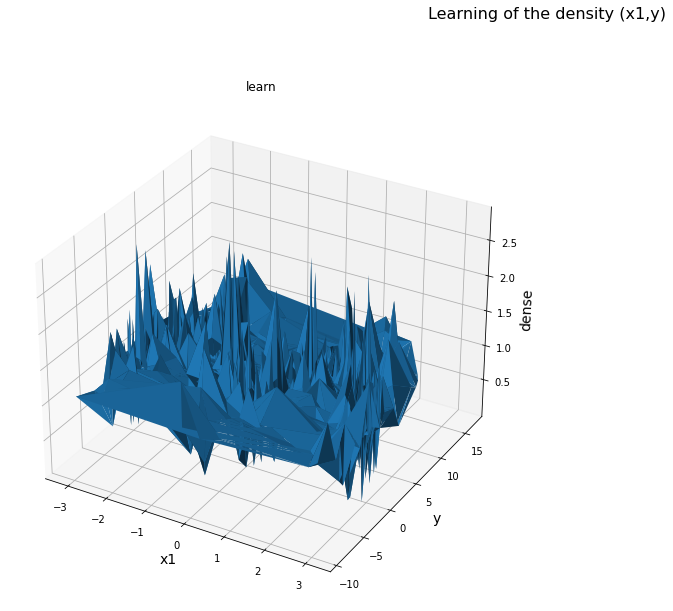

In [34]:
unif_variable = np.random.uniform(0, 1, (2000, 2)) #tirage des marginales uniformes, histoire de voir... 
x,y = unif_variable[:,0],unif_variable[:,1]
x_results = pd.DataFrame()
x_results["x1"]=x2
x_results["y"]=ishig_v
x_results["dense"]=np.abs(np.squeeze(mice_x2.copulas_density.predict(unif_variable))) #densité prédite "du copule"

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, projection='3d')
fig.suptitle('Learning of the density (x1,y)', fontsize=16)
ax1.set_xlabel('x1', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_zlabel('dense', fontsize=14)
ax1.set_title("learn")
# Plot the data for the first plot
ax1.plot_trisurf(x_results["x1"], x_results["y"],x_results["dense"], linewidth=0.01)

1/1 [==============================] - 0s 23ms/step


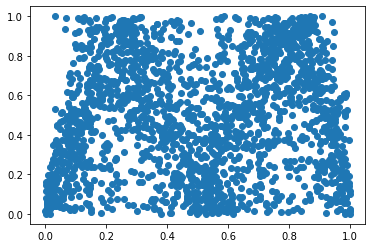

In [33]:
simu_x1 = mice_x2.simulate(2000)
plt.scatter(simu_x1[:,0],simu_x1[:,1])
sample = np.zeros((2000,2)) #it is important to make this step of normalization, to help the model learning the copula
ecdf = ECDF(x2); ecdf_f = ECDF(ishig_v)
sample[:,0]=ecdf(x2)
sample[:,1]=ecdf_f(ishig_v)
#plt.scatter(sample[:,0],sample[:,1],color="red")

In [ ]:
ecdf = ECDF(x2)
sample[:,0]=ecdf(x2)

mice_x2 = mice.MICE(dim_latent=6, dim_out=2, n_samples_train=200, n_layers=2, n_neurons=100) 
mice_x2.fit(sample, batch_size=200, epochs=5000)

100%|██████████| 5000/5000 [09:24<00:00,  8.85it/s]


7/7 [==============================] - 0s 2ms/step
0 [D total loss : 1.027308, Copula estimates: 0.725392, Self-consistency mean test: 0.727786]
7/7 [==============================] - 0s 2ms/step
1 [D total loss : 1.022684, Copula estimates: 0.775502, Self-consistency mean test: 0.771185]
7/7 [==============================] - 0s 2ms/step
2 [D total loss : 1.014440, Copula estimates: 0.817168, Self-consistency mean test: 0.818764]
7/7 [==============================] - 0s 2ms/step
3 [D total loss : 1.028660, Copula estimates: 0.850579, Self-consistency mean test: 0.855466]
7/7 [==============================] - 0s 2ms/step
4 [D total loss : 1.028712, Copula estimates: 0.850504, Self-consistency mean test: 0.855285]
7/7 [==============================] - 0s 2ms/step
5 [D total loss : 1.033296, Copula estimates: 0.868522, Self-consistency mean test: 0.861778]
7/7 [==============================] - 0s 2ms/step
6 [D total loss : 1.020978, Copula estimates: 0.871337, Self-consistency mean t

7/7 [==============================] - 0s 2ms/step
33 [D total loss : 1.028722, Copula estimates: 0.855039, Self-consistency mean test: 0.852741]
7/7 [==============================] - 0s 2ms/step
34 [D total loss : 0.996449, Copula estimates: 0.856580, Self-consistency mean test: 0.857270]
7/7 [==============================] - 0s 2ms/step
35 [D total loss : 0.986577, Copula estimates: 0.859809, Self-consistency mean test: 0.852617]
7/7 [==============================] - 0s 1ms/step
36 [D total loss : 1.041725, Copula estimates: 0.864448, Self-consistency mean test: 0.865513]
7/7 [==============================] - 0s 2ms/step
37 [D total loss : 0.978000, Copula estimates: 0.877604, Self-consistency mean test: 0.868398]
7/7 [==============================] - 0s 2ms/step
38 [D total loss : 1.004583, Copula estimates: 0.873397, Self-consistency mean test: 0.884990]
7/7 [==============================] - 0s 2ms/step
39 [D total loss : 1.028168, Copula estimates: 0.862812, Self-consistency

7/7 [==============================] - 0s 1ms/step
66 [D total loss : 1.025420, Copula estimates: 0.862241, Self-consistency mean test: 0.867944]
7/7 [==============================] - 0s 1ms/step
67 [D total loss : 1.019929, Copula estimates: 0.853691, Self-consistency mean test: 0.854378]
7/7 [==============================] - 0s 1ms/step
68 [D total loss : 1.025150, Copula estimates: 0.846544, Self-consistency mean test: 0.846908]
7/7 [==============================] - 0s 1ms/step
69 [D total loss : 0.995837, Copula estimates: 0.842497, Self-consistency mean test: 0.843257]
7/7 [==============================] - 0s 1ms/step
70 [D total loss : 0.976963, Copula estimates: 0.836136, Self-consistency mean test: 0.828333]
7/7 [==============================] - 0s 1ms/step
71 [D total loss : 0.997948, Copula estimates: 0.842383, Self-consistency mean test: 0.838042]
7/7 [==============================] - 0s 2ms/step
72 [D total loss : 1.006136, Copula estimates: 0.845961, Self-consistency

7/7 [==============================] - 0s 1ms/step
99 [D total loss : 1.036420, Copula estimates: 0.845308, Self-consistency mean test: 0.850878]
7/7 [==============================] - 0s 1ms/step
100 [D total loss : 1.019703, Copula estimates: 0.844606, Self-consistency mean test: 0.848845]
7/7 [==============================] - 0s 2ms/step
101 [D total loss : 1.006316, Copula estimates: 0.840825, Self-consistency mean test: 0.841210]
7/7 [==============================] - 0s 4ms/step
102 [D total loss : 1.003213, Copula estimates: 0.845610, Self-consistency mean test: 0.843797]
7/7 [==============================] - 0s 3ms/step
103 [D total loss : 1.006661, Copula estimates: 0.848042, Self-consistency mean test: 0.848299]
7/7 [==============================] - 0s 2ms/step
104 [D total loss : 1.018553, Copula estimates: 0.847344, Self-consistency mean test: 0.845652]
7/7 [==============================] - 0s 2ms/step
105 [D total loss : 1.004015, Copula estimates: 0.851250, Self-consi

7/7 [==============================] - 0s 1ms/step
132 [D total loss : 1.014952, Copula estimates: 0.866298, Self-consistency mean test: 0.864545]
7/7 [==============================] - 0s 993us/step
133 [D total loss : 1.012922, Copula estimates: 0.864140, Self-consistency mean test: 0.862816]
7/7 [==============================] - 0s 1ms/step
134 [D total loss : 1.020281, Copula estimates: 0.868738, Self-consistency mean test: 0.864654]
7/7 [==============================] - 0s 2ms/step
135 [D total loss : 0.992204, Copula estimates: 0.875156, Self-consistency mean test: 0.873939]
7/7 [==============================] - 0s 2ms/step
136 [D total loss : 1.026057, Copula estimates: 0.876185, Self-consistency mean test: 0.874211]
7/7 [==============================] - 0s 2ms/step
137 [D total loss : 1.015690, Copula estimates: 0.879915, Self-consistency mean test: 0.880930]
7/7 [==============================] - 0s 1ms/step
138 [D total loss : 1.009573, Copula estimates: 0.880511, Self-co

7/7 [==============================] - 0s 2ms/step
165 [D total loss : 0.988377, Copula estimates: 0.873707, Self-consistency mean test: 0.872711]
7/7 [==============================] - 0s 2ms/step
166 [D total loss : 1.026048, Copula estimates: 0.874222, Self-consistency mean test: 0.874249]
7/7 [==============================] - 0s 2ms/step
167 [D total loss : 1.001308, Copula estimates: 0.862987, Self-consistency mean test: 0.858306]
7/7 [==============================] - 0s 2ms/step
168 [D total loss : 0.998533, Copula estimates: 0.865123, Self-consistency mean test: 0.863121]
7/7 [==============================] - 0s 3ms/step
169 [D total loss : 0.999288, Copula estimates: 0.862797, Self-consistency mean test: 0.861394]
7/7 [==============================] - 0s 2ms/step
170 [D total loss : 1.004327, Copula estimates: 0.861921, Self-consistency mean test: 0.862399]
7/7 [==============================] - 0s 2ms/step
171 [D total loss : 0.999025, Copula estimates: 0.859130, Self-cons

7/7 [==============================] - 0s 1ms/step
198 [D total loss : 1.005268, Copula estimates: 0.888369, Self-consistency mean test: 0.884683]
7/7 [==============================] - 0s 1ms/step
199 [D total loss : 0.987411, Copula estimates: 0.891357, Self-consistency mean test: 0.886232]
7/7 [==============================] - 0s 1ms/step
200 [D total loss : 1.007990, Copula estimates: 0.899900, Self-consistency mean test: 0.897643]
7/7 [==============================] - 0s 1ms/step
201 [D total loss : 1.003717, Copula estimates: 0.896920, Self-consistency mean test: 0.904753]
7/7 [==============================] - 0s 1ms/step
202 [D total loss : 1.026957, Copula estimates: 0.899429, Self-consistency mean test: 0.895341]
7/7 [==============================] - 0s 1ms/step
203 [D total loss : 1.006781, Copula estimates: 0.892979, Self-consistency mean test: 0.895304]
7/7 [==============================] - 0s 1ms/step
204 [D total loss : 1.006534, Copula estimates: 0.882145, Self-cons

7/7 [==============================] - 0s 1ms/step
231 [D total loss : 1.016486, Copula estimates: 0.856036, Self-consistency mean test: 0.857132]
7/7 [==============================] - 0s 2ms/step
232 [D total loss : 1.004218, Copula estimates: 0.857463, Self-consistency mean test: 0.856977]
7/7 [==============================] - 0s 1ms/step
233 [D total loss : 1.004715, Copula estimates: 0.855550, Self-consistency mean test: 0.854745]
7/7 [==============================] - 0s 1ms/step
234 [D total loss : 0.999106, Copula estimates: 0.857674, Self-consistency mean test: 0.857310]
7/7 [==============================] - 0s 3ms/step
235 [D total loss : 1.011112, Copula estimates: 0.862706, Self-consistency mean test: 0.862697]
7/7 [==============================] - 0s 2ms/step
236 [D total loss : 1.011368, Copula estimates: 0.870065, Self-consistency mean test: 0.868060]
7/7 [==============================] - 0s 1ms/step
237 [D total loss : 1.008727, Copula estimates: 0.871911, Self-cons

7/7 [==============================] - 0s 2ms/step
264 [D total loss : 1.015781, Copula estimates: 0.892560, Self-consistency mean test: 0.890043]
7/7 [==============================] - 0s 2ms/step
265 [D total loss : 1.006334, Copula estimates: 0.889727, Self-consistency mean test: 0.892417]
7/7 [==============================] - 0s 2ms/step
266 [D total loss : 1.006741, Copula estimates: 0.886164, Self-consistency mean test: 0.883589]
7/7 [==============================] - 0s 2ms/step
267 [D total loss : 0.995490, Copula estimates: 0.884058, Self-consistency mean test: 0.885610]
7/7 [==============================] - 0s 2ms/step
268 [D total loss : 0.994024, Copula estimates: 0.883933, Self-consistency mean test: 0.880651]
7/7 [==============================] - 0s 2ms/step
269 [D total loss : 1.003841, Copula estimates: 0.887860, Self-consistency mean test: 0.886912]
7/7 [==============================] - 0s 2ms/step
270 [D total loss : 1.006129, Copula estimates: 0.884053, Self-cons

7/7 [==============================] - 0s 2ms/step
297 [D total loss : 1.019829, Copula estimates: 0.906839, Self-consistency mean test: 0.911309]
7/7 [==============================] - 0s 2ms/step
298 [D total loss : 0.989165, Copula estimates: 0.909619, Self-consistency mean test: 0.912158]
7/7 [==============================] - 0s 2ms/step
299 [D total loss : 0.997940, Copula estimates: 0.905860, Self-consistency mean test: 0.906626]
7/7 [==============================] - 0s 2ms/step
300 [D total loss : 0.997063, Copula estimates: 0.902529, Self-consistency mean test: 0.901124]
7/7 [==============================] - 0s 2ms/step
301 [D total loss : 1.000433, Copula estimates: 0.903263, Self-consistency mean test: 0.899300]
7/7 [==============================] - 0s 1ms/step
302 [D total loss : 1.015430, Copula estimates: 0.895819, Self-consistency mean test: 0.896583]
7/7 [==============================] - 0s 1ms/step
303 [D total loss : 0.999335, Copula estimates: 0.907615, Self-cons

7/7 [==============================] - 0s 1ms/step
330 [D total loss : 0.999324, Copula estimates: 0.898033, Self-consistency mean test: 0.899212]
7/7 [==============================] - 0s 1ms/step
331 [D total loss : 1.024157, Copula estimates: 0.895376, Self-consistency mean test: 0.896635]
7/7 [==============================] - 0s 1ms/step
332 [D total loss : 1.007013, Copula estimates: 0.896477, Self-consistency mean test: 0.895854]
7/7 [==============================] - 0s 1ms/step
333 [D total loss : 1.013065, Copula estimates: 0.897542, Self-consistency mean test: 0.893348]
7/7 [==============================] - 0s 1ms/step
334 [D total loss : 1.018783, Copula estimates: 0.892903, Self-consistency mean test: 0.891893]
7/7 [==============================] - 0s 1ms/step
335 [D total loss : 1.010774, Copula estimates: 0.896087, Self-consistency mean test: 0.895409]
7/7 [==============================] - 0s 1ms/step
336 [D total loss : 1.011590, Copula estimates: 0.892238, Self-cons

7/7 [==============================] - 0s 1ms/step
363 [D total loss : 0.996230, Copula estimates: 0.900342, Self-consistency mean test: 0.905894]
7/7 [==============================] - 0s 1ms/step
364 [D total loss : 1.016162, Copula estimates: 0.898962, Self-consistency mean test: 0.898266]
7/7 [==============================] - 0s 1ms/step
365 [D total loss : 0.995011, Copula estimates: 0.896179, Self-consistency mean test: 0.892747]
7/7 [==============================] - 0s 1ms/step
366 [D total loss : 1.010475, Copula estimates: 0.898880, Self-consistency mean test: 0.894526]
7/7 [==============================] - 0s 2ms/step
367 [D total loss : 0.992153, Copula estimates: 0.898850, Self-consistency mean test: 0.899606]
7/7 [==============================] - 0s 1ms/step
368 [D total loss : 1.022062, Copula estimates: 0.895529, Self-consistency mean test: 0.898459]
7/7 [==============================] - 0s 1ms/step
369 [D total loss : 1.017192, Copula estimates: 0.899230, Self-cons

7/7 [==============================] - 0s 1ms/step
396 [D total loss : 0.995944, Copula estimates: 0.894436, Self-consistency mean test: 0.893331]
7/7 [==============================] - 0s 1ms/step
397 [D total loss : 1.019968, Copula estimates: 0.890126, Self-consistency mean test: 0.891133]
7/7 [==============================] - 0s 3ms/step
398 [D total loss : 0.996872, Copula estimates: 0.888632, Self-consistency mean test: 0.888132]
7/7 [==============================] - 0s 1ms/step
399 [D total loss : 1.006759, Copula estimates: 0.887881, Self-consistency mean test: 0.887741]
7/7 [==============================] - 0s 1ms/step
400 [D total loss : 1.019309, Copula estimates: 0.890258, Self-consistency mean test: 0.889347]
7/7 [==============================] - 0s 2ms/step
401 [D total loss : 0.997014, Copula estimates: 0.893647, Self-consistency mean test: 0.895251]
7/7 [==============================] - 0s 2ms/step
402 [D total loss : 1.008880, Copula estimates: 0.890979, Self-cons

7/7 [==============================] - 0s 2ms/step
429 [D total loss : 1.014614, Copula estimates: 0.909885, Self-consistency mean test: 0.913979]
7/7 [==============================] - 0s 2ms/step
430 [D total loss : 0.992835, Copula estimates: 0.902091, Self-consistency mean test: 0.904313]
7/7 [==============================] - 0s 1ms/step
431 [D total loss : 0.998295, Copula estimates: 0.895987, Self-consistency mean test: 0.895615]
7/7 [==============================] - 0s 1ms/step
432 [D total loss : 0.983228, Copula estimates: 0.897151, Self-consistency mean test: 0.894084]
7/7 [==============================] - 0s 1ms/step
433 [D total loss : 1.010098, Copula estimates: 0.898973, Self-consistency mean test: 0.898248]
7/7 [==============================] - 0s 1ms/step
434 [D total loss : 0.997140, Copula estimates: 0.902739, Self-consistency mean test: 0.906215]
7/7 [==============================] - 0s 1ms/step
435 [D total loss : 1.001571, Copula estimates: 0.901743, Self-cons

7/7 [==============================] - 0s 1ms/step
462 [D total loss : 0.995613, Copula estimates: 0.912979, Self-consistency mean test: 0.908431]
7/7 [==============================] - 0s 1ms/step
463 [D total loss : 0.995542, Copula estimates: 0.912423, Self-consistency mean test: 0.912925]
7/7 [==============================] - 0s 1ms/step
464 [D total loss : 0.997144, Copula estimates: 0.915109, Self-consistency mean test: 0.915536]
7/7 [==============================] - 0s 1ms/step
465 [D total loss : 0.990940, Copula estimates: 0.921607, Self-consistency mean test: 0.919333]
7/7 [==============================] - 0s 1ms/step
466 [D total loss : 1.000148, Copula estimates: 0.922244, Self-consistency mean test: 0.923434]
7/7 [==============================] - 0s 2ms/step
467 [D total loss : 1.003959, Copula estimates: 0.923343, Self-consistency mean test: 0.923335]
7/7 [==============================] - 0s 1ms/step
468 [D total loss : 0.999837, Copula estimates: 0.916793, Self-cons

7/7 [==============================] - 0s 2ms/step
495 [D total loss : 1.006597, Copula estimates: 0.927442, Self-consistency mean test: 0.924516]
7/7 [==============================] - 0s 2ms/step
496 [D total loss : 1.010826, Copula estimates: 0.926984, Self-consistency mean test: 0.932520]
7/7 [==============================] - 0s 1ms/step
497 [D total loss : 1.009773, Copula estimates: 0.924382, Self-consistency mean test: 0.925132]
7/7 [==============================] - 0s 2ms/step
498 [D total loss : 1.004307, Copula estimates: 0.926484, Self-consistency mean test: 0.920429]
7/7 [==============================] - 0s 2ms/step
499 [D total loss : 0.996906, Copula estimates: 0.926861, Self-consistency mean test: 0.927209]
7/7 [==============================] - 0s 2ms/step
500 [D total loss : 1.002892, Copula estimates: 0.930237, Self-consistency mean test: 0.929364]
7/7 [==============================] - 0s 2ms/step
501 [D total loss : 0.998513, Copula estimates: 0.933726, Self-cons

7/7 [==============================] - 0s 2ms/step
528 [D total loss : 0.999950, Copula estimates: 0.931966, Self-consistency mean test: 0.930595]
7/7 [==============================] - 0s 1ms/step
529 [D total loss : 1.000749, Copula estimates: 0.935240, Self-consistency mean test: 0.934422]
7/7 [==============================] - 0s 2ms/step
530 [D total loss : 1.003523, Copula estimates: 0.937708, Self-consistency mean test: 0.937107]
7/7 [==============================] - 0s 2ms/step
531 [D total loss : 0.997612, Copula estimates: 0.933942, Self-consistency mean test: 0.934434]
7/7 [==============================] - 0s 1ms/step
532 [D total loss : 0.998257, Copula estimates: 0.934017, Self-consistency mean test: 0.933422]
7/7 [==============================] - 0s 1ms/step
533 [D total loss : 1.007815, Copula estimates: 0.932827, Self-consistency mean test: 0.933467]
7/7 [==============================] - 0s 1ms/step
534 [D total loss : 0.992950, Copula estimates: 0.932968, Self-cons

7/7 [==============================] - 0s 1ms/step
561 [D total loss : 1.017624, Copula estimates: 0.937599, Self-consistency mean test: 0.935256]
7/7 [==============================] - 0s 1ms/step
562 [D total loss : 1.015149, Copula estimates: 0.939568, Self-consistency mean test: 0.940756]
7/7 [==============================] - 0s 1ms/step
563 [D total loss : 0.989877, Copula estimates: 0.935068, Self-consistency mean test: 0.939008]
7/7 [==============================] - 0s 1ms/step
564 [D total loss : 1.006238, Copula estimates: 0.934059, Self-consistency mean test: 0.933048]
7/7 [==============================] - 0s 1ms/step
565 [D total loss : 1.002026, Copula estimates: 0.929531, Self-consistency mean test: 0.928975]
7/7 [==============================] - 0s 2ms/step
566 [D total loss : 1.002695, Copula estimates: 0.930820, Self-consistency mean test: 0.928839]
7/7 [==============================] - 0s 2ms/step
567 [D total loss : 0.996488, Copula estimates: 0.933894, Self-cons

7/7 [==============================] - 0s 2ms/step
594 [D total loss : 1.000958, Copula estimates: 0.941431, Self-consistency mean test: 0.944729]
7/7 [==============================] - 0s 1ms/step
595 [D total loss : 1.014803, Copula estimates: 0.936020, Self-consistency mean test: 0.936126]
7/7 [==============================] - 0s 1ms/step
596 [D total loss : 1.005534, Copula estimates: 0.933227, Self-consistency mean test: 0.930970]
7/7 [==============================] - 0s 2ms/step
597 [D total loss : 0.993763, Copula estimates: 0.929514, Self-consistency mean test: 0.926911]
7/7 [==============================] - 0s 1ms/step
598 [D total loss : 0.996691, Copula estimates: 0.936307, Self-consistency mean test: 0.935264]
7/7 [==============================] - 0s 2ms/step
599 [D total loss : 1.008038, Copula estimates: 0.940521, Self-consistency mean test: 0.938598]
7/7 [==============================] - 0s 1ms/step
600 [D total loss : 1.008376, Copula estimates: 0.945792, Self-cons

7/7 [==============================] - 0s 1ms/step
627 [D total loss : 0.991209, Copula estimates: 0.938298, Self-consistency mean test: 0.938364]
7/7 [==============================] - 0s 1ms/step
628 [D total loss : 0.991133, Copula estimates: 0.938884, Self-consistency mean test: 0.940238]
7/7 [==============================] - 0s 1ms/step
629 [D total loss : 1.004591, Copula estimates: 0.933399, Self-consistency mean test: 0.935179]
7/7 [==============================] - 0s 1ms/step
630 [D total loss : 1.007583, Copula estimates: 0.933005, Self-consistency mean test: 0.930982]
7/7 [==============================] - 0s 1ms/step
631 [D total loss : 1.007738, Copula estimates: 0.933587, Self-consistency mean test: 0.932850]
7/7 [==============================] - 0s 1ms/step
632 [D total loss : 0.998148, Copula estimates: 0.935224, Self-consistency mean test: 0.933203]
7/7 [==============================] - 0s 1ms/step
633 [D total loss : 0.996901, Copula estimates: 0.937245, Self-cons

7/7 [==============================] - 0s 958us/step
660 [D total loss : 0.988017, Copula estimates: 0.943941, Self-consistency mean test: 0.944523]
7/7 [==============================] - 0s 1ms/step
661 [D total loss : 1.000394, Copula estimates: 0.941950, Self-consistency mean test: 0.943563]
7/7 [==============================] - 0s 997us/step
662 [D total loss : 0.990055, Copula estimates: 0.941156, Self-consistency mean test: 0.940293]
7/7 [==============================] - 0s 1ms/step
663 [D total loss : 1.002666, Copula estimates: 0.939587, Self-consistency mean test: 0.942649]
7/7 [==============================] - 0s 1ms/step
664 [D total loss : 1.014147, Copula estimates: 0.937304, Self-consistency mean test: 0.938205]
7/7 [==============================] - 0s 2ms/step
665 [D total loss : 1.000139, Copula estimates: 0.933540, Self-consistency mean test: 0.932956]
7/7 [==============================] - 0s 2ms/step
666 [D total loss : 0.985776, Copula estimates: 0.932754, Self-

7/7 [==============================] - 0s 1ms/step
693 [D total loss : 0.998184, Copula estimates: 0.954166, Self-consistency mean test: 0.953047]
7/7 [==============================] - 0s 1ms/step
694 [D total loss : 1.009330, Copula estimates: 0.956786, Self-consistency mean test: 0.955191]
7/7 [==============================] - 0s 2ms/step
695 [D total loss : 0.994561, Copula estimates: 0.958028, Self-consistency mean test: 0.956094]
7/7 [==============================] - 0s 2ms/step
696 [D total loss : 1.002481, Copula estimates: 0.957070, Self-consistency mean test: 0.953069]
7/7 [==============================] - 0s 2ms/step
697 [D total loss : 1.000656, Copula estimates: 0.961310, Self-consistency mean test: 0.961342]
7/7 [==============================] - 0s 2ms/step
698 [D total loss : 1.000285, Copula estimates: 0.956960, Self-consistency mean test: 0.960886]
7/7 [==============================] - 0s 2ms/step
699 [D total loss : 1.010132, Copula estimates: 0.950878, Self-cons

7/7 [==============================] - 0s 2ms/step
726 [D total loss : 1.001835, Copula estimates: 0.954895, Self-consistency mean test: 0.955054]
7/7 [==============================] - 0s 1ms/step
727 [D total loss : 1.009415, Copula estimates: 0.950067, Self-consistency mean test: 0.951919]
7/7 [==============================] - 0s 2ms/step
728 [D total loss : 1.012520, Copula estimates: 0.948092, Self-consistency mean test: 0.949333]
7/7 [==============================] - 0s 1ms/step
729 [D total loss : 0.992599, Copula estimates: 0.945388, Self-consistency mean test: 0.944295]
7/7 [==============================] - 0s 1ms/step
730 [D total loss : 1.004983, Copula estimates: 0.949172, Self-consistency mean test: 0.945955]
7/7 [==============================] - 0s 1ms/step
731 [D total loss : 1.003090, Copula estimates: 0.952991, Self-consistency mean test: 0.951594]
7/7 [==============================] - 0s 1ms/step
732 [D total loss : 0.991932, Copula estimates: 0.959513, Self-cons

7/7 [==============================] - 0s 2ms/step
759 [D total loss : 0.998443, Copula estimates: 0.953022, Self-consistency mean test: 0.955779]
7/7 [==============================] - 0s 2ms/step
760 [D total loss : 0.998169, Copula estimates: 0.949205, Self-consistency mean test: 0.946590]
7/7 [==============================] - 0s 2ms/step
761 [D total loss : 0.997938, Copula estimates: 0.951346, Self-consistency mean test: 0.948844]
7/7 [==============================] - 0s 2ms/step
762 [D total loss : 1.003429, Copula estimates: 0.954342, Self-consistency mean test: 0.952903]
7/7 [==============================] - 0s 2ms/step
763 [D total loss : 1.006411, Copula estimates: 0.957837, Self-consistency mean test: 0.954700]
7/7 [==============================] - 0s 2ms/step
764 [D total loss : 1.007025, Copula estimates: 0.956588, Self-consistency mean test: 0.955955]
7/7 [==============================] - 0s 1ms/step
765 [D total loss : 1.013522, Copula estimates: 0.959466, Self-cons

7/7 [==============================] - 0s 1ms/step
792 [D total loss : 0.999515, Copula estimates: 0.960625, Self-consistency mean test: 0.959485]
7/7 [==============================] - 0s 2ms/step
793 [D total loss : 0.995683, Copula estimates: 0.962117, Self-consistency mean test: 0.963253]
7/7 [==============================] - 0s 2ms/step
794 [D total loss : 1.000110, Copula estimates: 0.964674, Self-consistency mean test: 0.962693]
7/7 [==============================] - 0s 1ms/step
795 [D total loss : 1.003039, Copula estimates: 0.965754, Self-consistency mean test: 0.965886]
7/7 [==============================] - 0s 1ms/step
796 [D total loss : 1.010890, Copula estimates: 0.962691, Self-consistency mean test: 0.962752]
7/7 [==============================] - 0s 1ms/step
797 [D total loss : 0.995671, Copula estimates: 0.966631, Self-consistency mean test: 0.963077]
7/7 [==============================] - 0s 2ms/step
798 [D total loss : 0.998598, Copula estimates: 0.968065, Self-cons

7/7 [==============================] - 0s 2ms/step
825 [D total loss : 1.001339, Copula estimates: 0.961912, Self-consistency mean test: 0.960370]
7/7 [==============================] - 0s 1ms/step
826 [D total loss : 0.992719, Copula estimates: 0.961631, Self-consistency mean test: 0.963233]
7/7 [==============================] - 0s 2ms/step
827 [D total loss : 1.002161, Copula estimates: 0.958531, Self-consistency mean test: 0.957142]
7/7 [==============================] - 0s 1ms/step
828 [D total loss : 1.008711, Copula estimates: 0.956173, Self-consistency mean test: 0.957986]
7/7 [==============================] - 0s 1ms/step
829 [D total loss : 0.999605, Copula estimates: 0.951854, Self-consistency mean test: 0.952501]
7/7 [==============================] - 0s 2ms/step
830 [D total loss : 0.997131, Copula estimates: 0.955405, Self-consistency mean test: 0.954023]
7/7 [==============================] - 0s 1ms/step
831 [D total loss : 1.005903, Copula estimates: 0.957883, Self-cons

7/7 [==============================] - 0s 1ms/step
858 [D total loss : 0.997197, Copula estimates: 0.965550, Self-consistency mean test: 0.963399]
7/7 [==============================] - 0s 2ms/step
859 [D total loss : 1.013830, Copula estimates: 0.963313, Self-consistency mean test: 0.962921]
7/7 [==============================] - 0s 1ms/step
860 [D total loss : 1.001661, Copula estimates: 0.962918, Self-consistency mean test: 0.962239]
7/7 [==============================] - 0s 2ms/step
861 [D total loss : 0.998085, Copula estimates: 0.964436, Self-consistency mean test: 0.961459]
7/7 [==============================] - 0s 2ms/step
862 [D total loss : 1.007097, Copula estimates: 0.969122, Self-consistency mean test: 0.966297]
7/7 [==============================] - 0s 1ms/step
863 [D total loss : 0.996080, Copula estimates: 0.968310, Self-consistency mean test: 0.970318]
7/7 [==============================] - 0s 1ms/step
864 [D total loss : 1.004790, Copula estimates: 0.964796, Self-cons

7/7 [==============================] - 0s 2ms/step
891 [D total loss : 0.997166, Copula estimates: 0.965033, Self-consistency mean test: 0.968047]
7/7 [==============================] - 0s 2ms/step
892 [D total loss : 1.002335, Copula estimates: 0.958114, Self-consistency mean test: 0.958575]
7/7 [==============================] - 0s 1ms/step
893 [D total loss : 1.004464, Copula estimates: 0.959204, Self-consistency mean test: 0.958881]
7/7 [==============================] - 0s 2ms/step
894 [D total loss : 1.006305, Copula estimates: 0.958941, Self-consistency mean test: 0.960495]
7/7 [==============================] - 0s 2ms/step
895 [D total loss : 0.996702, Copula estimates: 0.958175, Self-consistency mean test: 0.958552]
7/7 [==============================] - 0s 1ms/step
896 [D total loss : 1.006899, Copula estimates: 0.962598, Self-consistency mean test: 0.962354]
7/7 [==============================] - 0s 1ms/step
897 [D total loss : 1.003722, Copula estimates: 0.964956, Self-cons

7/7 [==============================] - 0s 2ms/step
924 [D total loss : 0.995293, Copula estimates: 0.973276, Self-consistency mean test: 0.974140]
7/7 [==============================] - 0s 2ms/step
925 [D total loss : 1.010056, Copula estimates: 0.970896, Self-consistency mean test: 0.971245]
7/7 [==============================] - 0s 2ms/step
926 [D total loss : 1.001215, Copula estimates: 0.969170, Self-consistency mean test: 0.966974]
7/7 [==============================] - 0s 1ms/step
927 [D total loss : 0.993842, Copula estimates: 0.970496, Self-consistency mean test: 0.968962]
7/7 [==============================] - 0s 2ms/step
928 [D total loss : 0.997779, Copula estimates: 0.973824, Self-consistency mean test: 0.974690]
7/7 [==============================] - 0s 2ms/step
929 [D total loss : 1.003180, Copula estimates: 0.973407, Self-consistency mean test: 0.975112]
7/7 [==============================] - 0s 2ms/step
930 [D total loss : 1.002326, Copula estimates: 0.971244, Self-cons

7/7 [==============================] - 0s 1ms/step
957 [D total loss : 1.004137, Copula estimates: 0.980950, Self-consistency mean test: 0.979526]
7/7 [==============================] - 0s 2ms/step
958 [D total loss : 0.995340, Copula estimates: 0.982179, Self-consistency mean test: 0.980710]
7/7 [==============================] - 0s 2ms/step
959 [D total loss : 0.988062, Copula estimates: 0.983180, Self-consistency mean test: 0.983727]
7/7 [==============================] - 0s 1ms/step
960 [D total loss : 1.007201, Copula estimates: 0.982159, Self-consistency mean test: 0.979693]
7/7 [==============================] - 0s 3ms/step
961 [D total loss : 0.999992, Copula estimates: 0.980207, Self-consistency mean test: 0.980006]
7/7 [==============================] - 0s 3ms/step
962 [D total loss : 0.997808, Copula estimates: 0.976950, Self-consistency mean test: 0.976651]
7/7 [==============================] - 0s 2ms/step
963 [D total loss : 0.989142, Copula estimates: 0.975823, Self-cons

7/7 [==============================] - 0s 2ms/step
990 [D total loss : 0.997412, Copula estimates: 0.980827, Self-consistency mean test: 0.976060]
7/7 [==============================] - 0s 2ms/step
991 [D total loss : 0.992024, Copula estimates: 0.979955, Self-consistency mean test: 0.976778]
7/7 [==============================] - 0s 2ms/step
992 [D total loss : 1.011243, Copula estimates: 0.979172, Self-consistency mean test: 0.982113]
7/7 [==============================] - 0s 2ms/step
993 [D total loss : 0.999684, Copula estimates: 0.969380, Self-consistency mean test: 0.970127]
7/7 [==============================] - 0s 2ms/step
994 [D total loss : 1.003246, Copula estimates: 0.963996, Self-consistency mean test: 0.964370]
7/7 [==============================] - 0s 2ms/step
995 [D total loss : 0.999759, Copula estimates: 0.955372, Self-consistency mean test: 0.954890]
7/7 [==============================] - 0s 2ms/step
996 [D total loss : 0.996988, Copula estimates: 0.954279, Self-cons

7/7 [==============================] - 0s 1ms/step
1023 [D total loss : 1.000707, Copula estimates: 0.972669, Self-consistency mean test: 0.973374]
7/7 [==============================] - 0s 1ms/step
1024 [D total loss : 1.004151, Copula estimates: 0.975585, Self-consistency mean test: 0.973689]
7/7 [==============================] - 0s 1ms/step
1025 [D total loss : 1.004508, Copula estimates: 0.977496, Self-consistency mean test: 0.976715]
7/7 [==============================] - 0s 1ms/step
1026 [D total loss : 1.003243, Copula estimates: 0.978827, Self-consistency mean test: 0.977205]
7/7 [==============================] - 0s 997us/step
1027 [D total loss : 1.006194, Copula estimates: 0.976664, Self-consistency mean test: 0.978345]
7/7 [==============================] - 0s 1ms/step
1028 [D total loss : 0.999501, Copula estimates: 0.973191, Self-consistency mean test: 0.973800]
7/7 [==============================] - 0s 1ms/step
1029 [D total loss : 0.997935, Copula estimates: 0.972244, 

7/7 [==============================] - 0s 2ms/step
1056 [D total loss : 1.006486, Copula estimates: 0.967932, Self-consistency mean test: 0.969751]
7/7 [==============================] - 0s 2ms/step
1057 [D total loss : 1.016064, Copula estimates: 0.964497, Self-consistency mean test: 0.964117]
7/7 [==============================] - 0s 2ms/step
1058 [D total loss : 0.995837, Copula estimates: 0.960096, Self-consistency mean test: 0.959586]
7/7 [==============================] - 0s 3ms/step
1059 [D total loss : 1.007828, Copula estimates: 0.961823, Self-consistency mean test: 0.964984]
7/7 [==============================] - 0s 2ms/step
1060 [D total loss : 1.001567, Copula estimates: 0.963859, Self-consistency mean test: 0.963449]
7/7 [==============================] - 0s 2ms/step
1061 [D total loss : 0.998569, Copula estimates: 0.965401, Self-consistency mean test: 0.964429]
7/7 [==============================] - 0s 2ms/step
1062 [D total loss : 1.001975, Copula estimates: 0.961550, Se

7/7 [==============================] - 0s 2ms/step
1089 [D total loss : 1.002068, Copula estimates: 0.973141, Self-consistency mean test: 0.971656]
7/7 [==============================] - 0s 2ms/step
1090 [D total loss : 0.995117, Copula estimates: 0.975302, Self-consistency mean test: 0.973797]
7/7 [==============================] - 0s 2ms/step
1091 [D total loss : 1.003733, Copula estimates: 0.977618, Self-consistency mean test: 0.978060]
7/7 [==============================] - 0s 2ms/step
1092 [D total loss : 0.996953, Copula estimates: 0.982603, Self-consistency mean test: 0.979301]
7/7 [==============================] - 0s 2ms/step
1093 [D total loss : 0.998988, Copula estimates: 0.985367, Self-consistency mean test: 0.982735]
7/7 [==============================] - 0s 1ms/step
1094 [D total loss : 1.000085, Copula estimates: 0.989863, Self-consistency mean test: 0.990156]
7/7 [==============================] - 0s 2ms/step
1095 [D total loss : 0.998325, Copula estimates: 0.987344, Se

7/7 [==============================] - 0s 1ms/step
1122 [D total loss : 0.990257, Copula estimates: 1.001295, Self-consistency mean test: 0.999683]
7/7 [==============================] - 0s 1ms/step
1123 [D total loss : 0.994155, Copula estimates: 1.000834, Self-consistency mean test: 0.997248]
7/7 [==============================] - 0s 1ms/step
1124 [D total loss : 1.004720, Copula estimates: 1.000866, Self-consistency mean test: 1.002543]
7/7 [==============================] - 0s 2ms/step
1125 [D total loss : 0.988931, Copula estimates: 0.994533, Self-consistency mean test: 0.990440]
7/7 [==============================] - 0s 1ms/step
1126 [D total loss : 0.992503, Copula estimates: 0.992303, Self-consistency mean test: 0.991731]
7/7 [==============================] - 0s 1ms/step
1127 [D total loss : 1.014453, Copula estimates: 0.986532, Self-consistency mean test: 0.991932]
7/7 [==============================] - 0s 1ms/step
1128 [D total loss : 1.007600, Copula estimates: 0.973840, Se

7/7 [==============================] - 0s 2ms/step
1155 [D total loss : 0.995189, Copula estimates: 0.978139, Self-consistency mean test: 0.977922]
7/7 [==============================] - 0s 2ms/step
1156 [D total loss : 1.002528, Copula estimates: 0.972000, Self-consistency mean test: 0.971955]
7/7 [==============================] - 0s 2ms/step
1157 [D total loss : 0.989916, Copula estimates: 0.969409, Self-consistency mean test: 0.967041]
7/7 [==============================] - 0s 2ms/step
1158 [D total loss : 1.005514, Copula estimates: 0.974832, Self-consistency mean test: 0.973014]
7/7 [==============================] - 0s 2ms/step
1159 [D total loss : 0.999409, Copula estimates: 0.979253, Self-consistency mean test: 0.980211]
7/7 [==============================] - 0s 1ms/step
1160 [D total loss : 0.989973, Copula estimates: 0.982355, Self-consistency mean test: 0.983360]
7/7 [==============================] - 0s 1ms/step
1161 [D total loss : 0.995231, Copula estimates: 0.983795, Se

7/7 [==============================] - 0s 1ms/step
1187 [D total loss : 1.003278, Copula estimates: 0.981113, Self-consistency mean test: 0.982865]
7/7 [==============================] - 0s 997us/step
1188 [D total loss : 0.999913, Copula estimates: 0.973594, Self-consistency mean test: 0.974605]
7/7 [==============================] - 0s 1ms/step
1189 [D total loss : 0.996137, Copula estimates: 0.970532, Self-consistency mean test: 0.968883]
7/7 [==============================] - 0s 1ms/step
1190 [D total loss : 1.005776, Copula estimates: 0.972130, Self-consistency mean test: 0.972905]
7/7 [==============================] - 0s 998us/step
1191 [D total loss : 0.995130, Copula estimates: 0.971455, Self-consistency mean test: 0.971822]
7/7 [==============================] - 0s 927us/step
1192 [D total loss : 0.998793, Copula estimates: 0.969588, Self-consistency mean test: 0.971072]
7/7 [==============================] - 0s 1ms/step
1193 [D total loss : 0.999516, Copula estimates: 0.9649

7/7 [==============================] - 0s 1ms/step
1220 [D total loss : 0.999609, Copula estimates: 0.970240, Self-consistency mean test: 0.969530]
7/7 [==============================] - 0s 1ms/step
1221 [D total loss : 1.002324, Copula estimates: 0.972272, Self-consistency mean test: 0.971402]
7/7 [==============================] - 0s 2ms/step
1222 [D total loss : 0.997292, Copula estimates: 0.972239, Self-consistency mean test: 0.971818]
7/7 [==============================] - 0s 1ms/step
1223 [D total loss : 1.009739, Copula estimates: 0.969559, Self-consistency mean test: 0.968651]
7/7 [==============================] - 0s 1ms/step
1224 [D total loss : 1.000737, Copula estimates: 0.968862, Self-consistency mean test: 0.968326]
7/7 [==============================] - 0s 2ms/step
1225 [D total loss : 1.004981, Copula estimates: 0.969791, Self-consistency mean test: 0.969449]
7/7 [==============================] - 0s 2ms/step
1226 [D total loss : 0.997019, Copula estimates: 0.970523, Se

7/7 [==============================] - 0s 2ms/step
1253 [D total loss : 0.998208, Copula estimates: 0.973337, Self-consistency mean test: 0.973153]
7/7 [==============================] - 0s 2ms/step
1254 [D total loss : 0.997753, Copula estimates: 0.972747, Self-consistency mean test: 0.972233]
7/7 [==============================] - 0s 1ms/step
1255 [D total loss : 1.008605, Copula estimates: 0.970124, Self-consistency mean test: 0.969360]
7/7 [==============================] - 0s 2ms/step
1256 [D total loss : 1.011853, Copula estimates: 0.973400, Self-consistency mean test: 0.972691]
7/7 [==============================] - 0s 4ms/step
1257 [D total loss : 0.991945, Copula estimates: 0.979111, Self-consistency mean test: 0.978389]
7/7 [==============================] - 0s 1ms/step
1258 [D total loss : 0.991091, Copula estimates: 0.978912, Self-consistency mean test: 0.978815]
7/7 [==============================] - 0s 1ms/step
1259 [D total loss : 0.998880, Copula estimates: 0.978046, Se

7/7 [==============================] - 0s 1ms/step
1286 [D total loss : 1.009218, Copula estimates: 0.981610, Self-consistency mean test: 0.980994]
7/7 [==============================] - 0s 2ms/step
1287 [D total loss : 0.998637, Copula estimates: 0.977934, Self-consistency mean test: 0.978172]
7/7 [==============================] - 0s 1ms/step
1288 [D total loss : 0.997129, Copula estimates: 0.963137, Self-consistency mean test: 0.961791]
7/7 [==============================] - 0s 1ms/step
1289 [D total loss : 0.999352, Copula estimates: 0.959926, Self-consistency mean test: 0.959384]
7/7 [==============================] - 0s 1ms/step
1290 [D total loss : 1.014518, Copula estimates: 0.955621, Self-consistency mean test: 0.954876]
7/7 [==============================] - 0s 1ms/step
1291 [D total loss : 0.994250, Copula estimates: 0.957069, Self-consistency mean test: 0.955283]
7/7 [==============================] - 0s 992us/step
1292 [D total loss : 1.004443, Copula estimates: 0.955406, 

7/7 [==============================] - 0s 1ms/step
1319 [D total loss : 0.996171, Copula estimates: 0.983578, Self-consistency mean test: 0.982624]
7/7 [==============================] - 0s 1ms/step
1320 [D total loss : 0.997841, Copula estimates: 0.983626, Self-consistency mean test: 0.982556]
7/7 [==============================] - 0s 2ms/step
1321 [D total loss : 1.006070, Copula estimates: 0.975505, Self-consistency mean test: 0.975376]
7/7 [==============================] - 0s 1ms/step
1322 [D total loss : 1.000997, Copula estimates: 0.972155, Self-consistency mean test: 0.970418]
7/7 [==============================] - 0s 2ms/step
1323 [D total loss : 1.001986, Copula estimates: 0.972626, Self-consistency mean test: 0.971747]
7/7 [==============================] - 0s 2ms/step
1324 [D total loss : 0.996885, Copula estimates: 0.976140, Self-consistency mean test: 0.975138]
7/7 [==============================] - 0s 2ms/step
1325 [D total loss : 0.998417, Copula estimates: 0.975744, Se

7/7 [==============================] - 0s 1ms/step
1352 [D total loss : 1.000394, Copula estimates: 0.990131, Self-consistency mean test: 0.990641]
7/7 [==============================] - 0s 1ms/step
1353 [D total loss : 0.996905, Copula estimates: 0.991419, Self-consistency mean test: 0.990851]
7/7 [==============================] - 0s 2ms/step
1354 [D total loss : 0.996087, Copula estimates: 0.992723, Self-consistency mean test: 0.990508]
7/7 [==============================] - 0s 1ms/step
1355 [D total loss : 0.995369, Copula estimates: 0.996474, Self-consistency mean test: 0.997488]
7/7 [==============================] - 0s 2ms/step
1356 [D total loss : 1.004041, Copula estimates: 0.988989, Self-consistency mean test: 0.988065]
7/7 [==============================] - 0s 1ms/step
1357 [D total loss : 0.998308, Copula estimates: 0.982392, Self-consistency mean test: 0.982538]
7/7 [==============================] - 0s 1ms/step
1358 [D total loss : 0.996427, Copula estimates: 0.974645, Se

7/7 [==============================] - 0s 3ms/step
1385 [D total loss : 0.998753, Copula estimates: 0.977476, Self-consistency mean test: 0.976759]
7/7 [==============================] - 0s 1ms/step
1386 [D total loss : 1.001294, Copula estimates: 0.980600, Self-consistency mean test: 0.978513]
7/7 [==============================] - 0s 2ms/step
1387 [D total loss : 0.998731, Copula estimates: 0.984551, Self-consistency mean test: 0.982152]
7/7 [==============================] - 0s 2ms/step
1388 [D total loss : 0.996174, Copula estimates: 0.993285, Self-consistency mean test: 0.992036]
7/7 [==============================] - 0s 2ms/step
1389 [D total loss : 0.998933, Copula estimates: 0.998996, Self-consistency mean test: 0.998968]
7/7 [==============================] - 0s 2ms/step
1390 [D total loss : 1.001540, Copula estimates: 0.998874, Self-consistency mean test: 0.994545]
7/7 [==============================] - 0s 2ms/step
1391 [D total loss : 0.997575, Copula estimates: 1.004640, Se

7/7 [==============================] - 0s 3ms/step
1418 [D total loss : 0.998681, Copula estimates: 0.988855, Self-consistency mean test: 0.987919]
7/7 [==============================] - 0s 2ms/step
1419 [D total loss : 0.998335, Copula estimates: 0.987015, Self-consistency mean test: 0.985986]
7/7 [==============================] - 0s 2ms/step
1420 [D total loss : 0.996925, Copula estimates: 0.985859, Self-consistency mean test: 0.986367]
7/7 [==============================] - 0s 3ms/step
1421 [D total loss : 0.995267, Copula estimates: 0.985229, Self-consistency mean test: 0.983431]
7/7 [==============================] - 0s 3ms/step
1422 [D total loss : 1.003187, Copula estimates: 0.984128, Self-consistency mean test: 0.983411]
7/7 [==============================] - 0s 2ms/step
1423 [D total loss : 0.995665, Copula estimates: 0.983997, Self-consistency mean test: 0.984129]
7/7 [==============================] - 0s 3ms/step
1424 [D total loss : 1.001309, Copula estimates: 0.981860, Se

7/7 [==============================] - 0s 2ms/step
1451 [D total loss : 1.000317, Copula estimates: 0.979128, Self-consistency mean test: 0.979552]
7/7 [==============================] - 0s 2ms/step
1452 [D total loss : 1.001000, Copula estimates: 0.977366, Self-consistency mean test: 0.976790]
7/7 [==============================] - 0s 2ms/step
1453 [D total loss : 0.998111, Copula estimates: 0.978143, Self-consistency mean test: 0.976336]
7/7 [==============================] - 0s 4ms/step
1454 [D total loss : 0.991790, Copula estimates: 0.979689, Self-consistency mean test: 0.980869]
7/7 [==============================] - 0s 2ms/step
1455 [D total loss : 0.996245, Copula estimates: 0.976431, Self-consistency mean test: 0.975772]
7/7 [==============================] - 0s 3ms/step
1456 [D total loss : 0.998136, Copula estimates: 0.982862, Self-consistency mean test: 0.981333]
7/7 [==============================] - 0s 2ms/step
1457 [D total loss : 1.003635, Copula estimates: 0.984909, Se

7/7 [==============================] - 0s 1ms/step
1484 [D total loss : 1.004104, Copula estimates: 0.988883, Self-consistency mean test: 0.990023]
7/7 [==============================] - 0s 1ms/step
1485 [D total loss : 0.996619, Copula estimates: 0.988738, Self-consistency mean test: 0.985206]
7/7 [==============================] - 0s 1ms/step
1486 [D total loss : 1.002727, Copula estimates: 0.993770, Self-consistency mean test: 0.990809]
7/7 [==============================] - 0s 2ms/step
1487 [D total loss : 1.003881, Copula estimates: 0.995450, Self-consistency mean test: 0.995669]
7/7 [==============================] - 0s 1ms/step
1488 [D total loss : 0.993936, Copula estimates: 0.994192, Self-consistency mean test: 0.992036]
7/7 [==============================] - 0s 1ms/step
1489 [D total loss : 0.999559, Copula estimates: 0.994666, Self-consistency mean test: 0.991955]
7/7 [==============================] - 0s 1ms/step
1490 [D total loss : 1.002857, Copula estimates: 0.992426, Se

7/7 [==============================] - 0s 2ms/step
1517 [D total loss : 0.994936, Copula estimates: 0.977921, Self-consistency mean test: 0.978727]
7/7 [==============================] - 0s 1ms/step
1518 [D total loss : 0.996267, Copula estimates: 0.967975, Self-consistency mean test: 0.966830]
7/7 [==============================] - 0s 1ms/step
1519 [D total loss : 1.000679, Copula estimates: 0.964728, Self-consistency mean test: 0.964310]
7/7 [==============================] - 0s 2ms/step
1520 [D total loss : 1.001584, Copula estimates: 0.962985, Self-consistency mean test: 0.962329]
7/7 [==============================] - 0s 2ms/step
1521 [D total loss : 1.006953, Copula estimates: 0.965790, Self-consistency mean test: 0.964287]
7/7 [==============================] - 0s 2ms/step
1522 [D total loss : 1.003469, Copula estimates: 0.972010, Self-consistency mean test: 0.970990]
7/7 [==============================] - 0s 2ms/step
1523 [D total loss : 0.994974, Copula estimates: 0.979542, Se

7/7 [==============================] - 0s 1ms/step
1550 [D total loss : 0.983486, Copula estimates: 0.977175, Self-consistency mean test: 0.975497]
7/7 [==============================] - 0s 1ms/step
1551 [D total loss : 1.004413, Copula estimates: 0.970633, Self-consistency mean test: 0.969408]
7/7 [==============================] - 0s 1ms/step
1552 [D total loss : 0.993569, Copula estimates: 0.969258, Self-consistency mean test: 0.967360]
7/7 [==============================] - 0s 1ms/step
1553 [D total loss : 0.987411, Copula estimates: 0.975821, Self-consistency mean test: 0.972993]
7/7 [==============================] - 0s 1ms/step
1554 [D total loss : 0.994578, Copula estimates: 0.984490, Self-consistency mean test: 0.982742]
7/7 [==============================] - 0s 2ms/step
1555 [D total loss : 1.005229, Copula estimates: 0.983781, Self-consistency mean test: 0.981209]
7/7 [==============================] - 0s 1ms/step
1556 [D total loss : 0.992182, Copula estimates: 0.979190, Se

7/7 [==============================] - 0s 2ms/step
1583 [D total loss : 1.001468, Copula estimates: 0.984955, Self-consistency mean test: 0.981397]
7/7 [==============================] - 0s 2ms/step
1584 [D total loss : 1.002269, Copula estimates: 0.989239, Self-consistency mean test: 0.987641]
7/7 [==============================] - 0s 2ms/step
1585 [D total loss : 0.996871, Copula estimates: 0.990226, Self-consistency mean test: 0.989668]
7/7 [==============================] - 0s 1ms/step
1586 [D total loss : 1.002010, Copula estimates: 0.984551, Self-consistency mean test: 0.981603]
7/7 [==============================] - 0s 2ms/step
1587 [D total loss : 0.999906, Copula estimates: 0.983358, Self-consistency mean test: 0.981716]
7/7 [==============================] - 0s 2ms/step
1588 [D total loss : 1.000476, Copula estimates: 0.979424, Self-consistency mean test: 0.977918]
7/7 [==============================] - 0s 1ms/step
1589 [D total loss : 0.993524, Copula estimates: 0.969770, Se

7/7 [==============================] - 0s 3ms/step
1616 [D total loss : 1.010074, Copula estimates: 0.972975, Self-consistency mean test: 0.974263]
7/7 [==============================] - 0s 2ms/step
1617 [D total loss : 0.997598, Copula estimates: 0.980117, Self-consistency mean test: 0.975764]
7/7 [==============================] - 0s 2ms/step
1618 [D total loss : 0.995505, Copula estimates: 0.988962, Self-consistency mean test: 0.986370]
7/7 [==============================] - 0s 2ms/step
1619 [D total loss : 1.002074, Copula estimates: 0.996610, Self-consistency mean test: 0.995554]
7/7 [==============================] - 0s 2ms/step
1620 [D total loss : 1.002388, Copula estimates: 0.999520, Self-consistency mean test: 0.997402]
7/7 [==============================] - 0s 2ms/step
1621 [D total loss : 1.007537, Copula estimates: 0.987577, Self-consistency mean test: 0.990664]
7/7 [==============================] - 0s 1ms/step
1622 [D total loss : 1.001932, Copula estimates: 0.990632, Se

7/7 [==============================] - 0s 2ms/step
1649 [D total loss : 1.008243, Copula estimates: 1.008112, Self-consistency mean test: 1.002653]
7/7 [==============================] - 0s 2ms/step
1650 [D total loss : 1.005685, Copula estimates: 1.019230, Self-consistency mean test: 1.014117]
7/7 [==============================] - 0s 2ms/step
1651 [D total loss : 1.000899, Copula estimates: 1.020910, Self-consistency mean test: 1.015977]
7/7 [==============================] - 0s 2ms/step
1652 [D total loss : 0.995259, Copula estimates: 1.022862, Self-consistency mean test: 1.019123]
7/7 [==============================] - 0s 2ms/step
1653 [D total loss : 0.998911, Copula estimates: 1.009701, Self-consistency mean test: 1.007752]
7/7 [==============================] - 0s 3ms/step
1654 [D total loss : 0.998697, Copula estimates: 0.998882, Self-consistency mean test: 0.994538]
7/7 [==============================] - 0s 2ms/step
1655 [D total loss : 0.992909, Copula estimates: 0.999919, Se

7/7 [==============================] - 0s 2ms/step
1682 [D total loss : 0.998764, Copula estimates: 0.987744, Self-consistency mean test: 0.987670]
7/7 [==============================] - 0s 1ms/step
1683 [D total loss : 0.989631, Copula estimates: 0.988363, Self-consistency mean test: 0.985212]
7/7 [==============================] - 0s 2ms/step
1684 [D total loss : 1.002001, Copula estimates: 0.988418, Self-consistency mean test: 0.985046]
7/7 [==============================] - 0s 1ms/step
1685 [D total loss : 0.994277, Copula estimates: 0.984513, Self-consistency mean test: 0.980762]
7/7 [==============================] - 0s 2ms/step
1686 [D total loss : 1.000524, Copula estimates: 0.983322, Self-consistency mean test: 0.979235]
7/7 [==============================] - 0s 1ms/step
1687 [D total loss : 0.993211, Copula estimates: 0.983010, Self-consistency mean test: 0.978834]
7/7 [==============================] - 0s 2ms/step
1688 [D total loss : 0.994867, Copula estimates: 0.986754, Se

7/7 [==============================] - 0s 2ms/step
1715 [D total loss : 1.012824, Copula estimates: 0.985167, Self-consistency mean test: 0.981646]
7/7 [==============================] - 0s 2ms/step
1716 [D total loss : 0.992603, Copula estimates: 0.987814, Self-consistency mean test: 0.982922]
7/7 [==============================] - 0s 2ms/step
1717 [D total loss : 0.993703, Copula estimates: 0.996492, Self-consistency mean test: 0.992743]
7/7 [==============================] - 0s 3ms/step
1718 [D total loss : 1.014131, Copula estimates: 1.001030, Self-consistency mean test: 0.999957]
7/7 [==============================] - 0s 2ms/step
1719 [D total loss : 0.998233, Copula estimates: 1.002866, Self-consistency mean test: 0.998650]
7/7 [==============================] - 0s 2ms/step
1720 [D total loss : 1.005999, Copula estimates: 1.008479, Self-consistency mean test: 1.005254]
7/7 [==============================] - 0s 3ms/step
1721 [D total loss : 0.999963, Copula estimates: 1.007245, Se

7/7 [==============================] - 0s 1ms/step
1748 [D total loss : 0.995320, Copula estimates: 0.977471, Self-consistency mean test: 0.975076]
7/7 [==============================] - 0s 1ms/step
1749 [D total loss : 0.987771, Copula estimates: 0.972486, Self-consistency mean test: 0.971117]
7/7 [==============================] - 0s 2ms/step
1750 [D total loss : 1.005635, Copula estimates: 0.973151, Self-consistency mean test: 0.971313]
7/7 [==============================] - 0s 1ms/step
1751 [D total loss : 0.995409, Copula estimates: 0.978565, Self-consistency mean test: 0.973456]
7/7 [==============================] - 0s 2ms/step
1752 [D total loss : 1.001869, Copula estimates: 0.976782, Self-consistency mean test: 0.974833]
7/7 [==============================] - 0s 1ms/step
1753 [D total loss : 0.984411, Copula estimates: 0.989369, Self-consistency mean test: 0.981769]
7/7 [==============================] - 0s 2ms/step
1754 [D total loss : 0.990097, Copula estimates: 0.986083, Se

7/7 [==============================] - 0s 2ms/step
1781 [D total loss : 1.002861, Copula estimates: 0.991622, Self-consistency mean test: 0.990113]
7/7 [==============================] - 0s 3ms/step
1782 [D total loss : 0.986511, Copula estimates: 0.999434, Self-consistency mean test: 0.991818]
7/7 [==============================] - 0s 3ms/step
1783 [D total loss : 1.001230, Copula estimates: 0.987719, Self-consistency mean test: 0.984228]
7/7 [==============================] - 0s 2ms/step
1784 [D total loss : 0.993541, Copula estimates: 0.983169, Self-consistency mean test: 0.976710]
7/7 [==============================] - 0s 2ms/step
1785 [D total loss : 0.990359, Copula estimates: 0.971450, Self-consistency mean test: 0.964425]
7/7 [==============================] - 0s 1ms/step
1786 [D total loss : 0.999024, Copula estimates: 0.984319, Self-consistency mean test: 0.976881]
7/7 [==============================] - 0s 2ms/step
1787 [D total loss : 1.010691, Copula estimates: 0.986968, Se

7/7 [==============================] - 0s 1ms/step
1814 [D total loss : 1.001865, Copula estimates: 0.984895, Self-consistency mean test: 0.979618]
7/7 [==============================] - 0s 2ms/step
1815 [D total loss : 0.998058, Copula estimates: 0.989964, Self-consistency mean test: 0.982941]
7/7 [==============================] - 0s 1ms/step
1816 [D total loss : 1.001716, Copula estimates: 0.989092, Self-consistency mean test: 0.988586]
7/7 [==============================] - 0s 1ms/step
1817 [D total loss : 0.994092, Copula estimates: 0.978775, Self-consistency mean test: 0.973504]
7/7 [==============================] - 0s 1ms/step
1818 [D total loss : 0.986109, Copula estimates: 0.983142, Self-consistency mean test: 0.977269]
7/7 [==============================] - 0s 2ms/step
1819 [D total loss : 1.005648, Copula estimates: 0.984557, Self-consistency mean test: 0.985019]
7/7 [==============================] - 0s 1ms/step
1820 [D total loss : 0.989769, Copula estimates: 0.990988, Se

7/7 [==============================] - 0s 1ms/step
1847 [D total loss : 0.996053, Copula estimates: 1.011210, Self-consistency mean test: 1.002356]
7/7 [==============================] - 0s 2ms/step
1848 [D total loss : 1.000615, Copula estimates: 1.008757, Self-consistency mean test: 1.002502]
7/7 [==============================] - 0s 1ms/step
1849 [D total loss : 0.990634, Copula estimates: 1.007597, Self-consistency mean test: 0.997168]
7/7 [==============================] - 0s 1ms/step
1850 [D total loss : 0.999383, Copula estimates: 1.007294, Self-consistency mean test: 1.006715]
7/7 [==============================] - 0s 1ms/step
1851 [D total loss : 0.991804, Copula estimates: 1.017325, Self-consistency mean test: 1.001972]
7/7 [==============================] - 0s 2ms/step
1852 [D total loss : 0.990997, Copula estimates: 1.006012, Self-consistency mean test: 1.000154]
7/7 [==============================] - 0s 2ms/step
1853 [D total loss : 1.010092, Copula estimates: 0.998132, Se

7/7 [==============================] - 0s 3ms/step
1880 [D total loss : 0.985478, Copula estimates: 0.997553, Self-consistency mean test: 0.976867]
7/7 [==============================] - 0s 3ms/step
1881 [D total loss : 0.987001, Copula estimates: 1.003402, Self-consistency mean test: 0.983325]
7/7 [==============================] - 0s 2ms/step
1882 [D total loss : 1.010517, Copula estimates: 0.991480, Self-consistency mean test: 0.991106]
7/7 [==============================] - 0s 2ms/step
1883 [D total loss : 0.997223, Copula estimates: 0.988934, Self-consistency mean test: 0.975589]
7/7 [==============================] - 0s 1ms/step
1884 [D total loss : 1.017309, Copula estimates: 0.988729, Self-consistency mean test: 0.988284]
7/7 [==============================] - 0s 2ms/step
1885 [D total loss : 1.002199, Copula estimates: 0.993349, Self-consistency mean test: 0.995785]
7/7 [==============================] - 0s 2ms/step
1886 [D total loss : 1.003726, Copula estimates: 0.989101, Se

7/7 [==============================] - 0s 2ms/step
1913 [D total loss : 1.004539, Copula estimates: 0.990770, Self-consistency mean test: 0.985071]
7/7 [==============================] - 0s 1ms/step
1914 [D total loss : 0.999518, Copula estimates: 0.997157, Self-consistency mean test: 0.992769]
7/7 [==============================] - 0s 1ms/step
1915 [D total loss : 1.006437, Copula estimates: 1.021206, Self-consistency mean test: 1.008154]
7/7 [==============================] - 0s 1ms/step
1916 [D total loss : 0.989005, Copula estimates: 1.013453, Self-consistency mean test: 1.000860]
7/7 [==============================] - 0s 2ms/step
1917 [D total loss : 1.009727, Copula estimates: 1.014056, Self-consistency mean test: 1.013832]
7/7 [==============================] - 0s 1ms/step
1918 [D total loss : 1.008174, Copula estimates: 0.991922, Self-consistency mean test: 0.990698]
7/7 [==============================] - 0s 1ms/step
1919 [D total loss : 0.986157, Copula estimates: 0.987975, Se

7/7 [==============================] - 0s 2ms/step
1946 [D total loss : 1.011355, Copula estimates: 1.007683, Self-consistency mean test: 0.995771]
7/7 [==============================] - 0s 2ms/step
1947 [D total loss : 0.987351, Copula estimates: 1.003245, Self-consistency mean test: 0.980486]
7/7 [==============================] - 0s 2ms/step
1948 [D total loss : 1.007371, Copula estimates: 1.009145, Self-consistency mean test: 1.002738]
7/7 [==============================] - 0s 2ms/step
1949 [D total loss : 0.994301, Copula estimates: 1.012990, Self-consistency mean test: 1.007680]
7/7 [==============================] - 0s 2ms/step
1950 [D total loss : 1.004172, Copula estimates: 1.020828, Self-consistency mean test: 1.008526]
7/7 [==============================] - 0s 1ms/step
1951 [D total loss : 1.008474, Copula estimates: 1.021351, Self-consistency mean test: 1.017976]
7/7 [==============================] - 0s 2ms/step
1952 [D total loss : 1.005981, Copula estimates: 1.022800, Se

7/7 [==============================] - 0s 2ms/step
1979 [D total loss : 1.011744, Copula estimates: 0.996692, Self-consistency mean test: 0.980659]
7/7 [==============================] - 0s 2ms/step
1980 [D total loss : 0.977592, Copula estimates: 0.976751, Self-consistency mean test: 0.963153]
7/7 [==============================] - 0s 3ms/step
1981 [D total loss : 1.006299, Copula estimates: 0.975561, Self-consistency mean test: 0.961522]
7/7 [==============================] - 0s 2ms/step
1982 [D total loss : 1.003069, Copula estimates: 0.983681, Self-consistency mean test: 0.977237]
7/7 [==============================] - 0s 2ms/step
1983 [D total loss : 1.004727, Copula estimates: 1.025278, Self-consistency mean test: 1.014810]
7/7 [==============================] - 0s 2ms/step
1984 [D total loss : 1.004555, Copula estimates: 1.019054, Self-consistency mean test: 1.009046]
7/7 [==============================] - 0s 3ms/step
1985 [D total loss : 0.992676, Copula estimates: 1.019675, Se

7/7 [==============================] - 0s 4ms/step
2012 [D total loss : 1.004789, Copula estimates: 1.001181, Self-consistency mean test: 0.999380]
7/7 [==============================] - 0s 2ms/step
2013 [D total loss : 0.997694, Copula estimates: 1.015384, Self-consistency mean test: 0.992242]
7/7 [==============================] - 0s 3ms/step
2014 [D total loss : 1.002917, Copula estimates: 1.001998, Self-consistency mean test: 0.988698]
7/7 [==============================] - 0s 15ms/step
2015 [D total loss : 0.988075, Copula estimates: 1.004812, Self-consistency mean test: 0.985198]
7/7 [==============================] - 0s 2ms/step
2016 [D total loss : 0.990907, Copula estimates: 0.997734, Self-consistency mean test: 0.977894]
7/7 [==============================] - 0s 5ms/step
2017 [D total loss : 0.997561, Copula estimates: 0.979161, Self-consistency mean test: 0.964245]
7/7 [==============================] - 2s 55ms/step
2018 [D total loss : 1.004235, Copula estimates: 0.975732, 

7/7 [==============================] - 0s 2ms/step
2045 [D total loss : 0.985561, Copula estimates: 1.017824, Self-consistency mean test: 0.998168]
7/7 [==============================] - 0s 2ms/step
2046 [D total loss : 0.974734, Copula estimates: 1.015250, Self-consistency mean test: 0.990733]
7/7 [==============================] - 0s 2ms/step
2047 [D total loss : 1.012699, Copula estimates: 1.002110, Self-consistency mean test: 1.004781]
7/7 [==============================] - 0s 2ms/step
2048 [D total loss : 0.983553, Copula estimates: 1.017777, Self-consistency mean test: 0.990579]
7/7 [==============================] - 0s 2ms/step
2049 [D total loss : 0.983232, Copula estimates: 1.002190, Self-consistency mean test: 0.979994]
7/7 [==============================] - 0s 2ms/step
2050 [D total loss : 1.006739, Copula estimates: 1.012984, Self-consistency mean test: 1.005726]
7/7 [==============================] - 0s 3ms/step
2051 [D total loss : 1.002124, Copula estimates: 0.992866, Se

7/7 [==============================] - 0s 1ms/step
2078 [D total loss : 0.999156, Copula estimates: 0.993703, Self-consistency mean test: 0.984105]
7/7 [==============================] - 0s 1ms/step
2079 [D total loss : 0.979731, Copula estimates: 1.019891, Self-consistency mean test: 1.005398]
7/7 [==============================] - 0s 2ms/step
2080 [D total loss : 0.997447, Copula estimates: 1.011380, Self-consistency mean test: 0.996411]
7/7 [==============================] - 0s 1ms/step
2081 [D total loss : 0.992162, Copula estimates: 1.015810, Self-consistency mean test: 1.006101]
7/7 [==============================] - 0s 1ms/step
2082 [D total loss : 0.990084, Copula estimates: 1.015421, Self-consistency mean test: 0.986757]
7/7 [==============================] - 0s 1ms/step
2083 [D total loss : 0.968707, Copula estimates: 1.005413, Self-consistency mean test: 0.987103]
7/7 [==============================] - 0s 2ms/step
2084 [D total loss : 0.999057, Copula estimates: 0.994522, Se

7/7 [==============================] - 0s 3ms/step
2111 [D total loss : 1.003288, Copula estimates: 0.981134, Self-consistency mean test: 0.972280]
7/7 [==============================] - 0s 2ms/step
2112 [D total loss : 0.998333, Copula estimates: 1.009808, Self-consistency mean test: 0.988670]
7/7 [==============================] - 0s 2ms/step
2113 [D total loss : 0.973005, Copula estimates: 1.024242, Self-consistency mean test: 0.977746]
7/7 [==============================] - 0s 4ms/step
2114 [D total loss : 0.962978, Copula estimates: 1.004982, Self-consistency mean test: 0.968011]
7/7 [==============================] - 0s 4ms/step
2115 [D total loss : 0.987592, Copula estimates: 1.006443, Self-consistency mean test: 0.986754]
7/7 [==============================] - 0s 2ms/step
2116 [D total loss : 1.008351, Copula estimates: 1.011985, Self-consistency mean test: 0.999572]
7/7 [==============================] - 0s 2ms/step
2117 [D total loss : 1.004027, Copula estimates: 1.002467, Se

7/7 [==============================] - 0s 2ms/step
2144 [D total loss : 0.953688, Copula estimates: 1.037163, Self-consistency mean test: 0.988793]
7/7 [==============================] - 0s 5ms/step
2145 [D total loss : 0.974797, Copula estimates: 1.031964, Self-consistency mean test: 1.000131]
7/7 [==============================] - 0s 2ms/step
2146 [D total loss : 0.990322, Copula estimates: 0.974579, Self-consistency mean test: 0.956644]
7/7 [==============================] - 0s 3ms/step
2147 [D total loss : 0.981517, Copula estimates: 0.975924, Self-consistency mean test: 0.940411]
7/7 [==============================] - 0s 5ms/step
2148 [D total loss : 0.976585, Copula estimates: 0.986198, Self-consistency mean test: 0.968104]
7/7 [==============================] - 0s 2ms/step
2149 [D total loss : 0.986285, Copula estimates: 1.023298, Self-consistency mean test: 0.987470]
7/7 [==============================] - 0s 2ms/step
2150 [D total loss : 0.996957, Copula estimates: 1.034867, Se

7/7 [==============================] - 0s 1ms/step
2177 [D total loss : 0.992933, Copula estimates: 1.045961, Self-consistency mean test: 1.018238]
7/7 [==============================] - 0s 2ms/step
2178 [D total loss : 1.006969, Copula estimates: 1.088271, Self-consistency mean test: 1.053065]
7/7 [==============================] - 0s 1ms/step
2179 [D total loss : 0.997055, Copula estimates: 1.062313, Self-consistency mean test: 1.032998]
7/7 [==============================] - 0s 2ms/step
2180 [D total loss : 0.968385, Copula estimates: 1.039764, Self-consistency mean test: 1.017883]
7/7 [==============================] - 0s 2ms/step
2181 [D total loss : 0.978769, Copula estimates: 1.024056, Self-consistency mean test: 1.001860]
7/7 [==============================] - 0s 2ms/step
2182 [D total loss : 1.010568, Copula estimates: 1.016173, Self-consistency mean test: 0.991032]
7/7 [==============================] - 0s 2ms/step
2183 [D total loss : 0.987765, Copula estimates: 0.995905, Se

7/7 [==============================] - 0s 2ms/step
2210 [D total loss : 0.983210, Copula estimates: 1.025899, Self-consistency mean test: 0.987455]
7/7 [==============================] - 0s 1ms/step
2211 [D total loss : 1.013289, Copula estimates: 1.002758, Self-consistency mean test: 0.977872]
7/7 [==============================] - 0s 1ms/step
2212 [D total loss : 1.006535, Copula estimates: 0.990694, Self-consistency mean test: 0.967511]
7/7 [==============================] - 0s 2ms/step
2213 [D total loss : 0.971030, Copula estimates: 0.995110, Self-consistency mean test: 0.956596]
7/7 [==============================] - 0s 2ms/step
2214 [D total loss : 0.992525, Copula estimates: 0.992747, Self-consistency mean test: 0.979500]
7/7 [==============================] - 0s 2ms/step
2215 [D total loss : 0.969075, Copula estimates: 1.049728, Self-consistency mean test: 1.009406]
7/7 [==============================] - 0s 2ms/step
2216 [D total loss : 0.988772, Copula estimates: 1.055800, Se

7/7 [==============================] - 0s 2ms/step
2243 [D total loss : 0.988981, Copula estimates: 1.056231, Self-consistency mean test: 1.015085]
7/7 [==============================] - 0s 1ms/step
2244 [D total loss : 0.989323, Copula estimates: 1.026628, Self-consistency mean test: 1.013637]
7/7 [==============================] - 0s 2ms/step
2245 [D total loss : 0.995807, Copula estimates: 1.068022, Self-consistency mean test: 1.022070]
7/7 [==============================] - 0s 1ms/step
2246 [D total loss : 0.995973, Copula estimates: 1.037092, Self-consistency mean test: 1.018367]
7/7 [==============================] - 0s 1ms/step
2247 [D total loss : 0.986277, Copula estimates: 1.058935, Self-consistency mean test: 1.020175]
7/7 [==============================] - 0s 1ms/step
2248 [D total loss : 0.985350, Copula estimates: 1.044520, Self-consistency mean test: 1.009571]
7/7 [==============================] - 0s 2ms/step
2249 [D total loss : 0.973722, Copula estimates: 1.036831, Se

7/7 [==============================] - 0s 2ms/step
2276 [D total loss : 0.991514, Copula estimates: 1.039889, Self-consistency mean test: 1.022152]
7/7 [==============================] - 0s 2ms/step
2277 [D total loss : 0.997019, Copula estimates: 1.051980, Self-consistency mean test: 1.019928]
7/7 [==============================] - 0s 7ms/step
2278 [D total loss : 0.981784, Copula estimates: 1.077186, Self-consistency mean test: 1.046226]
7/7 [==============================] - 0s 2ms/step
2279 [D total loss : 0.990691, Copula estimates: 1.002586, Self-consistency mean test: 0.987684]
7/7 [==============================] - 0s 3ms/step
2280 [D total loss : 0.982503, Copula estimates: 1.002348, Self-consistency mean test: 0.965580]
7/7 [==============================] - 0s 5ms/step
2281 [D total loss : 0.992188, Copula estimates: 1.010608, Self-consistency mean test: 1.010782]
7/7 [==============================] - 0s 2ms/step
2282 [D total loss : 0.979771, Copula estimates: 1.086212, Se

7/7 [==============================] - 0s 2ms/step
2309 [D total loss : 0.976336, Copula estimates: 1.016706, Self-consistency mean test: 0.976340]
7/7 [==============================] - 0s 2ms/step
2310 [D total loss : 0.979571, Copula estimates: 1.025192, Self-consistency mean test: 0.987986]
7/7 [==============================] - 0s 2ms/step
2311 [D total loss : 0.991752, Copula estimates: 1.008497, Self-consistency mean test: 1.000441]
7/7 [==============================] - 0s 2ms/step
2312 [D total loss : 0.996725, Copula estimates: 1.043942, Self-consistency mean test: 1.019654]
7/7 [==============================] - 0s 2ms/step
2313 [D total loss : 0.980736, Copula estimates: 1.034812, Self-consistency mean test: 1.005795]
7/7 [==============================] - 0s 1ms/step
2314 [D total loss : 0.954393, Copula estimates: 1.021738, Self-consistency mean test: 0.969486]
7/7 [==============================] - 0s 2ms/step
2315 [D total loss : 0.958277, Copula estimates: 1.035852, Se

7/7 [==============================] - 0s 2ms/step
2342 [D total loss : 0.952296, Copula estimates: 1.019378, Self-consistency mean test: 0.975358]
7/7 [==============================] - 0s 2ms/step
2343 [D total loss : 0.963290, Copula estimates: 1.036006, Self-consistency mean test: 0.992419]
7/7 [==============================] - 0s 2ms/step
2344 [D total loss : 0.986351, Copula estimates: 1.028410, Self-consistency mean test: 0.984662]
7/7 [==============================] - 0s 2ms/step
2345 [D total loss : 0.989584, Copula estimates: 0.978939, Self-consistency mean test: 0.942000]
7/7 [==============================] - 0s 2ms/step
2346 [D total loss : 0.963693, Copula estimates: 1.025056, Self-consistency mean test: 0.957693]
7/7 [==============================] - 0s 1ms/step
2347 [D total loss : 0.992931, Copula estimates: 1.045304, Self-consistency mean test: 1.016070]
7/7 [==============================] - 0s 1ms/step
2348 [D total loss : 1.003400, Copula estimates: 1.060991, Se

7/7 [==============================] - 0s 2ms/step
2375 [D total loss : 0.992162, Copula estimates: 1.040431, Self-consistency mean test: 1.004849]
7/7 [==============================] - 0s 3ms/step
2376 [D total loss : 1.018073, Copula estimates: 1.027838, Self-consistency mean test: 1.011696]
7/7 [==============================] - 0s 2ms/step
2377 [D total loss : 0.999953, Copula estimates: 1.059620, Self-consistency mean test: 1.024158]
7/7 [==============================] - 0s 2ms/step
2378 [D total loss : 0.999045, Copula estimates: 1.057381, Self-consistency mean test: 1.018049]
7/7 [==============================] - 0s 2ms/step
2379 [D total loss : 0.995060, Copula estimates: 1.022840, Self-consistency mean test: 1.013448]
7/7 [==============================] - 0s 1ms/step
2380 [D total loss : 0.965402, Copula estimates: 1.049031, Self-consistency mean test: 1.007576]
7/7 [==============================] - 0s 2ms/step
2381 [D total loss : 0.995319, Copula estimates: 1.030578, Se

7/7 [==============================] - 0s 2ms/step
2408 [D total loss : 0.976239, Copula estimates: 1.022005, Self-consistency mean test: 0.970121]
7/7 [==============================] - 0s 3ms/step
2409 [D total loss : 0.980265, Copula estimates: 1.022886, Self-consistency mean test: 0.989906]
7/7 [==============================] - 0s 2ms/step
2410 [D total loss : 0.971945, Copula estimates: 1.073132, Self-consistency mean test: 1.005648]
7/7 [==============================] - 0s 1ms/step
2411 [D total loss : 0.968060, Copula estimates: 1.107535, Self-consistency mean test: 1.020874]
7/7 [==============================] - 0s 2ms/step
2412 [D total loss : 0.981400, Copula estimates: 1.022606, Self-consistency mean test: 1.001540]
7/7 [==============================] - 0s 2ms/step
2413 [D total loss : 0.991266, Copula estimates: 1.041596, Self-consistency mean test: 0.988842]
7/7 [==============================] - 0s 2ms/step
2414 [D total loss : 1.025169, Copula estimates: 1.021010, Se

7/7 [==============================] - 0s 2ms/step
2441 [D total loss : 0.990290, Copula estimates: 0.991328, Self-consistency mean test: 0.952897]
7/7 [==============================] - 0s 5ms/step
2442 [D total loss : 0.972703, Copula estimates: 1.024964, Self-consistency mean test: 0.979146]
7/7 [==============================] - 0s 3ms/step
2443 [D total loss : 0.964210, Copula estimates: 1.021085, Self-consistency mean test: 0.985023]
7/7 [==============================] - 0s 1ms/step
2444 [D total loss : 0.983291, Copula estimates: 1.054780, Self-consistency mean test: 1.002493]
7/7 [==============================] - 0s 3ms/step
2445 [D total loss : 0.977944, Copula estimates: 1.027671, Self-consistency mean test: 0.991502]
7/7 [==============================] - 0s 3ms/step
2446 [D total loss : 1.012752, Copula estimates: 1.006256, Self-consistency mean test: 0.990554]
7/7 [==============================] - 0s 3ms/step
2447 [D total loss : 0.991388, Copula estimates: 1.031925, Se

7/7 [==============================] - 0s 2ms/step
2474 [D total loss : 0.984896, Copula estimates: 0.985014, Self-consistency mean test: 0.938725]
7/7 [==============================] - 0s 2ms/step
2475 [D total loss : 1.008269, Copula estimates: 0.977520, Self-consistency mean test: 0.960094]
7/7 [==============================] - 0s 1ms/step
2476 [D total loss : 0.979764, Copula estimates: 1.014395, Self-consistency mean test: 0.982937]
7/7 [==============================] - 0s 2ms/step
2477 [D total loss : 0.971676, Copula estimates: 1.057850, Self-consistency mean test: 1.014861]
7/7 [==============================] - 0s 2ms/step
2478 [D total loss : 0.953028, Copula estimates: 1.072075, Self-consistency mean test: 1.011574]
7/7 [==============================] - 0s 2ms/step
2479 [D total loss : 1.008347, Copula estimates: 1.005477, Self-consistency mean test: 0.962782]
7/7 [==============================] - 0s 2ms/step
2480 [D total loss : 1.008331, Copula estimates: 0.980571, Se

7/7 [==============================] - 0s 3ms/step
2507 [D total loss : 0.996755, Copula estimates: 1.078092, Self-consistency mean test: 1.049685]
7/7 [==============================] - 0s 2ms/step
2508 [D total loss : 0.979355, Copula estimates: 1.067535, Self-consistency mean test: 1.024486]
7/7 [==============================] - 0s 3ms/step
2509 [D total loss : 0.987619, Copula estimates: 1.033794, Self-consistency mean test: 0.975244]
7/7 [==============================] - 0s 2ms/step
2510 [D total loss : 0.999915, Copula estimates: 0.996771, Self-consistency mean test: 0.965947]
7/7 [==============================] - 0s 2ms/step
2511 [D total loss : 0.979580, Copula estimates: 1.041651, Self-consistency mean test: 1.008219]
7/7 [==============================] - 0s 2ms/step
2512 [D total loss : 0.988328, Copula estimates: 1.106654, Self-consistency mean test: 1.035738]
7/7 [==============================] - 0s 2ms/step
2513 [D total loss : 0.977621, Copula estimates: 1.019766, Se

7/7 [==============================] - 0s 2ms/step
2540 [D total loss : 0.978615, Copula estimates: 1.059329, Self-consistency mean test: 1.005798]
7/7 [==============================] - 0s 2ms/step
2541 [D total loss : 1.009454, Copula estimates: 1.037193, Self-consistency mean test: 1.009925]
7/7 [==============================] - 0s 2ms/step
2542 [D total loss : 0.981651, Copula estimates: 1.073100, Self-consistency mean test: 1.023572]
7/7 [==============================] - 0s 2ms/step
2543 [D total loss : 0.989643, Copula estimates: 1.000265, Self-consistency mean test: 0.963533]
7/7 [==============================] - 0s 2ms/step
2544 [D total loss : 0.983089, Copula estimates: 0.999017, Self-consistency mean test: 0.952642]
7/7 [==============================] - 0s 2ms/step
2545 [D total loss : 0.989941, Copula estimates: 1.045203, Self-consistency mean test: 1.000335]
7/7 [==============================] - 0s 2ms/step
2546 [D total loss : 0.971153, Copula estimates: 1.021114, Se

7/7 [==============================] - 0s 2ms/step
2573 [D total loss : 0.991998, Copula estimates: 1.031601, Self-consistency mean test: 0.982512]
7/7 [==============================] - 0s 2ms/step
2574 [D total loss : 0.945348, Copula estimates: 1.047608, Self-consistency mean test: 0.982251]
7/7 [==============================] - 0s 1ms/step
2575 [D total loss : 0.949502, Copula estimates: 1.049917, Self-consistency mean test: 0.966416]
7/7 [==============================] - 0s 2ms/step
2576 [D total loss : 0.968404, Copula estimates: 1.017141, Self-consistency mean test: 0.930368]
7/7 [==============================] - 0s 2ms/step
2577 [D total loss : 0.988759, Copula estimates: 0.975503, Self-consistency mean test: 0.936548]
7/7 [==============================] - 0s 2ms/step
2578 [D total loss : 0.990445, Copula estimates: 1.035541, Self-consistency mean test: 1.002133]
7/7 [==============================] - 0s 2ms/step
2579 [D total loss : 0.977990, Copula estimates: 1.059916, Se

7/7 [==============================] - 0s 3ms/step
2606 [D total loss : 0.979905, Copula estimates: 1.058298, Self-consistency mean test: 1.010129]
7/7 [==============================] - 0s 2ms/step
2607 [D total loss : 0.965593, Copula estimates: 1.066628, Self-consistency mean test: 0.996670]
7/7 [==============================] - 0s 2ms/step
2608 [D total loss : 0.956591, Copula estimates: 1.058680, Self-consistency mean test: 1.002664]
7/7 [==============================] - 0s 2ms/step
2609 [D total loss : 1.012559, Copula estimates: 1.042317, Self-consistency mean test: 1.004838]
7/7 [==============================] - 0s 2ms/step
2610 [D total loss : 1.001436, Copula estimates: 1.035366, Self-consistency mean test: 1.019290]
7/7 [==============================] - 0s 2ms/step
2611 [D total loss : 0.959670, Copula estimates: 1.064109, Self-consistency mean test: 1.008128]
7/7 [==============================] - 0s 1ms/step
2612 [D total loss : 0.997068, Copula estimates: 1.092391, Se

7/7 [==============================] - 0s 2ms/step
2639 [D total loss : 0.962851, Copula estimates: 1.053735, Self-consistency mean test: 0.990685]
7/7 [==============================] - 0s 2ms/step
2640 [D total loss : 0.974304, Copula estimates: 1.020119, Self-consistency mean test: 0.965272]
7/7 [==============================] - 0s 2ms/step
2641 [D total loss : 0.978240, Copula estimates: 1.005118, Self-consistency mean test: 0.966979]
7/7 [==============================] - 0s 2ms/step
2642 [D total loss : 0.964691, Copula estimates: 1.018162, Self-consistency mean test: 0.986084]
7/7 [==============================] - 0s 2ms/step
2643 [D total loss : 0.959683, Copula estimates: 1.026767, Self-consistency mean test: 0.969822]
7/7 [==============================] - 0s 1ms/step
2644 [D total loss : 0.946483, Copula estimates: 1.048622, Self-consistency mean test: 0.997704]
7/7 [==============================] - 0s 2ms/step
2645 [D total loss : 1.010733, Copula estimates: 1.060954, Se

7/7 [==============================] - 0s 2ms/step
2672 [D total loss : 0.934482, Copula estimates: 1.076692, Self-consistency mean test: 1.008279]
7/7 [==============================] - 0s 2ms/step
2673 [D total loss : 0.992911, Copula estimates: 1.030837, Self-consistency mean test: 0.988874]
7/7 [==============================] - 0s 2ms/step
2674 [D total loss : 0.960670, Copula estimates: 1.047316, Self-consistency mean test: 0.978884]
7/7 [==============================] - 0s 2ms/step
2675 [D total loss : 0.986663, Copula estimates: 1.074092, Self-consistency mean test: 1.032250]
7/7 [==============================] - 0s 2ms/step
2676 [D total loss : 0.987624, Copula estimates: 1.068799, Self-consistency mean test: 1.019630]
7/7 [==============================] - 0s 2ms/step
2677 [D total loss : 0.991965, Copula estimates: 1.046344, Self-consistency mean test: 1.009396]
7/7 [==============================] - 0s 2ms/step
2678 [D total loss : 1.003839, Copula estimates: 1.020095, Se

Too good to fail. 